In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

import shap
from sklearn.metrics import  RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, precision_recall_curve,auc, roc_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
# import SVC classifier
from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
import re
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import matplotlib
from sklearn.model_selection import RandomizedSearchCV
import sklearn
#from skopt import BayesSearchCV, space
import optuna
import optuna.study
from optuna import distributions
from optuna import integration
from optuna.study import create_study
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner
import joblib
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
고령가구 = pd.read_csv('고령가구_변수추가.csv', encoding='cp949')
고령가구.rename(columns = {'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':'target'}, inplace=True)

In [3]:
고령가구.shape

(10564, 57)

In [4]:
고령가구.columns = [
    'Cat_현재 거주 지역', 'Cat_현재 주택의 유형','Cat_현재 주택의 위치',
    '현재 주택 거주 기간(총 개월)','현재 무주택 기간(총 개월)',
    'Cat_현재 주택의 점유형태','Cat_현재 주택의 구조', '현재 주택의 면적(㎡)',
    'Cat_현재 상업시설 접근용이성', 'Cat_현재 의료시설 접근용이성',
    'Cat_현재 공공기관 접근용이성', 'Cat_현재 문화시설 접근용이성',
    'Cat_현재 도시공원 및 녹지 접근용이성', 'Cat_현재 대중교통 접근용이성',
    'Cat_현재 주차시설 이용편의성', 'Cat_현재 주변도로의 보행 안전',
    'Cat_현재 교육환경', 'Cat_현재 치안 및 범죄 등 방범 상태',
    'Cat_현재 자동차 경적/집주변의 소음 정도', 'Cat_현재 청소/쓰레기 처리상태',
    'Cat_현재 대기오염 정도', 'Cat_현재 주택에 대한 전반적인 만족도',
    '총 이사 횟수', 'Cat_이사 예상 기간','Cat_이사 계획 첫 번째 이유',
    'Cat_이사 계획 중인 거주 지역', 'Cat_이사 계획 중인 주택의 유형', 'Cat_이사 계획 중인 주택의 점유형태',
    'Cat_주택 보유 의식', 'Cat_현재 가장 필요한 주거지원 1순위',
    '가구주 나이','Cat_가구주 성별','Cat_가구주 주민등록상 등재 여부','Cat_가구주 동거 여부','Cat_가구주 장애 여부',
    '총 가구원 수','Cat_기초생활보장 수급가구 여부','Cat_소득 계층',
    '소득 대비 주택 임대료의 비율', '소득 중 근로/사업소득의 비중(월평균)',
    '소득 중 재산소득의 비중(월평균)', '소득 중 사회보험 수혜금의 비중(월평균)',
    '소득 중 정부 보조금의 비중(월평균)', '소득 중 사적이전소득의 비중(월평균)', 
    '소득 대비 생활비의 비율', '소득 대비 주거관리비의 비율',
    '자산 중 부동산 자산의 비중', '자산 중 금융자산의 비중', '자산 중 기타자산의 비중',
    '부채 중 금융기관 대출금의 비중', '부채 중 비금융기관 대출금의 비중', '부채 중 임대 보증금의 비중',
    '중기부채부담지표', '장기부채부담지표', 'Cat_가구주 최종 학력', 'Cat_가구주 종사상 지위',
    'target'    
]

In [5]:
cat = 고령가구.select_dtypes(include = 'object')

In [6]:
num = 고령가구.select_dtypes(exclude = 'object')
num_고령 = num.drop('target',axis=1)

In [7]:
scaler=RobustScaler()
scaler.fit(num_고령)
num_scaled_고령=scaler.transform(num_고령)
num_df_scaled_고령=pd.DataFrame(data=num_scaled_고령, columns=num_고령.columns)
num_df_scaled_고령

,현재 주택 거주 기간(총 개월),현재 무주택 기간(총 개월),현재 주택의 면적(㎡),총 이사 횟수,가구주 나이,총 가구원 수,소득 대비 주택 임대료의 비율,소득 중 근로/사업소득의 비중(월평균),소득 중 재산소득의 비중(월평균),소득 중 사회보험 수혜금의 비중(월평균),...,소득 대비 생활비의 비율,소득 대비 주거관리비의 비율,자산 중 부동산 자산의 비중,자산 중 금융자산의 비중,자산 중 기타자산의 비중,부채 중 금융기관 대출금의 비중,부채 중 비금융기관 대출금의 비중,부채 중 임대 보증금의 비중,중기부채부담지표,장기부채부담지표
0,-0.250,1.307487,-0.499122,0.166667,1.307692,0.0,-0.037498,0.000000,0.0,0.0,...,-1.222222,-0.513997,0.0,-3.142857,28.571429,100.0,0.0,0.0,26.583732,28.991187
1,-0.375,1.302139,0.002634,0.000000,0.769231,1.0,-0.515873,0.000000,0.0,0.0,...,3.944444,3.028714,0.0,-11.000000,0.000000,0.0,0.0,0.0,210.315789,321.198980
2,0.875,1.141711,-0.499122,2.833333,0.615385,1.0,0.874808,0.000000,0.0,0.0,...,0.333333,-0.480825,0.0,0.000000,0.000000,0.0,0.0,0.0,0.090226,0.229592
3,0.125,1.155080,-0.800176,1.166667,1.076923,1.0,-0.155538,0.000000,0.0,0.0,...,-2.333333,-0.657741,0.0,0.000000,0.000000,0.0,0.0,0.0,-0.105263,-0.068878
4,-0.375,1.013369,-0.599473,0.000000,0.230769,0.0,0.692490,0.000000,0.0,0.0,...,-1.333333,-0.070783,0.0,0.000000,0.000000,0.0,0.0,0.0,0.842105,1.377551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10559,-0.375,-0.737968,0.300527,-0.500000,0.230769,0.0,-0.515873,0.000000,0.0,50.0,...,-0.500000,1.157037,0.0,0.000000,0.000000,0.0,0.0,0.0,0.210526,0.413265
10560,-0.625,-0.812834,0.500878,-0.500000,0.307692,0.0,-0.515873,0.388235,0.0,0.0,...,-0.058824,0.602140,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.091837
10561,-0.625,-0.807487,0.300527,-0.500000,0.692308,0.0,-0.515873,0.000000,0.0,0.0,...,0.333333,2.105353,0.0,0.000000,0.000000,0.0,0.0,0.0,-0.175439,-0.176020
10562,2.875,0.935829,0.500878,0.000000,0.538462,1.0,-0.515873,0.000000,0.0,0.0,...,0.100775,1.251056,0.0,-11.000000,0.000000,0.0,0.0,0.0,210.315789,321.198980


In [8]:
target = 고령가구.target

In [9]:
enc = OneHotEncoder()
enc.fit(cat)

X_cat = enc.transform(cat).toarray()
new_feature_names = enc.get_feature_names_out(cat.columns)
cat2 = pd.DataFrame(X_cat, columns= new_feature_names)

In [10]:
comp =pd.concat([num_df_scaled_고령, target,cat2],axis=1)

In [11]:
X =comp.drop('target', axis = 1)
y=comp.target
X.shape

(10564, 210)

In [12]:
def combine_one_hot(shap_values, name, mask, return_original=True):
    """  shap_values: an Explanation object
          name: name of new feature
          mask: bool array same lenght as features

         This function assumes that shap_values[:, mask] make up a one-hot-encoded feature
    """
    mask = np.array(mask)
    mask_col_names = np.array(shap_values.feature_names, dtype='object')[mask]

    sv_name = shap.Explanation(shap_values.values[:, mask],
                               feature_names=list(mask_col_names),
                               data=shap_values.data[:, mask],
                               base_values=shap_values.base_values,
                               display_data=shap_values.display_data,
                               instance_names=shap_values.instance_names,
                               output_names=shap_values.output_names,
                               output_indexes=shap_values.output_indexes,
                               lower_bounds=shap_values.lower_bounds,
                               upper_bounds=shap_values.upper_bounds,
                               main_effects=shap_values.main_effects,
                               hierarchical_values=shap_values.hierarchical_values,
                               clustering=shap_values.clustering,
                               )

    new_data = (sv_name.data * np.arange(sum(mask))).sum(axis=1).astype(int)

    svdata = np.concatenate([
        shap_values.data[:, ~mask],
        new_data.reshape(-1, 1)
    ], axis=1)

    if shap_values.display_data is None:
        svdd = shap_values.data[:, ~mask]
    else:
        svdd = shap_values.display_data[:, ~mask]

    svdisplay_data = np.concatenate([
        svdd,
        mask_col_names[new_data].reshape(-1, 1)
    ], axis=1)

    new_values = sv_name.values.sum(axis=1)
    svvalues = np.concatenate([
        shap_values.values[:, ~mask],
        new_values.reshape(-1, 1)
    ], axis=1)
    svfeature_names = list(np.array(shap_values.feature_names)[~mask]) + [name]

    sv = shap.Explanation(svvalues,
                          base_values=shap_values.base_values,
                          data=svdata,
                          display_data=svdisplay_data,
                          instance_names=shap_values.instance_names,
                          feature_names=svfeature_names,
                          output_names=shap_values.output_names,
                          output_indexes=shap_values.output_indexes,
                          lower_bounds=shap_values.lower_bounds,
                          upper_bounds=shap_values.upper_bounds,
                          main_effects=shap_values.main_effects,
                          hierarchical_values=shap_values.hierarchical_values,
                          clustering=shap_values.clustering,
                          )
    if return_original:
        return sv, sv_name
    else:
        return sv

In [13]:
import operator

class EarlyStoppingCallback(object):
    """Early stopping callback for Optuna."""

    def __init__(self, early_stopping_rounds: int, direction: str = "minimize"):
        self.early_stopping_rounds = early_stopping_rounds

        self._iter = 0

        if direction == "minimize":
            self._operator = operator.lt
            self._score = np.inf
        elif direction == "maximize":
            self._operator = operator.gt
            self._score = -np.inf
        else:
            ValueError(f"invalid direction: {direction}")

    def __call__(self, study, trial):
        """Do early stopping."""
        if self._operator(study.best_value, self._score):
            self._iter = 0
            self._score = study.best_value
        else:
            self._iter += 1

        if self._iter >= self.early_stopping_rounds:
            study.stop()

In [14]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [15]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X)
shap_base_values = np.zeros_like(X)
shap_data = np.zeros_like(X)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X, y)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    base = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base.fit(X_train, y_train)
    base_proba = base.predict_proba(X_test)[:, 1]
    base_score[index] = roc_auc_score(y_test, base_proba)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result = optuna_search.fit(X_train, y_train) 
    result.best_estimator_.fit(X_train, y_train)      

    explainer = shap.TreeExplainer(result.best_estimator_)         
    shap_values_te = explainer(X_test, check_additivity = False)   
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
       
    y_train_pred_proba = result.best_estimator_.predict_proba(X_train)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train, y_train_pred_proba)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba = result.best_estimator_.predict_proba(X_test)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test, y_test_pred_proba)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8259581631922057
Train ROC_AUC: 0.8948754622169623
TEST ROC_AUC: 0.8444981732215775

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8346658070062326
Train ROC_AUC: 0.875122539078786
TEST ROC_AUC: 0.8462640590300163

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8260011462139123
Train ROC_AUC: 0.8944329931964354
TEST ROC_AUC: 0.8461637653127014

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8252346156601476
Train ROC_AUC: 0.8647728464205217
TEST ROC_AUC: 0.8362024500322373

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8361936548952053
Train ROC_AUC: 0.8939922993395468
TEST ROC_AUC: 0.8608527131782946

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8560651737008327
Train ROC_AUC: 0.8670766862343201
TEST ROC_AUC: 0.8669537754809074

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8498062015503876
Train ROC_AUC: 0.8947453486225078
TEST ROC_AUC: 0.8555089003732415

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [16]:
tuning_roc_auc_score = []

In [17]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851]

In [18]:
new_shap_values = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X.columns)

In [19]:
new_shap_values_001,sv_주택유형 = combine_one_hot(new_shap_values, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values.feature_names])
new_shap_values_002,sv_점유형태 = combine_one_hot(new_shap_values_001, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_001.feature_names])
new_shap_values_003,sv_거주지 = combine_one_hot(new_shap_values_002, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_002.feature_names])
new_shap_values_004,sv_최종학력 = combine_one_hot(new_shap_values_003, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_003.feature_names])
new_shap_values_005,sv_종사상지위 = combine_one_hot(new_shap_values_004, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_004.feature_names])
new_shap_values_006,sv_국민기초생활보장급여여부 = combine_one_hot(new_shap_values_005, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_005.feature_names])
new_shap_values_007,sv_성별 = combine_one_hot(new_shap_values_006, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_006.feature_names])
new_shap_values_008,sv_주택구조 = combine_one_hot(new_shap_values_007, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_007.feature_names])
new_shap_values_009,sv_이사계획 = combine_one_hot(new_shap_values_008, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_008.feature_names])
new_shap_values_010,sv_소득계층 = combine_one_hot(new_shap_values_009, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_009.feature_names])
new_shap_values_011,sv_상업시설 = combine_one_hot(new_shap_values_010, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_010.feature_names])
new_shap_values_012,sv_의료시설 = combine_one_hot(new_shap_values_011, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_011.feature_names])
new_shap_values_013,sv_공공기관 = combine_one_hot(new_shap_values_012, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_012.feature_names])
new_shap_values_014,sv_문화시설 = combine_one_hot(new_shap_values_013, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_013.feature_names])
new_shap_values_015,sv_도시공원 = combine_one_hot(new_shap_values_014, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_014.feature_names])
new_shap_values_016,sv_대중교통 = combine_one_hot(new_shap_values_015, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_015.feature_names])
new_shap_values_017,sv_주차시설 = combine_one_hot(new_shap_values_016, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_016.feature_names])
new_shap_values_018,sv_보행안전 = combine_one_hot(new_shap_values_017, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_017.feature_names])
new_shap_values_019,sv_교육환경 = combine_one_hot(new_shap_values_018, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_018.feature_names])
new_shap_values_020,sv_방범상태 = combine_one_hot(new_shap_values_019, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_019.feature_names])
new_shap_values_021,sv_소음정도 = combine_one_hot(new_shap_values_020, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_020.feature_names])
new_shap_values_022,sv_청소상태 = combine_one_hot(new_shap_values_021, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_021.feature_names])
new_shap_values_023,sv_대기오염 = combine_one_hot(new_shap_values_022, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_022.feature_names])
new_shap_values_024,sv_주거지원 = combine_one_hot(new_shap_values_023, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_023.feature_names])
new_shap_values_025,sv_주택만족도 = combine_one_hot(new_shap_values_024, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_024.feature_names])
new_shap_values_026,sv_주택위치 = combine_one_hot(new_shap_values_025, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_025.feature_names])
new_shap_values_027,sv_이사예상기간 = combine_one_hot(new_shap_values_026, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_026.feature_names])
new_shap_values_028,sv_이사이유 = combine_one_hot(new_shap_values_027, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_027.feature_names])
new_shap_values_029,sv_이사지역 = combine_one_hot(new_shap_values_028, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_028.feature_names])
new_shap_values_030,sv_이사주택유형 = combine_one_hot(new_shap_values_029, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_029.feature_names])
new_shap_values_031,sv_주택보유의식 = combine_one_hot(new_shap_values_030, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_030.feature_names])
new_shap_values_032,sv_주민등록 = combine_one_hot(new_shap_values_031, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_031.feature_names])
new_shap_values_033,sv_동거여부 = combine_one_hot(new_shap_values_032, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_032.feature_names])
shap_values_0,sv_장애여부 = combine_one_hot(new_shap_values_033, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_033.feature_names])

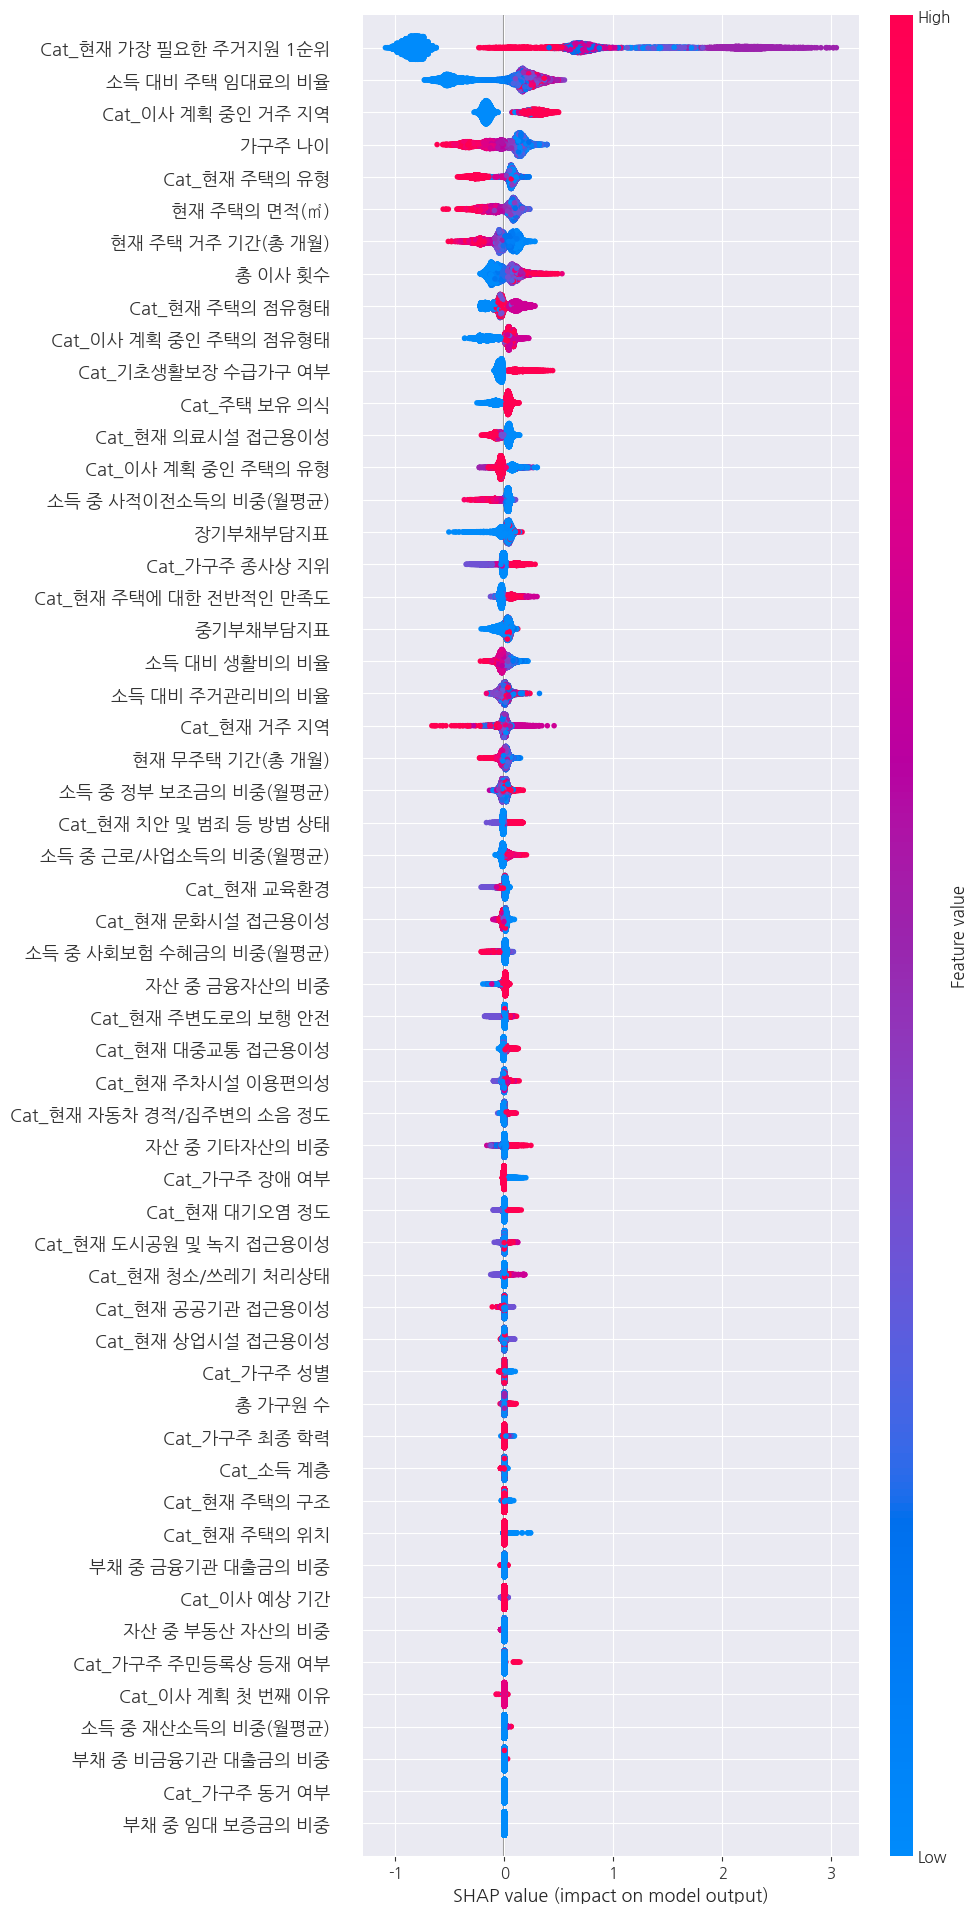

In [20]:
shap.initjs()
shap.plots.beeswarm(shap_values_0, max_display=57)

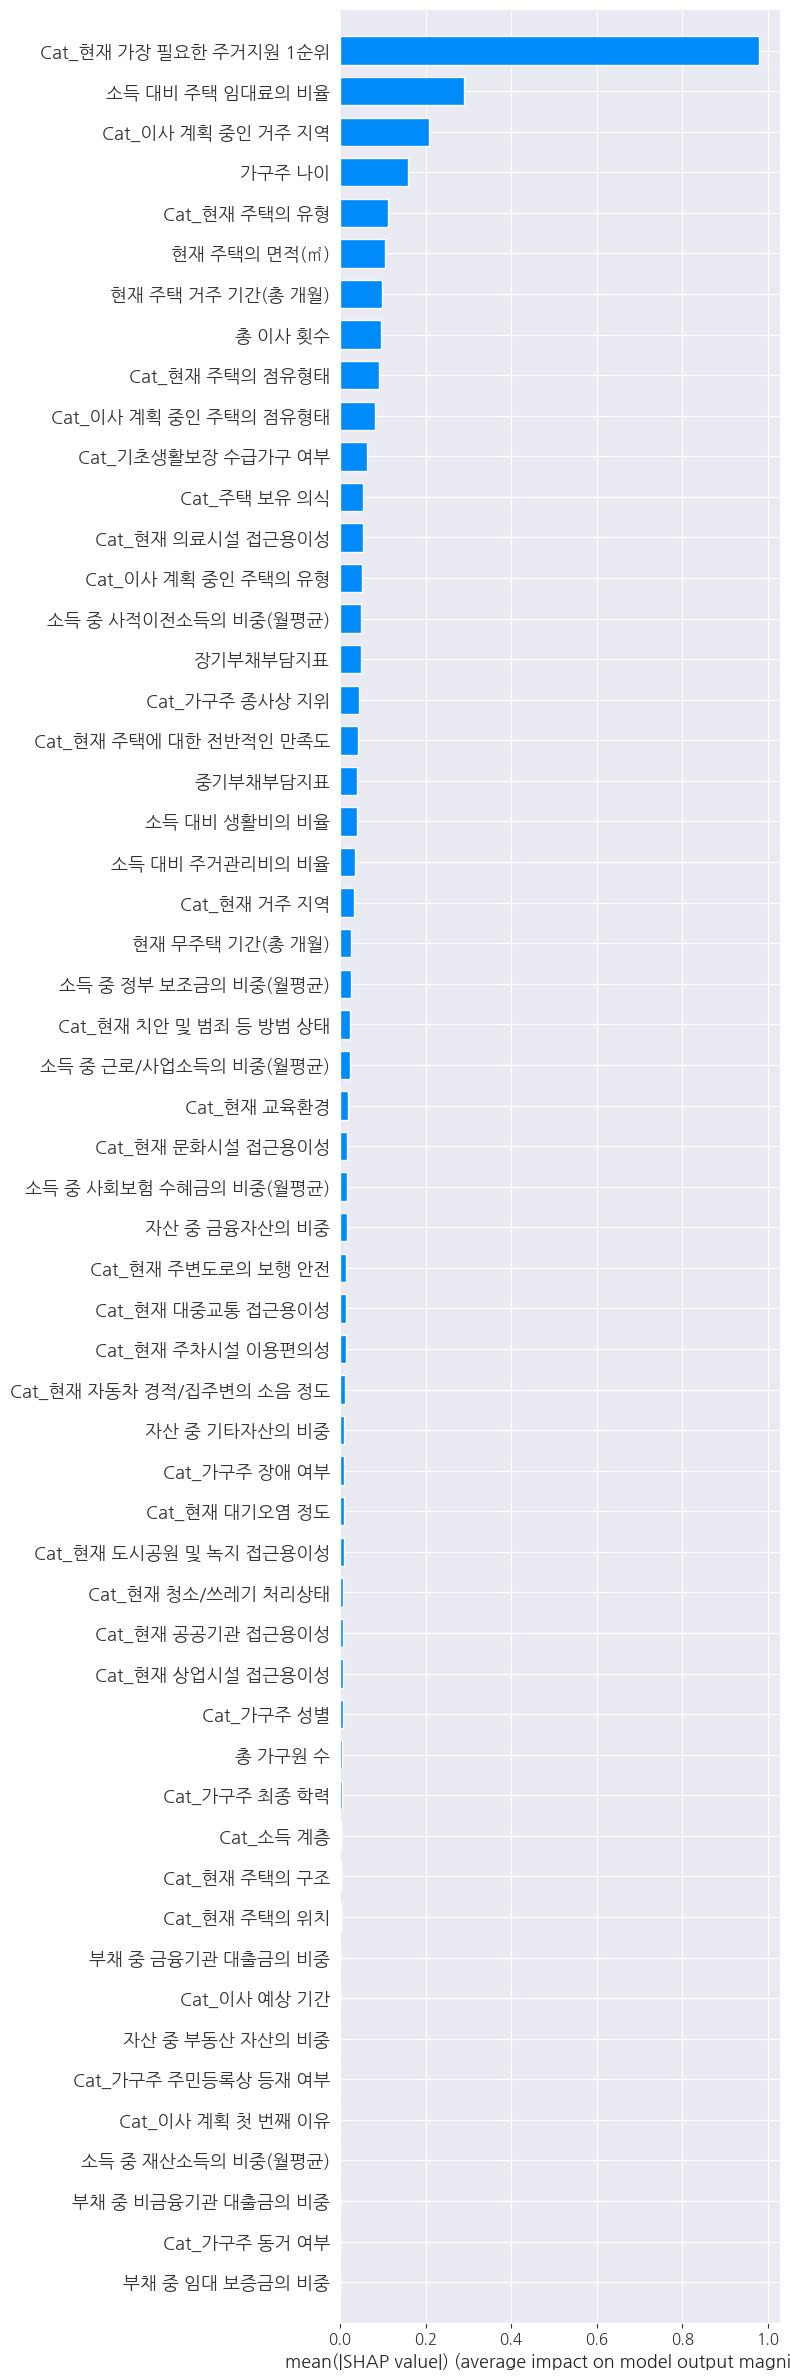

In [21]:
shap.initjs()
shap.summary_plot(shap_values_0, plot_type="bar",max_display=57)

In [22]:
mean_shap_values = np.mean(np.abs(shap_values_0.values), axis=0)
df_feature_importance = pd.DataFrame(list(zip(shap_values_0.feature_names, mean_shap_values)), columns=['feature','shap_importance'])
df_feature_importance = df_feature_importance.sort_values('shap_importance')
df_feature_importance = df_feature_importance.reset_index(drop=True)
df_feature_importance 

,feature,shap_importance
0,부채 중 임대 보증금의 비중,0.000000
1,Cat_가구주 동거 여부,0.000000
2,부채 중 비금융기관 대출금의 비중,0.000014
3,소득 중 재산소득의 비중(월평균),0.000203
4,Cat_이사 계획 첫 번째 이유,0.000216
5,Cat_가구주 주민등록상 등재 여부,0.000229
6,자산 중 부동산 자산의 비중,0.000260
7,Cat_이사 예상 기간,0.000395
8,부채 중 금융기관 대출금의 비중,0.000436
9,Cat_현재 주택의 위치,0.001818


In [23]:
column_to_drop = df_feature_importance.loc[0, 'feature']
column_to_drop

'부채 중 임대 보증금의 비중'

In [24]:
if not column_to_drop.startswith('Cat_'):
    comp_1 = comp.drop(column_to_drop, axis=1)
    X_1 = comp_1.drop('target', axis=1)
    y_1 = comp_1['target']
else:
    comp_1 = comp.drop(comp.filter(regex='^' + column_to_drop).columns, axis=1)
    X_1 = comp_1.drop('target', axis=1)
    y_1 = comp_1['target']

print(X_1.shape)

(10564, 209)


In [25]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_1)
shap_base_values = np.zeros_like(X_1)
shap_data = np.zeros_like(X_1)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_1, y_1)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_1, X_test_1 = X_1.iloc[train_index], X_1.iloc[test_index]
    y_train_1, y_test_1 = y_1.iloc[train_index], y_1.iloc[test_index]
    
    base_1 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_1.fit(X_train_1, y_train_1)
    base_proba_1 = base_1.predict_proba(X_test_1)[:, 1]
    base_score[index] = roc_auc_score(y_test_1, base_proba_1)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_1 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_1 = optuna_search_1.fit(X_train_1, y_train_1) 
    result_1.best_estimator_.fit(X_train_1, y_train_1)      

    explainer_1 = shap.TreeExplainer(result_1.best_estimator_) 
    shap_values_te_1 = explainer_1(X_test_1, check_additivity = False)
    shap_values[test_index,:] = shap_values_te_1.values
    shap_base_values[test_index] = np.tile(shap_values_te_1.base_values[:, np.newaxis], (1, X_1.shape[1]))
    shap_data[test_index,:] = shap_values_te_1.data
    
    
    y_train_pred_proba_1 = result_1.best_estimator_.predict_proba(X_train_1)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_1, y_train_pred_proba_1)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_1 = result_1.best_estimator_.predict_proba(X_test_1)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_1, y_test_pred_proba_1)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8259581631922057
Train ROC_AUC: 0.8948754622169623
TEST ROC_AUC: 0.8444981732215775

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8346658070062326
Train ROC_AUC: 0.8745308978246801
TEST ROC_AUC: 0.8461601833942259

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8260011462139123
Train ROC_AUC: 0.8944329931964354
TEST ROC_AUC: 0.8461637653127014

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8252346156601476
Train ROC_AUC: 0.8752412481195176
TEST ROC_AUC: 0.837237624471667

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8361936548952053
Train ROC_AUC: 0.8939922993395468
TEST ROC_AUC: 0.8608527131782946

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8560651737008327
Train ROC_AUC: 0.8637063801039164
TEST ROC_AUC: 0.8681991099626759

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8498062015503876
Train ROC_AUC: 0.8947453486225078
TEST ROC_AUC: 0.8555089003732415

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [26]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851, 0.851]

In [27]:
new_shap_values_1 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_1.columns)

In [28]:
new_shap_values_01_1,sv_주택유형_1 = combine_one_hot(new_shap_values_1, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_1.feature_names])
new_shap_values_02_1,sv_점유형태_1 = combine_one_hot(new_shap_values_01_1, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_1.feature_names])
new_shap_values_03_1,sv_거주지_1 = combine_one_hot(new_shap_values_02_1, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_1.feature_names])
new_shap_values_04_1,sv_최종학력_1 = combine_one_hot(new_shap_values_03_1, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_1.feature_names])
new_shap_values_05_1,sv_종사상지위_1 = combine_one_hot(new_shap_values_04_1, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_1.feature_names])
new_shap_values_06_1,sv_국민기초생활보장급여여부_1 = combine_one_hot(new_shap_values_05_1, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_1.feature_names])
new_shap_values_07_1,sv_성별_1 = combine_one_hot(new_shap_values_06_1, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_1.feature_names])
new_shap_values_08_1,sv_주택구조_1 = combine_one_hot(new_shap_values_07_1, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_1.feature_names])
new_shap_values_09_1,sv_이사계획_1 = combine_one_hot(new_shap_values_08_1, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_1.feature_names])
new_shap_values_10_1,sv_소득계층_1 = combine_one_hot(new_shap_values_09_1, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_1.feature_names])
new_shap_values_11_1,sv_상업시설_1 = combine_one_hot(new_shap_values_10_1, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_1.feature_names])
new_shap_values_12_1,sv_의료시설_1 = combine_one_hot(new_shap_values_11_1, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_1.feature_names])
new_shap_values_13_1,sv_공공기관_1 = combine_one_hot(new_shap_values_12_1, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_1.feature_names])
new_shap_values_14_1,sv_문화시설_1 = combine_one_hot(new_shap_values_13_1, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_1.feature_names])
new_shap_values_15_1,sv_도시공원_1 = combine_one_hot(new_shap_values_14_1, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_1.feature_names])
new_shap_values_16_1,sv_대중교통_1 = combine_one_hot(new_shap_values_15_1, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_1.feature_names])
new_shap_values_17_1,sv_주차시설_1 = combine_one_hot(new_shap_values_16_1, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_1.feature_names])
new_shap_values_18_1,sv_보행안전_1 = combine_one_hot(new_shap_values_17_1, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_1.feature_names])
new_shap_values_19_1,sv_교육환경_1 = combine_one_hot(new_shap_values_18_1, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_1.feature_names])
new_shap_values_20_1,sv_방범상태_1 = combine_one_hot(new_shap_values_19_1, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_1.feature_names])
new_shap_values_21_1,sv_소음정도_1 = combine_one_hot(new_shap_values_20_1, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_1.feature_names])
new_shap_values_22_1,sv_청소상태_1 = combine_one_hot(new_shap_values_21_1, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_1.feature_names])
new_shap_values_23_1,sv_대기오염_1 = combine_one_hot(new_shap_values_22_1, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_1.feature_names])
new_shap_values_24_1,sv_주거지원_1 = combine_one_hot(new_shap_values_23_1, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_1.feature_names])
new_shap_values_25_1,sv_주택만족도_1 = combine_one_hot(new_shap_values_24_1, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_1.feature_names])
new_shap_values_26_1,sv_주택위치_1 = combine_one_hot(new_shap_values_25_1, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_1.feature_names])
new_shap_values_27_1,sv_이사예상기간_1 = combine_one_hot(new_shap_values_26_1, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_1.feature_names])
new_shap_values_28_1,sv_이사이유_1 = combine_one_hot(new_shap_values_27_1, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_1.feature_names])
new_shap_values_29_1,sv_이사지역_1 = combine_one_hot(new_shap_values_28_1, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_1.feature_names])
new_shap_values_30_1,sv_이사주택유형_1 = combine_one_hot(new_shap_values_29_1, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_1.feature_names])
new_shap_values_31_1,sv_주택보유의식_1 = combine_one_hot(new_shap_values_30_1, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_1.feature_names])
new_shap_values_32_1,sv_주민등록_1 = combine_one_hot(new_shap_values_31_1, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_1.feature_names])
new_shap_values_33_1,sv_동거여부_1 = combine_one_hot(new_shap_values_32_1, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_1.feature_names])
shap_values_1,sv_장애여부_1 = combine_one_hot(new_shap_values_33_1, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_1.feature_names])

In [29]:
mean_shap_values_1 = np.mean(np.abs(shap_values_1.values), axis=0)
df_feature_importance_1 = pd.DataFrame(list(zip(shap_values_1.feature_names, mean_shap_values_1)), columns=['feature','shap_importance'])
df_feature_importance_1 = df_feature_importance_1.sort_values('shap_importance')
df_feature_importance_1 = df_feature_importance_1.reset_index(drop=True)
df_feature_importance_1

,feature,shap_importance
0,Cat_가구주 동거 여부,0.000000
1,부채 중 비금융기관 대출금의 비중,0.000017
2,Cat_가구주 주민등록상 등재 여부,0.000244
3,자산 중 부동산 자산의 비중,0.000323
4,소득 중 재산소득의 비중(월평균),0.000356
5,부채 중 금융기관 대출금의 비중,0.000390
6,Cat_이사 계획 첫 번째 이유,0.000587
7,Cat_이사 예상 기간,0.000716
8,Cat_현재 주택의 위치,0.002792
9,Cat_현재 주택의 구조,0.002974


In [30]:
column_to_drop_1 = df_feature_importance_1.loc[0, 'feature']
column_to_drop_1

'Cat_가구주 동거 여부'

In [31]:
if not column_to_drop_1.startswith('Cat_'):
    comp_2 = comp_1.drop(column_to_drop_1, axis=1)
    X_2 = comp_2.drop('target', axis=1)
    y_2 = comp_2['target']
else:
    comp_2 = comp_1.drop(comp_1.filter(regex='^' + column_to_drop_1).columns, axis=1)
    X_2 = comp_2.drop('target', axis=1)
    y_2 = comp_2['target']

print(X_2.shape)

(10564, 207)


In [32]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_2)
shap_base_values = np.zeros_like(X_2)
shap_data = np.zeros_like(X_2)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_2, y_2)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_2, X_test_2 = X_2.iloc[train_index], X_2.iloc[test_index]
    y_train_2, y_test_2 = y_2.iloc[train_index], y_2.iloc[test_index]
    
    base_2 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_2.fit(X_train_2, y_train_2)
    base_proba_2 = base_2.predict_proba(X_test_2)[:, 1]
    base_score[index] = roc_auc_score(y_test_2, base_proba_2)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_2 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_2 = optuna_search_2.fit(X_train_2, y_train_2) 
    result_2.best_estimator_.fit(X_train_2, y_train_2)      

    explainer_2 = shap.TreeExplainer(result_2.best_estimator_)
    shap_values_te_2 = explainer_2(X_test_2, check_additivity = False)
    shap_values[test_index,:] = shap_values_te_2.values
    shap_base_values[test_index] = np.tile(shap_values_te_2.base_values[:, np.newaxis], (1, X_2.shape[1]))
    shap_data[test_index,:] = shap_values_te_2.data
    
    
    y_train_pred_proba_2 = result_2.best_estimator_.predict_proba(X_train_2)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_2, y_train_pred_proba_2)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_2 = result_2.best_estimator_.predict_proba(X_test_2)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_2, y_test_pred_proba_2)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8259581631922057
Train ROC_AUC: 0.8948754622169623
TEST ROC_AUC: 0.8444981732215775

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8346658070062326
Train ROC_AUC: 0.875122539078786
TEST ROC_AUC: 0.8462640590300163

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8260011462139123
Train ROC_AUC: 0.8944329931964354
TEST ROC_AUC: 0.8461637653127014

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8252346156601476
Train ROC_AUC: 0.8970736605316393
TEST ROC_AUC: 0.837932516655921

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8361936548952053
Train ROC_AUC: 0.8939922993395468
TEST ROC_AUC: 0.8608527131782946

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8560651737008327
Train ROC_AUC: 0.8952126012932298
TEST ROC_AUC: 0.8664298018949181

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8498062015503876
Train ROC_AUC: 0.8947453486225078
TEST ROC_AUC: 0.8555089003732415

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [33]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851, 0.851, 0.851]

In [34]:
new_shap_values_2 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_2.columns)

In [35]:
new_shap_values_01_2,sv_주택유형_2 = combine_one_hot(new_shap_values_2, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_2.feature_names])
new_shap_values_02_2,sv_점유형태_2 = combine_one_hot(new_shap_values_01_2, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_2.feature_names])
new_shap_values_03_2,sv_거주지_2 = combine_one_hot(new_shap_values_02_2, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_2.feature_names])
new_shap_values_04_2,sv_최종학력_2 = combine_one_hot(new_shap_values_03_2, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_2.feature_names])
new_shap_values_05_2,sv_종사상지위_2 = combine_one_hot(new_shap_values_04_2, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_2.feature_names])
new_shap_values_06_2,sv_국민기초생활보장급여여부_2 = combine_one_hot(new_shap_values_05_2, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_2.feature_names])
new_shap_values_07_2,sv_성별_2 = combine_one_hot(new_shap_values_06_2, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_2.feature_names])
new_shap_values_08_2,sv_주택구조_2 = combine_one_hot(new_shap_values_07_2, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_2.feature_names])
new_shap_values_09_2,sv_이사계획_2 = combine_one_hot(new_shap_values_08_2, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_2.feature_names])
new_shap_values_10_2,sv_소득계층_2 = combine_one_hot(new_shap_values_09_2, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_2.feature_names])
new_shap_values_11_2,sv_상업시설_2 = combine_one_hot(new_shap_values_10_2, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_2.feature_names])
new_shap_values_12_2,sv_의료시설_2 = combine_one_hot(new_shap_values_11_2, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_2.feature_names])
new_shap_values_13_2,sv_공공기관_2 = combine_one_hot(new_shap_values_12_2, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_2.feature_names])
new_shap_values_14_2,sv_문화시설_2 = combine_one_hot(new_shap_values_13_2, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_2.feature_names])
new_shap_values_15_2,sv_도시공원_2 = combine_one_hot(new_shap_values_14_2, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_2.feature_names])
new_shap_values_16_2,sv_대중교통_2 = combine_one_hot(new_shap_values_15_2, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_2.feature_names])
new_shap_values_17_2,sv_주차시설_2 = combine_one_hot(new_shap_values_16_2, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_2.feature_names])
new_shap_values_18_2,sv_보행안전_2 = combine_one_hot(new_shap_values_17_2, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_2.feature_names])
new_shap_values_19_2,sv_교육환경_2 = combine_one_hot(new_shap_values_18_2, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_2.feature_names])
new_shap_values_20_2,sv_방범상태_2 = combine_one_hot(new_shap_values_19_2, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_2.feature_names])
new_shap_values_21_2,sv_소음정도_2 = combine_one_hot(new_shap_values_20_2, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_2.feature_names])
new_shap_values_22_2,sv_청소상태_2 = combine_one_hot(new_shap_values_21_2, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_2.feature_names])
new_shap_values_23_2,sv_대기오염_2 = combine_one_hot(new_shap_values_22_2, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_2.feature_names])
new_shap_values_24_2,sv_주거지원_2 = combine_one_hot(new_shap_values_23_2, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_2.feature_names])
new_shap_values_25_2,sv_주택만족도_2 = combine_one_hot(new_shap_values_24_2, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_2.feature_names])
new_shap_values_26_2,sv_주택위치_2 = combine_one_hot(new_shap_values_25_2, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_2.feature_names])
new_shap_values_27_2,sv_이사예상기간_2 = combine_one_hot(new_shap_values_26_2, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_2.feature_names])
new_shap_values_28_2,sv_이사이유_2 = combine_one_hot(new_shap_values_27_2, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_2.feature_names])
new_shap_values_29_2,sv_이사지역_2 = combine_one_hot(new_shap_values_28_2, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_2.feature_names])
new_shap_values_30_2,sv_이사주택유형_2 = combine_one_hot(new_shap_values_29_2, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_2.feature_names])
new_shap_values_31_2,sv_주택보유의식_2 = combine_one_hot(new_shap_values_30_2, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_2.feature_names])
new_shap_values_32_2,sv_주민등록_2 = combine_one_hot(new_shap_values_31_2, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_2.feature_names])
#new_shap_values_33_2,sv_동거여부_1 = combine_one_hot(new_shap_values_32_2, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_2.feature_names])
shap_values_2,sv_장애여부_2 = combine_one_hot(new_shap_values_32_2, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_2.feature_names])

In [36]:
mean_shap_values_2 = np.mean(np.abs(shap_values_2.values), axis=0)
df_feature_importance_2 = pd.DataFrame(list(zip(shap_values_2.feature_names, mean_shap_values_2)), columns=['feature','shap_importance'])
df_feature_importance_2 = df_feature_importance_2.sort_values('shap_importance')
df_feature_importance_2 = df_feature_importance_2.reset_index(drop=True)
df_feature_importance_2

,feature,shap_importance
0,부채 중 비금융기관 대출금의 비중,0.000014
1,Cat_이사 계획 첫 번째 이유,0.000145
2,자산 중 부동산 자산의 비중,0.000247
3,소득 중 재산소득의 비중(월평균),0.000260
4,부채 중 금융기관 대출금의 비중,0.000438
5,Cat_가구주 주민등록상 등재 여부,0.000441
6,Cat_이사 예상 기간,0.000525
7,Cat_현재 주택의 위치,0.002179
8,Cat_소득 계층,0.003008
9,Cat_현재 주택의 구조,0.003074


In [37]:
column_to_drop_2 = df_feature_importance_2.loc[0, 'feature']
column_to_drop_2

'부채 중 비금융기관 대출금의 비중'

In [38]:
if not column_to_drop_2.startswith('Cat_'):
    comp_3 = comp_2.drop(column_to_drop_2, axis=1)
    X_3 = comp_3.drop('target', axis=1)
    y_3 = comp_3['target']
else:
    comp_3 = comp_2.drop(comp_2.filter(regex='^' + column_to_drop_2).columns, axis=1)
    X_3 = comp_3.drop('target', axis=1)
    y_3 = comp_3['target']

print(X_3.shape)

(10564, 206)


In [39]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_3)
shap_base_values = np.zeros_like(X_3)
shap_data = np.zeros_like(X_3)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_3, y_3)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_3, X_test_3 = X_3.iloc[train_index], X_3.iloc[test_index]
    y_train_3, y_test_3 = y_3.iloc[train_index], y_3.iloc[test_index]
    
    base_3 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_3.fit(X_train_3, y_train_3)
    base_proba_3 = base_3.predict_proba(X_test_3)[:, 1]
    base_score[index] = roc_auc_score(y_test_3, base_proba_3)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_3 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_3 = optuna_search_3.fit(X_train_3, y_train_3) 
    result_3.best_estimator_.fit(X_train_3, y_train_3)      

    explainer_3 = shap.TreeExplainer(result_3.best_estimator_)
    shap_values_te_3 = explainer_3(X_test_3, check_additivity = False)
    shap_values[test_index,:] = shap_values_te_3.values
    shap_base_values[test_index] = np.tile(shap_values_te_3.base_values[:, np.newaxis], (1, X_3.shape[1]))
    shap_data[test_index,:] = shap_values_te_3.data
       
    y_train_pred_proba_3 = result_3.best_estimator_.predict_proba(X_train_3)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_3, y_train_pred_proba_3)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_3 = result_3.best_estimator_.predict_proba(X_test_3)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_3, y_test_pred_proba_3)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8272082527401676
Train ROC_AUC: 0.8953369707330189
TEST ROC_AUC: 0.8433698689017839

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8346658070062326
Train ROC_AUC: 0.875122539078786
TEST ROC_AUC: 0.8462640590300163

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8451500823841249
Train ROC_AUC: 0.8944329931964354
TEST ROC_AUC: 0.8461637653127014

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8186797048499176
Train ROC_AUC: 0.8970736605316393
TEST ROC_AUC: 0.837932516655921

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8386340798162504
Train ROC_AUC: 0.8939922993395468
TEST ROC_AUC: 0.8608527131782946

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8553330462245191
Train ROC_AUC: 0.876720993846209
TEST ROC_AUC: 0.8668353430950331

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.845266293425208
Train ROC_AUC: 0.8947453486225078
TEST ROC_AUC: 0.8555089003732415

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [40]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851, 0.851, 0.851, 0.851]

In [41]:
new_shap_values_3 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_3.columns)

In [42]:
new_shap_values_01_3,sv_주택유형_3 = combine_one_hot(new_shap_values_3, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_3.feature_names])
new_shap_values_02_3,sv_점유형태_3 = combine_one_hot(new_shap_values_01_3, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_3.feature_names])
new_shap_values_03_3,sv_거주지_3 = combine_one_hot(new_shap_values_02_3, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_3.feature_names])
new_shap_values_04_3,sv_최종학력_3 = combine_one_hot(new_shap_values_03_3, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_3.feature_names])
new_shap_values_05_3,sv_종사상지위_3 = combine_one_hot(new_shap_values_04_3, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_3.feature_names])
new_shap_values_06_3,sv_국민기초생활보장급여여부_3 = combine_one_hot(new_shap_values_05_3, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_3.feature_names])
new_shap_values_07_3,sv_성별_3 = combine_one_hot(new_shap_values_06_3, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_3.feature_names])
new_shap_values_08_3,sv_주택구조_3 = combine_one_hot(new_shap_values_07_3, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_3.feature_names])
new_shap_values_09_3,sv_이사계획_3 = combine_one_hot(new_shap_values_08_3, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_3.feature_names])
new_shap_values_10_3,sv_소득계층_3 = combine_one_hot(new_shap_values_09_3, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_3.feature_names])
new_shap_values_11_3,sv_상업시설_3 = combine_one_hot(new_shap_values_10_3, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_3.feature_names])
new_shap_values_12_3,sv_의료시설_3 = combine_one_hot(new_shap_values_11_3, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_3.feature_names])
new_shap_values_13_3,sv_공공기관_3 = combine_one_hot(new_shap_values_12_3, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_3.feature_names])
new_shap_values_14_3,sv_문화시설_3 = combine_one_hot(new_shap_values_13_3, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_3.feature_names])
new_shap_values_15_3,sv_도시공원_3 = combine_one_hot(new_shap_values_14_3, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_3.feature_names])
new_shap_values_16_3,sv_대중교통_3 = combine_one_hot(new_shap_values_15_3, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_3.feature_names])
new_shap_values_17_3,sv_주차시설_3 = combine_one_hot(new_shap_values_16_3, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_3.feature_names])
new_shap_values_18_3,sv_보행안전_3 = combine_one_hot(new_shap_values_17_3, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_3.feature_names])
new_shap_values_19_3,sv_교육환경_3 = combine_one_hot(new_shap_values_18_3, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_3.feature_names])
new_shap_values_20_3,sv_방범상태_3 = combine_one_hot(new_shap_values_19_3, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_3.feature_names])
new_shap_values_21_3,sv_소음정도_3 = combine_one_hot(new_shap_values_20_3, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_3.feature_names])
new_shap_values_22_3,sv_청소상태_3 = combine_one_hot(new_shap_values_21_3, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_3.feature_names])
new_shap_values_23_3,sv_대기오염_3 = combine_one_hot(new_shap_values_22_3, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_3.feature_names])
new_shap_values_24_3,sv_주거지원_3 = combine_one_hot(new_shap_values_23_3, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_3.feature_names])
new_shap_values_25_3,sv_주택만족도_3 = combine_one_hot(new_shap_values_24_3, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_3.feature_names])
new_shap_values_26_3,sv_주택위치_3 = combine_one_hot(new_shap_values_25_3, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_3.feature_names])
new_shap_values_27_3,sv_이사예상기간_3 = combine_one_hot(new_shap_values_26_3, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_3.feature_names])
new_shap_values_28_3,sv_이사이유_3 = combine_one_hot(new_shap_values_27_3, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_3.feature_names])
new_shap_values_29_3,sv_이사지역_3 = combine_one_hot(new_shap_values_28_3, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_3.feature_names])
new_shap_values_30_3,sv_이사주택유형_3 = combine_one_hot(new_shap_values_29_3, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_3.feature_names])
new_shap_values_31_3,sv_주택보유의식_3 = combine_one_hot(new_shap_values_30_3, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_3.feature_names])
new_shap_values_32_3,sv_주민등록_3 = combine_one_hot(new_shap_values_31_3, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_3.feature_names])
#new_shap_values_33_3,sv_동거여부_1 = combine_one_hot(new_shap_values_32_3, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_3.feature_names])
shap_values_3,sv_장애여부_3 = combine_one_hot(new_shap_values_32_3, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_3.feature_names])

In [43]:
mean_shap_values_3 = np.mean(np.abs(shap_values_3.values), axis=0)
df_feature_importance_3 = pd.DataFrame(list(zip(shap_values_3.feature_names, mean_shap_values_3)), columns=['feature','shap_importance'])
df_feature_importance_3 = df_feature_importance_3.sort_values('shap_importance')
df_feature_importance_3 = df_feature_importance_3.reset_index(drop=True)
df_feature_importance_3

,feature,shap_importance
0,Cat_이사 계획 첫 번째 이유,0.000154
1,소득 중 재산소득의 비중(월평균),0.000316
2,Cat_가구주 주민등록상 등재 여부,0.000428
3,부채 중 금융기관 대출금의 비중,0.000438
4,자산 중 부동산 자산의 비중,0.000498
5,Cat_이사 예상 기간,0.000515
6,Cat_현재 주택의 위치,0.001798
7,Cat_소득 계층,0.002913
8,Cat_현재 주택의 구조,0.003103
9,Cat_가구주 최종 학력,0.004850


In [44]:
column_to_drop_3 = df_feature_importance_3.loc[0, 'feature']
column_to_drop_3

'Cat_이사 계획 첫 번째 이유'

In [45]:
if not column_to_drop_3.startswith('Cat_'):
    comp_4 = comp_3.drop(column_to_drop_3, axis=1)
    X_4 = comp_4.drop('target', axis=1)
    y_4 = comp_4['target']
else:
    comp_4 = comp_3.drop(comp_3.filter(regex='^' + column_to_drop_3).columns, axis=1)
    X_4 = comp_4.drop('target', axis=1)
    y_4 = comp_4['target']

print(X_4.shape)

(10564, 194)


In [46]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_4)
shap_base_values = np.zeros_like(X_4)
shap_data = np.zeros_like(X_4)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_4, y_4)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_4, X_test_4 = X_4.iloc[train_index], X_4.iloc[test_index]
    y_train_4, y_test_4 = y_4.iloc[train_index], y_4.iloc[test_index]
    
    base_4 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_4.fit(X_train_4, y_train_4)
    base_proba_4 = base_4.predict_proba(X_test_4)[:, 1]
    base_score[index] = roc_auc_score(y_test_4, base_proba_4)
    print('TEST ROC_AUC (Base Model):',base_score[index])
    
    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_4 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_4 = optuna_search_4.fit(X_train_4, y_train_4) 
    result_4.best_estimator_.fit(X_train_4, y_train_4)      

    explainer_4 = shap.TreeExplainer(result_4.best_estimator_)
    shap_values_te_4 = explainer_4(X_test_4, check_additivity = False)
    shap_values[test_index,:] = shap_values_te_4.values
    shap_base_values[test_index] = np.tile(shap_values_te_4.base_values[:, np.newaxis], (1, X_4.shape[1]))
    shap_data[test_index,:] = shap_values_te_4.data
       
    y_train_pred_proba_4 = result_4.best_estimator_.predict_proba(X_train_4)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_4, y_train_pred_proba_4)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_4 = result_4.best_estimator_.predict_proba(X_test_4)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_4, y_test_pred_proba_4)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8202629128161043
Train ROC_AUC: 0.8949478787168195
TEST ROC_AUC: 0.8443298230532273

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8289920481409843
Train ROC_AUC: 0.8720942630369182
TEST ROC_AUC: 0.847655634357762

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8273873486639445
Train ROC_AUC: 0.8944329931964354
TEST ROC_AUC: 0.8461637653127014

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.823766029085178
Train ROC_AUC: 0.8970736605316393
TEST ROC_AUC: 0.837932516655921

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8414836347975883
Train ROC_AUC: 0.893750461221105
TEST ROC_AUC: 0.8604866494401378

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8472688774045364
Train ROC_AUC: 0.8738825058076785
TEST ROC_AUC: 0.8675710594315247

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8500968992248062
Train ROC_AUC: 0.8947453486225078
TEST ROC_AUC: 0.8555089003732415

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [47]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851, 0.851, 0.851, 0.851, 0.851]

In [48]:
new_shap_values_4 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_4.columns)

In [49]:
new_shap_values_01_4,sv_주택유형_4 = combine_one_hot(new_shap_values_4, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_4.feature_names])
new_shap_values_02_4,sv_점유형태_4 = combine_one_hot(new_shap_values_01_4, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_4.feature_names])
new_shap_values_03_4,sv_거주지_4 = combine_one_hot(new_shap_values_02_4, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_4.feature_names])
new_shap_values_04_4,sv_최종학력_4 = combine_one_hot(new_shap_values_03_4, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_4.feature_names])
new_shap_values_05_4,sv_종사상지위_4 = combine_one_hot(new_shap_values_04_4, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_4.feature_names])
new_shap_values_06_4,sv_국민기초생활보장급여여부_4 = combine_one_hot(new_shap_values_05_4, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_4.feature_names])
new_shap_values_07_4,sv_성별_4 = combine_one_hot(new_shap_values_06_4, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_4.feature_names])
new_shap_values_08_4,sv_주택구조_4 = combine_one_hot(new_shap_values_07_4, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_4.feature_names])
new_shap_values_09_4,sv_이사계획_4 = combine_one_hot(new_shap_values_08_4, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_4.feature_names])
new_shap_values_10_4,sv_소득계층_4 = combine_one_hot(new_shap_values_09_4, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_4.feature_names])
new_shap_values_11_4,sv_상업시설_4 = combine_one_hot(new_shap_values_10_4, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_4.feature_names])
new_shap_values_12_4,sv_의료시설_4 = combine_one_hot(new_shap_values_11_4, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_4.feature_names])
new_shap_values_13_4,sv_공공기관_4 = combine_one_hot(new_shap_values_12_4, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_4.feature_names])
new_shap_values_14_4,sv_문화시설_4 = combine_one_hot(new_shap_values_13_4, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_4.feature_names])
new_shap_values_15_4,sv_도시공원_4 = combine_one_hot(new_shap_values_14_4, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_4.feature_names])
new_shap_values_16_4,sv_대중교통_4 = combine_one_hot(new_shap_values_15_4, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_4.feature_names])
new_shap_values_17_4,sv_주차시설_4 = combine_one_hot(new_shap_values_16_4, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_4.feature_names])
new_shap_values_18_4,sv_보행안전_4 = combine_one_hot(new_shap_values_17_4, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_4.feature_names])
new_shap_values_19_4,sv_교육환경_4 = combine_one_hot(new_shap_values_18_4, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_4.feature_names])
new_shap_values_20_4,sv_방범상태_4 = combine_one_hot(new_shap_values_19_4, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_4.feature_names])
new_shap_values_21_4,sv_소음정도_4 = combine_one_hot(new_shap_values_20_4, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_4.feature_names])
new_shap_values_22_4,sv_청소상태_4 = combine_one_hot(new_shap_values_21_4, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_4.feature_names])
new_shap_values_23_4,sv_대기오염_4 = combine_one_hot(new_shap_values_22_4, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_4.feature_names])
new_shap_values_24_4,sv_주거지원_4 = combine_one_hot(new_shap_values_23_4, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_4.feature_names])
new_shap_values_25_4,sv_주택만족도_4 = combine_one_hot(new_shap_values_24_4, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_4.feature_names])
new_shap_values_26_4,sv_주택위치_4 = combine_one_hot(new_shap_values_25_4, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_4.feature_names])
new_shap_values_27_4,sv_이사예상기간_4 = combine_one_hot(new_shap_values_26_4, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_4.feature_names])
#new_shap_values_28_4,sv_이사이유_4 = combine_one_hot(new_shap_values_27_4, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_4.feature_names])
new_shap_values_29_4,sv_이사지역_4 = combine_one_hot(new_shap_values_27_4, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_27_4.feature_names])
new_shap_values_30_4,sv_이사주택유형_4 = combine_one_hot(new_shap_values_29_4, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_4.feature_names])
new_shap_values_31_4,sv_주택보유의식_4 = combine_one_hot(new_shap_values_30_4, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_4.feature_names])
new_shap_values_32_4,sv_주민등록_4 = combine_one_hot(new_shap_values_31_4, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_4.feature_names])
#new_shap_values_33_4,sv_동거여부_4 = combine_one_hot(new_shap_values_32_4, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_4.feature_names])
shap_values_4,sv_장애여부_4 = combine_one_hot(new_shap_values_32_4, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_4.feature_names])

In [50]:
mean_shap_values_4 = np.mean(np.abs(shap_values_4.values), axis=0)
df_feature_importance_4 = pd.DataFrame(list(zip(shap_values_4.feature_names, mean_shap_values_4)), columns=['feature','shap_importance'])
df_feature_importance_4 = df_feature_importance_4.sort_values('shap_importance')
df_feature_importance_4 = df_feature_importance_4.reset_index(drop=True)
df_feature_importance_4

,feature,shap_importance
0,소득 중 재산소득의 비중(월평균),0.000378
1,부채 중 금융기관 대출금의 비중,0.000508
2,Cat_가구주 주민등록상 등재 여부,0.000701
3,자산 중 부동산 자산의 비중,0.000795
4,Cat_이사 예상 기간,0.001216
5,Cat_현재 주택의 위치,0.002056
6,Cat_소득 계층,0.003095
7,Cat_현재 주택의 구조,0.003494
8,Cat_가구주 최종 학력,0.006206
9,총 가구원 수,0.006617


In [51]:
column_to_drop_4 = df_feature_importance_4.loc[0, 'feature']
column_to_drop_4

'소득 중 재산소득의 비중(월평균)'

In [52]:
if not column_to_drop_4.startswith('Cat_'):
    comp_5 = comp_4.drop(column_to_drop_4, axis=1)
    X_5 = comp_5.drop('target', axis=1)
    y_5 = comp_5['target']
else:
    comp_5 = comp_4.drop(comp_4.filter(regex='^' + column_to_drop_4).columns, axis=1)
    X_5 = comp_5.drop('target', axis=1)
    y_5 = comp_5['target']

print(X_5.shape)

(10564, 193)


In [53]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_5)
shap_base_values = np.zeros_like(X_5)
shap_data = np.zeros_like(X_5)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_5, y_5)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_5, X_test_5 = X_5.iloc[train_index], X_5.iloc[test_index]
    y_train_5, y_test_5 = y_5.iloc[train_index], y_5.iloc[test_index]
    
    base_5 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_5.fit(X_train_5, y_train_5)
    base_proba_5 = base_5.predict_proba(X_test_5)[:, 1]
    base_score[index] = roc_auc_score(y_test_5, base_proba_5)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_5 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_5 = optuna_search_5.fit(X_train_5, y_train_5) 
    result_5.best_estimator_.fit(X_train_5, y_train_5)      

    explainer_5 = shap.TreeExplainer(result_5.best_estimator_)
    shap_values_te = explainer_5(X_test_5, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_5.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
       
    y_train_pred_proba_5 = result_5.best_estimator_.predict_proba(X_train_5)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_5, y_train_pred_proba_5)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_5 = result_5.best_estimator_.predict_proba(X_test_5)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_5, y_test_pred_proba_5)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8181065978938318
Train ROC_AUC: 0.8949478787168195
TEST ROC_AUC: 0.8443298230532273

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8336771975069848
Train ROC_AUC: 0.8749220044851739
TEST ROC_AUC: 0.846367934665807

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8324987463285336
Train ROC_AUC: 0.8944329931964354
TEST ROC_AUC: 0.8461637653127014

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.825832796045562
Train ROC_AUC: 0.8966138567146014
TEST ROC_AUC: 0.8375707428898918

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8398363479758829
Train ROC_AUC: 0.893750461221105
TEST ROC_AUC: 0.8604866494401378

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.847606230261269
Train ROC_AUC: 0.8717124701924448
TEST ROC_AUC: 0.8658735285673271

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8459732988802755
Train ROC_AUC: 0.8947453486225078
TEST ROC_AUC: 0.8555089003732415

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [54]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851, 0.851, 0.851, 0.851, 0.851, 0.851]

In [55]:
new_shap_values_5 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_5.columns)

In [56]:
new_shap_values_01_5,sv_주택유형_5 = combine_one_hot(new_shap_values_5, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_5.feature_names])
new_shap_values_02_5,sv_점유형태_5 = combine_one_hot(new_shap_values_01_5, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_5.feature_names])
new_shap_values_03_5,sv_거주지_5 = combine_one_hot(new_shap_values_02_5, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_5.feature_names])
new_shap_values_04_5,sv_최종학력_5 = combine_one_hot(new_shap_values_03_5, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_5.feature_names])
new_shap_values_05_5,sv_종사상지위_5 = combine_one_hot(new_shap_values_04_5, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_5.feature_names])
new_shap_values_06_5,sv_국민기초생활보장급여여부_5 = combine_one_hot(new_shap_values_05_5, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_5.feature_names])
new_shap_values_07_5,sv_성별_5 = combine_one_hot(new_shap_values_06_5, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_5.feature_names])
new_shap_values_08_5,sv_주택구조_5 = combine_one_hot(new_shap_values_07_5, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_5.feature_names])
new_shap_values_09_5,sv_이사계획_5 = combine_one_hot(new_shap_values_08_5, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_5.feature_names])
new_shap_values_10_5,sv_소득계층_5 = combine_one_hot(new_shap_values_09_5, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_5.feature_names])
new_shap_values_11_5,sv_상업시설_5 = combine_one_hot(new_shap_values_10_5, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_5.feature_names])
new_shap_values_12_5,sv_의료시설_5 = combine_one_hot(new_shap_values_11_5, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_5.feature_names])
new_shap_values_13_5,sv_공공기관_5 = combine_one_hot(new_shap_values_12_5, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_5.feature_names])
new_shap_values_14_5,sv_문화시설_5 = combine_one_hot(new_shap_values_13_5, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_5.feature_names])
new_shap_values_15_5,sv_도시공원_5 = combine_one_hot(new_shap_values_14_5, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_5.feature_names])
new_shap_values_16_5,sv_대중교통_5 = combine_one_hot(new_shap_values_15_5, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_5.feature_names])
new_shap_values_17_5,sv_주차시설_5 = combine_one_hot(new_shap_values_16_5, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_5.feature_names])
new_shap_values_18_5,sv_보행안전_5 = combine_one_hot(new_shap_values_17_5, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_5.feature_names])
new_shap_values_19_5,sv_교육환경_5 = combine_one_hot(new_shap_values_18_5, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_5.feature_names])
new_shap_values_20_5,sv_방범상태_5 = combine_one_hot(new_shap_values_19_5, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_5.feature_names])
new_shap_values_21_5,sv_소음정도_5 = combine_one_hot(new_shap_values_20_5, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_5.feature_names])
new_shap_values_22_5,sv_청소상태_5 = combine_one_hot(new_shap_values_21_5, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_5.feature_names])
new_shap_values_23_5,sv_대기오염_5 = combine_one_hot(new_shap_values_22_5, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_5.feature_names])
new_shap_values_24_5,sv_주거지원_5 = combine_one_hot(new_shap_values_23_5, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_5.feature_names])
new_shap_values_25_5,sv_주택만족도_5 = combine_one_hot(new_shap_values_24_5, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_5.feature_names])
new_shap_values_26_5,sv_주택위치_5 = combine_one_hot(new_shap_values_25_5, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_5.feature_names])
new_shap_values_27_5,sv_이사예상기간_5 = combine_one_hot(new_shap_values_26_5, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_5.feature_names])
#new_shap_values_28_5,sv_이사이유_5 = combine_one_hot(new_shap_values_27_5, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_5.feature_names])
new_shap_values_29_5,sv_이사지역_5 = combine_one_hot(new_shap_values_27_5, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_27_5.feature_names])
new_shap_values_30_5,sv_이사주택유형_5 = combine_one_hot(new_shap_values_29_5, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_5.feature_names])
new_shap_values_31_5,sv_주택보유의식_5 = combine_one_hot(new_shap_values_30_5, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_5.feature_names])
new_shap_values_32_5,sv_주민등록_5 = combine_one_hot(new_shap_values_31_5, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_5.feature_names])
#new_shap_values_33_5,sv_동거여부_5 = combine_one_hot(new_shap_values_32_5, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_5.feature_names])
shap_values_5,sv_장애여부_5 = combine_one_hot(new_shap_values_32_5, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_5.feature_names])

In [57]:
mean_shap_values_5 = np.mean(np.abs(shap_values_5.values), axis=0)
df_feature_importance_5 = pd.DataFrame(list(zip(shap_values_5.feature_names, mean_shap_values_5)), columns=['feature','shap_importance'])
df_feature_importance_5 = df_feature_importance_5.sort_values('shap_importance')
df_feature_importance_5 = df_feature_importance_5.reset_index(drop=True)
df_feature_importance_5

,feature,shap_importance
0,자산 중 부동산 자산의 비중,0.000221
1,Cat_가구주 주민등록상 등재 여부,0.000373
2,부채 중 금융기관 대출금의 비중,0.000390
3,Cat_이사 예상 기간,0.000597
4,Cat_소득 계층,0.001751
5,Cat_현재 주택의 위치,0.002363
6,Cat_현재 주택의 구조,0.003310
7,Cat_가구주 최종 학력,0.004676
8,총 가구원 수,0.005558
9,Cat_가구주 성별,0.006931


In [58]:
column_to_drop_5 = df_feature_importance_5.loc[0, 'feature']
column_to_drop_5

'자산 중 부동산 자산의 비중'

In [59]:
if not column_to_drop_5.startswith('Cat_'):
    comp_6 = comp_5.drop(column_to_drop_5, axis=1)
    X_6 = comp_6.drop('target', axis=1)
    y_6 = comp_6['target']
else:
    comp_6 = comp_5.drop(comp_5.filter(regex='^' + column_to_drop_5).columns, axis=1)
    X_6 = comp_6.drop('target', axis=1)
    y_6 = comp_6['target']

print(X_6.shape)

(10564, 192)


In [60]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_6)
shap_base_values = np.zeros_like(X_6)
shap_data = np.zeros_like(X_6)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_6, y_6)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_6, X_test_6 = X_6.iloc[train_index], X_6.iloc[test_index]
    y_train_6, y_test_6 = y_6.iloc[train_index], y_6.iloc[test_index]
    
    base_6 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_6.fit(X_train_6, y_train_6)
    base_proba_6 = base_6.predict_proba(X_test_6)[:, 1]
    base_score[index] = roc_auc_score(y_test_6, base_proba_6)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_6 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_6 = optuna_search_6.fit(X_train_6, y_train_6) 
    result_6.best_estimator_.fit(X_train_6, y_train_6)      

    explainer_6 = shap.TreeExplainer(result_6.best_estimator_)
    shap_values_te = explainer_6(X_test_6, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_6.shape[1]))
    shap_data[test_index,:] = shap_values_te.data 
    
    y_train_pred_proba_6 = result_6.best_estimator_.predict_proba(X_train_6)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_6, y_train_pred_proba_6)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_6 = result_6.best_estimator_.predict_proba(X_test_6)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_6, y_test_pred_proba_6)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8211870477827925
Train ROC_AUC: 0.8949526607296502
TEST ROC_AUC: 0.8451823196504048

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8285228168206891
Train ROC_AUC: 0.8753565920401094
TEST ROC_AUC: 0.8463213697256251

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8257181746543449
Train ROC_AUC: 0.8944771825372226
TEST ROC_AUC: 0.8462354036822123

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8193208682570385
Train ROC_AUC: 0.8765249528971737
TEST ROC_AUC: 0.83632065334193

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8353610393339075
Train ROC_AUC: 0.893750461221105
TEST ROC_AUC: 0.8604866494401378

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8501004880849843
Train ROC_AUC: 0.8762246347206318
TEST ROC_AUC: 0.8669035314384151

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8515432098765432
Train ROC_AUC: 0.8947453486225078
TEST ROC_AUC: 0.8555089003732415

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [61]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851, 0.851, 0.851, 0.851, 0.851, 0.851, 0.851]

In [62]:
new_shap_values_6 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_6.columns)

In [63]:
new_shap_values_01_6,sv_주택유형_6 = combine_one_hot(new_shap_values_6, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_6.feature_names])
new_shap_values_02_6,sv_점유형태_6 = combine_one_hot(new_shap_values_01_6, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_6.feature_names])
new_shap_values_03_6,sv_거주지_6 = combine_one_hot(new_shap_values_02_6, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_6.feature_names])
new_shap_values_04_6,sv_최종학력_6 = combine_one_hot(new_shap_values_03_6, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_6.feature_names])
new_shap_values_05_6,sv_종사상지위_6 = combine_one_hot(new_shap_values_04_6, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_6.feature_names])
new_shap_values_06_6,sv_국민기초생활보장급여여부_6 = combine_one_hot(new_shap_values_05_6, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_6.feature_names])
new_shap_values_07_6,sv_성별_6 = combine_one_hot(new_shap_values_06_6, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_6.feature_names])
new_shap_values_08_6,sv_주택구조_6 = combine_one_hot(new_shap_values_07_6, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_6.feature_names])
new_shap_values_09_6,sv_이사계획_6 = combine_one_hot(new_shap_values_08_6, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_6.feature_names])
new_shap_values_10_6,sv_소득계층_6 = combine_one_hot(new_shap_values_09_6, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_6.feature_names])
new_shap_values_11_6,sv_상업시설_6 = combine_one_hot(new_shap_values_10_6, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_6.feature_names])
new_shap_values_12_6,sv_의료시설_6 = combine_one_hot(new_shap_values_11_6, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_6.feature_names])
new_shap_values_13_6,sv_공공기관_6 = combine_one_hot(new_shap_values_12_6, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_6.feature_names])
new_shap_values_14_6,sv_문화시설_6 = combine_one_hot(new_shap_values_13_6, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_6.feature_names])
new_shap_values_15_6,sv_도시공원_6 = combine_one_hot(new_shap_values_14_6, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_6.feature_names])
new_shap_values_16_6,sv_대중교통_6 = combine_one_hot(new_shap_values_15_6, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_6.feature_names])
new_shap_values_17_6,sv_주차시설_6 = combine_one_hot(new_shap_values_16_6, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_6.feature_names])
new_shap_values_18_6,sv_보행안전_6 = combine_one_hot(new_shap_values_17_6, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_6.feature_names])
new_shap_values_19_6,sv_교육환경_6 = combine_one_hot(new_shap_values_18_6, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_6.feature_names])
new_shap_values_20_6,sv_방범상태_6 = combine_one_hot(new_shap_values_19_6, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_6.feature_names])
new_shap_values_21_6,sv_소음정도_6 = combine_one_hot(new_shap_values_20_6, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_6.feature_names])
new_shap_values_22_6,sv_청소상태_6 = combine_one_hot(new_shap_values_21_6, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_6.feature_names])
new_shap_values_23_6,sv_대기오염_6 = combine_one_hot(new_shap_values_22_6, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_6.feature_names])
new_shap_values_24_6,sv_주거지원_6 = combine_one_hot(new_shap_values_23_6, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_6.feature_names])
new_shap_values_25_6,sv_주택만족도_6 = combine_one_hot(new_shap_values_24_6, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_6.feature_names])
new_shap_values_26_6,sv_주택위치_6 = combine_one_hot(new_shap_values_25_6, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_6.feature_names])
new_shap_values_27_6,sv_이사예상기간_6 = combine_one_hot(new_shap_values_26_6, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_6.feature_names])
#new_shap_values_28_6,sv_이사이유_6 = combine_one_hot(new_shap_values_27_6, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_6.feature_names])
new_shap_values_29_6,sv_이사지역_6 = combine_one_hot(new_shap_values_27_6, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_27_6.feature_names])
new_shap_values_30_6,sv_이사주택유형_6 = combine_one_hot(new_shap_values_29_6, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_6.feature_names])
new_shap_values_31_6,sv_주택보유의식_6 = combine_one_hot(new_shap_values_30_6, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_6.feature_names])
new_shap_values_32_6,sv_주민등록_6 = combine_one_hot(new_shap_values_31_6, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_6.feature_names])
#new_shap_values_33_6,sv_동거여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_6.feature_names])
shap_values_6,sv_장애여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_6.feature_names])

In [64]:
mean_shap_values_6 = np.mean(np.abs(shap_values_6.values), axis=0)
df_feature_importance_6 = pd.DataFrame(list(zip(shap_values_6.feature_names, mean_shap_values_6)), columns=['feature','shap_importance'])
df_feature_importance_6 = df_feature_importance_6.sort_values('shap_importance')
df_feature_importance_6 = df_feature_importance_6.reset_index(drop=True)
df_feature_importance_6

,feature,shap_importance
0,Cat_가구주 주민등록상 등재 여부,0.000303
1,부채 중 금융기관 대출금의 비중,0.000442
2,Cat_이사 예상 기간,0.000599
3,Cat_소득 계층,0.001789
4,Cat_현재 주택의 위치,0.002015
5,Cat_현재 주택의 구조,0.002638
6,Cat_가구주 최종 학력,0.004764
7,총 가구원 수,0.005882
8,Cat_가구주 성별,0.007191
9,Cat_현재 공공기관 접근용이성,0.007290


In [65]:
column_to_drop_6 = df_feature_importance_6.loc[0, 'feature']
column_to_drop_6

'Cat_가구주 주민등록상 등재 여부'

In [66]:
if not column_to_drop_6.startswith('Cat_'):
    comp_7 = comp_6.drop(column_to_drop_6, axis=1)
    X_7 = comp_7.drop('target', axis=1)
    y_7 = comp_7['target']
else:
    comp_7 = comp_6.drop(comp_6.filter(regex='^' + column_to_drop_6).columns, axis=1)
    X_7 = comp_7.drop('target', axis=1)
    y_7 = comp_7['target']

print(X_7.shape)

(10564, 190)


In [67]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_7)
shap_base_values = np.zeros_like(X_7)
shap_data = np.zeros_like(X_7)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_7, y_7)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_7, X_test_7 = X_7.iloc[train_index], X_7.iloc[test_index]
    y_train_7, y_test_7 = y_7.iloc[train_index], y_7.iloc[test_index]
    
    base_7 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_7.fit(X_train_7, y_train_7)
    base_proba_7 = base_7.predict_proba(X_test_7)[:, 1]
    base_score[index] = roc_auc_score(y_test_7, base_proba_7)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_7 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_7 = optuna_search_7.fit(X_train_7, y_train_7) 
    result_7.best_estimator_.fit(X_train_7, y_train_7)      

    explainer_7 = shap.TreeExplainer(result_7.best_estimator_)
    shap_values_te = explainer_7(X_test_7, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_7.shape[1]))
    shap_data[test_index,:] = shap_values_te.data  
    
    y_train_pred_proba_7 = result_7.best_estimator_.predict_proba(X_train_7)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_7, y_train_pred_proba_7)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_7 = result_7.best_estimator_.predict_proba(X_test_7)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_7, y_test_pred_proba_7)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8148864531843255
Train ROC_AUC: 0.8949526607296502
TEST ROC_AUC: 0.8451823196504048

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8297263414284692
Train ROC_AUC: 0.8664432743469098
TEST ROC_AUC: 0.8487391646966116

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8268858800773694
Train ROC_AUC: 0.8944771825372226
TEST ROC_AUC: 0.8462354036822123

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8210867540654774
Train ROC_AUC: 0.9251095169494017
TEST ROC_AUC: 0.838193996704635

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8412216480045939
Train ROC_AUC: 0.8943663892205451
TEST ROC_AUC: 0.8601887740453631

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.847121734137238
Train ROC_AUC: 0.8945541977904682
TEST ROC_AUC: 0.8653028997990239

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8493037611254666
Train ROC_AUC: 0.8947453486225078
TEST ROC_AUC: 0.8555089003732415

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [68]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851, 0.851, 0.851, 0.851, 0.851, 0.851, 0.851, 0.851]

In [69]:
new_shap_values_7 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_7.columns)

In [70]:
new_shap_values_01_7,sv_주택유형_7 = combine_one_hot(new_shap_values_7, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_7.feature_names])
new_shap_values_02_7,sv_점유형태_7 = combine_one_hot(new_shap_values_01_7, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_7.feature_names])
new_shap_values_03_7,sv_거주지_7 = combine_one_hot(new_shap_values_02_7, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_7.feature_names])
new_shap_values_04_7,sv_최종학력_7 = combine_one_hot(new_shap_values_03_7, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_7.feature_names])
new_shap_values_05_7,sv_종사상지위_7 = combine_one_hot(new_shap_values_04_7, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_7.feature_names])
new_shap_values_06_7,sv_국민기초생활보장급여여부_7 = combine_one_hot(new_shap_values_05_7, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_7.feature_names])
new_shap_values_07_7,sv_성별_7 = combine_one_hot(new_shap_values_06_7, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_7.feature_names])
new_shap_values_08_7,sv_주택구조_7 = combine_one_hot(new_shap_values_07_7, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_7.feature_names])
new_shap_values_09_7,sv_이사계획_7 = combine_one_hot(new_shap_values_08_7, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_7.feature_names])
new_shap_values_10_7,sv_소득계층_7 = combine_one_hot(new_shap_values_09_7, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_7.feature_names])
new_shap_values_11_7,sv_상업시설_7 = combine_one_hot(new_shap_values_10_7, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_7.feature_names])
new_shap_values_12_7,sv_의료시설_7 = combine_one_hot(new_shap_values_11_7, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_7.feature_names])
new_shap_values_13_7,sv_공공기관_7 = combine_one_hot(new_shap_values_12_7, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_7.feature_names])
new_shap_values_14_7,sv_문화시설_7 = combine_one_hot(new_shap_values_13_7, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_7.feature_names])
new_shap_values_15_7,sv_도시공원_7 = combine_one_hot(new_shap_values_14_7, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_7.feature_names])
new_shap_values_16_7,sv_대중교통_7 = combine_one_hot(new_shap_values_15_7, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_7.feature_names])
new_shap_values_17_7,sv_주차시설_7 = combine_one_hot(new_shap_values_16_7, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_7.feature_names])
new_shap_values_18_7,sv_보행안전_7 = combine_one_hot(new_shap_values_17_7, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_7.feature_names])
new_shap_values_19_7,sv_교육환경_7 = combine_one_hot(new_shap_values_18_7, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_7.feature_names])
new_shap_values_20_7,sv_방범상태_7 = combine_one_hot(new_shap_values_19_7, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_7.feature_names])
new_shap_values_21_7,sv_소음정도_7 = combine_one_hot(new_shap_values_20_7, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_7.feature_names])
new_shap_values_22_7,sv_청소상태_7 = combine_one_hot(new_shap_values_21_7, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_7.feature_names])
new_shap_values_23_7,sv_대기오염_7 = combine_one_hot(new_shap_values_22_7, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_7.feature_names])
new_shap_values_24_7,sv_주거지원_7 = combine_one_hot(new_shap_values_23_7, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_7.feature_names])
new_shap_values_25_7,sv_주택만족도_7 = combine_one_hot(new_shap_values_24_7, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_7.feature_names])
new_shap_values_26_7,sv_주택위치_7 = combine_one_hot(new_shap_values_25_7, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_7.feature_names])
new_shap_values_27_7,sv_이사예상기간_7 = combine_one_hot(new_shap_values_26_7, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_7.feature_names])
#new_shap_values_28_7,sv_이사이유_7 = combine_one_hot(new_shap_values_27_7, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_7.feature_names])
new_shap_values_29_7,sv_이사지역_7 = combine_one_hot(new_shap_values_27_7, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_27_7.feature_names])
new_shap_values_30_7,sv_이사주택유형_7 = combine_one_hot(new_shap_values_29_7, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_7.feature_names])
new_shap_values_31_7,sv_주택보유의식_7 = combine_one_hot(new_shap_values_30_7, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_7.feature_names])
#shap_values_7,sv_주민등록_7 = combine_one_hot(new_shap_values_31_7, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_7.feature_names])
#new_shap_values_33_7,sv_동거여부_7 = combine_one_hot(new_shap_values_32_7, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_7.feature_names])
shap_values_7,sv_장애여부_7 = combine_one_hot(new_shap_values_31_7, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_31_7.feature_names])

In [71]:
mean_shap_values_7 = np.mean(np.abs(shap_values_7.values), axis=0)
df_feature_importance_7 = pd.DataFrame(list(zip(shap_values_7.feature_names, mean_shap_values_7)), columns=['feature','shap_importance'])
df_feature_importance_7 = df_feature_importance_7.sort_values('shap_importance')
df_feature_importance_7 = df_feature_importance_7.reset_index(drop=True)
df_feature_importance_7

,feature,shap_importance
0,부채 중 금융기관 대출금의 비중,0.000352
1,Cat_이사 예상 기간,0.000671
2,Cat_현재 주택의 위치,0.002120
3,Cat_소득 계층,0.002239
4,Cat_현재 주택의 구조,0.003116
5,Cat_가구주 최종 학력,0.005260
6,총 가구원 수,0.006330
7,Cat_현재 청소/쓰레기 처리상태,0.008936
8,Cat_가구주 성별,0.009198
9,Cat_현재 공공기관 접근용이성,0.009382


In [72]:
column_to_drop_7 = df_feature_importance_7.loc[0, 'feature']
column_to_drop_7

'부채 중 금융기관 대출금의 비중'

In [73]:
if not column_to_drop_7.startswith('Cat_'):
    comp_8 = comp_7.drop(column_to_drop_7, axis=1)
    X_8 = comp_8.drop('target', axis=1)
    y_8 = comp_8['target']
else:
    comp_8 = comp_7.drop(comp_7.filter(regex='^' + column_to_drop_7).columns, axis=1)
    X_8 = comp_8.drop('target', axis=1)
    y_8 = comp_8['target']

print(X_8.shape)

(10564, 189)


In [74]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_8)
shap_base_values = np.zeros_like(X_8)
shap_data = np.zeros_like(X_8)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_8, y_8)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_8, X_test_8 = X_8.iloc[train_index], X_8.iloc[test_index]
    y_train_8, y_test_8 = y_8.iloc[train_index], y_8.iloc[test_index]
    
    base_8 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_8.fit(X_train_8, y_train_8)
    base_proba_8 = base_8.predict_proba(X_test_8)[:, 1]
    base_score[index] = roc_auc_score(y_test_8, base_proba_8)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_8 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_8 = optuna_search_8.fit(X_train_8, y_train_8) 
    result_8.best_estimator_.fit(X_train_8, y_train_8)      

    explainer_8 = shap.TreeExplainer(result_8.best_estimator_)
    shap_values_te = explainer_8(X_test_8, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_8.shape[1]))
    shap_data[test_index,:] = shap_values_te.data  
    
    y_train_pred_proba_8 = result_8.best_estimator_.predict_proba(X_train_8)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_8, y_train_pred_proba_8)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_8 = result_8.best_estimator_.predict_proba(X_test_8)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_8, y_test_pred_proba_8)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8172541012966545
Train ROC_AUC: 0.8949526607296502
TEST ROC_AUC: 0.8451823196504048

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8336163048929006
Train ROC_AUC: 0.8753565920401094
TEST ROC_AUC: 0.8463213697256251

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8307292786016189
Train ROC_AUC: 0.89441700887577
TEST ROC_AUC: 0.8461458557203237

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8243821190629702
Train ROC_AUC: 0.9049748962037548
TEST ROC_AUC: 0.8365427322874132

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8466300602928509
Train ROC_AUC: 0.8948984065200937
TEST ROC_AUC: 0.859162360034453

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8549131495836924
Train ROC_AUC: 0.8731615732288965
TEST ROC_AUC: 0.8640862761986792

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8462783519954064
Train ROC_AUC: 0.8947453486225078
TEST ROC_AUC: 0.8555089003732415

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [75]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851, 0.851, 0.851, 0.851, 0.851, 0.851, 0.851, 0.851, 0.85]

In [76]:
new_shap_values_8 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_8.columns)

In [77]:
new_shap_values_01_8,sv_주택유형_8 = combine_one_hot(new_shap_values_8, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_8.feature_names])
new_shap_values_02_8,sv_점유형태_8 = combine_one_hot(new_shap_values_01_8, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_8.feature_names])
new_shap_values_03_8,sv_거주지_8 = combine_one_hot(new_shap_values_02_8, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_8.feature_names])
new_shap_values_04_8,sv_최종학력_8 = combine_one_hot(new_shap_values_03_8, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_8.feature_names])
new_shap_values_05_8,sv_종사상지위_8 = combine_one_hot(new_shap_values_04_8, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_8.feature_names])
new_shap_values_06_8,sv_국민기초생활보장급여여부_8 = combine_one_hot(new_shap_values_05_8, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_8.feature_names])
new_shap_values_07_8,sv_성별_8 = combine_one_hot(new_shap_values_06_8, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_8.feature_names])
new_shap_values_08_8,sv_주택구조_8 = combine_one_hot(new_shap_values_07_8, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_8.feature_names])
new_shap_values_09_8,sv_이사계획_8 = combine_one_hot(new_shap_values_08_8, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_8.feature_names])
new_shap_values_10_8,sv_소득계층_8 = combine_one_hot(new_shap_values_09_8, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_8.feature_names])
new_shap_values_11_8,sv_상업시설_8 = combine_one_hot(new_shap_values_10_8, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_8.feature_names])
new_shap_values_12_8,sv_의료시설_8 = combine_one_hot(new_shap_values_11_8, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_8.feature_names])
new_shap_values_13_8,sv_공공기관_8 = combine_one_hot(new_shap_values_12_8, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_8.feature_names])
new_shap_values_14_8,sv_문화시설_8 = combine_one_hot(new_shap_values_13_8, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_8.feature_names])
new_shap_values_15_8,sv_도시공원_8 = combine_one_hot(new_shap_values_14_8, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_8.feature_names])
new_shap_values_16_8,sv_대중교통_8 = combine_one_hot(new_shap_values_15_8, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_8.feature_names])
new_shap_values_17_8,sv_주차시설_8 = combine_one_hot(new_shap_values_16_8, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_8.feature_names])
new_shap_values_18_8,sv_보행안전_8 = combine_one_hot(new_shap_values_17_8, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_8.feature_names])
new_shap_values_19_8,sv_교육환경_8 = combine_one_hot(new_shap_values_18_8, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_8.feature_names])
new_shap_values_20_8,sv_방범상태_8 = combine_one_hot(new_shap_values_19_8, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_8.feature_names])
new_shap_values_21_8,sv_소음정도_8 = combine_one_hot(new_shap_values_20_8, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_8.feature_names])
new_shap_values_22_8,sv_청소상태_8 = combine_one_hot(new_shap_values_21_8, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_8.feature_names])
new_shap_values_23_8,sv_대기오염_8 = combine_one_hot(new_shap_values_22_8, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_8.feature_names])
new_shap_values_24_8,sv_주거지원_8 = combine_one_hot(new_shap_values_23_8, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_8.feature_names])
new_shap_values_25_8,sv_주택만족도_8 = combine_one_hot(new_shap_values_24_8, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_8.feature_names])
new_shap_values_26_8,sv_주택위치_8 = combine_one_hot(new_shap_values_25_8, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_8.feature_names])
new_shap_values_27_8,sv_이사예상기간_8 = combine_one_hot(new_shap_values_26_8, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_8.feature_names])
#new_shap_values_28_8,sv_이사이유_8 = combine_one_hot(new_shap_values_27_8, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_8.feature_names])
new_shap_values_29_8,sv_이사지역_8 = combine_one_hot(new_shap_values_27_8, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_27_8.feature_names])
new_shap_values_30_8,sv_이사주택유형_8 = combine_one_hot(new_shap_values_29_8, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_8.feature_names])
new_shap_values_31_8,sv_주택보유의식_8 = combine_one_hot(new_shap_values_30_8, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_8.feature_names])
#shap_values_8,sv_주민등록_8 = combine_one_hot(new_shap_values_31_8, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_8.feature_names])
#new_shap_values_33_8,sv_동거여부_8 = combine_one_hot(new_shap_values_32_8, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_8.feature_names])
shap_values_8,sv_장애여부_8 = combine_one_hot(new_shap_values_31_8, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_31_8.feature_names])

In [78]:
mean_shap_values_8 = np.mean(np.abs(shap_values_8.values), axis=0)
df_feature_importance_8 = pd.DataFrame(list(zip(shap_values_8.feature_names, mean_shap_values_8)), columns=['feature','shap_importance'])
df_feature_importance_8 = df_feature_importance_8.sort_values('shap_importance')
df_feature_importance_8 = df_feature_importance_8.reset_index(drop=True)
df_feature_importance_8

,feature,shap_importance
0,Cat_이사 예상 기간,0.000726
1,Cat_현재 주택의 위치,0.002011
2,Cat_소득 계층,0.003143
3,Cat_현재 주택의 구조,0.003202
4,Cat_가구주 최종 학력,0.003513
5,총 가구원 수,0.005125
6,Cat_현재 청소/쓰레기 처리상태,0.007702
7,Cat_현재 공공기관 접근용이성,0.007703
8,Cat_가구주 장애 여부,0.009214
9,Cat_가구주 성별,0.009721


In [79]:
column_to_drop_8 = df_feature_importance_8.loc[0, 'feature']
column_to_drop_8

'Cat_이사 예상 기간'

In [80]:
if not column_to_drop_8.startswith('Cat_'):
    comp_9 = comp_8.drop(column_to_drop_8, axis=1)
    X_9 = comp_9.drop('target', axis=1)
    y_9 = comp_9['target']
else:
    comp_9 = comp_8.drop(comp_8.filter(regex='^' + column_to_drop_8).columns, axis=1)
    X_9 = comp_9.drop('target', axis=1)
    y_9 = comp_9['target']

print(X_9.shape)

(10564, 185)


In [81]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_9)
shap_base_values = np.zeros_like(X_9)
shap_data = np.zeros_like(X_9)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_9, y_9)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_9, X_test_9 = X_9.iloc[train_index], X_9.iloc[test_index]
    y_train_9, y_test_9 = y_9.iloc[train_index], y_9.iloc[test_index]
    
    base_9 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_9.fit(X_train_9, y_train_9)
    base_proba_9 = base_9.predict_proba(X_test_9)[:, 1]
    base_score[index] = roc_auc_score(y_test_9, base_proba_9)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_9 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_9 = optuna_search_9.fit(X_train_9, y_train_9) 
    result_9.best_estimator_.fit(X_train_9, y_train_9)      

    explainer_9 = shap.TreeExplainer(result_9.best_estimator_)
    shap_values_te = explainer_9(X_test_9, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_9.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_9 = result_9.best_estimator_.predict_proba(X_train_9)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_9, y_train_pred_proba_9)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_9 = result_9.best_estimator_.predict_proba(X_test_9)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_9, y_test_pred_proba_9)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8241994412207178
Train ROC_AUC: 0.8957888709455174
TEST ROC_AUC: 0.8448778565799842

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8353857726198153
Train ROC_AUC: 0.9131896415226071
TEST ROC_AUC: 0.852267354395014

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8285514721684933
Train ROC_AUC: 0.8955499916934667
TEST ROC_AUC: 0.8457948277097214

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8185543377032738
Train ROC_AUC: 0.8973148643732605
TEST ROC_AUC: 0.8365391503689376

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8394092736146999
Train ROC_AUC: 0.894892828705171
TEST ROC_AUC: 0.859151593453919

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8485859890898649
Train ROC_AUC: 0.8947675713454545
TEST ROC_AUC: 0.8655397645707723

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8406617858168246
Train ROC_AUC: 0.8944400296580387
TEST ROC_AUC: 0.8556237438989376

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [82]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851, 0.851, 0.851, 0.851, 0.851, 0.851, 0.851, 0.851, 0.85, 0.851]

In [83]:
new_shap_values_9 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_9.columns)

In [84]:
new_shap_values_01_9,sv_주택유형_9 = combine_one_hot(new_shap_values_9, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_9.feature_names])
new_shap_values_02_9,sv_점유형태_9 = combine_one_hot(new_shap_values_01_9, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_9.feature_names])
new_shap_values_03_9,sv_거주지_9 = combine_one_hot(new_shap_values_02_9, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_9.feature_names])
new_shap_values_04_9,sv_최종학력_9 = combine_one_hot(new_shap_values_03_9, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_9.feature_names])
new_shap_values_05_9,sv_종사상지위_9 = combine_one_hot(new_shap_values_04_9, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_9.feature_names])
new_shap_values_06_9,sv_국민기초생활보장급여여부_9 = combine_one_hot(new_shap_values_05_9, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_9.feature_names])
new_shap_values_07_9,sv_성별_9 = combine_one_hot(new_shap_values_06_9, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_9.feature_names])
new_shap_values_08_9,sv_주택구조_9 = combine_one_hot(new_shap_values_07_9, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_9.feature_names])
new_shap_values_09_9,sv_이사계획_9 = combine_one_hot(new_shap_values_08_9, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_9.feature_names])
new_shap_values_10_9,sv_소득계층_9 = combine_one_hot(new_shap_values_09_9, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_9.feature_names])
new_shap_values_11_9,sv_상업시설_9 = combine_one_hot(new_shap_values_10_9, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_9.feature_names])
new_shap_values_12_9,sv_의료시설_9 = combine_one_hot(new_shap_values_11_9, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_9.feature_names])
new_shap_values_13_9,sv_공공기관_9 = combine_one_hot(new_shap_values_12_9, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_9.feature_names])
new_shap_values_14_9,sv_문화시설_9 = combine_one_hot(new_shap_values_13_9, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_9.feature_names])
new_shap_values_15_9,sv_도시공원_9 = combine_one_hot(new_shap_values_14_9, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_9.feature_names])
new_shap_values_16_9,sv_대중교통_9 = combine_one_hot(new_shap_values_15_9, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_9.feature_names])
new_shap_values_17_9,sv_주차시설_9 = combine_one_hot(new_shap_values_16_9, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_9.feature_names])
new_shap_values_18_9,sv_보행안전_9 = combine_one_hot(new_shap_values_17_9, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_9.feature_names])
new_shap_values_19_9,sv_교육환경_9 = combine_one_hot(new_shap_values_18_9, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_9.feature_names])
new_shap_values_20_9,sv_방범상태_9 = combine_one_hot(new_shap_values_19_9, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_9.feature_names])
new_shap_values_21_9,sv_소음정도_9 = combine_one_hot(new_shap_values_20_9, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_9.feature_names])
new_shap_values_22_9,sv_청소상태_9 = combine_one_hot(new_shap_values_21_9, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_9.feature_names])
new_shap_values_23_9,sv_대기오염_9 = combine_one_hot(new_shap_values_22_9, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_9.feature_names])
new_shap_values_24_9,sv_주거지원_9 = combine_one_hot(new_shap_values_23_9, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_9.feature_names])
new_shap_values_25_9,sv_주택만족도_9 = combine_one_hot(new_shap_values_24_9, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_9.feature_names])
new_shap_values_26_9,sv_주택위치_9 = combine_one_hot(new_shap_values_25_9, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_9.feature_names])
#new_shap_values_27_9,sv_이사예상기간_9 = combine_one_hot(new_shap_values_26_9, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_9.feature_names])
#new_shap_values_28_9,sv_이사이유_9 = combine_one_hot(new_shap_values_27_9, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_9.feature_names])
new_shap_values_29_9,sv_이사지역_9 = combine_one_hot(new_shap_values_26_9, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_26_9.feature_names])
new_shap_values_30_9,sv_이사주택유형_9 = combine_one_hot(new_shap_values_29_9, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_9.feature_names])
new_shap_values_31_9,sv_주택보유의식_9 = combine_one_hot(new_shap_values_30_9, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_9.feature_names])
#shap_values_9,sv_주민등록_9 = combine_one_hot(new_shap_values_31_9, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_9.feature_names])
#new_shap_values_33_9,sv_동거여부_9 = combine_one_hot(new_shap_values_32_9, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_9.feature_names])
shap_values_9,sv_장애여부_9 = combine_one_hot(new_shap_values_31_9, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_31_9.feature_names])

In [85]:
mean_shap_values_9 = np.mean(np.abs(shap_values_9.values), axis=0)
df_feature_importance_9 = pd.DataFrame(list(zip(shap_values_9.feature_names, mean_shap_values_9)), columns=['feature','shap_importance'])
df_feature_importance_9 = df_feature_importance_9.sort_values('shap_importance')
df_feature_importance_9 = df_feature_importance_9.reset_index(drop=True)
df_feature_importance_9

,feature,shap_importance
0,Cat_현재 주택의 위치,0.001897
1,Cat_현재 주택의 구조,0.003288
2,Cat_소득 계층,0.003524
3,Cat_가구주 최종 학력,0.004476
4,총 가구원 수,0.007131
5,Cat_가구주 성별,0.007481
6,Cat_현재 공공기관 접근용이성,0.008501
7,Cat_현재 대기오염 정도,0.009767
8,Cat_현재 상업시설 접근용이성,0.010696
9,Cat_현재 청소/쓰레기 처리상태,0.010905


In [86]:
column_to_drop_9 = df_feature_importance_9.loc[0, 'feature']
column_to_drop_9

'Cat_현재 주택의 위치'

In [87]:
if not column_to_drop_9.startswith('Cat_'):
    comp_10 = comp_9.drop(column_to_drop_9, axis=1)
    X_10 = comp_10.drop('target', axis=1)
    y_10 = comp_10['target']
else:
    comp_10 = comp_9.drop(comp_9.filter(regex='^' + column_to_drop_9).columns, axis=1)
    X_10 = comp_10.drop('target', axis=1)
    y_10 = comp_10['target']

print(X_10.shape)

(10564, 181)


In [88]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_10)
shap_base_values = np.zeros_like(X_10)
shap_data = np.zeros_like(X_10)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_10, y_10)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_10, X_test_10 = X_10.iloc[train_index], X_10.iloc[test_index]
    y_train_10, y_test_10 = y_10.iloc[train_index], y_10.iloc[test_index]
    
    base_10 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_10.fit(X_train_10, y_train_10)
    base_proba_10 = base_10.predict_proba(X_test_10)[:, 1]
    base_score[index] = roc_auc_score(y_test_10, base_proba_10)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_10 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_10 = optuna_search_10.fit(X_train_10, y_train_10) 
    result_10.best_estimator_.fit(X_train_10, y_train_10)      

    explainer_10 = shap.TreeExplainer(result_10.best_estimator_)
    shap_values_te = explainer_10(X_test_10, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_10.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_10 = result_10.best_estimator_.predict_proba(X_train_10)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_10, y_train_pred_proba_10)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_10 = result_10.best_estimator_.predict_proba(X_test_10)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_10, y_test_pred_proba_10)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8135145784081955
Train ROC_AUC: 0.8953524237189252
TEST ROC_AUC: 0.845257539938391

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8297442510208468
Train ROC_AUC: 0.895546205933309
TEST ROC_AUC: 0.8464503187907444

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8258829429042194
Train ROC_AUC: 0.8955499916934667
TEST ROC_AUC: 0.8457948277097214

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8266064904362778
Train ROC_AUC: 0.8829974294024363
TEST ROC_AUC: 0.8395300522960096

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8387238013207006
Train ROC_AUC: 0.8940820755987817
TEST ROC_AUC: 0.8602820844099913

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8522717484926787
Train ROC_AUC: 0.8558981032374746
TEST ROC_AUC: 0.8621447028423773

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8474554981337928
Train ROC_AUC: 0.873507619095977
TEST ROC_AUC: 0.853387884008039

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [89]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851, 0.851, 0.851, 0.851, 0.851, 0.851, 0.851, 0.851, 0.85, 0.851, 0.85]

In [90]:
new_shap_values_10 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_10.columns)

In [91]:
new_shap_values_01_10,sv_주택유형_10 = combine_one_hot(new_shap_values_10, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_10.feature_names])
new_shap_values_02_10,sv_점유형태_10 = combine_one_hot(new_shap_values_01_10, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_10.feature_names])
new_shap_values_03_10,sv_거주지_10 = combine_one_hot(new_shap_values_02_10, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_10.feature_names])
new_shap_values_04_10,sv_최종학력_10 = combine_one_hot(new_shap_values_03_10, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_10.feature_names])
new_shap_values_05_10,sv_종사상지위_10 = combine_one_hot(new_shap_values_04_10, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_10.feature_names])
new_shap_values_06_10,sv_국민기초생활보장급여여부_10 = combine_one_hot(new_shap_values_05_10, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_10.feature_names])
new_shap_values_07_10,sv_성별_10 = combine_one_hot(new_shap_values_06_10, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_10.feature_names])
new_shap_values_08_10,sv_주택구조_10 = combine_one_hot(new_shap_values_07_10, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_10.feature_names])
new_shap_values_09_10,sv_이사계획_10 = combine_one_hot(new_shap_values_08_10, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_10.feature_names])
new_shap_values_10_10,sv_소득계층_10 = combine_one_hot(new_shap_values_09_10, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_10.feature_names])
new_shap_values_11_10,sv_상업시설_10 = combine_one_hot(new_shap_values_10_10, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_10.feature_names])
new_shap_values_12_10,sv_의료시설_10 = combine_one_hot(new_shap_values_11_10, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_10.feature_names])
new_shap_values_13_10,sv_공공기관_10 = combine_one_hot(new_shap_values_12_10, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_10.feature_names])
new_shap_values_14_10,sv_문화시설_10 = combine_one_hot(new_shap_values_13_10, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_10.feature_names])
new_shap_values_15_10,sv_도시공원_10 = combine_one_hot(new_shap_values_14_10, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_10.feature_names])
new_shap_values_16_10,sv_대중교통_10 = combine_one_hot(new_shap_values_15_10, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_10.feature_names])
new_shap_values_17_10,sv_주차시설_10 = combine_one_hot(new_shap_values_16_10, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_10.feature_names])
new_shap_values_18_10,sv_보행안전_10 = combine_one_hot(new_shap_values_17_10, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_10.feature_names])
new_shap_values_19_10,sv_교육환경_10 = combine_one_hot(new_shap_values_18_10, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_10.feature_names])
new_shap_values_20_10,sv_방범상태_10 = combine_one_hot(new_shap_values_19_10, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_10.feature_names])
new_shap_values_21_10,sv_소음정도_10 = combine_one_hot(new_shap_values_20_10, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_10.feature_names])
new_shap_values_22_10,sv_청소상태_10 = combine_one_hot(new_shap_values_21_10, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_10.feature_names])
new_shap_values_23_10,sv_대기오염_10 = combine_one_hot(new_shap_values_22_10, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_10.feature_names])
new_shap_values_24_10,sv_주거지원_10 = combine_one_hot(new_shap_values_23_10, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_10.feature_names])
new_shap_values_25_10,sv_주택만족도_10 = combine_one_hot(new_shap_values_24_10, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_10.feature_names])
#new_shap_values_26_10,sv_주택위치_10 = combine_one_hot(new_shap_values_25_10, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_10.feature_names])
#new_shap_values_27_10,sv_이사예상기간_10 = combine_one_hot(new_shap_values_25_10, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_10.feature_names])
#new_shap_values_28_10,sv_이사이유_10 = combine_one_hot(new_shap_values_27_10, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_10.feature_names])
new_shap_values_29_10,sv_이사지역_10 = combine_one_hot(new_shap_values_25_10, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_10.feature_names])
new_shap_values_30_10,sv_이사주택유형_10 = combine_one_hot(new_shap_values_29_10, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_10.feature_names])
new_shap_values_31_10,sv_주택보유의식_10 = combine_one_hot(new_shap_values_30_10, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_10.feature_names])
#shap_values_10,sv_주민등록_10 = combine_one_hot(new_shap_values_31_10, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_10.feature_names])
#new_shap_values_33_10,sv_동거여부_10 = combine_one_hot(new_shap_values_32_10, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_10.feature_names])
shap_values_10,sv_장애여부_10 = combine_one_hot(new_shap_values_31_10, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_31_10.feature_names])

In [92]:
mean_shap_values_10 = np.mean(np.abs(shap_values_10.values), axis=0)
df_feature_importance_10 = pd.DataFrame(list(zip(shap_values_10.feature_names, mean_shap_values_10)), columns=['feature','shap_importance'])
df_feature_importance_10 = df_feature_importance_10.sort_values('shap_importance')
df_feature_importance_10 = df_feature_importance_10.reset_index(drop=True)
df_feature_importance_10

,feature,shap_importance
0,Cat_현재 주택의 구조,0.002639
1,Cat_소득 계층,0.003467
2,Cat_가구주 최종 학력,0.005286
3,총 가구원 수,0.005648
4,Cat_현재 상업시설 접근용이성,0.008242
5,Cat_현재 공공기관 접근용이성,0.008726
6,자산 중 기타자산의 비중,0.009268
7,Cat_가구주 성별,0.009382
8,Cat_현재 청소/쓰레기 처리상태,0.009477
9,Cat_현재 도시공원 및 녹지 접근용이성,0.009686


In [93]:
column_to_drop_10 = df_feature_importance_10.loc[0, 'feature']
column_to_drop_10

'Cat_현재 주택의 구조'

In [94]:
if not column_to_drop_10.startswith('Cat_'):
    comp_11 = comp_10.drop(column_to_drop_10, axis=1)
    X_11 = comp_11.drop('target', axis=1)
    y_11 = comp_11['target']
else:
    comp_11 = comp_10.drop(comp_10.filter(regex='^' + column_to_drop_10).columns, axis=1)
    X_11 = comp_11.drop('target', axis=1)
    y_11 = comp_11['target']

print(X_11.shape)

(10564, 179)


In [95]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_11)
shap_base_values = np.zeros_like(X_11)
shap_data = np.zeros_like(X_11)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_11, y_11)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_11, X_test_11 = X_11.iloc[train_index], X_11.iloc[test_index]
    y_train_11, y_test_11 = y_11.iloc[train_index], y_11.iloc[test_index]
    
    base_11 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_11.fit(X_train_11, y_train_11)
    base_proba_11 = base_11.predict_proba(X_test_11)[:, 1]
    base_score[index] = roc_auc_score(y_test_11, base_proba_11)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_11 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_11 = optuna_search_11.fit(X_train_11, y_train_11) 
    result_11.best_estimator_.fit(X_train_11, y_train_11)      

    explainer_11 = shap.TreeExplainer(result_11.best_estimator_)
    shap_values_te = explainer_11(X_test_11, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_11.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
      
    y_train_pred_proba_11 = result_11.best_estimator_.predict_proba(X_train_11)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_11, y_train_pred_proba_11)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_11 = result_11.best_estimator_.predict_proba(X_test_11)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_11, y_test_pred_proba_11)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8230245719607422
Train ROC_AUC: 0.8949490299421305
TEST ROC_AUC: 0.8429543663586216

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8308295723189341
Train ROC_AUC: 0.8956774234798247
TEST ROC_AUC: 0.8447847266996202

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8271437782076079
Train ROC_AUC: 0.896209201017754
TEST ROC_AUC: 0.8464395730353176

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8220717816462497
Train ROC_AUC: 0.8713596705937029
TEST ROC_AUC: 0.8360914105594957

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8452985931668103
Train ROC_AUC: 0.8933375037091362
TEST ROC_AUC: 0.8612403100775192

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8424418604651163
Train ROC_AUC: 0.8796581339526421
TEST ROC_AUC: 0.8652203560149297

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8487797875394775
Train ROC_AUC: 0.8951402225043495
TEST ROC_AUC: 0.8535206718346253

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [96]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85]

In [97]:
new_shap_values_11 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_11.columns)

In [98]:
new_shap_values_01_11,sv_주택유형_11 = combine_one_hot(new_shap_values_11, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_11.feature_names])
new_shap_values_02_11,sv_점유형태_11 = combine_one_hot(new_shap_values_01_11, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_11.feature_names])
new_shap_values_03_11,sv_거주지_11 = combine_one_hot(new_shap_values_02_11, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_11.feature_names])
new_shap_values_04_11,sv_최종학력_11 = combine_one_hot(new_shap_values_03_11, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_11.feature_names])
new_shap_values_05_11,sv_종사상지위_11 = combine_one_hot(new_shap_values_04_11, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_11.feature_names])
new_shap_values_06_11,sv_국민기초생활보장급여여부_11 = combine_one_hot(new_shap_values_05_11, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_11.feature_names])
new_shap_values_07_11,sv_성별_11 = combine_one_hot(new_shap_values_06_11, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_11.feature_names])
#new_shap_values_08_11,sv_주택구조_11 = combine_one_hot(new_shap_values_07_11, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_11.feature_names])
new_shap_values_09_11,sv_이사계획_11 = combine_one_hot(new_shap_values_07_11, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_07_11.feature_names])
new_shap_values_10_11,sv_소득계층_11 = combine_one_hot(new_shap_values_09_11, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_11.feature_names])
new_shap_values_11_11,sv_상업시설_11 = combine_one_hot(new_shap_values_10_11, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_11.feature_names])
new_shap_values_12_11,sv_의료시설_11 = combine_one_hot(new_shap_values_11_11, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_11.feature_names])
new_shap_values_13_11,sv_공공기관_11 = combine_one_hot(new_shap_values_12_11, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_11.feature_names])
new_shap_values_14_11,sv_문화시설_11 = combine_one_hot(new_shap_values_13_11, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_11.feature_names])
new_shap_values_15_11,sv_도시공원_11 = combine_one_hot(new_shap_values_14_11, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_11.feature_names])
new_shap_values_16_11,sv_대중교통_11 = combine_one_hot(new_shap_values_15_11, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_11.feature_names])
new_shap_values_17_11,sv_주차시설_11 = combine_one_hot(new_shap_values_16_11, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_11.feature_names])
new_shap_values_18_11,sv_보행안전_11 = combine_one_hot(new_shap_values_17_11, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_11.feature_names])
new_shap_values_19_11,sv_교육환경_11 = combine_one_hot(new_shap_values_18_11, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_11.feature_names])
new_shap_values_20_11,sv_방범상태_11 = combine_one_hot(new_shap_values_19_11, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_11.feature_names])
new_shap_values_21_11,sv_소음정도_11 = combine_one_hot(new_shap_values_20_11, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_11.feature_names])
new_shap_values_22_11,sv_청소상태_11 = combine_one_hot(new_shap_values_21_11, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_11.feature_names])
new_shap_values_23_11,sv_대기오염_11 = combine_one_hot(new_shap_values_22_11, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_11.feature_names])
new_shap_values_24_11,sv_주거지원_11 = combine_one_hot(new_shap_values_23_11, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_11.feature_names])
new_shap_values_25_11,sv_주택만족도_11 = combine_one_hot(new_shap_values_24_11, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_11.feature_names])
#new_shap_values_26_11,sv_주택위치_11 = combine_one_hot(new_shap_values_25_11, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_11.feature_names])
#new_shap_values_27_11,sv_이사예상기간_11 = combine_one_hot(new_shap_values_25_11, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_11.feature_names])
#new_shap_values_28_11,sv_이사이유_10 = combine_one_hot(new_shap_values_27_11, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_11.feature_names])
new_shap_values_29_11,sv_이사지역_11 = combine_one_hot(new_shap_values_25_11, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_11.feature_names])
new_shap_values_30_11,sv_이사주택유형_11 = combine_one_hot(new_shap_values_29_11, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_11.feature_names])
new_shap_values_31_11,sv_주택보유의식_11 = combine_one_hot(new_shap_values_30_11, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_11.feature_names])
#shap_values_11,sv_주민등록_11 = combine_one_hot(new_shap_values_31_11, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_11.feature_names])
#new_shap_values_33_11,sv_동거여부_11 = combine_one_hot(new_shap_values_32_11, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_11.feature_names])
shap_values_11,sv_장애여부_11 = combine_one_hot(new_shap_values_31_11, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_31_11.feature_names])

In [99]:
mean_shap_values_11 = np.mean(np.abs(shap_values_11.values), axis=0)
df_feature_importance_11 = pd.DataFrame(list(zip(shap_values_11.feature_names, mean_shap_values_11)), columns=['feature','shap_importance'])
df_feature_importance_11 = df_feature_importance_11.sort_values('shap_importance')
df_feature_importance_11 = df_feature_importance_11.reset_index(drop=True)
df_feature_importance_11

,feature,shap_importance
0,Cat_소득 계층,0.003170
1,Cat_가구주 최종 학력,0.004986
2,총 가구원 수,0.006799
3,Cat_가구주 성별,0.008528
4,Cat_현재 청소/쓰레기 처리상태,0.009765
5,Cat_현재 대기오염 정도,0.009836
6,Cat_현재 상업시설 접근용이성,0.010734
7,Cat_가구주 장애 여부,0.011055
8,자산 중 기타자산의 비중,0.011661
9,Cat_현재 공공기관 접근용이성,0.011853


In [100]:
column_to_drop_11 = df_feature_importance_11.loc[0, 'feature']
column_to_drop_11

'Cat_소득 계층'

In [101]:
if not column_to_drop_11.startswith('Cat_'):
    comp_12 = comp_11.drop(column_to_drop_11, axis=1)
    X_12 = comp_12.drop('target', axis=1)
    y_12 = comp_12['target']
else:
    comp_12 = comp_11.drop(comp_11.filter(regex='^' + column_to_drop_11).columns, axis=1)
    X_12 = comp_12.drop('target', axis=1)
    y_12 = comp_12['target']

print(X_12.shape)

(10564, 177)


In [102]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_12)
shap_base_values = np.zeros_like(X_12)
shap_data = np.zeros_like(X_12)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_12, y_12)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_12, X_test_12 = X_12.iloc[train_index], X_12.iloc[test_index]
    y_train_12, y_test_12 = y_12.iloc[train_index], y_12.iloc[test_index]
    
    base_12 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_12.fit(X_train_12, y_train_12)
    base_proba_12 = base_12.predict_proba(X_test_12)[:, 1]
    base_score[index] = roc_auc_score(y_test_12, base_proba_12)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_12 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_12 = optuna_search_12.fit(X_train_12, y_train_12) 
    result_12.best_estimator_.fit(X_train_12, y_train_12)      

    explainer_12 = shap.TreeExplainer(result_12.best_estimator_)
    shap_values_te = explainer_12(X_test_12, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_12.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_12 = result_12.best_estimator_.predict_proba(X_train_12)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_12, y_train_pred_proba_12)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_12 = result_12.best_estimator_.predict_proba(X_test_12)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_12, y_test_pred_proba_12)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8297478329393222
Train ROC_AUC: 0.8946822113373377
TEST ROC_AUC: 0.8453184325524751

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8266924564796905
Train ROC_AUC: 0.8956774234798247
TEST ROC_AUC: 0.8447847266996202

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8336879432624114
Train ROC_AUC: 0.8958013130344563
TEST ROC_AUC: 0.8457267712586862

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8194963822623398
Train ROC_AUC: 0.883416851777793
TEST ROC_AUC: 0.8374203023139193

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8414621016365202
Train ROC_AUC: 0.8934486173238698
TEST ROC_AUC: 0.8612151880562733

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8411714039621015
Train ROC_AUC: 0.8929314520632625
TEST ROC_AUC: 0.8652383003158197

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8518877404536319
Train ROC_AUC: 0.8750833075433173
TEST ROC_AUC: 0.8540123456790123

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [103]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851]

In [104]:
new_shap_values_12 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_12.columns)

In [105]:
new_shap_values_01_12,sv_주택유형_12 = combine_one_hot(new_shap_values_12, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_12.feature_names])
new_shap_values_02_12,sv_점유형태_12 = combine_one_hot(new_shap_values_01_12, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_12.feature_names])
new_shap_values_03_12,sv_거주지_12 = combine_one_hot(new_shap_values_02_12, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_12.feature_names])
new_shap_values_04_12,sv_최종학력_12 = combine_one_hot(new_shap_values_03_12, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_12.feature_names])
new_shap_values_05_12,sv_종사상지위_12 = combine_one_hot(new_shap_values_04_12, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_12.feature_names])
new_shap_values_06_12,sv_국민기초생활보장급여여부_12 = combine_one_hot(new_shap_values_05_12, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_12.feature_names])
new_shap_values_07_12,sv_성별_12 = combine_one_hot(new_shap_values_06_12, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_12.feature_names])
#new_shap_values_08_12,sv_주택구조_12 = combine_one_hot(new_shap_values_07_12, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_12.feature_names])
new_shap_values_09_12,sv_이사계획_12 = combine_one_hot(new_shap_values_07_12, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_07_12.feature_names])
#new_shap_values_10_12,sv_소득계층_12 = combine_one_hot(new_shap_values_09_12, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_12.feature_names])
new_shap_values_11_12,sv_상업시설_12 = combine_one_hot(new_shap_values_09_12, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_12.feature_names])
new_shap_values_12_12,sv_의료시설_12 = combine_one_hot(new_shap_values_11_12, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_12.feature_names])
new_shap_values_13_12,sv_공공기관_12 = combine_one_hot(new_shap_values_12_12, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_12.feature_names])
new_shap_values_14_12,sv_문화시설_12 = combine_one_hot(new_shap_values_13_12, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_12.feature_names])
new_shap_values_15_12,sv_도시공원_12 = combine_one_hot(new_shap_values_14_12, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_12.feature_names])
new_shap_values_16_12,sv_대중교통_12 = combine_one_hot(new_shap_values_15_12, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_12.feature_names])
new_shap_values_17_12,sv_주차시설_12 = combine_one_hot(new_shap_values_16_12, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_12.feature_names])
new_shap_values_18_12,sv_보행안전_12 = combine_one_hot(new_shap_values_17_12, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_12.feature_names])
new_shap_values_19_12,sv_교육환경_12 = combine_one_hot(new_shap_values_18_12, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_12.feature_names])
new_shap_values_20_12,sv_방범상태_12 = combine_one_hot(new_shap_values_19_12, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_12.feature_names])
new_shap_values_21_12,sv_소음정도_12 = combine_one_hot(new_shap_values_20_12, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_12.feature_names])
new_shap_values_22_12,sv_청소상태_12 = combine_one_hot(new_shap_values_21_12, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_12.feature_names])
new_shap_values_23_12,sv_대기오염_12 = combine_one_hot(new_shap_values_22_12, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_12.feature_names])
new_shap_values_24_12,sv_주거지원_12 = combine_one_hot(new_shap_values_23_12, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_12.feature_names])
new_shap_values_25_12,sv_주택만족도_12 = combine_one_hot(new_shap_values_24_12, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_12.feature_names])
#new_shap_values_26_12,sv_주택위치_12 = combine_one_hot(new_shap_values_25_12, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_12.feature_names])
#new_shap_values_27_12,sv_이사예상기간_12 = combine_one_hot(new_shap_values_25_12, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_12.feature_names])
#new_shap_values_28_12,sv_이사이유_12 = combine_one_hot(new_shap_values_27_12, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_12.feature_names])
new_shap_values_29_12,sv_이사지역_12 = combine_one_hot(new_shap_values_25_12, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_12.feature_names])
new_shap_values_30_12,sv_이사주택유형_12 = combine_one_hot(new_shap_values_29_12, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_12.feature_names])
new_shap_values_31_12,sv_주택보유의식_12 = combine_one_hot(new_shap_values_30_12, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_12.feature_names])
#shap_values_12,sv_주민등록_12 = combine_one_hot(new_shap_values_31_12, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_12.feature_names])
#new_shap_values_33_12,sv_동거여부_12 = combine_one_hot(new_shap_values_32_12, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_12.feature_names])
shap_values_12,sv_장애여부_12 = combine_one_hot(new_shap_values_31_12, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_31_12.feature_names])

In [106]:
mean_shap_values_12 = np.mean(np.abs(shap_values_12.values), axis=0)
df_feature_importance_12 = pd.DataFrame(list(zip(shap_values_12.feature_names, mean_shap_values_12)), columns=['feature','shap_importance'])
df_feature_importance_12 = df_feature_importance_12.sort_values('shap_importance')
df_feature_importance_12 = df_feature_importance_12.reset_index(drop=True)
df_feature_importance_12

,feature,shap_importance
0,총 가구원 수,0.005886
1,Cat_가구주 최종 학력,0.006292
2,Cat_현재 상업시설 접근용이성,0.008760
3,Cat_현재 대기오염 정도,0.009305
4,Cat_현재 공공기관 접근용이성,0.009474
5,Cat_현재 청소/쓰레기 처리상태,0.009818
6,Cat_현재 도시공원 및 녹지 접근용이성,0.010681
7,자산 중 기타자산의 비중,0.010809
8,Cat_가구주 성별,0.011002
9,Cat_가구주 장애 여부,0.011472


In [107]:
column_to_drop_12 = df_feature_importance_12.loc[0, 'feature']
column_to_drop_12

'총 가구원 수'

In [108]:
if not column_to_drop_12.startswith('Cat_'):
    comp_13 = comp_12.drop(column_to_drop_12, axis=1)
    X_13 = comp_13.drop('target', axis=1)
    y_13 = comp_13['target']
else:
    comp_13 = comp_12.drop(comp_12.filter(regex='^' + column_to_drop_12).columns, axis=1)
    X_13 = comp_13.drop('target', axis=1)
    y_13 = comp_13['target']

print(X_13.shape)

(10564, 176)


In [109]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_13)
shap_base_values = np.zeros_like(X_13)
shap_data = np.zeros_like(X_13)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_13, y_13)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_13, X_test_13 = X_13.iloc[train_index], X_13.iloc[test_index]
    y_train_13, y_test_13 = y_13.iloc[train_index], y_13.iloc[test_index]
    
    base_13 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_13.fit(X_train_13, y_train_13)
    base_proba_13 = base_13.predict_proba(X_test_13)[:, 1]
    base_score[index] = roc_auc_score(y_test_13, base_proba_13)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_13 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_13 = optuna_search_13.fit(X_train_13, y_train_13) 
    result_13.best_estimator_.fit(X_train_13, y_train_13)      

    explainer_13 = shap.TreeExplainer(result_13.best_estimator_)
    shap_values_te = explainer_13(X_test_13, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_13.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_13 = result_13.best_estimator_.predict_proba(X_train_13)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_13, y_train_pred_proba_13)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_13 = result_13.best_estimator_.predict_proba(X_test_13)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_13, y_test_pred_proba_13)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.828107314277527
Train ROC_AUC: 0.8944807911857939
TEST ROC_AUC: 0.844809800128949

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8254996776273372
Train ROC_AUC: 0.8751516517957875
TEST ROC_AUC: 0.846554194426535

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8302743749552262
Train ROC_AUC: 0.8946766766002652
TEST ROC_AUC: 0.8450139694820546

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8258220502901353
Train ROC_AUC: 0.8836662248913333
TEST ROC_AUC: 0.8370943477326456

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8391903531438415
Train ROC_AUC: 0.8939453305964263
TEST ROC_AUC: 0.86057278208441

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8512309790410566
Train ROC_AUC: 0.8932998313242205
TEST ROC_AUC: 0.8681309216192938

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8573930519666952
Train ROC_AUC: 0.8943759954573568
TEST ROC_AUC: 0.8544394200401952

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.8

In [110]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851]

In [111]:
new_shap_values_13 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_13.columns)

In [112]:
new_shap_values_01_13,sv_주택유형_13 = combine_one_hot(new_shap_values_13, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_13.feature_names])
new_shap_values_02_13,sv_점유형태_13 = combine_one_hot(new_shap_values_01_13, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_13.feature_names])
new_shap_values_03_13,sv_거주지_13 = combine_one_hot(new_shap_values_02_13, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_13.feature_names])
new_shap_values_04_13,sv_최종학력_13 = combine_one_hot(new_shap_values_03_13, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_13.feature_names])
new_shap_values_05_13,sv_종사상지위_13 = combine_one_hot(new_shap_values_04_13, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_13.feature_names])
new_shap_values_06_13,sv_국민기초생활보장급여여부_13 = combine_one_hot(new_shap_values_05_13, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_13.feature_names])
new_shap_values_07_13,sv_성별_13 = combine_one_hot(new_shap_values_06_13, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_13.feature_names])
#new_shap_values_08_13,sv_주택구조_13 = combine_one_hot(new_shap_values_07_13, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_13.feature_names])
new_shap_values_09_13,sv_이사계획_13 = combine_one_hot(new_shap_values_07_13, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_07_13.feature_names])
#new_shap_values_10_13,sv_소득계층_13 = combine_one_hot(new_shap_values_09_13, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_13.feature_names])
new_shap_values_11_13,sv_상업시설_13 = combine_one_hot(new_shap_values_09_13, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_13.feature_names])
new_shap_values_12_13,sv_의료시설_13 = combine_one_hot(new_shap_values_11_13, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_13.feature_names])
new_shap_values_13_13,sv_공공기관_13 = combine_one_hot(new_shap_values_12_13, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_13.feature_names])
new_shap_values_14_13,sv_문화시설_13 = combine_one_hot(new_shap_values_13_13, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_13.feature_names])
new_shap_values_15_13,sv_도시공원_13 = combine_one_hot(new_shap_values_14_13, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_13.feature_names])
new_shap_values_16_13,sv_대중교통_13 = combine_one_hot(new_shap_values_15_13, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_13.feature_names])
new_shap_values_17_13,sv_주차시설_13 = combine_one_hot(new_shap_values_16_13, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_13.feature_names])
new_shap_values_18_13,sv_보행안전_13 = combine_one_hot(new_shap_values_17_13, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_13.feature_names])
new_shap_values_19_13,sv_교육환경_13 = combine_one_hot(new_shap_values_18_13, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_13.feature_names])
new_shap_values_20_13,sv_방범상태_13 = combine_one_hot(new_shap_values_19_13, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_13.feature_names])
new_shap_values_21_13,sv_소음정도_13 = combine_one_hot(new_shap_values_20_13, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_13.feature_names])
new_shap_values_22_13,sv_청소상태_13 = combine_one_hot(new_shap_values_21_13, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_13.feature_names])
new_shap_values_23_13,sv_대기오염_13 = combine_one_hot(new_shap_values_22_13, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_13.feature_names])
new_shap_values_24_13,sv_주거지원_13 = combine_one_hot(new_shap_values_23_13, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_13.feature_names])
new_shap_values_25_13,sv_주택만족도_13 = combine_one_hot(new_shap_values_24_13, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_13.feature_names])
#new_shap_values_26_13,sv_주택위치_13 = combine_one_hot(new_shap_values_25_13, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_13.feature_names])
#new_shap_values_27_13,sv_이사예상기간_13 = combine_one_hot(new_shap_values_25_13, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_13.feature_names])
#new_shap_values_28_13,sv_이사이유_13 = combine_one_hot(new_shap_values_27_13, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_13.feature_names])
new_shap_values_29_13,sv_이사지역_13 = combine_one_hot(new_shap_values_25_13, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_13.feature_names])
new_shap_values_30_13,sv_이사주택유형_13 = combine_one_hot(new_shap_values_29_13, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_13.feature_names])
new_shap_values_31_13,sv_주택보유의식_13 = combine_one_hot(new_shap_values_30_13, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_13.feature_names])
#new_shap_values_32_13,sv_주민등록_13 = combine_one_hot(new_shap_values_31_13, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_13.feature_names])
#new_shap_values_33_13,sv_동거여부_13 = combine_one_hot(new_shap_values_32_13, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_13.feature_names])
shap_values_13,sv_장애여부_13 = combine_one_hot(new_shap_values_31_13, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_31_13.feature_names])

In [113]:
mean_shap_values_13 = np.mean(np.abs(shap_values_13.values), axis=0)
df_feature_importance_13 = pd.DataFrame(list(zip(shap_values_13.feature_names, mean_shap_values_13)), columns=['feature','shap_importance'])
df_feature_importance_13 = df_feature_importance_13.sort_values('shap_importance')
df_feature_importance_13 = df_feature_importance_13.reset_index(drop=True)
df_feature_importance_13

,feature,shap_importance
0,Cat_가구주 최종 학력,0.004550
1,Cat_현재 공공기관 접근용이성,0.007808
2,Cat_현재 대기오염 정도,0.009144
3,Cat_현재 상업시설 접근용이성,0.009181
4,Cat_현재 청소/쓰레기 처리상태,0.009594
5,Cat_가구주 성별,0.009814
6,Cat_가구주 장애 여부,0.010124
7,Cat_현재 도시공원 및 녹지 접근용이성,0.010905
8,자산 중 기타자산의 비중,0.011306
9,Cat_현재 자동차 경적/집주변의 소음 정도,0.011786


In [114]:
column_to_drop_13 = df_feature_importance_13.loc[0, 'feature']
column_to_drop_13

'Cat_가구주 최종 학력'

In [115]:
if not column_to_drop_13.startswith('Cat_'):
    comp_14 = comp_13.drop(column_to_drop_13, axis=1)
    X_14 = comp_14.drop('target', axis=1)
    y_14 = comp_14['target']
else:
    comp_14 = comp_13.drop(comp_13.filter(regex='^' + column_to_drop_13).columns, axis=1)
    X_14 = comp_14.drop('target', axis=1)
    y_14 = comp_14['target']

print(X_14.shape)

(10564, 173)


In [116]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_14)
shap_base_values = np.zeros_like(X_14)
shap_data = np.zeros_like(X_14)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_14, y_14)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_14, X_test_14 = X_14.iloc[train_index], X_14.iloc[test_index]
    y_train_14, y_test_14 = y_14.iloc[train_index], y_14.iloc[test_index]
    
    base_14 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_14.fit(X_train_14, y_train_14)
    base_proba_14 = base_14.predict_proba(X_test_14)[:, 1]
    base_score[index] = roc_auc_score(y_test_14, base_proba_14)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_14 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_14 = optuna_search_14.fit(X_train_14, y_train_14) 
    result_14.best_estimator_.fit(X_train_14, y_train_14)      

    explainer_14 = shap.TreeExplainer(result_14.best_estimator_)
    shap_values_te = explainer_14(X_test_14, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_14.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_14 = result_14.best_estimator_.predict_proba(X_train_14)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_14, y_train_pred_proba_14)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_14 = result_14.best_estimator_.predict_proba(X_test_14)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_14, y_test_pred_proba_14)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8119886811376175
Train ROC_AUC: 0.8947429827503941
TEST ROC_AUC: 0.8456622967261265

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.826058456909521
Train ROC_AUC: 0.8961948328403136
TEST ROC_AUC: 0.8456694605630776

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8337488358764955
Train ROC_AUC: 0.8949457312388353
TEST ROC_AUC: 0.8469804427251235

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8240239272154166
Train ROC_AUC: 0.8918799518185639
TEST ROC_AUC: 0.8395264703775341

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8369257823715187
Train ROC_AUC: 0.8937318463705092
TEST ROC_AUC: 0.8608419465977605

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8483455354579386
Train ROC_AUC: 0.8939689256389177
TEST ROC_AUC: 0.8665984783232845

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8575222509331036
Train ROC_AUC: 0.8745491432277072
TEST ROC_AUC: 0.8514714326729831

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [117]:
new_shap_values_14 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_14.columns)

In [118]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851]

In [119]:
new_shap_values_01_14,sv_주택유형_14 = combine_one_hot(new_shap_values_14, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_14.feature_names])
new_shap_values_02_14,sv_점유형태_14 = combine_one_hot(new_shap_values_01_14, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_14.feature_names])
new_shap_values_03_14,sv_거주지_14 = combine_one_hot(new_shap_values_02_14, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_14.feature_names])
#new_shap_values_04_14,sv_최종학력_14 = combine_one_hot(new_shap_values_03_14, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_14.feature_names])
new_shap_values_05_14,sv_종사상지위_14 = combine_one_hot(new_shap_values_03_14, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_14.feature_names])
new_shap_values_06_14,sv_국민기초생활보장급여여부_14 = combine_one_hot(new_shap_values_05_14, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_14.feature_names])
new_shap_values_07_14,sv_성별_14 = combine_one_hot(new_shap_values_06_14, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_14.feature_names])
#new_shap_values_08_14,sv_주택구조_14 = combine_one_hot(new_shap_values_07_14, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_14.feature_names])
new_shap_values_09_14,sv_이사계획_14 = combine_one_hot(new_shap_values_07_14, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_07_14.feature_names])
#new_shap_values_10_14,sv_소득계층_14 = combine_one_hot(new_shap_values_09_14, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_14.feature_names])
new_shap_values_11_14,sv_상업시설_14 = combine_one_hot(new_shap_values_09_14, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_14.feature_names])
new_shap_values_12_14,sv_의료시설_14 = combine_one_hot(new_shap_values_11_14, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_14.feature_names])
new_shap_values_13_14,sv_공공기관_14 = combine_one_hot(new_shap_values_12_14, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_14.feature_names])
new_shap_values_14_14,sv_문화시설_14 = combine_one_hot(new_shap_values_13_14, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_14.feature_names])
new_shap_values_15_14,sv_도시공원_14 = combine_one_hot(new_shap_values_14_14, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_14.feature_names])
new_shap_values_16_14,sv_대중교통_14 = combine_one_hot(new_shap_values_15_14, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_14.feature_names])
new_shap_values_17_14,sv_주차시설_14 = combine_one_hot(new_shap_values_16_14, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_14.feature_names])
new_shap_values_18_14,sv_보행안전_14 = combine_one_hot(new_shap_values_17_14, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_14.feature_names])
new_shap_values_19_14,sv_교육환경_14 = combine_one_hot(new_shap_values_18_14, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_14.feature_names])
new_shap_values_20_14,sv_방범상태_14 = combine_one_hot(new_shap_values_19_14, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_14.feature_names])
new_shap_values_21_14,sv_소음정도_14 = combine_one_hot(new_shap_values_20_14, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_14.feature_names])
new_shap_values_22_14,sv_청소상태_14 = combine_one_hot(new_shap_values_21_14, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_14.feature_names])
new_shap_values_23_14,sv_대기오염_14 = combine_one_hot(new_shap_values_22_14, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_14.feature_names])
new_shap_values_24_14,sv_주거지원_14 = combine_one_hot(new_shap_values_23_14, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_14.feature_names])
new_shap_values_25_14,sv_주택만족도_14 = combine_one_hot(new_shap_values_24_14, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_14.feature_names])
#new_shap_values_26_14,sv_주택위치_14 = combine_one_hot(new_shap_values_25_14, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_14.feature_names])
#new_shap_values_27_14,sv_이사예상기간_14 = combine_one_hot(new_shap_values_26_14, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_14.feature_names])
#new_shap_values_28_14,sv_이사이유_14 = combine_one_hot(new_shap_values_25_14, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_14.feature_names])
new_shap_values_29_14,sv_이사지역_14 = combine_one_hot(new_shap_values_25_14, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_14.feature_names])
new_shap_values_30_14,sv_이사주택유형_14 = combine_one_hot(new_shap_values_29_14, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_14.feature_names])
new_shap_values_31_14,sv_주택보유의식_14 = combine_one_hot(new_shap_values_30_14, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_14.feature_names])
#new_shap_values_32_14,sv_주민등록_14 = combine_one_hot(new_shap_values_31_14, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_14.feature_names])
#new_shap_values_33_14,sv_동거여부_14 = combine_one_hot(new_shap_values_32_14, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_14.feature_names])
shap_values_14,sv_장애여부_14 = combine_one_hot(new_shap_values_31_14, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_31_14.feature_names])

In [120]:
mean_shap_values_14 = np.mean(np.abs(shap_values_14.values), axis=0)
df_feature_importance_14 = pd.DataFrame(list(zip(shap_values_14.feature_names, mean_shap_values_14)), columns=['feature','shap_importance'])
df_feature_importance_14 = df_feature_importance_14.sort_values('shap_importance')
df_feature_importance_14 = df_feature_importance_14.reset_index(drop=True)
df_feature_importance_14

,feature,shap_importance
0,Cat_가구주 성별,0.007902
1,Cat_현재 상업시설 접근용이성,0.010146
2,Cat_현재 청소/쓰레기 처리상태,0.010158
3,Cat_현재 대기오염 정도,0.010236
4,Cat_가구주 장애 여부,0.010541
5,Cat_현재 공공기관 접근용이성,0.010635
6,자산 중 기타자산의 비중,0.010968
7,Cat_현재 자동차 경적/집주변의 소음 정도,0.012106
8,Cat_현재 도시공원 및 녹지 접근용이성,0.012710
9,Cat_현재 주차시설 이용편의성,0.013763


In [121]:
column_to_drop_14 = df_feature_importance_14.loc[0, 'feature']
column_to_drop_14

'Cat_가구주 성별'

In [122]:
if not column_to_drop_14.startswith('Cat_'):
    comp_15 = comp_14.drop(column_to_drop_14, axis=1)
    X_15 = comp_15.drop('target', axis=1)
    y_15 = comp_15['target']
else:
    comp_15 = comp_14.drop(comp_14.filter(regex='^' + column_to_drop_14).columns, axis=1)
    X_15 = comp_15.drop('target', axis=1)
    y_15 = comp_15['target']

print(X_15.shape)

(10564, 171)


In [123]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_15)
shap_base_values = np.zeros_like(X_15)
shap_data = np.zeros_like(X_15)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_15, y_15)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_15, X_test_15 = X_15.iloc[train_index], X_15.iloc[test_index]
    y_train_15, y_test_15 = y_15.iloc[train_index], y_15.iloc[test_index]
    
    base_15 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_15.fit(X_train_15, y_train_15)
    base_proba_15 = base_15.predict_proba(X_test_15)[:, 1]
    base_score[index] = roc_auc_score(y_test_15, base_proba_15)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_15 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_15 = optuna_search_15.fit(X_train_15, y_train_15) 
    result_15.best_estimator_.fit(X_train_15, y_train_15)      

    explainer_15 = shap.TreeExplainer(result_15.best_estimator_)
    shap_values_te = explainer_15(X_test_15, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_15.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_15 = result_15.best_estimator_.predict_proba(X_train_15)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_15, y_train_pred_proba_15)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_15 = result_15.best_estimator_.predict_proba(X_test_15)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_15, y_test_pred_proba_15)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8161866895909449
Train ROC_AUC: 0.8945679079473157
TEST ROC_AUC: 0.8461207822909951

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8312056737588652
Train ROC_AUC: 0.875047377349341
TEST ROC_AUC: 0.8469159681925639

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8307256966831434
Train ROC_AUC: 0.8956653577530065
TEST ROC_AUC: 0.8471273013826205

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8256501182033097
Train ROC_AUC: 0.8724196170209902
TEST ROC_AUC: 0.8354359194784727

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8444229112833763
Train ROC_AUC: 0.8936245619699886
TEST ROC_AUC: 0.8602820844099914

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8475093310364629
Train ROC_AUC: 0.8943180481578801
TEST ROC_AUC: 0.8661032156187195

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8481625035888603
Train ROC_AUC: 0.8946242967581695
TEST ROC_AUC: 0.8541630778064887

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [124]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851]

In [125]:
new_shap_values_15 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_15.columns)

In [126]:
new_shap_values_01_15,sv_주택유형_15 = combine_one_hot(new_shap_values_15, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_15.feature_names])
new_shap_values_02_15,sv_점유형태_15 = combine_one_hot(new_shap_values_01_15, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_15.feature_names])
new_shap_values_03_15,sv_거주지_15 = combine_one_hot(new_shap_values_02_15, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_15.feature_names])
#new_shap_values_04_15,sv_최종학력_15 = combine_one_hot(new_shap_values_03_15, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_15.feature_names])
new_shap_values_05_15,sv_종사상지위_15 = combine_one_hot(new_shap_values_03_15, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_15.feature_names])
new_shap_values_06_15,sv_국민기초생활보장급여여부_15 = combine_one_hot(new_shap_values_05_15, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_15.feature_names])
#new_shap_values_07_15,sv_성별_15 = combine_one_hot(new_shap_values_05_15, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_15.feature_names])
#new_shap_values_08_15,sv_주택구조_15 = combine_one_hot(new_shap_values_07_15, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_15.feature_names])
new_shap_values_09_15,sv_이사계획_15 = combine_one_hot(new_shap_values_06_15, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_15.feature_names])
#ew_shap_values_10_15,sv_소득계층_15 = combine_one_hot(new_shap_values_09_15, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_15.feature_names])
new_shap_values_11_15,sv_상업시설_15 = combine_one_hot(new_shap_values_09_15, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_15.feature_names])
new_shap_values_12_15,sv_의료시설_15 = combine_one_hot(new_shap_values_11_15, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_15.feature_names])
new_shap_values_13_15,sv_공공기관_15 = combine_one_hot(new_shap_values_12_15, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_15.feature_names])
new_shap_values_14_15,sv_문화시설_15 = combine_one_hot(new_shap_values_13_15, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_15.feature_names])
new_shap_values_15_15,sv_도시공원_15 = combine_one_hot(new_shap_values_14_15, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_15.feature_names])
new_shap_values_16_15,sv_대중교통_15 = combine_one_hot(new_shap_values_15_15, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_15.feature_names])
new_shap_values_17_15,sv_주차시설_15 = combine_one_hot(new_shap_values_16_15, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_15.feature_names])
new_shap_values_18_15,sv_보행안전_15 = combine_one_hot(new_shap_values_17_15, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_15.feature_names])
new_shap_values_19_15,sv_교육환경_15 = combine_one_hot(new_shap_values_18_15, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_15.feature_names])
new_shap_values_20_15,sv_방범상태_15 = combine_one_hot(new_shap_values_19_15, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_15.feature_names])
new_shap_values_21_15,sv_소음정도_15 = combine_one_hot(new_shap_values_20_15, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_15.feature_names])
new_shap_values_22_15,sv_청소상태_15 = combine_one_hot(new_shap_values_21_15, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_15.feature_names])
new_shap_values_23_15,sv_대기오염_15 = combine_one_hot(new_shap_values_22_15, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_15.feature_names])
new_shap_values_24_15,sv_주거지원_15 = combine_one_hot(new_shap_values_23_15, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_15.feature_names])
new_shap_values_25_15,sv_주택만족도_15 = combine_one_hot(new_shap_values_24_15, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_15.feature_names])
#new_shap_values_26_15,sv_주택위치_15 = combine_one_hot(new_shap_values_25_15, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_15.feature_names])
#new_shap_values_27_15,sv_이사예상기간_15 = combine_one_hot(new_shap_values_26_15, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_15.feature_names])
#new_shap_values_28_15,sv_이사이유_15 = combine_one_hot(new_shap_values_25_15, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_15.feature_names])
new_shap_values_29_15,sv_이사지역_15 = combine_one_hot(new_shap_values_25_15, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_15.feature_names])
new_shap_values_30_15,sv_이사주택유형_15 = combine_one_hot(new_shap_values_29_15, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_15.feature_names])
new_shap_values_31_15,sv_주택보유의식_15 = combine_one_hot(new_shap_values_30_15, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_15.feature_names])
#new_shap_values_32_15,sv_주민등록_15 = combine_one_hot(new_shap_values_31_15, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_15.feature_names])
#new_shap_values_33_15,sv_동거여부_15 = combine_one_hot(new_shap_values_32_15, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_15.feature_names])
shap_values_15,sv_장애여부_15 = combine_one_hot(new_shap_values_31_15, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_31_15.feature_names])

In [127]:
mean_shap_values_15 = np.mean(np.abs(shap_values_15.values), axis=0)
df_feature_importance_15 = pd.DataFrame(list(zip(shap_values_15.feature_names, mean_shap_values_15)), columns=['feature','shap_importance'])
df_feature_importance_15 = df_feature_importance_15.sort_values('shap_importance')
df_feature_importance_15 = df_feature_importance_15.reset_index(drop=True)
df_feature_importance_15

,feature,shap_importance
0,Cat_현재 청소/쓰레기 처리상태,0.008804
1,Cat_현재 상업시설 접근용이성,0.009285
2,Cat_현재 도시공원 및 녹지 접근용이성,0.009295
3,Cat_현재 공공기관 접근용이성,0.009804
4,Cat_가구주 장애 여부,0.010273
5,Cat_현재 대기오염 정도,0.010368
6,Cat_현재 자동차 경적/집주변의 소음 정도,0.011959
7,자산 중 기타자산의 비중,0.012226
8,Cat_현재 주차시설 이용편의성,0.013868
9,Cat_현재 대중교통 접근용이성,0.014276


In [128]:
column_to_drop_15 = df_feature_importance_15.loc[0, 'feature']
column_to_drop_15

'Cat_현재 청소/쓰레기 처리상태'

In [129]:
if not column_to_drop_15.startswith('Cat_'):
    comp_16 = comp_15.drop(column_to_drop_15, axis=1)
    X_16 = comp_16.drop('target', axis=1)
    y_16 = comp_16['target']
else:
    comp_16 = comp_15.drop(comp_15.filter(regex='^' + column_to_drop_15).columns, axis=1)
    X_16 = comp_16.drop('target', axis=1)
    y_16 = comp_16['target']

print(X_16.shape)

(10564, 167)


In [130]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_16)
shap_base_values = np.zeros_like(X_16)
shap_data = np.zeros_like(X_16)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_16, y_16)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_16, X_test_16 = X_16.iloc[train_index], X_16.iloc[test_index]
    y_train_16, y_test_16 = y_16.iloc[train_index], y_16.iloc[test_index]
    
    base_16 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_16.fit(X_train_16, y_train_16)
    base_proba_16 = base_16.predict_proba(X_test_16)[:, 1]
    base_score[index] = roc_auc_score(y_test_16, base_proba_16)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_16 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_16 = optuna_search_16.fit(X_train_16, y_train_16) 
    result_16.best_estimator_.fit(X_train_16, y_train_16)      

    explainer_16 = shap.TreeExplainer(result_16.best_estimator_)     
    shap_values_te = explainer_16(X_test_16, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_16.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    
    y_train_pred_proba_16 = result_16.best_estimator_.predict_proba(X_train_16)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_16, y_train_pred_proba_16)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_16 = result_16.best_estimator_.predict_proba(X_test_16)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_16, y_test_pred_proba_16)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8231571029443369
Train ROC_AUC: 0.8947085345468546
TEST ROC_AUC: 0.8451787377319293

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8358227666738304
Train ROC_AUC: 0.8669882245590718
TEST ROC_AUC: 0.8478007020560212

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8356794899348092
Train ROC_AUC: 0.8952577354370883
TEST ROC_AUC: 0.8471953578336556

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8293538219070133
Train ROC_AUC: 0.8952918294174551
TEST ROC_AUC: 0.8360340998638871

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8329313809933964
Train ROC_AUC: 0.8937389514442801
TEST ROC_AUC: 0.8593418030433533

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.846687482055699
Train ROC_AUC: 0.8939448215101438
TEST ROC_AUC: 0.8667097329888028

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8449827734711456
Train ROC_AUC: 0.8938089176068642
TEST ROC_AUC: 0.8540051679586562

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [131]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85]

In [132]:
new_shap_values_16 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_16.columns)

In [133]:
new_shap_values_01_16,sv_주택유형_16 = combine_one_hot(new_shap_values_16, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_16.feature_names])
new_shap_values_02_16,sv_점유형태_16 = combine_one_hot(new_shap_values_01_16, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_16.feature_names])
new_shap_values_03_16,sv_거주지_16 = combine_one_hot(new_shap_values_02_16, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_16.feature_names])
#new_shap_values_04_16,sv_최종학력_16 = combine_one_hot(new_shap_values_03_16, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_16.feature_names])
new_shap_values_05_16,sv_종사상지위_16 = combine_one_hot(new_shap_values_03_16, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_16.feature_names])
new_shap_values_06_16,sv_국민기초생활보장급여여부_16 = combine_one_hot(new_shap_values_05_16, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_16.feature_names])
#new_shap_values_07_16,sv_성별_16 = combine_one_hot(new_shap_values_05_16, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_16.feature_names])
#new_shap_values_08_16,sv_주택구조_16 = combine_one_hot(new_shap_values_07_16, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_16.feature_names])
new_shap_values_09_16,sv_이사계획_16 = combine_one_hot(new_shap_values_06_16, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_16.feature_names])
#new_shap_values_10_16,sv_소득계층_16 = combine_one_hot(new_shap_values_09_16, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_16.feature_names])
new_shap_values_11_16,sv_상업시설_16 = combine_one_hot(new_shap_values_09_16, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_16.feature_names])
new_shap_values_12_16,sv_의료시설_16 = combine_one_hot(new_shap_values_11_16, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_16.feature_names])
new_shap_values_13_16,sv_공공기관_16 = combine_one_hot(new_shap_values_12_16, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_16.feature_names])
new_shap_values_14_16,sv_문화시설_16 = combine_one_hot(new_shap_values_13_16, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_16.feature_names])
new_shap_values_15_16,sv_도시공원_16 = combine_one_hot(new_shap_values_14_16, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_16.feature_names])
new_shap_values_16_16,sv_대중교통_16 = combine_one_hot(new_shap_values_15_16, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_16.feature_names])
new_shap_values_17_16,sv_주차시설_16 = combine_one_hot(new_shap_values_16_16, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_16.feature_names])
new_shap_values_18_16,sv_보행안전_16 = combine_one_hot(new_shap_values_17_16, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_16.feature_names])
new_shap_values_19_16,sv_교육환경_16 = combine_one_hot(new_shap_values_18_16, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_16.feature_names])
new_shap_values_20_16,sv_방범상태_16 = combine_one_hot(new_shap_values_19_16, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_16.feature_names])
new_shap_values_21_16,sv_소음정도_16 = combine_one_hot(new_shap_values_20_16, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_16.feature_names])
#new_shap_values_22_16,sv_청소상태_16 = combine_one_hot(new_shap_values_21_16, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_16.feature_names])
new_shap_values_23_16,sv_대기오염_16 = combine_one_hot(new_shap_values_21_16, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_21_16.feature_names])
new_shap_values_24_16,sv_주거지원_16 = combine_one_hot(new_shap_values_23_16, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_16.feature_names])
new_shap_values_25_16,sv_주택만족도_16 = combine_one_hot(new_shap_values_24_16, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_16.feature_names])
#new_shap_values_26_16,sv_주택위치_16 = combine_one_hot(new_shap_values_25_16, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_16.feature_names])
#new_shap_values_27_16,sv_이사예상기간_16 = combine_one_hot(new_shap_values_26_16, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_16.feature_names])
#new_shap_values_28_16,sv_이사이유_16 = combine_one_hot(new_shap_values_25_16, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_16.feature_names])
new_shap_values_29_16,sv_이사지역_16 = combine_one_hot(new_shap_values_25_16, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_16.feature_names])
new_shap_values_30_16,sv_이사주택유형_16 = combine_one_hot(new_shap_values_29_16, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_16.feature_names])
new_shap_values_31_16,sv_주택보유의식_16 = combine_one_hot(new_shap_values_30_16, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_16.feature_names])
#new_shap_values_32_16,sv_주민등록_16 = combine_one_hot(new_shap_values_31_16, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_16.feature_names])
#new_shap_values_33_16,sv_동거여부_16 = combine_one_hot(new_shap_values_32_16, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_16.feature_names])
shap_values_16,sv_장애여부_16 = combine_one_hot(new_shap_values_31_16, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_31_16.feature_names])

In [134]:
mean_shap_values_16 = np.mean(np.abs(shap_values_16.values), axis=0)
df_feature_importance_16 = pd.DataFrame(list(zip(shap_values_16.feature_names, mean_shap_values_16)), columns=['feature','shap_importance'])
df_feature_importance_16 = df_feature_importance_16.sort_values('shap_importance')
df_feature_importance_16 = df_feature_importance_16.reset_index(drop=True)
df_feature_importance_16

,feature,shap_importance
0,Cat_현재 공공기관 접근용이성,0.009561
1,Cat_가구주 장애 여부,0.010137
2,Cat_현재 대기오염 정도,0.010173
3,자산 중 기타자산의 비중,0.011299
4,Cat_현재 상업시설 접근용이성,0.011451
5,Cat_현재 도시공원 및 녹지 접근용이성,0.011591
6,Cat_현재 자동차 경적/집주변의 소음 정도,0.012676
7,Cat_현재 주차시설 이용편의성,0.015736
8,Cat_현재 문화시설 접근용이성,0.016479
9,Cat_현재 대중교통 접근용이성,0.016748


In [135]:
column_to_drop_16 = df_feature_importance_16.loc[0, 'feature']
column_to_drop_16

'Cat_현재 공공기관 접근용이성'

In [136]:
if not column_to_drop_16.startswith('Cat_'):
    comp_17 = comp_16.drop(column_to_drop_16, axis=1)
    X_17 = comp_17.drop('target', axis=1)
    y_17 = comp_17['target']
else:
    comp_17 = comp_16.drop(comp_16.filter(regex='^' + column_to_drop_16).columns, axis=1)
    X_17 = comp_17.drop('target', axis=1)
    y_17 = comp_17['target']

print(X_17.shape)

(10564, 163)


In [137]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_17)
shap_base_values = np.zeros_like(X_17)
shap_data = np.zeros_like(X_17)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_17, y_17)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_17, X_test_17 = X_17.iloc[train_index], X_17.iloc[test_index]
    y_train_17, y_test_17 = y_17.iloc[train_index], y_17.iloc[test_index]
    
    base_17 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_17.fit(X_train_17, y_train_17)
    base_proba_17 = base_17.predict_proba(X_test_17)[:, 1]
    base_score[index] = roc_auc_score(y_test_17, base_proba_17)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_17 = optuna_search.fit(X_train_17, y_train_17) 
    result_17.best_estimator_.fit(X_train_17, y_train_17)      

    explainer_17 = shap.TreeExplainer(result_17.best_estimator_)     
    shap_values_te = explainer_17(X_test_17, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_17.shape[1]))
    shap_data[test_index,:] = shap_values_te.data

    y_train_pred_proba_17 = result_17.best_estimator_.predict_proba(X_train_17)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_17, y_train_pred_proba_17)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_17 = result_17.best_estimator_.predict_proba(X_test_17)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_17, y_test_pred_proba_17)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8191381904147862
Train ROC_AUC: 0.8946162815493296
TEST ROC_AUC: 0.8462998782147718

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8303030303030303
Train ROC_AUC: 0.8746993973601164
TEST ROC_AUC: 0.8466867254101296

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.829103087613726
Train ROC_AUC: 0.894045251656082
TEST ROC_AUC: 0.8473995271867611

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8225231033741671
Train ROC_AUC: 0.8998972841355131
TEST ROC_AUC: 0.8378286410201303

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8382895492391617
Train ROC_AUC: 0.8925915594999463
TEST ROC_AUC: 0.8603789836347975

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8450689061154177
Train ROC_AUC: 0.8943659244026348
TEST ROC_AUC: 0.8661175710594315

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8505652454780361
Train ROC_AUC: 0.8942707031335944
TEST ROC_AUC: 0.8529679873672122

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [138]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851]

In [141]:
new_shap_values_17 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_17.columns)

In [142]:
new_shap_values_01_17,sv_주택유형_17 = combine_one_hot(new_shap_values_17, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_17.feature_names])
new_shap_values_02_17,sv_점유형태_17 = combine_one_hot(new_shap_values_01_17, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_17.feature_names])
new_shap_values_03_17,sv_거주지_17 = combine_one_hot(new_shap_values_02_17, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_17.feature_names])
#new_shap_values_04_17,sv_최종학력_17 = combine_one_hot(new_shap_values_03_17, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_17.feature_names])
new_shap_values_05_17,sv_종사상지위_17 = combine_one_hot(new_shap_values_03_17, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_17.feature_names])
new_shap_values_06_17,sv_국민기초생활보장급여여부_17 = combine_one_hot(new_shap_values_05_17, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_17.feature_names])
#new_shap_values_07_17,sv_성별_17 = combine_one_hot(new_shap_values_05_17, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_17.feature_names])
#new_shap_values_08_17,sv_주택구조_17 = combine_one_hot(new_shap_values_07_17, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_17.feature_names])
new_shap_values_09_17,sv_이사계획_17 = combine_one_hot(new_shap_values_06_17, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_17.feature_names])
#new_shap_values_10_17,sv_소득계층_17 = combine_one_hot(new_shap_values_09_17, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_17.feature_names])
new_shap_values_11_17,sv_상업시설_17 = combine_one_hot(new_shap_values_09_17, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_17.feature_names])
new_shap_values_12_17,sv_의료시설_17 = combine_one_hot(new_shap_values_11_17, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_17.feature_names])
#new_shap_values_13_17,sv_공공기관_17 = combine_one_hot(new_shap_values_12_17, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_17.feature_names])
new_shap_values_14_17,sv_문화시설_17 = combine_one_hot(new_shap_values_12_17, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_17.feature_names])
new_shap_values_15_17,sv_도시공원_17 = combine_one_hot(new_shap_values_14_17, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_17.feature_names])
new_shap_values_16_17,sv_대중교통_17 = combine_one_hot(new_shap_values_15_17, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_17.feature_names])
new_shap_values_17_17,sv_주차시설_17 = combine_one_hot(new_shap_values_16_17, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_17.feature_names])
new_shap_values_18_17,sv_보행안전_17 = combine_one_hot(new_shap_values_17_17, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_17.feature_names])
new_shap_values_19_17,sv_교육환경_17 = combine_one_hot(new_shap_values_18_17, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_17.feature_names])
new_shap_values_20_17,sv_방범상태_17 = combine_one_hot(new_shap_values_19_17, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_17.feature_names])
new_shap_values_21_17,sv_소음정도_17 = combine_one_hot(new_shap_values_20_17, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_17.feature_names])
#new_shap_values_22_17,sv_청소상태_17 = combine_one_hot(new_shap_values_21_17, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_17.feature_names])
new_shap_values_23_17,sv_대기오염_17 = combine_one_hot(new_shap_values_21_17, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_21_17.feature_names])
new_shap_values_24_17,sv_주거지원_17 = combine_one_hot(new_shap_values_23_17, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_17.feature_names])
new_shap_values_25_17,sv_주택만족도_17 = combine_one_hot(new_shap_values_24_17, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_17.feature_names])
#new_shap_values_26_17,sv_주택위치_17 = combine_one_hot(new_shap_values_25_17, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_17.feature_names])
#new_shap_values_27_17,sv_이사예상기간_17 = combine_one_hot(new_shap_values_26_17, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_17.feature_names])
#new_shap_values_28_17,sv_이사이유_17 = combine_one_hot(new_shap_values_25_17, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_17.feature_names])
new_shap_values_29_17,sv_이사지역_17 = combine_one_hot(new_shap_values_25_17, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_17.feature_names])
new_shap_values_30_17,sv_이사주택유형_17 = combine_one_hot(new_shap_values_29_17, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_17.feature_names])
new_shap_values_31_17,sv_주택보유의식_17 = combine_one_hot(new_shap_values_30_17, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_17.feature_names])
#new_shap_values_32_17,sv_주민등록_17 = combine_one_hot(new_shap_values_31_17, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_17.feature_names])
#new_shap_values_33_17,sv_동거여부_17 = combine_one_hot(new_shap_values_32_17, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_17.feature_names])
shap_values_17,sv_장애여부_17 = combine_one_hot(new_shap_values_31_17, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_31_17.feature_names])

In [143]:
mean_shap_values_17 = np.mean(np.abs(shap_values_17.values), axis=0)
df_feature_importance_17 = pd.DataFrame(list(zip(shap_values_17.feature_names, mean_shap_values_17)), columns=['feature','shap_importance'])
df_feature_importance_17 = df_feature_importance_17.sort_values('shap_importance')
df_feature_importance_17 = df_feature_importance_17.reset_index(drop=True)
df_feature_importance_17

,feature,shap_importance
0,Cat_가구주 장애 여부,0.010807
1,Cat_현재 대기오염 정도,0.010900
2,Cat_현재 상업시설 접근용이성,0.011346
3,Cat_현재 도시공원 및 녹지 접근용이성,0.011884
4,자산 중 기타자산의 비중,0.012076
5,Cat_현재 자동차 경적/집주변의 소음 정도,0.013266
6,Cat_현재 대중교통 접근용이성,0.014740
7,Cat_현재 주변도로의 보행 안전,0.016686
8,Cat_현재 주차시설 이용편의성,0.016897
9,자산 중 금융자산의 비중,0.017085


In [144]:
column_to_drop_17 = df_feature_importance_17.loc[0, 'feature']
column_to_drop_17

'Cat_가구주 장애 여부'

In [145]:
if not column_to_drop_17.startswith('Cat_'):
    comp_18 = comp_17.drop(column_to_drop_17, axis=1)
    X_18 = comp_18.drop('target', axis=1)
    y_18 = comp_18['target']
else:
    comp_18 = comp_17.drop(comp_17.filter(regex='^' + column_to_drop_17).columns, axis=1)
    X_18 = comp_18.drop('target', axis=1)
    y_18 = comp_18['target']

print(X_18.shape)

(10564, 161)


In [146]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_18)
shap_base_values = np.zeros_like(X_18)
shap_data = np.zeros_like(X_18)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_18, y_18)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_18, X_test_18 = X_18.iloc[train_index], X_18.iloc[test_index]
    y_train_18, y_test_18 = y_18.iloc[train_index], y_18.iloc[test_index]
    
    base_18 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_18.fit(X_train_18, y_train_18)
    base_proba_18 = base_18.predict_proba(X_test_18)[:, 1]
    base_score[index] = roc_auc_score(y_test_18, base_proba_18)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_18 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_18 = optuna_search_18.fit(X_train_18, y_train_18) 
    result_18.best_estimator_.fit(X_train_18, y_train_18)      

    explainer_18 = shap.TreeExplainer(result_18.best_estimator_)     
    shap_values_te = explainer_18(X_test_18, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_18.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_18 = result_18.best_estimator_.predict_proba(X_train_18)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_18, y_train_pred_proba_18)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_18 = result_18.best_estimator_.predict_proba(X_test_18)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_18, y_test_pred_proba_18)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8295150082384125
Train ROC_AUC: 0.8936382270917675
TEST ROC_AUC: 0.8441614728848772

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8318181818181819
Train ROC_AUC: 0.8745200718789662
TEST ROC_AUC: 0.8463930080951357

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8287484776846479
Train ROC_AUC: 0.8949876402679486
TEST ROC_AUC: 0.8462389856006877

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8226269790099577
Train ROC_AUC: 0.8849063823577022
TEST ROC_AUC: 0.8380131098216204

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8353502727533736
Train ROC_AUC: 0.892338610020031
TEST ROC_AUC: 0.8596612115991962

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8546009187482055
Train ROC_AUC: 0.8860957956069042
TEST ROC_AUC: 0.8662216480045937

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.84223729543497
Train ROC_AUC: 0.8736491450825519
TEST ROC_AUC: 0.8534309503301751

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [147]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [148]:
new_shap_values_18 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_18.columns)

In [149]:
new_shap_values_01_18,sv_주택유형_18 = combine_one_hot(new_shap_values_18, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_18.feature_names])
new_shap_values_02_18,sv_점유형태_18 = combine_one_hot(new_shap_values_01_18, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_18.feature_names])
new_shap_values_03_18,sv_거주지_18 = combine_one_hot(new_shap_values_02_18, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_18.feature_names])
#new_shap_values_04_18,sv_최종학력_18 = combine_one_hot(new_shap_values_03_18, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_18.feature_names])
new_shap_values_05_18,sv_종사상지위_18 = combine_one_hot(new_shap_values_03_18, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_18.feature_names])
new_shap_values_06_18,sv_국민기초생활보장급여여부_18 = combine_one_hot(new_shap_values_05_18, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_18.feature_names])
#new_shap_values_07_18,sv_성별_18 = combine_one_hot(new_shap_values_05_18, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_18.feature_names])
#new_shap_values_08_18,sv_주택구조_18 = combine_one_hot(new_shap_values_07_18, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_18.feature_names])
new_shap_values_09_18,sv_이사계획_18 = combine_one_hot(new_shap_values_06_18, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_18.feature_names])
#new_shap_values_10_18,sv_소득계층_18 = combine_one_hot(new_shap_values_09_18, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_18.feature_names])
new_shap_values_11_18,sv_상업시설_18 = combine_one_hot(new_shap_values_09_18, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_18.feature_names])
new_shap_values_12_18,sv_의료시설_18 = combine_one_hot(new_shap_values_11_18, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_18.feature_names])
#new_shap_values_13_18,sv_공공기관_18 = combine_one_hot(new_shap_values_12_18, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_18.feature_names])
new_shap_values_14_18,sv_문화시설_18 = combine_one_hot(new_shap_values_12_18, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_18.feature_names])
new_shap_values_15_18,sv_도시공원_18 = combine_one_hot(new_shap_values_14_18, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_18.feature_names])
new_shap_values_16_18,sv_대중교통_18 = combine_one_hot(new_shap_values_15_18, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_18.feature_names])
new_shap_values_17_18,sv_주차시설_18 = combine_one_hot(new_shap_values_16_18, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_18.feature_names])
new_shap_values_18_18,sv_보행안전_18 = combine_one_hot(new_shap_values_17_18, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_18.feature_names])
new_shap_values_19_18,sv_교육환경_18 = combine_one_hot(new_shap_values_18_18, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_18.feature_names])
new_shap_values_20_18,sv_방범상태_18 = combine_one_hot(new_shap_values_19_18, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_18.feature_names])
new_shap_values_21_18,sv_소음정도_18 = combine_one_hot(new_shap_values_20_18, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_18.feature_names])
#new_shap_values_22_18,sv_청소상태_18 = combine_one_hot(new_shap_values_21_18, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_18.feature_names])
new_shap_values_23_18,sv_대기오염_18 = combine_one_hot(new_shap_values_21_18, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_21_18.feature_names])
new_shap_values_24_18,sv_주거지원_18 = combine_one_hot(new_shap_values_23_18, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_18.feature_names])
new_shap_values_25_18,sv_주택만족도_18 = combine_one_hot(new_shap_values_24_18, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_18.feature_names])
#new_shap_values_26_18,sv_주택위치_18 = combine_one_hot(new_shap_values_25_18, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_18.feature_names])
#new_shap_values_27_18,sv_이사예상기간_18 = combine_one_hot(new_shap_values_26_18, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_18.feature_names])
#new_shap_values_28_18,sv_이사이유_18 = combine_one_hot(new_shap_values_25_18, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_18.feature_names])
new_shap_values_29_18,sv_이사지역_18 = combine_one_hot(new_shap_values_25_18, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_18.feature_names])
new_shap_values_30_18,sv_이사주택유형_18 = combine_one_hot(new_shap_values_29_18, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_18.feature_names])
shap_values_18,sv_주택보유의식_18 = combine_one_hot(new_shap_values_30_18, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_18.feature_names])
#new_shap_values_32_18,sv_주민등록_18 = combine_one_hot(new_shap_values_31_18, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_18.feature_names])
#new_shap_values_33_18,sv_동거여부_18 = combine_one_hot(new_shap_values_32_18, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_18.feature_names])
#shap_values_18,sv_장애여부_18 = combine_one_hot(new_shap_values_33_18, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_18.feature_names])

In [150]:
mean_shap_values_18 = np.mean(np.abs(shap_values_18.values), axis=0)
df_feature_importance_18 = pd.DataFrame(list(zip(shap_values_18.feature_names, mean_shap_values_18)), columns=['feature','shap_importance'])
df_feature_importance_18 = df_feature_importance_18.sort_values('shap_importance')
df_feature_importance_18 = df_feature_importance_18.reset_index(drop=True)
df_feature_importance_18

,feature,shap_importance
0,Cat_현재 상업시설 접근용이성,0.007098
1,Cat_현재 대기오염 정도,0.008455
2,Cat_현재 도시공원 및 녹지 접근용이성,0.009615
3,자산 중 기타자산의 비중,0.010055
4,Cat_현재 자동차 경적/집주변의 소음 정도,0.011004
5,Cat_현재 대중교통 접근용이성,0.011115
6,Cat_현재 주변도로의 보행 안전,0.013013
7,Cat_현재 주차시설 이용편의성,0.013720
8,소득 중 사회보험 수혜금의 비중(월평균),0.015641
9,자산 중 금융자산의 비중,0.016298


In [151]:
column_to_drop_18 = df_feature_importance_18.loc[0, 'feature']
column_to_drop_18

'Cat_현재 상업시설 접근용이성'

In [152]:
if not column_to_drop_18.startswith('Cat_'):
    comp_19 = comp_18.drop(column_to_drop_18, axis=1)
    X_19 = comp_19.drop('target', axis=1)
    y_19 = comp_19['target']
else:
    comp_19 = comp_18.drop(comp_18.filter(regex='^' + column_to_drop_18).columns, axis=1)
    X_19 = comp_19.drop('target', axis=1)
    y_19 = comp_19['target']

print(X_19.shape)

(10564, 157)


In [153]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_19)
shap_base_values = np.zeros_like(X_19)
shap_data = np.zeros_like(X_19)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_19, y_19)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_19, X_test_19 = X_19.iloc[train_index], X_19.iloc[test_index]
    y_train_19, y_test_19 = y_19.iloc[train_index], y_19.iloc[test_index]
    
    base_19 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_19.fit(X_train_19, y_train_19)
    base_proba_19 = base_19.predict_proba(X_test_19)[:, 1]
    base_score[index] = roc_auc_score(y_test_19, base_proba_19)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_19 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_19 = optuna_search_19.fit(X_train_19, y_train_19) 
    result_19.best_estimator_.fit(X_train_19, y_train_19)      

    explainer_19 = shap.TreeExplainer(result_19.best_estimator_)     
    shap_values_te = explainer_19(X_test_19, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_19.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_19 = result_19.best_estimator_.predict_proba(X_train_19)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_19, y_train_pred_proba_19)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_19 = result_19.best_estimator_.predict_proba(X_test_19)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_19, y_test_pred_proba_19)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8257826491869046
Train ROC_AUC: 0.8939284244259548
TEST ROC_AUC: 0.8456372232967978

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8268464789741385
Train ROC_AUC: 0.8661053675791572
TEST ROC_AUC: 0.8475248943334049

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8315925209542232
Train ROC_AUC: 0.893659015564212
TEST ROC_AUC: 0.8471846120782291

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8232538147431765
Train ROC_AUC: 0.8942048956122021
TEST ROC_AUC: 0.8353750268643887

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8340080390467987
Train ROC_AUC: 0.8931125539747664
TEST ROC_AUC: 0.859632500717772

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8443977892621304
Train ROC_AUC: 0.8916391033334925
TEST ROC_AUC: 0.8670865633074936

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8492894056847545
Train ROC_AUC: 0.8936090680396473
TEST ROC_AUC: 0.8547695951765719

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [154]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [158]:
new_shap_values_19 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_19.columns)

In [159]:
new_shap_values_01_19,sv_주택유형_19 = combine_one_hot(new_shap_values_19, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_19.feature_names])
new_shap_values_02_19,sv_점유형태_19 = combine_one_hot(new_shap_values_01_19, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_19.feature_names])
new_shap_values_03_19,sv_거주지_19 = combine_one_hot(new_shap_values_02_19, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_19.feature_names])
#new_shap_values_04_19,sv_최종학력_19 = combine_one_hot(new_shap_values_03_19, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_19.feature_names])
new_shap_values_05_19,sv_종사상지위_19 = combine_one_hot(new_shap_values_03_19, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_19.feature_names])
new_shap_values_06_19,sv_국민기초생활보장급여여부_19 = combine_one_hot(new_shap_values_05_19, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_19.feature_names])
#new_shap_values_07_19,sv_성별_19 = combine_one_hot(new_shap_values_05_19, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_19.feature_names])
#new_shap_values_08_19,sv_주택구조_19 = combine_one_hot(new_shap_values_07_19, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_19.feature_names])
new_shap_values_09_19,sv_이사계획_19 = combine_one_hot(new_shap_values_06_19, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_19.feature_names])
#new_shap_values_10_19,sv_소득계층_19 = combine_one_hot(new_shap_values_09_19, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_19.feature_names])
#new_shap_values_11_19,sv_상업시설_19 = combine_one_hot(new_shap_values_09_19, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_19.feature_names])
new_shap_values_12_19,sv_의료시설_19 = combine_one_hot(new_shap_values_09_19, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_19.feature_names])
#new_shap_values_13_19,sv_공공기관_19 = combine_one_hot(new_shap_values_12_19, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_19.feature_names])
new_shap_values_14_19,sv_문화시설_19 = combine_one_hot(new_shap_values_12_19, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_19.feature_names])
new_shap_values_15_19,sv_도시공원_19 = combine_one_hot(new_shap_values_14_19, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_19.feature_names])
new_shap_values_16_19,sv_대중교통_19 = combine_one_hot(new_shap_values_15_19, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_19.feature_names])
new_shap_values_17_19,sv_주차시설_19 = combine_one_hot(new_shap_values_16_19, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_19.feature_names])
new_shap_values_18_19,sv_보행안전_19 = combine_one_hot(new_shap_values_17_19, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_19.feature_names])
new_shap_values_19_19,sv_교육환경_19 = combine_one_hot(new_shap_values_18_19, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_19.feature_names])
new_shap_values_20_19,sv_방범상태_19 = combine_one_hot(new_shap_values_19_19, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_19.feature_names])
new_shap_values_21_19,sv_소음정도_19 = combine_one_hot(new_shap_values_20_19, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_19.feature_names])
#new_shap_values_22_19,sv_청소상태_19 = combine_one_hot(new_shap_values_21_19, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_19.feature_names])
new_shap_values_23_19,sv_대기오염_19 = combine_one_hot(new_shap_values_21_19, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_21_19.feature_names])
new_shap_values_24_19,sv_주거지원_19 = combine_one_hot(new_shap_values_23_19, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_19.feature_names])
new_shap_values_25_19,sv_주택만족도_19 = combine_one_hot(new_shap_values_24_19, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_19.feature_names])
#new_shap_values_26_19,sv_주택위치_19 = combine_one_hot(new_shap_values_25_19, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_19.feature_names])
#new_shap_values_27_19,sv_이사예상기간_19 = combine_one_hot(new_shap_values_26_19, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_19.feature_names])
#new_shap_values_28_19,sv_이사이유_19 = combine_one_hot(new_shap_values_25_19, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_19.feature_names])
new_shap_values_29_19,sv_이사지역_19 = combine_one_hot(new_shap_values_25_19, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_19.feature_names])
new_shap_values_30_19,sv_이사주택유형_19 = combine_one_hot(new_shap_values_29_19, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_19.feature_names])
shap_values_19,sv_주택보유의식_19 = combine_one_hot(new_shap_values_30_19, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_19.feature_names])
#new_shap_values_32_19,sv_주민등록_19 = combine_one_hot(new_shap_values_31_19, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_19.feature_names])
#new_shap_values_33_19,sv_동거여부_19 = combine_one_hot(new_shap_values_32_19, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_19.feature_names])
#shap_values_19,sv_장애여부_19 = combine_one_hot(new_shap_values_33_19, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_19.feature_names])

In [160]:
mean_shap_values_19 = np.mean(np.abs(shap_values_19.values), axis=0)
df_feature_importance_19 = pd.DataFrame(list(zip(shap_values_19.feature_names, mean_shap_values_19)), columns=['feature','shap_importance'])
df_feature_importance_19 = df_feature_importance_19.sort_values('shap_importance')
df_feature_importance_19 = df_feature_importance_19.reset_index(drop=True)
df_feature_importance_19

,feature,shap_importance
0,Cat_현재 대기오염 정도,0.009823
1,Cat_현재 자동차 경적/집주변의 소음 정도,0.011874
2,자산 중 기타자산의 비중,0.012089
3,Cat_현재 도시공원 및 녹지 접근용이성,0.013282
4,Cat_현재 주차시설 이용편의성,0.014652
5,Cat_현재 주변도로의 보행 안전,0.017217
6,자산 중 금융자산의 비중,0.017485
7,Cat_현재 대중교통 접근용이성,0.017530
8,소득 중 사회보험 수혜금의 비중(월평균),0.019211
9,Cat_현재 교육환경,0.019820


In [161]:
column_to_drop_19 = df_feature_importance_19.loc[0, 'feature']
column_to_drop_19

'Cat_현재 대기오염 정도'

In [162]:
if not column_to_drop_19.startswith('Cat_'):
    comp_20 = comp_19.drop(column_to_drop_19, axis=1)
    X_20 = comp_20.drop('target', axis=1)
    y_20 = comp_20['target']
else:
    comp_20 = comp_19.drop(comp_19.filter(regex='^' + column_to_drop_19).columns, axis=1)
    X_20 = comp_20.drop('target', axis=1)
    y_20 = comp_20['target']

print(X_20.shape)

(10564, 153)


In [163]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_20)
shap_base_values = np.zeros_like(X_20)
shap_data = np.zeros_like(X_20)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_20, y_20)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_20, X_test_20 = X_20.iloc[train_index], X_20.iloc[test_index]
    y_train_20, y_test_20 = y_20.iloc[train_index], y_20.iloc[test_index]
    
    base_20 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_20.fit(X_train_20, y_train_20)
    base_proba_20 = base_20.predict_proba(X_test_20)[:, 1]
    base_score[index] = roc_auc_score(y_test_20, base_proba_20)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_20 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_20 = optuna_search_20.fit(X_train_20, y_train_20) 
    result_20.best_estimator_.fit(X_train_20, y_train_20)      

    explainer_20 = shap.TreeExplainer(result_20.best_estimator_)     
    shap_values_te = explainer_20(X_test_20, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_20.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_20 = result_20.best_estimator_.predict_proba(X_train_20)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_20, y_train_pred_proba_20)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_20 = result_20.best_estimator_.predict_proba(X_test_20)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_20, y_test_pred_proba_20)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8308403180743607
Train ROC_AUC: 0.8938808035481827
TEST ROC_AUC: 0.8462927143778207

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8336807794254604
Train ROC_AUC: 0.8657340752773833
TEST ROC_AUC: 0.8480263629199798

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8289884662225088
Train ROC_AUC: 0.8927323677445795
TEST ROC_AUC: 0.8484311197077152

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8248262769539365
Train ROC_AUC: 0.8950237267536616
TEST ROC_AUC: 0.8369582348305752

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8335558426643699
Train ROC_AUC: 0.891833862037883
TEST ROC_AUC: 0.8598765432098765

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8513960666092448
Train ROC_AUC: 0.8872102961505418
TEST ROC_AUC: 0.8670686190066036

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8455605799598048
Train ROC_AUC: 0.8924667226897676
TEST ROC_AUC: 0.8541164226241746

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [164]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [165]:
new_shap_values_20 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_20.columns)

In [166]:
new_shap_values_01_20,sv_주택유형_20 = combine_one_hot(new_shap_values_20, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_20.feature_names])
new_shap_values_02_20,sv_점유형태_20 = combine_one_hot(new_shap_values_01_20, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_20.feature_names])
new_shap_values_03_20,sv_거주지_20 = combine_one_hot(new_shap_values_02_20, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_20.feature_names])
#new_shap_values_04_20,sv_최종학력_20 = combine_one_hot(new_shap_values_03_20, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_20.feature_names])
new_shap_values_05_20,sv_종사상지위_20 = combine_one_hot(new_shap_values_03_20, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_20.feature_names])
new_shap_values_06_20,sv_국민기초생활보장급여여부_20 = combine_one_hot(new_shap_values_05_20, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_20.feature_names])
#new_shap_values_07_20,sv_성별_20 = combine_one_hot(new_shap_values_05_20, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_20.feature_names])
#new_shap_values_08_20,sv_주택구조_20 = combine_one_hot(new_shap_values_07_20, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_20.feature_names])
new_shap_values_09_20,sv_이사계획_20 = combine_one_hot(new_shap_values_06_20, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_20.feature_names])
#new_shap_values_10_20,sv_소득계층_20 = combine_one_hot(new_shap_values_09_20, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_20.feature_names])
#new_shap_values_11_20,sv_상업시설_20 = combine_one_hot(new_shap_values_09_20, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_20.feature_names])
new_shap_values_12_20,sv_의료시설_20 = combine_one_hot(new_shap_values_09_20, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_20.feature_names])
#new_shap_values_13_20,sv_공공기관_20 = combine_one_hot(new_shap_values_12_20, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_20.feature_names])
new_shap_values_14_20,sv_문화시설_20 = combine_one_hot(new_shap_values_12_20, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_20.feature_names])
new_shap_values_15_20,sv_도시공원_20 = combine_one_hot(new_shap_values_14_20, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_20.feature_names])
new_shap_values_16_20,sv_대중교통_20 = combine_one_hot(new_shap_values_15_20, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_20.feature_names])
new_shap_values_17_20,sv_주차시설_20 = combine_one_hot(new_shap_values_16_20, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_20.feature_names])
new_shap_values_18_20,sv_보행_안전_20 = combine_one_hot(new_shap_values_17_20, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_20.feature_names])
new_shap_values_19_20,sv_교육환경_20 = combine_one_hot(new_shap_values_18_20, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_20.feature_names])
new_shap_values_20_20,sv_방범상태_20 = combine_one_hot(new_shap_values_19_20, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_20.feature_names])
new_shap_values_21_20,sv_소음정도_20 = combine_one_hot(new_shap_values_20_20, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_20.feature_names])
#new_shap_values_22_20,sv_청소상태_20 = combine_one_hot(new_shap_values_21_20, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_20.feature_names])
#new_shap_values_23_20,sv_대기오염_20 = combine_one_hot(new_shap_values_22_20, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_20.feature_names])
new_shap_values_24_20,sv_주거지원_20 = combine_one_hot(new_shap_values_21_20, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_21_20.feature_names])
new_shap_values_25_20,sv_주택만족도_20 = combine_one_hot(new_shap_values_24_20, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_20.feature_names])
#new_shap_values_26_20,sv_주택위치_20 = combine_one_hot(new_shap_values_25_20, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_20.feature_names])
#new_shap_values_27_20,sv_이사예상기간_20 = combine_one_hot(new_shap_values_26_20, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_20.feature_names])
#new_shap_values_28_20,sv_이사이유_20 = combine_one_hot(new_shap_values_25_20, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_20.feature_names])
new_shap_values_29_20,sv_이사지역_20 = combine_one_hot(new_shap_values_25_20, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_20.feature_names])
new_shap_values_30_20,sv_이사주택유형_20 = combine_one_hot(new_shap_values_29_20, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_20.feature_names])
shap_values_20,sv_주택보유의식_20 = combine_one_hot(new_shap_values_30_20, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_20.feature_names])
#new_shap_values_32_20,sv_주민등록_20 = combine_one_hot(new_shap_values_31_20, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_20.feature_names])
#new_shap_values_33_20,sv_동거여부_20 = combine_one_hot(new_shap_values_32_20, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_20.feature_names])
#shap_values_20,sv_장애여부_20 = combine_one_hot(new_shap_values_33_20, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_20.feature_names])

In [167]:
mean_shap_values_20 = np.mean(np.abs(shap_values_20.values), axis=0)
df_feature_importance_20 = pd.DataFrame(list(zip(shap_values_20.feature_names, mean_shap_values_20)), columns=['feature','shap_importance'])
df_feature_importance_20 = df_feature_importance_20.sort_values('shap_importance')
df_feature_importance_20 = df_feature_importance_20.reset_index(drop=True)
df_feature_importance_20

,feature,shap_importance
0,Cat_현재 도시공원 및 녹지 접근용이성,0.012146
1,자산 중 기타자산의 비중,0.012447
2,Cat_현재 자동차 경적/집주변의 소음 정도,0.012812
3,자산 중 금융자산의 비중,0.016096
4,소득 중 사회보험 수혜금의 비중(월평균),0.016192
5,Cat_현재 주차시설 이용편의성,0.016301
6,Cat_현재 주변도로의 보행 안전,0.017876
7,Cat_현재 문화시설 접근용이성,0.018811
8,Cat_현재 대중교통 접근용이성,0.019739
9,Cat_현재 교육환경,0.020477


In [168]:
column_to_drop_20 = df_feature_importance_20.loc[0, 'feature']
column_to_drop_20

'Cat_현재 도시공원 및 녹지 접근용이성'

In [169]:
if not column_to_drop_20.startswith('Cat_'):
    comp_21 = comp_20.drop(column_to_drop_20, axis=1)
    X_21 = comp_21.drop('target', axis=1)
    y_21 = comp_21['target']
else:
    comp_21 = comp_20.drop(comp_20.filter(regex='^' + column_to_drop_20).columns, axis=1)
    X_21 = comp_21.drop('target', axis=1)
    y_21 = comp_21['target']

print(X_21.shape)

(10564, 149)


In [170]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_21)
shap_base_values = np.zeros_like(X_21)
shap_data = np.zeros_like(X_21)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)
accuracy_scores = np.zeros(10)
f1_scores = np.zeros(10)
base_accuracy_scores = np.zeros(10)
base_f1_scores = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_21, y_21)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_21, X_test_21 = X_21.iloc[train_index], X_21.iloc[test_index]
    y_train_21, y_test_21 = y_21.iloc[train_index], y_21.iloc[test_index]
    
    base_21 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_21.fit(X_train_21, y_train_21)
    base_proba_21 = base_21.predict_proba(X_test_21)[:, 1]
    base_score[index] = roc_auc_score(y_test_21, base_proba_21)
    print('TEST ROC_AUC (Base Model):',base_score[index])
    
    base_pred_21 = base_21.predict(X_test_21)
    base_accuracy_scores[index] = accuracy_score(y_test_21, base_pred_21)
    print('TEST accuracy (Base Model):',base_accuracy_scores[index])
    
    base_f1_scores[index] = f1_score(y_test_21, base_pred_21)
    print('TEST f1 score (Base Model):',base_f1_scores[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_21 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_21 = optuna_search_21.fit(X_train_21, y_train_21) 
    result_21.best_estimator_.fit(X_train_21, y_train_21)      

    explainer_21 = shap.TreeExplainer(result_21.best_estimator_)     
    shap_values_te = explainer_21(X_test_21, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_21.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    
    y_train_pred_proba_21 = result_21.best_estimator_.predict_proba(X_train_21)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_21, y_train_pred_proba_21)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_21 = result_21.best_estimator_.predict_proba(X_test_21)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_21, y_test_pred_proba_21)
    print('TEST ROC_AUC:',skf_scores2[index])
    
    y_pred_21 = result_21.best_estimator_.predict(X_test_21)
    accuracy_scores[index] = accuracy_score(y_test_21, y_pred_21)
    print('TEST ACCURACY:', accuracy_scores[index])
    
    f1_scores[index] = f1_score(y_test_21, y_pred_21)
    print('TEST F1_SCORE:', f1_scores[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))
print('')
print('test set mean accuracy(Base)',round(np.mean(base_accuracy_scores),3))
print('test set mean accuracy',round(np.mean(accuracy_scores),3))
print('')
print('test set mean f1 score(Base)',round(np.mean(base_f1_scores),3))
print('test set mean f1 score',round(np.mean(f1_scores),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8177770613940827
TEST accuracy (Base Model): 0.727530747398297
TEST f1 score (Base Model): 0.7338262476894639
Train ROC_AUC: 0.8933058772000358
TEST ROC_AUC: 0.8467404541872627
TEST ACCURACY: 0.7559129612109745
TEST F1_SCORE: 0.7611111111111111

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8227989110967835
TEST accuracy (Base Model): 0.7483443708609272
TEST f1 score (Base Model): 0.7509363295880149
Train ROC_AUC: 0.8941619239135711
TEST ROC_AUC: 0.8439143205100651
TEST ACCURACY: 0.7530747398297067
TEST F1_SCORE: 0.7521367521367521

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8319650404756789
TEST accuracy (Base Model): 0.7322611163670766
TEST f1 score (Base Model): 0.7396504139834407
Train ROC_AUC: 0.8633288113793486
TEST ROC_AUC: 0.8506125080593165
TEST ACCURACY: 0.7587511825922422
TEST F1_SCORE: 0.7636700648748841

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8298337989827351
TEST accuracy (Base Model): 0.73604541

In [171]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [172]:
new_shap_values_21 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_21.columns)

In [173]:
new_shap_values_01_21,sv_주택유형_21 = combine_one_hot(new_shap_values_21, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_21.feature_names])
new_shap_values_02_21,sv_점유형태_21 = combine_one_hot(new_shap_values_01_21, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_21.feature_names])
new_shap_values_03_21,sv_거주지_21 = combine_one_hot(new_shap_values_02_21, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_21.feature_names])
#new_shap_values_04_21,sv_최종학력_21 = combine_one_hot(new_shap_values_03_21, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_21.feature_names])
new_shap_values_05_21,sv_종사상지위_21 = combine_one_hot(new_shap_values_03_21, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_21.feature_names])
new_shap_values_06_21,sv_국민기초생활보장급여여부_21 = combine_one_hot(new_shap_values_05_21, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_21.feature_names])
#new_shap_values_07_21,sv_성별_21 = combine_one_hot(new_shap_values_05_21, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_21.feature_names])
#new_shap_values_08_21,sv_주택구조_21 = combine_one_hot(new_shap_values_07_21, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_21.feature_names])
new_shap_values_09_21,sv_이사계획_21 = combine_one_hot(new_shap_values_06_21, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_21.feature_names])
#new_shap_values_10_21,sv_소득계층_21 = combine_one_hot(new_shap_values_09_21, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_21.feature_names])
#new_shap_values_11_21,sv_상업시설_21 = combine_one_hot(new_shap_values_09_21, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_21.feature_names])
new_shap_values_12_21,sv_의료시설_21 = combine_one_hot(new_shap_values_09_21, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_21.feature_names])
#new_shap_values_13_21,sv_공공기관_21 = combine_one_hot(new_shap_values_12_21, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_21.feature_names])
new_shap_values_14_21,sv_문화시설_21 = combine_one_hot(new_shap_values_12_21, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_21.feature_names])
#new_shap_values_15_21,sv_도시공원_21 = combine_one_hot(new_shap_values_14_21, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_21.feature_names])
new_shap_values_16_21,sv_대중교통_21 = combine_one_hot(new_shap_values_14_21, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_14_21.feature_names])
new_shap_values_17_21,sv_주차시설_21 = combine_one_hot(new_shap_values_16_21, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_21.feature_names])
new_shap_values_18_21,sv_보행안전_21 = combine_one_hot(new_shap_values_17_21, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_21.feature_names])
new_shap_values_19_21,sv_교육환경_21 = combine_one_hot(new_shap_values_18_21, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_21.feature_names])
new_shap_values_20_21,sv_방범상태_21 = combine_one_hot(new_shap_values_19_21, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_21.feature_names])
new_shap_values_21_21,sv_소음정도_21 = combine_one_hot(new_shap_values_20_21, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_21.feature_names])
#ew_shap_values_22_21,sv_청소상태_21 = combine_one_hot(new_shap_values_21_21, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_21.feature_names])
#new_shap_values_23_21,sv_대기오염_21 = combine_one_hot(new_shap_values_22_21, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_21.feature_names])
new_shap_values_24_21,sv_주거지원_21 = combine_one_hot(new_shap_values_21_21, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_21_21.feature_names])
new_shap_values_25_21,sv_주택만족도_21 = combine_one_hot(new_shap_values_24_21, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_21.feature_names])
#new_shap_values_26_21,sv_주택위치_21 = combine_one_hot(new_shap_values_25_21, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_21.feature_names])
#new_shap_values_27_21,sv_이사예상기간_21 = combine_one_hot(new_shap_values_26_21, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_21.feature_names])
#new_shap_values_28_21,sv_이사이유_21 = combine_one_hot(new_shap_values_25_21, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_21.feature_names])
new_shap_values_29_21,sv_이사지역_21 = combine_one_hot(new_shap_values_25_21, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_21.feature_names])
new_shap_values_30_21,sv_이사주택유형_21 = combine_one_hot(new_shap_values_29_21, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_21.feature_names])
shap_values_21,sv_주택보유의식_21 = combine_one_hot(new_shap_values_30_21, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_21.feature_names])
#new_shap_values_32_21,sv_주민등록_21 = combine_one_hot(new_shap_values_31_21, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_21.feature_names])
#new_shap_values_33_21,sv_동거여부_21 = combine_one_hot(new_shap_values_32_21, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_21.feature_names])
#shap_values_21,sv_장애여부_21 = combine_one_hot(new_shap_values_33_21, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_21.feature_names])

In [174]:
mean_shap_values_21 = np.mean(np.abs(shap_values_21.values), axis=0)
df_feature_importance_21 = pd.DataFrame(list(zip(shap_values_21.feature_names, mean_shap_values_21)), columns=['feature','shap_importance'])
df_feature_importance_21 = df_feature_importance_21.sort_values('shap_importance')
df_feature_importance_21 = df_feature_importance_21.reset_index(drop=True)
df_feature_importance_21

,feature,shap_importance
0,자산 중 기타자산의 비중,0.009185
1,Cat_현재 자동차 경적/집주변의 소음 정도,0.010297
2,Cat_현재 주차시설 이용편의성,0.011139
3,자산 중 금융자산의 비중,0.012462
4,소득 중 사회보험 수혜금의 비중(월평균),0.013597
5,Cat_현재 문화시설 접근용이성,0.014647
6,Cat_현재 대중교통 접근용이성,0.014858
7,Cat_현재 주변도로의 보행 안전,0.017272
8,Cat_현재 교육환경,0.018107
9,현재 무주택 기간(총 개월),0.019924


In [175]:
column_to_drop_21 = df_feature_importance_21.loc[0, 'feature']
column_to_drop_21

'자산 중 기타자산의 비중'

In [176]:
if not column_to_drop_21.startswith('Cat_'):
    comp_22 = comp_21.drop(column_to_drop_21, axis=1)
    X_22 = comp_22.drop('target', axis=1)
    y_22 = comp_22['target']
else:
    comp_22 = comp_21.drop(comp_21.filter(regex='^' + column_to_drop_21).columns, axis=1)
    X_22 = comp_22.drop('target', axis=1)
    y_22 = comp_22['target']

print(X_22.shape)

(10564, 148)


In [177]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_22)
shap_base_values = np.zeros_like(X_22)
shap_data = np.zeros_like(X_22)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_22, y_22)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_22, X_test_22 = X_22.iloc[train_index], X_22.iloc[test_index]
    y_train_22, y_test_22 = y_22.iloc[train_index], y_22.iloc[test_index]
    
    base_22 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_22.fit(X_train_22, y_train_22)
    base_proba_22 = base_22.predict_proba(X_test_22)[:, 1]
    base_score[index] = roc_auc_score(y_test_22, base_proba_22)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_22 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_22 = optuna_search_22.fit(X_train_22, y_train_22) 
    result_22.best_estimator_.fit(X_train_22, y_train_22)      

    explainer_22 = shap.TreeExplainer(result_22.best_estimator_)     
    shap_values_te = explainer_22(X_test_22, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_22.shape[1]))
    shap_data[test_index,:] = shap_values_te.data 
    
    y_train_pred_proba_22 = result_22.best_estimator_.predict_proba(X_train_22)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_22, y_train_pred_proba_22)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_22 = result_22.best_estimator_.predict_proba(X_test_22)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_22, y_test_pred_proba_22)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8241528762805358
Train ROC_AUC: 0.8918276374837545
TEST ROC_AUC: 0.8461422738018484

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8211261551687083
Train ROC_AUC: 0.912230825811109
TEST ROC_AUC: 0.8457160255032596

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8315961028726987
Train ROC_AUC: 0.8738944694781832
TEST ROC_AUC: 0.8485815602836879

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8249946271222868
Train ROC_AUC: 0.8760007468795596
TEST ROC_AUC: 0.8355469589512143

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8358347688774046
Train ROC_AUC: 0.8915673000334535
TEST ROC_AUC: 0.8614269308067758

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8491422624174562
Train ROC_AUC: 0.8659045704039989
TEST ROC_AUC: 0.868242176284812

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8473298880275625
Train ROC_AUC: 0.8928681925590976
TEST ROC_AUC: 0.8543963537180591

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [178]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851]

In [179]:
new_shap_values_22 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_22.columns)

In [180]:
new_shap_values_01_22,sv_주택유형_22 = combine_one_hot(new_shap_values_22, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_22.feature_names])
new_shap_values_02_22,sv_점유형태_22 = combine_one_hot(new_shap_values_01_22, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_22.feature_names])
new_shap_values_03_22,sv_거주지_22 = combine_one_hot(new_shap_values_02_22, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_22.feature_names])
#new_shap_values_04_22,sv_최종학력_22 = combine_one_hot(new_shap_values_03_22, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_22.feature_names])
new_shap_values_05_22,sv_종사상지위_22 = combine_one_hot(new_shap_values_03_22, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_22.feature_names])
new_shap_values_06_22,sv_국민기초생활보장급여여부_22 = combine_one_hot(new_shap_values_05_22, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_22.feature_names])
#new_shap_values_07_22,sv_성별_22 = combine_one_hot(new_shap_values_05_22, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_22.feature_names])
#new_shap_values_08_22,sv_주택구조_22 = combine_one_hot(new_shap_values_07_22, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_22.feature_names])
new_shap_values_09_22,sv_이사계획_22 = combine_one_hot(new_shap_values_06_22, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_22.feature_names])
#new_shap_values_10_22,sv_소득계층_22 = combine_one_hot(new_shap_values_09_22, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_22.feature_names])
#new_shap_values_11_22,sv_상업시설_22 = combine_one_hot(new_shap_values_09_22, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_22.feature_names])
new_shap_values_12_22,sv_의료시설_22 = combine_one_hot(new_shap_values_09_22, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_22.feature_names])
#new_shap_values_13_22,sv_공공기관_22 = combine_one_hot(new_shap_values_12_22, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_22.feature_names])
new_shap_values_14_22,sv_문화시설_22 = combine_one_hot(new_shap_values_12_22, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_22.feature_names])
#new_shap_values_15_22,sv_도시공원_22 = combine_one_hot(new_shap_values_14_22, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_22.feature_names])
new_shap_values_16_22,sv_대중교통_22 = combine_one_hot(new_shap_values_14_22, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_14_22.feature_names])
new_shap_values_17_22,sv_주차시설_22 = combine_one_hot(new_shap_values_16_22, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_22.feature_names])
new_shap_values_18_22,sv_보행안전_22 = combine_one_hot(new_shap_values_17_22, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_22.feature_names])
new_shap_values_19_22,sv_교육환경_22 = combine_one_hot(new_shap_values_18_22, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_22.feature_names])
new_shap_values_20_22,sv_방범상태_22 = combine_one_hot(new_shap_values_19_22, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_22.feature_names])
new_shap_values_21_22,sv_소음정도_22 = combine_one_hot(new_shap_values_20_22, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_22.feature_names])
#new_shap_values_22_22,sv_청소상태_22 = combine_one_hot(new_shap_values_21_22, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_22.feature_names])
#new_shap_values_23_22,sv_대기오염_22 = combine_one_hot(new_shap_values_22_22, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_22.feature_names])
new_shap_values_24_22,sv_주거지원_22 = combine_one_hot(new_shap_values_21_22, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_21_22.feature_names])
new_shap_values_25_22,sv_주택만족도_22 = combine_one_hot(new_shap_values_24_22, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_22.feature_names])
#new_shap_values_26_22,sv_주택위치_22 = combine_one_hot(new_shap_values_25_22, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_22.feature_names])
#new_shap_values_27_22,sv_이사예상기간_22 = combine_one_hot(new_shap_values_26_22, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_22.feature_names])
#new_shap_values_28_22,sv_이사이유_22 = combine_one_hot(new_shap_values_25_22, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_22.feature_names])
new_shap_values_29_22,sv_이사지역_22 = combine_one_hot(new_shap_values_25_22, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_22.feature_names])
new_shap_values_30_22,sv_이사주택유형_22 = combine_one_hot(new_shap_values_29_22, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_22.feature_names])
shap_values_22,sv_주택보유의식_22 = combine_one_hot(new_shap_values_30_22, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_22.feature_names])
#new_shap_values_32_22,sv_주민등록_22 = combine_one_hot(new_shap_values_31_22, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_22.feature_names])
#new_shap_values_33_22,sv_동거여부_22 = combine_one_hot(new_shap_values_32_22, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_22.feature_names])
#shap_values_22,sv_장애여부_22 = combine_one_hot(new_shap_values_33_22, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_22.feature_names])

In [181]:
mean_shap_values_22 = np.mean(np.abs(shap_values_22.values), axis=0)
df_feature_importance_22 = pd.DataFrame(list(zip(shap_values_22.feature_names, mean_shap_values_22)), columns=['feature','shap_importance'])
df_feature_importance_22 = df_feature_importance_22.sort_values('shap_importance')
df_feature_importance_22 = df_feature_importance_22.reset_index(drop=True)
df_feature_importance_22

,feature,shap_importance
0,Cat_현재 자동차 경적/집주변의 소음 정도,0.013853
1,소득 중 사회보험 수혜금의 비중(월평균),0.015756
2,Cat_현재 문화시설 접근용이성,0.016072
3,Cat_현재 대중교통 접근용이성,0.016091
4,Cat_현재 주차시설 이용편의성,0.017262
5,Cat_현재 주변도로의 보행 안전,0.017401
6,자산 중 금융자산의 비중,0.020953
7,Cat_현재 교육환경,0.021505
8,소득 중 근로/사업소득의 비중(월평균),0.025557
9,현재 무주택 기간(총 개월),0.025795


In [182]:
column_to_drop_22 = df_feature_importance_22.loc[0, 'feature']
column_to_drop_22

'Cat_현재 자동차 경적/집주변의 소음 정도'

In [183]:
if not column_to_drop_22.startswith('Cat_'):
    comp_23 = comp_22.drop(column_to_drop_22, axis=1)
    X_23 = comp_23.drop('target', axis=1)
    y_23 = comp_23['target']
else:
    comp_23 = comp_22.drop(comp_22.filter(regex='^' + column_to_drop_22).columns, axis=1)
    X_23 = comp_23.drop('target', axis=1)
    y_23 = comp_23['target']

print(X_23.shape)

(10564, 144)


In [184]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_23)
shap_base_values = np.zeros_like(X_23)
shap_data = np.zeros_like(X_23)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_23, y_23)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_23, X_test_23 = X_23.iloc[train_index], X_23.iloc[test_index]
    y_train_23, y_test_23 = y_23.iloc[train_index], y_23.iloc[test_index]
    
    base_23 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_23.fit(X_train_23, y_train_23)
    base_proba_23 = base_23.predict_proba(X_test_23)[:, 1]
    base_score[index] = roc_auc_score(y_test_23, base_proba_23)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_23 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_23 = optuna_search_23.fit(X_train_23, y_train_23) 
    result_23.best_estimator_.fit(X_train_23, y_train_23)      

    explainer_23 = shap.TreeExplainer(result_23.best_estimator_)     
    shap_values_te = explainer_23(X_test_23, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_23.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    
    y_train_pred_proba_23 = result_23.best_estimator_.predict_proba(X_train_23)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_23, y_train_pred_proba_23)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_23 = result_23.best_estimator_.predict_proba(X_test_23)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_23, y_test_pred_proba_23)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8211691381904147
Train ROC_AUC: 0.8913819804546737
TEST ROC_AUC: 0.8453399240633284

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.820588867397378
Train ROC_AUC: 0.8930676399774855
TEST ROC_AUC: 0.8427430331685651

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8298051436349309
Train ROC_AUC: 0.875874422040616
TEST ROC_AUC: 0.8504405759724909

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8216741886954653
Train ROC_AUC: 0.8935232595332968
TEST ROC_AUC: 0.8361594670105308

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8317650014355441
Train ROC_AUC: 0.891446093229812
TEST ROC_AUC: 0.8599447315532587

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8440855584266437
Train ROC_AUC: 0.8745985245971235
TEST ROC_AUC: 0.8691573356302038

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8358563020384725
Train ROC_AUC: 0.8916824199358896
TEST ROC_AUC: 0.8547695951765719

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [185]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851]

In [186]:
new_shap_values_23 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_23.columns)

In [187]:
new_shap_values_01_23,sv_주택유형_23 = combine_one_hot(new_shap_values_23, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_23.feature_names])
new_shap_values_02_23,sv_점유형태_23 = combine_one_hot(new_shap_values_01_23, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_23.feature_names])
new_shap_values_03_23,sv_거주지_23 = combine_one_hot(new_shap_values_02_23, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_23.feature_names])
#new_shap_values_04_23,sv_최종학력_23 = combine_one_hot(new_shap_values_03_23, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_23.feature_names])
new_shap_values_05_23,sv_종사상지위_23 = combine_one_hot(new_shap_values_03_23, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_23.feature_names])
new_shap_values_06_23,sv_국민기초생활보장급여여부_23 = combine_one_hot(new_shap_values_05_23, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_23.feature_names])
#new_shap_values_07_23,sv_성별_23 = combine_one_hot(new_shap_values_05_23, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_23.feature_names])
#new_shap_values_08_23,sv_주택구조_23 = combine_one_hot(new_shap_values_07_23, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_23.feature_names])
new_shap_values_09_23,sv_이사계획_23 = combine_one_hot(new_shap_values_06_23, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_23.feature_names])
#new_shap_values_10_23,sv_소득계층_23 = combine_one_hot(new_shap_values_09_23, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_23.feature_names])
#new_shap_values_11_23,sv_상업시설_23 = combine_one_hot(new_shap_values_09_23, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_23.feature_names])
new_shap_values_12_23,sv_의료시설_23 = combine_one_hot(new_shap_values_09_23, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_23.feature_names])
#new_shap_values_13_23,sv_공공기관_23 = combine_one_hot(new_shap_values_12_23, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_23.feature_names])
new_shap_values_14_23,sv_문화시설_23 = combine_one_hot(new_shap_values_12_23, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_23.feature_names])
#new_shap_values_15_23,sv_도시공원_23 = combine_one_hot(new_shap_values_14_23, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_23.feature_names])
new_shap_values_16_23,sv_대중교통_23 = combine_one_hot(new_shap_values_14_23, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_14_23.feature_names])
new_shap_values_17_23,sv_주차시설_23 = combine_one_hot(new_shap_values_16_23, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_23.feature_names])
new_shap_values_18_23,sv_보행안전_23 = combine_one_hot(new_shap_values_17_23, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_23.feature_names])
new_shap_values_19_23,sv_교육환경_23 = combine_one_hot(new_shap_values_18_23, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_23.feature_names])
new_shap_values_20_23,sv_방범상태_23 = combine_one_hot(new_shap_values_19_23, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_23.feature_names])
#new_shap_values_21_23,sv_소음정도_23 = combine_one_hot(new_shap_values_19_23, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_19_23.feature_names])
#new_shap_values_22_23,sv_청소상태_23 = combine_one_hot(new_shap_values_21_23, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_23.feature_names])
#new_shap_values_23_23,sv_대기오염_23 = combine_one_hot(new_shap_values_22_23, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_23.feature_names])
new_shap_values_24_23,sv_주거지원_23 = combine_one_hot(new_shap_values_20_23, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_20_23.feature_names])
new_shap_values_25_23,sv_주택만족도_23 = combine_one_hot(new_shap_values_24_23, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_23.feature_names])
#new_shap_values_26_23,sv_주택위치_23 = combine_one_hot(new_shap_values_25_23, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_23.feature_names])
#new_shap_values_27_23,sv_이사예상기간_23 = combine_one_hot(new_shap_values_26_23, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_23.feature_names])
#new_shap_values_28_23,sv_이사이유_23 = combine_one_hot(new_shap_values_25_23, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_23.feature_names])
new_shap_values_29_23,sv_이사지역_23 = combine_one_hot(new_shap_values_25_23, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_23.feature_names])
new_shap_values_30_23,sv_이사주택유형_23 = combine_one_hot(new_shap_values_29_23, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_23.feature_names])
shap_values_23,sv_주택보유의식_23 = combine_one_hot(new_shap_values_30_23, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_23.feature_names])
#new_shap_values_32_23,sv_주민등록_23 = combine_one_hot(new_shap_values_31_23, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_23.feature_names])
#new_shap_values_33_23,sv_동거여부_23 = combine_one_hot(new_shap_values_32_23, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_23.feature_names])
#shap_values_23,sv_장애여부_23 = combine_one_hot(new_shap_values_33_23, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_23.feature_names])

In [188]:
mean_shap_values_23 = np.mean(np.abs(shap_values_23.values), axis=0)
df_feature_importance_23 = pd.DataFrame(list(zip(shap_values_23.feature_names, mean_shap_values_23)), columns=['feature','shap_importance'])
df_feature_importance_23 = df_feature_importance_23.sort_values('shap_importance')
df_feature_importance_23 = df_feature_importance_23.reset_index(drop=True)
df_feature_importance_23

,feature,shap_importance
0,Cat_현재 주차시설 이용편의성,0.016646
1,소득 중 사회보험 수혜금의 비중(월평균),0.018518
2,Cat_현재 대중교통 접근용이성,0.018577
3,Cat_현재 문화시설 접근용이성,0.019746
4,Cat_현재 주변도로의 보행 안전,0.020086
5,Cat_현재 교육환경,0.020187
6,자산 중 금융자산의 비중,0.020989
7,현재 무주택 기간(총 개월),0.026848
8,소득 중 정부 보조금의 비중(월평균),0.028587
9,소득 중 근로/사업소득의 비중(월평균),0.029894


In [189]:
column_to_drop_23 = df_feature_importance_23.loc[0, 'feature']
column_to_drop_23

'Cat_현재 주차시설 이용편의성'

In [190]:
if not column_to_drop_23.startswith('Cat_'):
    comp_24 = comp_23.drop(column_to_drop_23, axis=1)
    X_24 = comp_24.drop('target', axis=1)
    y_24 = comp_24['target']
else:
    comp_24 = comp_23.drop(comp_23.filter(regex='^' + column_to_drop_23).columns, axis=1)
    X_24 = comp_24.drop('target', axis=1)
    y_24 = comp_24['target']

print(X_24.shape)

(10564, 140)


In [191]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_24)
shap_base_values = np.zeros_like(X_24)
shap_data = np.zeros_like(X_24)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_24, y_24)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_24, X_test_24 = X_24.iloc[train_index], X_24.iloc[test_index]
    y_train_24, y_test_24 = y_24.iloc[train_index], y_24.iloc[test_index]
    
    base_24 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_24.fit(X_train_24, y_train_24)
    base_proba_24 = base_24.predict_proba(X_test_24)[:, 1]
    base_score[index] = roc_auc_score(y_test_24, base_proba_24)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_24 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_24 = optuna_search_24.fit(X_train_24, y_train_24) 
    result_24.best_estimator_.fit(X_train_24, y_train_24)      

    explainer_24 = shap.TreeExplainer(result_24.best_estimator_)     
    shap_values_te = explainer_24(X_test_24, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_24.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    
    y_train_pred_proba_24 = result_24.best_estimator_.predict_proba(X_train_24)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_24, y_train_pred_proba_24)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_24 = result_24.best_estimator_.predict_proba(X_test_24)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_24, y_test_pred_proba_24)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8306898774983882
Train ROC_AUC: 0.8731121011845577
TEST ROC_AUC: 0.8472275950999356

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.824768966258328
Train ROC_AUC: 0.8918533629416676
TEST ROC_AUC: 0.8441901282326815

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8304964539007093
Train ROC_AUC: 0.8728868816636021
TEST ROC_AUC: 0.850100293717315

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8232323232323232
Train ROC_AUC: 0.8932626841119218
TEST ROC_AUC: 0.8385378608782864

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8405002871088143
Train ROC_AUC: 0.8898594262261155
TEST ROC_AUC: 0.8602749066896354

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8448284524834913
Train ROC_AUC: 0.8771526547455186
TEST ROC_AUC: 0.8666917886879127

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8469710020097616
Train ROC_AUC: 0.8924908489527276
TEST ROC_AUC: 0.8540590008613265

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [192]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851]

In [195]:
new_shap_values_24 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_24.columns)

In [196]:
new_shap_values_01_24,sv_주택유형_24 = combine_one_hot(new_shap_values_24, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_24.feature_names])
new_shap_values_02_24,sv_점유형태_24 = combine_one_hot(new_shap_values_01_24, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_24.feature_names])
new_shap_values_03_24,sv_거주지_24 = combine_one_hot(new_shap_values_02_24, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_24.feature_names])
#new_shap_values_04_24,sv_최종학력_24 = combine_one_hot(new_shap_values_03_24, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_24.feature_names])
new_shap_values_05_24,sv_종사상지위_24 = combine_one_hot(new_shap_values_03_24, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_24.feature_names])
new_shap_values_06_24,sv_국민기초생활보장급여여부_24 = combine_one_hot(new_shap_values_05_24, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_24.feature_names])
#new_shap_values_07_24,sv_성별_24 = combine_one_hot(new_shap_values_05_24, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_24.feature_names])
#new_shap_values_08_24,sv_주택구조_24 = combine_one_hot(new_shap_values_07_24, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_24.feature_names])
new_shap_values_09_24,sv_이사계획_24 = combine_one_hot(new_shap_values_06_24, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_24.feature_names])
#new_shap_values_10_24,sv_소득계층_24 = combine_one_hot(new_shap_values_09_24, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_24.feature_names])
#new_shap_values_11_24,sv_상업시설_24 = combine_one_hot(new_shap_values_09_24, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_24.feature_names])
new_shap_values_12_24,sv_의료시설_24 = combine_one_hot(new_shap_values_09_24, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_24.feature_names])
#new_shap_values_13_24,sv_공공기관_24 = combine_one_hot(new_shap_values_12_24, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_24.feature_names])
new_shap_values_14_24,sv_문화시설_24 = combine_one_hot(new_shap_values_12_24, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_24.feature_names])
#new_shap_values_15_24,sv_도시공원_24 = combine_one_hot(new_shap_values_14_24, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_24.feature_names])
new_shap_values_16_24,sv_대중교통_24 = combine_one_hot(new_shap_values_14_24, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_14_24.feature_names])
#new_shap_values_17_24,sv_주차시설_24 = combine_one_hot(new_shap_values_16_24, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_24.feature_names])
new_shap_values_18_24,sv_보행안전_24 = combine_one_hot(new_shap_values_16_24, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_16_24.feature_names])
new_shap_values_19_24,sv_교육환경_24 = combine_one_hot(new_shap_values_18_24, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_24.feature_names])
new_shap_values_20_24,sv_방범상태_24 = combine_one_hot(new_shap_values_19_24, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_24.feature_names])
#new_shap_values_21_24,sv_소음정도_24 = combine_one_hot(new_shap_values_19_24, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_19_24.feature_names])
#new_shap_values_22_24,sv_청소상태_24 = combine_one_hot(new_shap_values_20_24, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_20_24.feature_names])
#new_shap_values_23_24,sv_대기오염_24 = combine_one_hot(new_shap_values_22_24, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_24.feature_names])
new_shap_values_24_24,sv_주거지원_24 = combine_one_hot(new_shap_values_20_24, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_20_24.feature_names])
new_shap_values_25_24,sv_주택만족도_24 = combine_one_hot(new_shap_values_24_24, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_24.feature_names])
#new_shap_values_26_24,sv_주택위치_24 = combine_one_hot(new_shap_values_25_24, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_24.feature_names])
#new_shap_values_27_24,sv_이사예상기간_24 = combine_one_hot(new_shap_values_26_24, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_24.feature_names])
#new_shap_values_28_24,sv_이사이유_24 = combine_one_hot(new_shap_values_25_24, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_24.feature_names])
new_shap_values_29_24,sv_이사지역_24 = combine_one_hot(new_shap_values_25_24, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_24.feature_names])
new_shap_values_30_24,sv_이사주택유형_24 = combine_one_hot(new_shap_values_29_24, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_24.feature_names])
shap_values_24,sv_주택보유의식_24 = combine_one_hot(new_shap_values_30_24, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_24.feature_names])
#new_shap_values_32_24,sv_주민등록_24 = combine_one_hot(new_shap_values_31_24, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_24.feature_names])
#new_shap_values_33_24,sv_동거여부_24 = combine_one_hot(new_shap_values_32_24, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_24.feature_names])
#shap_values_24,sv_장애여부_24 = combine_one_hot(new_shap_values_33_24, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_24.feature_names])

In [197]:
mean_shap_values_24 = np.mean(np.abs(shap_values_24.values), axis=0)
df_feature_importance_24 = pd.DataFrame(list(zip(shap_values_24.feature_names, mean_shap_values_24)), columns=['feature','shap_importance'])
df_feature_importance_24 = df_feature_importance_24.sort_values('shap_importance')
df_feature_importance_24 = df_feature_importance_24.reset_index(drop=True)
df_feature_importance_24

,feature,shap_importance
0,소득 중 사회보험 수혜금의 비중(월평균),0.017113
1,Cat_현재 대중교통 접근용이성,0.017867
2,Cat_현재 문화시설 접근용이성,0.018640
3,Cat_현재 주변도로의 보행 안전,0.018979
4,Cat_현재 교육환경,0.019634
5,자산 중 금융자산의 비중,0.020453
6,소득 중 근로/사업소득의 비중(월평균),0.025864
7,소득 중 정부 보조금의 비중(월평균),0.026257
8,현재 무주택 기간(총 개월),0.026327
9,Cat_현재 치안 및 범죄 등 방범 상태,0.031604


In [198]:
column_to_drop_24 = df_feature_importance_24.loc[0, 'feature']
column_to_drop_24

'소득 중 사회보험 수혜금의 비중(월평균)'

In [199]:
if not column_to_drop_24.startswith('Cat_'):
    comp_25 = comp_24.drop(column_to_drop_24, axis=1)
    X_25 = comp_25.drop('target', axis=1)
    y_25 = comp_25['target']
else:
    comp_25 = comp_24.drop(comp_24.filter(regex='^' + column_to_drop_24).columns, axis=1)
    X_25 = comp_25.drop('target', axis=1)
    y_25 = comp_25['target']

print(X_25.shape)

(10564, 139)


In [200]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_25)
shap_base_values = np.zeros_like(X_25)
shap_data = np.zeros_like(X_25)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_25, y_25)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_25, X_test_25 = X_25.iloc[train_index], X_25.iloc[test_index]
    y_train_25, y_test_25 = y_25.iloc[train_index], y_25.iloc[test_index]
    
    base_25 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_25.fit(X_train_25, y_train_25)
    base_proba_25 = base_25.predict_proba(X_test_25)[:, 1]
    base_score[index] = roc_auc_score(y_test_25, base_proba_25)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_25 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_25 = optuna_search_25.fit(X_train_25, y_train_25) 
    result_25.best_estimator_.fit(X_train_25, y_train_25)      

    explainer_25 = shap.TreeExplainer(result_25.best_estimator_)     
    shap_values_te = explainer_25(X_test_25, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_25.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
     
    y_train_pred_proba_25 = result_25.best_estimator_.predict_proba(X_train_25)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_25, y_train_pred_proba_25)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_25 = result_25.best_estimator_.predict_proba(X_test_25)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_25, y_test_pred_proba_25)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8209792965112114
Train ROC_AUC: 0.8900986963170353
TEST ROC_AUC: 0.846006160899778

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8250447739809441
Train ROC_AUC: 0.8918238074457001
TEST ROC_AUC: 0.842481553119851

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8292141270864676
Train ROC_AUC: 0.8901851489101085
TEST ROC_AUC: 0.8464037538505624

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8226054874991046
Train ROC_AUC: 0.8919653860200158
TEST ROC_AUC: 0.8357081452826135

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8362941429801896
Train ROC_AUC: 0.889106974566182
TEST ROC_AUC: 0.8609747344243468

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8428689348262992
Train ROC_AUC: 0.8908472306879336
TEST ROC_AUC: 0.8644810508182601

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8488838644846397
Train ROC_AUC: 0.8912887855684752
TEST ROC_AUC: 0.8561333620442148

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [201]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85]

In [202]:
new_shap_values_25 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_25.columns)

In [203]:
new_shap_values_01_25,sv_주택유형_25 = combine_one_hot(new_shap_values_25, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_25.feature_names])
new_shap_values_02_25,sv_점유형태_25 = combine_one_hot(new_shap_values_01_25, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_25.feature_names])
new_shap_values_03_25,sv_거주지_25 = combine_one_hot(new_shap_values_02_25, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_25.feature_names])
#new_shap_values_04_25,sv_최종학력_25 = combine_one_hot(new_shap_values_03_25, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_25.feature_names])
new_shap_values_05_25,sv_종사상지위_25 = combine_one_hot(new_shap_values_03_25, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_25.feature_names])
new_shap_values_06_25,sv_국민기초생활보장급여여부_25 = combine_one_hot(new_shap_values_05_25, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_25.feature_names])
#new_shap_values_07_25,sv_성별_25 = combine_one_hot(new_shap_values_05_25, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_25.feature_names])
# new_shap_values_08_25,sv_주택구조_25 = combine_one_hot(new_shap_values_07_25, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_25.feature_names])
new_shap_values_09_25,sv_이사계획_25 = combine_one_hot(new_shap_values_06_25, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_25.feature_names])
# new_shap_values_10_25,sv_소득계층_25 = combine_one_hot(new_shap_values_09_25, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_25.feature_names])
# new_shap_values_11_25,sv_상업시설_25 = combine_one_hot(new_shap_values_10_25, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_25.feature_names])
new_shap_values_12_25,sv_의료시설_25 = combine_one_hot(new_shap_values_09_25, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_25.feature_names])
# new_shap_values_13_25,sv_공공기관_25 = combine_one_hot(new_shap_values_12_25, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_25.feature_names])
new_shap_values_14_25,sv_문화시설_25 = combine_one_hot(new_shap_values_12_25, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_25.feature_names])
#new_shap_values_15_25,sv_도시공원_25 = combine_one_hot(new_shap_values_14_25, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_25.feature_names])
new_shap_values_16_25,sv_대중교통_25 = combine_one_hot(new_shap_values_14_25, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_14_25.feature_names])
# new_shap_values_17_25,sv_주차시설_25 = combine_one_hot(new_shap_values_16_25, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_25.feature_names])
new_shap_values_18_25,sv_보행안전_25 = combine_one_hot(new_shap_values_16_25, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_16_25.feature_names])
new_shap_values_19_25,sv_교육환경_25 = combine_one_hot(new_shap_values_18_25, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_25.feature_names])
new_shap_values_20_25,sv_방범상태_25 = combine_one_hot(new_shap_values_19_25, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_25.feature_names])
#new_shap_values_21_25,sv_소음정도_25 = combine_one_hot(new_shap_values_20_25, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_25.feature_names])
#new_shap_values_22_25,sv_청소상태_25 = combine_one_hot(new_shap_values_20_25, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_20_25.feature_names])
#new_shap_values_23_25,sv_대기오염_25 = combine_one_hot(new_shap_values_22_25, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_25.feature_names])
new_shap_values_24_25,sv_주거지원_25 = combine_one_hot(new_shap_values_20_25, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_20_25.feature_names])
new_shap_values_25_25,sv_주택만족도_25 = combine_one_hot(new_shap_values_24_25, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_25.feature_names])
#new_shap_values_26_25,sv_주택위치_25 = combine_one_hot(new_shap_values_25_25, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_25.feature_names])
#new_shap_values_27_25,sv_이사예상기간_25 = combine_one_hot(new_shap_values_26_25, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_25.feature_names])
#new_shap_values_28_25,sv_이사이유_25 = combine_one_hot(new_shap_values_25_25, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_25.feature_names])
new_shap_values_29_25,sv_이사지역_25 = combine_one_hot(new_shap_values_25_25, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_25.feature_names])
new_shap_values_30_25,sv_이사주택유형_25 = combine_one_hot(new_shap_values_29_25, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_25.feature_names])
shap_values_25,sv_주택보유의식_25 = combine_one_hot(new_shap_values_30_25, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_25.feature_names])
#new_shap_values_32_25,sv_주민등록_25 = combine_one_hot(new_shap_values_31_25, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_25.feature_names])
#new_shap_values_33_25,sv_동거여부_25 = combine_one_hot(new_shap_values_32_25, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_25.feature_names])
#shap_values_25,sv_장애여부_25 = combine_one_hot(new_shap_values_33_25, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_25.feature_names])

In [204]:
mean_shap_values_25 = np.mean(np.abs(shap_values_25.values), axis=0)
df_feature_importance_25 = pd.DataFrame(list(zip(shap_values_25.feature_names, mean_shap_values_25)), columns=['feature','shap_importance'])
df_feature_importance_25 = df_feature_importance_25.sort_values('shap_importance')
df_feature_importance_25 = df_feature_importance_25.reset_index(drop=True)
df_feature_importance_25

,feature,shap_importance
0,Cat_현재 문화시설 접근용이성,0.017346
1,Cat_현재 대중교통 접근용이성,0.017714
2,자산 중 금융자산의 비중,0.020611
3,Cat_현재 교육환경,0.021643
4,Cat_현재 주변도로의 보행 안전,0.021788
5,현재 무주택 기간(총 개월),0.028242
6,소득 중 정부 보조금의 비중(월평균),0.029130
7,소득 중 근로/사업소득의 비중(월평균),0.031512
8,Cat_현재 치안 및 범죄 등 방범 상태,0.031719
9,소득 대비 주거관리비의 비율,0.037844


In [205]:
column_to_drop_25 = df_feature_importance_25.loc[0, 'feature']
column_to_drop_25

'Cat_현재 문화시설 접근용이성'

In [206]:
if not column_to_drop_25.startswith('Cat_'):
    comp_26 = comp_25.drop(column_to_drop_25, axis=1)
    X_26 = comp_26.drop('target', axis=1)
    y_26 = comp_26['target']
else:
    comp_26 = comp_25.drop(comp_25.filter(regex='^' + column_to_drop_25).columns, axis=1)
    X_26 = comp_26.drop('target', axis=1)
    y_26 = comp_26['target']

print(X_26.shape)

(10564, 135)


In [207]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_26)
shap_base_values = np.zeros_like(X_26)
shap_data = np.zeros_like(X_26)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_26, y_26)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_26, X_test_26 = X_26.iloc[train_index], X_26.iloc[test_index]
    y_train_26, y_test_26 = y_26.iloc[train_index], y_26.iloc[test_index]
    
    base_26 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_26.fit(X_train_26, y_train_26)
    base_proba_26 = base_26.predict_proba(X_test_26)[:, 1]
    base_score[index] = roc_auc_score(y_test_26, base_proba_26)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_26 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_26 = optuna_search_26.fit(X_train_26, y_train_26) 
    result_26.best_estimator_.fit(X_train_26, y_train_26)      

    explainer_26 = shap.TreeExplainer(result_26.best_estimator_)     
    shap_values_te = explainer_26(X_test_26, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_26.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_26 = result_26.best_estimator_.predict_proba(X_train_26)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_26, y_train_pred_proba_26)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_26 = result_26.best_estimator_.predict_proba(X_test_26)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_26, y_test_pred_proba_26)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8225983236621535
Train ROC_AUC: 0.8898431464369222
TEST ROC_AUC: 0.8460169066552046

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8284941614728849
Train ROC_AUC: 0.8730267776778473
TEST ROC_AUC: 0.8459488502041693

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8298123074718817
Train ROC_AUC: 0.8889154580867202
TEST ROC_AUC: 0.8468765670893332

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8233003796833583
Train ROC_AUC: 0.8926370374332422
TEST ROC_AUC: 0.8358048570814529

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8359711455641687
Train ROC_AUC: 0.888858628996997
TEST ROC_AUC: 0.8599483204134367

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8506316393913294
Train ROC_AUC: 0.8646751712997872
TEST ROC_AUC: 0.8664118575940282

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8459374102784956
Train ROC_AUC: 0.8901112468625344
TEST ROC_AUC: 0.8536032156187195

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [208]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85]

In [209]:
new_shap_values_26 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_26.columns)

In [210]:
new_shap_values_01_26,sv_주택유형_26 = combine_one_hot(new_shap_values_26, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_26.feature_names])
new_shap_values_02_26,sv_점유형태_26 = combine_one_hot(new_shap_values_01_26, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_26.feature_names])
new_shap_values_03_26,sv_거주지_26 = combine_one_hot(new_shap_values_02_26, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_26.feature_names])
#new_shap_values_04_26,sv_최종학력_26 = combine_one_hot(new_shap_values_03_26, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_26.feature_names])
new_shap_values_05_26,sv_종사상지위_26 = combine_one_hot(new_shap_values_03_26, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_26.feature_names])
new_shap_values_06_26,sv_국민기초생활보장급여여부_26 = combine_one_hot(new_shap_values_05_26, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_26.feature_names])
#new_shap_values_07_26,sv_성별_26 = combine_one_hot(new_shap_values_05_26, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_26.feature_names])
#new_shap_values_08_26,sv_주택구조_26 = combine_one_hot(new_shap_values_07_26, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_26.feature_names])
new_shap_values_09_26,sv_이사계획_26 = combine_one_hot(new_shap_values_06_26, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_26.feature_names])
#new_shap_values_10_26,sv_소득계층_26 = combine_one_hot(new_shap_values_09_26, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_26.feature_names])
#new_shap_values_11_26,sv_상업시설_26 = combine_one_hot(new_shap_values_10_26, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_26.feature_names])
new_shap_values_12_26,sv_의료시설_26 = combine_one_hot(new_shap_values_09_26, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_26.feature_names])
#new_shap_values_13_26,sv_공공기관_26 = combine_one_hot(new_shap_values_12_26, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_26.feature_names])
#new_shap_values_14_26,sv_문화시설_26 = combine_one_hot(new_shap_values_09_26, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_09_26.feature_names])
#new_shap_values_15_26,sv_도시공원_26 = combine_one_hot(new_shap_values_14_26, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_26.feature_names])
new_shap_values_16_26,sv_대중교통_26 = combine_one_hot(new_shap_values_12_26, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_12_26.feature_names])
#new_shap_values_17_26,sv_주차시설_26 = combine_one_hot(new_shap_values_16_26, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_26.feature_names])
new_shap_values_18_26,sv_보행안전_26 = combine_one_hot(new_shap_values_16_26, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_16_26.feature_names])
new_shap_values_19_26,sv_교육환경_26 = combine_one_hot(new_shap_values_18_26, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_26.feature_names])
new_shap_values_20_26,sv_방범상태_26 = combine_one_hot(new_shap_values_19_26, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_26.feature_names])
#new_shap_values_21_26,sv_소음정도_26 = combine_one_hot(new_shap_values_16_26, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_16_26.feature_names])
#new_shap_values_22_26,sv_청소상태_26 = combine_one_hot(new_shap_values_20_26, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_20_26.feature_names])
#new_shap_values_23_26,sv_대기오염_26 = combine_one_hot(new_shap_values_22_26, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_26.feature_names])
new_shap_values_24_26,sv_주거지원_26 = combine_one_hot(new_shap_values_20_26, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_20_26.feature_names])
new_shap_values_25_26,sv_주택만족도_26 = combine_one_hot(new_shap_values_24_26, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_26.feature_names])
#new_shap_values_26_26,sv_주택위치_26 = combine_one_hot(new_shap_values_25_26, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_26.feature_names])
#new_shap_values_27_26,sv_이사예상기간_26 = combine_one_hot(new_shap_values_26_26, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_26.feature_names])
#new_shap_values_28_26,sv_이사이유_26 = combine_one_hot(new_shap_values_25_26, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_26.feature_names])
new_shap_values_29_26,sv_이사지역_26 = combine_one_hot(new_shap_values_25_26, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_26.feature_names])
new_shap_values_30_26,sv_이사주택유형_26 = combine_one_hot(new_shap_values_29_26, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_26.feature_names])
shap_values_26,sv_주택보유의식_26 = combine_one_hot(new_shap_values_30_26, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_26.feature_names])
#new_shap_values_32_26,sv_주민등록_26 = combine_one_hot(new_shap_values_31_26, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_26.feature_names])
#new_shap_values_33_26,sv_동거여부_26 = combine_one_hot(new_shap_values_32_26, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_26.feature_names])
#shap_values_26,sv_장애여부_26 = combine_one_hot(new_shap_values_33_26, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_26.feature_names])

In [211]:
mean_shap_values_26 = np.mean(np.abs(shap_values_26.values), axis=0)
df_feature_importance_26 = pd.DataFrame(list(zip(shap_values_26.feature_names, mean_shap_values_26)), columns=['feature','shap_importance'])
df_feature_importance_26 = df_feature_importance_26.sort_values('shap_importance')
df_feature_importance_26 = df_feature_importance_26.reset_index(drop=True)
df_feature_importance_26

,feature,shap_importance
0,Cat_현재 대중교통 접근용이성,0.017086
1,자산 중 금융자산의 비중,0.020396
2,Cat_현재 주변도로의 보행 안전,0.021825
3,Cat_현재 교육환경,0.021953
4,소득 중 정부 보조금의 비중(월평균),0.026906
5,현재 무주택 기간(총 개월),0.027388
6,소득 중 근로/사업소득의 비중(월평균),0.028812
7,Cat_현재 치안 및 범죄 등 방범 상태,0.031258
8,소득 대비 주거관리비의 비율,0.038039
9,Cat_현재 거주 지역,0.038130


In [212]:
column_to_drop_26 = df_feature_importance_26.loc[0, 'feature']
column_to_drop_26

'Cat_현재 대중교통 접근용이성'

In [213]:
if not column_to_drop_26.startswith('Cat_'):
    comp_27 = comp_26.drop(column_to_drop_26, axis=1)
    X_27 = comp_27.drop('target', axis=1)
    y_27 = comp_27['target']
else:
    comp_27 = comp_26.drop(comp_26.filter(regex='^' + column_to_drop_26).columns, axis=1)
    X_27 = comp_27.drop('target', axis=1)
    y_27 = comp_27['target']

print(X_27.shape)

(10564, 131)


In [214]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_27)
shap_base_values = np.zeros_like(X_27)
shap_data = np.zeros_like(X_27)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_27, y_27)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_27, X_test_27 = X_27.iloc[train_index], X_27.iloc[test_index]
    y_train_27, y_test_27 = y_27.iloc[train_index], y_27.iloc[test_index]
    
    base_27 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_27.fit(X_train_27, y_train_27)
    base_proba_27 = base_27.predict_proba(X_test_27)[:, 1]
    base_score[index] = roc_auc_score(y_test_27, base_proba_27)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_27 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_27 = optuna_search_27.fit(X_train_27, y_train_27) 
    result_27.best_estimator_.fit(X_train_27, y_train_27)      

    explainer_27 = shap.TreeExplainer(result_27.best_estimator_)     
    shap_values_te = explainer_27(X_test_27, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_27.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
     
    y_train_pred_proba_27 = result_27.best_estimator_.predict_proba(X_train_27)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_27, y_train_pred_proba_27)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_27 = result_27.best_estimator_.predict_proba(X_test_27)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_27, y_test_pred_proba_27)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8214915108532129
Train ROC_AUC: 0.8899488377760594
TEST ROC_AUC: 0.8480442725123576

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8293788953363421
Train ROC_AUC: 0.8728065836981537
TEST ROC_AUC: 0.8464324091983667

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8329930510781576
Train ROC_AUC: 0.8889572121431955
TEST ROC_AUC: 0.8475463858442582

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8257289204097713
Train ROC_AUC: 0.891384127932658
TEST ROC_AUC: 0.8370943477326455

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8354399942578237
Train ROC_AUC: 0.8880386016665891
TEST ROC_AUC: 0.8591085271317829

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8487492822279644
Train ROC_AUC: 0.8683860782874656
TEST ROC_AUC: 0.8669214757393052

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8443870226815964
Train ROC_AUC: 0.8891760774955044
TEST ROC_AUC: 0.8542420327304048

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [215]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851]

In [216]:
new_shap_values_27 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_27.columns)

In [217]:
new_shap_values_01_27,sv_주택유형_27 = combine_one_hot(new_shap_values_27, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_27.feature_names])
new_shap_values_02_27,sv_점유형태_27 = combine_one_hot(new_shap_values_01_27, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_27.feature_names])
new_shap_values_03_27,sv_거주지_27 = combine_one_hot(new_shap_values_02_27, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_27.feature_names])
#new_shap_values_04_27,sv_최종학력_27 = combine_one_hot(new_shap_values_03_27, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_27.feature_names])
new_shap_values_05_27,sv_종사상지위_27 = combine_one_hot(new_shap_values_03_27, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_27.feature_names])
new_shap_values_06_27,sv_국민기초생활보장급여여부_27 = combine_one_hot(new_shap_values_05_27, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_27.feature_names])
#new_shap_values_07_27,sv_성별_27 = combine_one_hot(new_shap_values_05_27, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_27.feature_names])
#new_shap_values_08_27,sv_주택구조_27 = combine_one_hot(new_shap_values_07_27, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_27.feature_names])
new_shap_values_09_27,sv_이사계획_27 = combine_one_hot(new_shap_values_06_27, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_27.feature_names])
#new_shap_values_10_27,sv_소득계층_27 = combine_one_hot(new_shap_values_09_27, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_27.feature_names])
#new_shap_values_11_27,sv_상업시설_27 = combine_one_hot(new_shap_values_10_27, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_27.feature_names])
new_shap_values_12_27,sv_의료시설_27 = combine_one_hot(new_shap_values_09_27, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_27.feature_names])
#new_shap_values_13_27,sv_공공기관_27 = combine_one_hot(new_shap_values_12_27, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_27.feature_names])
#new_shap_values_14_27,sv_문화시설_27 = combine_one_hot(new_shap_values_09_27, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_09_27.feature_names])
#new_shap_values_15_27,sv_도시공원_27 = combine_one_hot(new_shap_values_14_27, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_27.feature_names])
#new_shap_values_16_27,sv_대중교통_27 = combine_one_hot(new_shap_values_14_27, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_14_27.feature_names])
#new_shap_values_17_27,sv_주차시설_27 = combine_one_hot(new_shap_values_16_27, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_27.feature_names])
new_shap_values_18_27,sv_보행안전_27 = combine_one_hot(new_shap_values_12_27, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_12_27.feature_names])
new_shap_values_19_27,sv_교육환경_27 = combine_one_hot(new_shap_values_18_27, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_27.feature_names])
new_shap_values_20_27,sv_방범상태_27 = combine_one_hot(new_shap_values_19_27, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_27.feature_names])
#new_shap_values_21_27,sv_소음정도_27 = combine_one_hot(new_shap_values_16_27, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_16_27.feature_names])
#new_shap_values_22_27,sv_청소상태_27 = combine_one_hot(new_shap_values_21_27, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_27.feature_names])
#new_shap_values_23_27,sv_대기오염_27 = combine_one_hot(new_shap_values_20_27, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_20_27.feature_names])
new_shap_values_24_27,sv_주거지원_27 = combine_one_hot(new_shap_values_20_27, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_20_27.feature_names])
new_shap_values_25_27,sv_주택만족도_27 = combine_one_hot(new_shap_values_24_27, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_27.feature_names])
#new_shap_values_26_27,sv_주택위치_27 = combine_one_hot(new_shap_values_25_27, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_27.feature_names])
#new_shap_values_27_27,sv_이사예상기간_27 = combine_one_hot(new_shap_values_26_27, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_27.feature_names])
#new_shap_values_28_27,sv_이사이유_27 = combine_one_hot(new_shap_values_25_27, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_27.feature_names])
new_shap_values_29_27,sv_이사지역_27 = combine_one_hot(new_shap_values_25_27, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_27.feature_names])
new_shap_values_30_27,sv_이사주택유형_27 = combine_one_hot(new_shap_values_29_27, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_27.feature_names])
shap_values_27,sv_주택보유의식_27 = combine_one_hot(new_shap_values_30_27, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_27.feature_names])
#new_shap_values_32_27,sv_주민등록_27 = combine_one_hot(new_shap_values_31_27, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_27.feature_names])
#new_shap_values_33_27,sv_동거여부_27 = combine_one_hot(new_shap_values_32_27, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_27.feature_names])
#shap_values_27,sv_장애여부_27 = combine_one_hot(new_shap_values_33_27, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_27.feature_names])

In [218]:
mean_shap_values_27 = np.mean(np.abs(shap_values_27.values), axis=0)
df_feature_importance_27 = pd.DataFrame(list(zip(shap_values_27.feature_names, mean_shap_values_27)), columns=['feature','shap_importance'])
df_feature_importance_27 = df_feature_importance_27.sort_values('shap_importance')
df_feature_importance_27 = df_feature_importance_27.reset_index(drop=True)
df_feature_importance_27

,feature,shap_importance
0,자산 중 금융자산의 비중,0.019652
1,Cat_현재 주변도로의 보행 안전,0.020525
2,Cat_현재 교육환경,0.020667
3,현재 무주택 기간(총 개월),0.027774
4,소득 중 정부 보조금의 비중(월평균),0.029781
5,소득 중 근로/사업소득의 비중(월평균),0.030425
6,Cat_현재 치안 및 범죄 등 방범 상태,0.032798
7,Cat_현재 거주 지역,0.035949
8,소득 대비 주거관리비의 비율,0.037188
9,소득 대비 생활비의 비율,0.038900


In [219]:
column_to_drop_27 = df_feature_importance_27.loc[0, 'feature']
column_to_drop_27

'자산 중 금융자산의 비중'

In [220]:
if not column_to_drop_27.startswith('Cat_'):
    comp_28 = comp_27.drop(column_to_drop_27, axis=1)
    X_28 = comp_28.drop('target', axis=1)
    y_28 = comp_28['target']
else:
    comp_28 = comp_27.drop(comp_27.filter(regex='^' + column_to_drop_27).columns, axis=1)
    X_28 = comp_28.drop('target', axis=1)
    y_28 = comp_28['target']

print(X_28.shape)

(10564, 130)


In [221]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_28)
shap_base_values = np.zeros_like(X_28)
shap_data = np.zeros_like(X_28)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_28, y_28)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_28, X_test_28 = X_28.iloc[train_index], X_28.iloc[test_index]
    y_train_28, y_test_28 = y_28.iloc[train_index], y_28.iloc[test_index]
    
    base_28 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_28.fit(X_train_28, y_train_28)
    base_proba_28 = base_28.predict_proba(X_test_28)[:, 1]
    base_score[index] = roc_auc_score(y_test_28, base_proba_28)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_28 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_28 = optuna_search_28.fit(X_train_28, y_train_28) 
    result_28.best_estimator_.fit(X_train_28, y_train_28)      

    explainer_28 = shap.TreeExplainer(result_28.best_estimator_)     
    shap_values_te = explainer_28(X_test_28, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_28.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_28 = result_28.best_estimator_.predict_proba(X_train_28)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_28, y_train_pred_proba_28)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_28 = result_28.best_estimator_.predict_proba(X_test_28)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_28, y_test_pred_proba_28)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.818314349165413
Train ROC_AUC: 0.8887661308805032
TEST ROC_AUC: 0.845866466079232

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8271294505337058
Train ROC_AUC: 0.8890605567538137
TEST ROC_AUC: 0.8474210186976143

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8309227021992981
Train ROC_AUC: 0.888229792719226
TEST ROC_AUC: 0.8493337631635505

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8253993839100222
Train ROC_AUC: 0.8905906901648872
TEST ROC_AUC: 0.8378035675908015

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8415913006029285
Train ROC_AUC: 0.8877813138861783
TEST ROC_AUC: 0.8597868217054263

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8457830892908412
Train ROC_AUC: 0.8711507266808268
TEST ROC_AUC: 0.8647215044501865

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8500861326442721
Train ROC_AUC: 0.8890502667811329
TEST ROC_AUC: 0.8530720643123741

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [222]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851]

In [223]:
new_shap_values_28 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_28.columns)

In [224]:
new_shap_values_01_28,sv_주택유형_28 = combine_one_hot(new_shap_values_28, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_28.feature_names])
new_shap_values_02_28,sv_점유형태_28 = combine_one_hot(new_shap_values_01_28, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_28.feature_names])
new_shap_values_03_28,sv_거주지_28 = combine_one_hot(new_shap_values_02_28, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_28.feature_names])
#new_shap_values_04_28,sv_최종학력_28 = combine_one_hot(new_shap_values_03_28, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_28.feature_names])
new_shap_values_05_28,sv_종사상지위_28 = combine_one_hot(new_shap_values_03_28, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_28.feature_names])
new_shap_values_06_28,sv_국민기초생활보장급여여부_28 = combine_one_hot(new_shap_values_05_28, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_28.feature_names])
#new_shap_values_07_28,sv_성별_28 = combine_one_hot(new_shap_values_05_28, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_28.feature_names])
#new_shap_values_08_28,sv_주택구조_28 = combine_one_hot(new_shap_values_07_28, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_28.feature_names])
new_shap_values_09_28,sv_이사계획_28 = combine_one_hot(new_shap_values_06_28, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_28.feature_names])
#new_shap_values_10_28,sv_소득계층_28 = combine_one_hot(new_shap_values_09_28, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_28.feature_names])
#new_shap_values_11_28,sv_상업시설_28 = combine_one_hot(new_shap_values_10_28, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_28.feature_names])
new_shap_values_12_28,sv_의료시설_28 = combine_one_hot(new_shap_values_09_28, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_28.feature_names])
#new_shap_values_13_28,sv_공공기관_28 = combine_one_hot(new_shap_values_12_28, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_28.feature_names])
#new_shap_values_14_28,sv_문화시설_28 = combine_one_hot(new_shap_values_09_28, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_09_28.feature_names])
#new_shap_values_15_28,sv_도시공원_28 = combine_one_hot(new_shap_values_14_28, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_28.feature_names])
#new_shap_values_16_28,sv_대중교통_28 = combine_one_hot(new_shap_values_14_28, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_14_28.feature_names])
#new_shap_values_17_28,sv_주차시설_28 = combine_one_hot(new_shap_values_16_28, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_28.feature_names])
new_shap_values_18_28,sv_보행안전_28 = combine_one_hot(new_shap_values_12_28, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_12_28.feature_names])
new_shap_values_19_28,sv_교육환경_28 = combine_one_hot(new_shap_values_18_28, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_28.feature_names])
new_shap_values_20_28,sv_방범상태_28 = combine_one_hot(new_shap_values_19_28, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_28.feature_names])
#new_shap_values_21_28,sv_소음정도_28 = combine_one_hot(new_shap_values_16_28, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_16_28.feature_names])
#new_shap_values_22_28,sv_청소상태_28 = combine_one_hot(new_shap_values_21_28, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_28.feature_names])
#new_shap_values_23_28,sv_대기오염_28 = combine_one_hot(new_shap_values_20_28, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_20_28.feature_names])
new_shap_values_24_28,sv_주거지원_28 = combine_one_hot(new_shap_values_20_28, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_20_28.feature_names])
new_shap_values_25_28,sv_주택만족도_28 = combine_one_hot(new_shap_values_24_28, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_28.feature_names])
#new_shap_values_26_28,sv_주택위치_28 = combine_one_hot(new_shap_values_25_28, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_28.feature_names])
#new_shap_values_27_28,sv_이사예상기간_28 = combine_one_hot(new_shap_values_26_28, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_28.feature_names])
#new_shap_values_28_28,sv_이사이유_28 = combine_one_hot(new_shap_values_25_28, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_28.feature_names])
new_shap_values_29_28,sv_이사지역_28 = combine_one_hot(new_shap_values_25_28, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_28.feature_names])
new_shap_values_30_28,sv_이사주택유형_28 = combine_one_hot(new_shap_values_29_28, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_28.feature_names])
shap_values_28,sv_주택보유의식_28 = combine_one_hot(new_shap_values_30_28, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_28.feature_names])
#shap_values_10,sv_주민등록_10 = combine_one_hot(new_shap_values_31_10, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_10.feature_names])
#new_shap_values_33_1,sv_동거여부_1 = combine_one_hot(new_shap_values_32_1, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_1.feature_names])
#shap_values_6,sv_장애여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_6.feature_names])

In [225]:
mean_shap_values_28 = np.mean(np.abs(shap_values_28.values), axis=0)
df_feature_importance_28 = pd.DataFrame(list(zip(shap_values_28.feature_names, mean_shap_values_28)), columns=['feature','shap_importance'])
df_feature_importance_28 = df_feature_importance_28.sort_values('shap_importance')
df_feature_importance_28 = df_feature_importance_28.reset_index(drop=True)
df_feature_importance_28

,feature,shap_importance
0,Cat_현재 교육환경,0.020100
1,Cat_현재 주변도로의 보행 안전,0.021856
2,소득 중 정부 보조금의 비중(월평균),0.025792
3,현재 무주택 기간(총 개월),0.026418
4,소득 중 근로/사업소득의 비중(월평균),0.029841
5,Cat_현재 치안 및 범죄 등 방범 상태,0.033019
6,Cat_현재 거주 지역,0.035971
7,소득 대비 주거관리비의 비율,0.036006
8,소득 대비 생활비의 비율,0.039708
9,중기부채부담지표,0.040200


In [226]:
column_to_drop_28 = df_feature_importance_28.loc[0, 'feature']
column_to_drop_28

'Cat_현재 교육환경'

In [227]:
if not column_to_drop_28.startswith('Cat_'):
    comp_29 = comp_28.drop(column_to_drop_28, axis=1)
    X_29 = comp_29.drop('target', axis=1)
    y_29 = comp_29['target']
else:
    comp_29 = comp_28.drop(comp_28.filter(regex='^' + column_to_drop_28).columns, axis=1)
    X_29 = comp_29.drop('target', axis=1)
    y_29 = comp_29['target']

print(X_29.shape)

(10564, 126)


In [228]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_29)
shap_base_values = np.zeros_like(X_29)
shap_data = np.zeros_like(X_29)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_29, y_29)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_29, X_test_29 = X_29.iloc[train_index], X_29.iloc[test_index]
    y_train_29, y_test_29 = y_29.iloc[train_index], y_29.iloc[test_index]
    
    base_29 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_29.fit(X_train_29, y_train_29)
    base_proba_29 = base_29.predict_proba(X_test_29)[:, 1]
    base_score[index] = roc_auc_score(y_test_29, base_proba_29)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_29 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_29 = optuna_search_29.fit(X_train_29, y_train_29) 
    result_29.best_estimator_.fit(X_train_29, y_train_29)      

    explainer_29 = shap.TreeExplainer(result_29.best_estimator_)     
    shap_values_te = explainer_29(X_test_29, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_29.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_29 = result_29.best_estimator_.predict_proba(X_train_29)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_29, y_train_pred_proba_29)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_29 = result_29.best_estimator_.predict_proba(X_test_29)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_29, y_test_pred_proba_29)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8282505910165485
Train ROC_AUC: 0.8715036844523303
TEST ROC_AUC: 0.8475392220073072

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8341141915610002
Train ROC_AUC: 0.8888084826885821
TEST ROC_AUC: 0.847485493230174

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8293072569668314
Train ROC_AUC: 0.8877253789213834
TEST ROC_AUC: 0.8497564295436635

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8280356759080163
Train ROC_AUC: 0.8895526391574589
TEST ROC_AUC: 0.8385271151228597

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8362618432385874
Train ROC_AUC: 0.8866089545798088
TEST ROC_AUC: 0.860063163939133

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8474662647143266
Train ROC_AUC: 0.864698500732044
TEST ROC_AUC: 0.8667384438702267

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8494329600918749
Train ROC_AUC: 0.8885532214957832
TEST ROC_AUC: 0.8539872236577662

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [229]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851]

In [230]:
new_shap_values_29 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_29.columns)

In [231]:
new_shap_values_01_29,sv_주택유형_29 = combine_one_hot(new_shap_values_29, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_29.feature_names])
new_shap_values_02_29,sv_점유형태_29 = combine_one_hot(new_shap_values_01_29, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_29.feature_names])
new_shap_values_03_29,sv_거주지_29 = combine_one_hot(new_shap_values_02_29, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_29.feature_names])
#new_shap_values_04_29,sv_최종학력_29 = combine_one_hot(new_shap_values_03_29, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_29.feature_names])
new_shap_values_05_29,sv_종사상지위_29 = combine_one_hot(new_shap_values_03_29, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_29.feature_names])
new_shap_values_06_29,sv_국민기초생활보장급여여부_29 = combine_one_hot(new_shap_values_05_29, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_29.feature_names])
#new_shap_values_07_29,sv_성별_29 = combine_one_hot(new_shap_values_05_29, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_29.feature_names])
#new_shap_values_08_29,sv_주택구조_29 = combine_one_hot(new_shap_values_07_29, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_29.feature_names])
new_shap_values_09_29,sv_이사계획_29 = combine_one_hot(new_shap_values_06_29, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_29.feature_names])
#new_shap_values_10_29,sv_소득계층_29 = combine_one_hot(new_shap_values_09_29, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_29.feature_names])
#new_shap_values_11_29,sv_상업시설_29 = combine_one_hot(new_shap_values_10_29, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_29.feature_names])
new_shap_values_12_29,sv_의료시설_29 = combine_one_hot(new_shap_values_09_29, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_29.feature_names])
#new_shap_values_13_29,sv_공공기관_29 = combine_one_hot(new_shap_values_12_29, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_29.feature_names])
#new_shap_values_14_29,sv_문화시설_29 = combine_one_hot(new_shap_values_09_29, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_09_29.feature_names])
#new_shap_values_15_29,sv_도시공원_29 = combine_one_hot(new_shap_values_14_29, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_29.feature_names])
#new_shap_values_16_29,sv_대중교통_29 = combine_one_hot(new_shap_values_15_29, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_29.feature_names])
#new_shap_values_17_29,sv_주차시설_29 = combine_one_hot(new_shap_values_16_29, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_29.feature_names])
new_shap_values_18_29,sv_보행안전_29 = combine_one_hot(new_shap_values_12_29, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_12_29.feature_names])
#new_shap_values_19_29,sv_교육환경_29 = combine_one_hot(new_shap_values_18_29, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_29.feature_names])
new_shap_values_20_29,sv_방범상태_29 = combine_one_hot(new_shap_values_18_29, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_18_29.feature_names])
#new_shap_values_21_29,sv_소음정도_29 = combine_one_hot(new_shap_values_14_29, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_14_29.feature_names])
#new_shap_values_22_29,sv_청소상태_29 = combine_one_hot(new_shap_values_21_29, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_29.feature_names])
#new_shap_values_23_29,sv_대기오염_29 = combine_one_hot(new_shap_values_20_29, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_20_29.feature_names])
new_shap_values_24_29,sv_주거지원_29 = combine_one_hot(new_shap_values_20_29, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_20_29.feature_names])
new_shap_values_25_29,sv_주택만족도_29 = combine_one_hot(new_shap_values_24_29, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_29.feature_names])
#new_shap_values_26_29,sv_주택위치_29 = combine_one_hot(new_shap_values_25_29, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_29.feature_names])
#new_shap_values_27_29,sv_이사예상기간_29 = combine_one_hot(new_shap_values_26_29, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_29.feature_names])
#new_shap_values_28_29,sv_이사이유_29 = combine_one_hot(new_shap_values_25_29, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_29.feature_names])
new_shap_values_29_29,sv_이사지역_29 = combine_one_hot(new_shap_values_25_29, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_29.feature_names])
new_shap_values_30_29,sv_이사주택유형_29 = combine_one_hot(new_shap_values_29_29, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_29.feature_names])
shap_values_29,sv_주택보유의식_29 = combine_one_hot(new_shap_values_30_29, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_29.feature_names])
#shap_values_10,sv_주민등록_10 = combine_one_hot(new_shap_values_31_10, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_10.feature_names])
#new_shap_values_33_1,sv_동거여부_1 = combine_one_hot(new_shap_values_32_1, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_1.feature_names])
#shap_values_6,sv_장애여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_6.feature_names])

In [232]:
mean_shap_values_29 = np.mean(np.abs(shap_values_29.values), axis=0)
df_feature_importance_29 = pd.DataFrame(list(zip(shap_values_29.feature_names, mean_shap_values_29)), columns=['feature','shap_importance'])
df_feature_importance_29 = df_feature_importance_29.sort_values('shap_importance')
df_feature_importance_29 = df_feature_importance_29.reset_index(drop=True)
df_feature_importance_29

,feature,shap_importance
0,Cat_현재 주변도로의 보행 안전,0.025768
1,현재 무주택 기간(총 개월),0.028403
2,소득 중 정부 보조금의 비중(월평균),0.029683
3,Cat_현재 치안 및 범죄 등 방범 상태,0.034267
4,소득 중 근로/사업소득의 비중(월평균),0.034445
5,Cat_현재 거주 지역,0.038759
6,소득 대비 주거관리비의 비율,0.039368
7,중기부채부담지표,0.039689
8,소득 대비 생활비의 비율,0.041572
9,Cat_가구주 종사상 지위,0.042235


In [233]:
column_to_drop_29 = df_feature_importance_29.loc[0, 'feature']
column_to_drop_29

'Cat_현재 주변도로의 보행 안전'

In [234]:
if not column_to_drop_29.startswith('Cat_'):
    comp_30 = comp_29.drop(column_to_drop_29, axis=1)
    X_30 = comp_30.drop('target', axis=1)
    y_30 = comp_30['target']
else:
    comp_30 = comp_29.drop(comp_29.filter(regex='^' + column_to_drop_29).columns, axis=1)
    X_30 = comp_30.drop('target', axis=1)
    y_30 = comp_30['target']

print(X_30.shape)

(10564, 122)


In [235]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_30)
shap_base_values = np.zeros_like(X_30)
shap_data = np.zeros_like(X_30)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_30, y_30)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_30, X_test_30 = X_30.iloc[train_index], X_30.iloc[test_index]
    y_train_30, y_test_30 = y_30.iloc[train_index], y_30.iloc[test_index]
    
    base_30 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_30.fit(X_train_30, y_train_30)
    base_proba_30 = base_30.predict_proba(X_test_30)[:, 1]
    base_score[index] = roc_auc_score(y_test_30, base_proba_30)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_30 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_30 = optuna_search_30.fit(X_train_30, y_train_30) 
    result_30.best_estimator_.fit(X_train_30, y_train_30)      

    explainer_30 = shap.TreeExplainer(result_30.best_estimator_)
    shap_values_te = explainer_30(X_test_30, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_30.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_30 = result_30.best_estimator_.predict_proba(X_train_30)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_30, y_train_pred_proba_30)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_30 = result_30.best_estimator_.predict_proba(X_test_30)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_30, y_test_pred_proba_30)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8203058958378108
Train ROC_AUC: 0.871915092528406
TEST ROC_AUC: 0.8463142058886739

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8390321656279103
Train ROC_AUC: 0.8892900712307378
TEST ROC_AUC: 0.8496310623970199

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8348341571745828
Train ROC_AUC: 0.8866522598198634
TEST ROC_AUC: 0.8481051651264417

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8229994985314134
Train ROC_AUC: 0.8889935200183914
TEST ROC_AUC: 0.8355612866251164

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8350631639391328
Train ROC_AUC: 0.8869641197316045
TEST ROC_AUC: 0.8610465116279069

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8477497846683894
Train ROC_AUC: 0.887627370621144
TEST ROC_AUC: 0.8642549526270455

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8417204995693367
Train ROC_AUC: 0.870455004940129
TEST ROC_AUC: 0.8522573930519667

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [236]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851]

In [237]:
new_shap_values_30 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_30.columns)

In [238]:
new_shap_values_01_30,sv_주택유형_30 = combine_one_hot(new_shap_values_30, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_30.feature_names])
new_shap_values_02_30,sv_점유형태_30 = combine_one_hot(new_shap_values_01_30, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_30.feature_names])
new_shap_values_03_30,sv_거주지_30 = combine_one_hot(new_shap_values_02_30, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_30.feature_names])
#new_shap_values_04_30,sv_최종학력_30 = combine_one_hot(new_shap_values_03_30, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_30.feature_names])
new_shap_values_05_30,sv_종사상지위_30 = combine_one_hot(new_shap_values_03_30, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_30.feature_names])
new_shap_values_06_30,sv_국민기초생활보장급여여부_30 = combine_one_hot(new_shap_values_05_30, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_30.feature_names])
#new_shap_values_07_30,sv_성별_30 = combine_one_hot(new_shap_values_05_30, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_30.feature_names])
#new_shap_values_08_30,sv_주택구조_30 = combine_one_hot(new_shap_values_07_30, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_30.feature_names])
new_shap_values_09_30,sv_이사계획_30 = combine_one_hot(new_shap_values_06_30, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_30.feature_names])
#new_shap_values_10_30,sv_소득계층_30 = combine_one_hot(new_shap_values_09_30, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_30.feature_names])
#new_shap_values_11_30,sv_상업시설_30 = combine_one_hot(new_shap_values_10_30, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_30.feature_names])
new_shap_values_12_30,sv_의료시설_30 = combine_one_hot(new_shap_values_09_30, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_30.feature_names])
#new_shap_values_13_30,sv_공공기관_30 = combine_one_hot(new_shap_values_12_30, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_30.feature_names])
#new_shap_values_14_30,sv_문화시설_30 = combine_one_hot(new_shap_values_05_30, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_05_30.feature_names])
#new_shap_values_15_30,sv_도시공원_30 = combine_one_hot(new_shap_values_14_30, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_30.feature_names])
#new_shap_values_16_30,sv_대중교통_30 = combine_one_hot(new_shap_values_15_30, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_30.feature_names])
#new_shap_values_17_30,sv_주차시설_30 = combine_one_hot(new_shap_values_16_30, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_30.feature_names])
#new_shap_values_18_30,sv_보행안전_30 = combine_one_hot(new_shap_values_17_30, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_30.feature_names])
#new_shap_values_19_30,sv_교육환경_30 = combine_one_hot(new_shap_values_18_30, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_30.feature_names])
new_shap_values_20_30,sv_방범상태_30 = combine_one_hot(new_shap_values_12_30, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_12_30.feature_names])
#new_shap_values_21_30,sv_소음정도_30 = combine_one_hot(new_shap_values_14_30, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_14_30.feature_names])
#new_shap_values_22_30,sv_청소상태_30 = combine_one_hot(new_shap_values_21_30, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_30.feature_names])
#new_shap_values_23_30,sv_대기오염_30 = combine_one_hot(new_shap_values_20_30, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_20_30.feature_names])
new_shap_values_24_30,sv_주거지원_30 = combine_one_hot(new_shap_values_20_30, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_20_30.feature_names])
new_shap_values_25_30,sv_주택만족도_30 = combine_one_hot(new_shap_values_24_30, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_30.feature_names])
#new_shap_values_26_30,sv_주택위치_30 = combine_one_hot(new_shap_values_25_30, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_30.feature_names])
#new_shap_values_27_30,sv_이사예상기간_30 = combine_one_hot(new_shap_values_26_30, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_30.feature_names])
#new_shap_values_28_30,sv_이사이유_30 = combine_one_hot(new_shap_values_27_30, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_30.feature_names])
new_shap_values_29_30,sv_이사지역_30 = combine_one_hot(new_shap_values_25_30, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_30.feature_names])
new_shap_values_30_30,sv_이사주택유형_30 = combine_one_hot(new_shap_values_29_30, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_30.feature_names])
shap_values_30,sv_주택보유의식_30 = combine_one_hot(new_shap_values_30_30, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_30.feature_names])
#shap_values_10,sv_주민등록_10 = combine_one_hot(new_shap_values_31_10, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_10.feature_names])
#new_shap_values_33_1,sv_동거여부_1 = combine_one_hot(new_shap_values_32_1, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_1.feature_names])
#shap_values_6,sv_장애여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_6.feature_names])

In [239]:
mean_shap_values_30 = np.mean(np.abs(shap_values_30.values), axis=0)
df_feature_importance_30 = pd.DataFrame(list(zip(shap_values_30.feature_names, mean_shap_values_30)), columns=['feature','shap_importance'])
df_feature_importance_30 = df_feature_importance_30.sort_values('shap_importance')
df_feature_importance_30 = df_feature_importance_30.reset_index(drop=True)
df_feature_importance_30

,feature,shap_importance
0,현재 무주택 기간(총 개월),0.029008
1,소득 중 정부 보조금의 비중(월평균),0.030251
2,소득 중 근로/사업소득의 비중(월평균),0.031653
3,Cat_현재 치안 및 범죄 등 방범 상태,0.037218
4,소득 대비 주거관리비의 비율,0.037935
5,중기부채부담지표,0.038832
6,Cat_현재 거주 지역,0.041385
7,소득 대비 생활비의 비율,0.041713
8,Cat_가구주 종사상 지위,0.042568
9,소득 중 사적이전소득의 비중(월평균),0.045225


In [240]:
column_to_drop_30 = df_feature_importance_30.loc[0, 'feature']
column_to_drop_30

'현재 무주택 기간(총 개월)'

In [241]:
if not column_to_drop_30.startswith('Cat_'):
    comp_31 = comp_30.drop(column_to_drop_30, axis=1)
    X_31 = comp_31.drop('target', axis=1)
    y_31 = comp_31['target']
else:
    comp_31 = comp_30.drop(comp_30.filter(regex='^' + column_to_drop_30).columns, axis=1)
    X_31 = comp_31.drop('target', axis=1)
    y_31 = comp_31['target']

print(X_31.shape)

(10564, 121)


In [242]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_31)
shap_base_values = np.zeros_like(X_31)
shap_data = np.zeros_like(X_31)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_31, y_31)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_31, X_test_31 = X_31.iloc[train_index], X_31.iloc[test_index]
    y_train_31, y_test_31 = y_31.iloc[train_index], y_31.iloc[test_index]
    
    base_31 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_31.fit(X_train_31, y_train_31)
    base_proba_31 = base_31.predict_proba(X_test_31)[:, 1]
    base_score[index] = roc_auc_score(y_test_31, base_proba_31)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }

    
    optuna_search_31 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_31 = optuna_search_31.fit(X_train_31, y_train_31) 
    result_31.best_estimator_.fit(X_train_31, y_train_31)      

    explainer_31 = shap.TreeExplainer(result_31.best_estimator_)
    shap_values_te = explainer_31(X_test_31, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_31.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_31 = result_31.best_estimator_.predict_proba(X_train_31)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_31, y_train_pred_proba_31)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_31 = result_31.best_estimator_.predict_proba(X_test_31)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_31, y_test_pred_proba_31)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8285657998423955
Train ROC_AUC: 0.8856457568137484
TEST ROC_AUC: 0.8470914821978651

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8336377964037538
Train ROC_AUC: 0.8858547706245558
TEST ROC_AUC: 0.8465183752417795

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8325596389426175
Train ROC_AUC: 0.8857509168181266
TEST ROC_AUC: 0.8492298875277597

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8262303889963464
Train ROC_AUC: 0.8871632710242965
TEST ROC_AUC: 0.8366824271079589

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8393626184323859
Train ROC_AUC: 0.8850392423627429
TEST ROC_AUC: 0.8597616996841804

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8493288831467125
Train ROC_AUC: 0.8717904267962479
TEST ROC_AUC: 0.867287539477462

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8396066609244904
Train ROC_AUC: 0.8869710477318857
TEST ROC_AUC: 0.8539118575940282

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [243]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851]

In [244]:
new_shap_values_31 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_31.columns)

In [245]:
new_shap_values_01_31,sv_주택유형_31 = combine_one_hot(new_shap_values_31, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_31.feature_names])
new_shap_values_02_31,sv_점유형태_31 = combine_one_hot(new_shap_values_01_31, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_31.feature_names])
new_shap_values_03_31,sv_거주지_31 = combine_one_hot(new_shap_values_02_31, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_31.feature_names])
#new_shap_values_04_31,sv_최종학력_31 = combine_one_hot(new_shap_values_03_31, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_31.feature_names])
new_shap_values_05_31,sv_종사상지위_31 = combine_one_hot(new_shap_values_03_31, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_31.feature_names])
new_shap_values_06_31,sv_국민기초생활보장급여여부_31 = combine_one_hot(new_shap_values_05_31, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_31.feature_names])
#new_shap_values_07_31,sv_성별_31 = combine_one_hot(new_shap_values_05_31, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_31.feature_names])
#new_shap_values_08_31,sv_주택구조_31 = combine_one_hot(new_shap_values_07_31, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_31.feature_names])
new_shap_values_09_31,sv_이사계획_31 = combine_one_hot(new_shap_values_06_31, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_31.feature_names])
#new_shap_values_10_31,sv_소득계층_31 = combine_one_hot(new_shap_values_09_31, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_31.feature_names])
#new_shap_values_11_31,sv_상업시설_31 = combine_one_hot(new_shap_values_10_31, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_31.feature_names])
new_shap_values_12_31,sv_의료시설_31 = combine_one_hot(new_shap_values_09_31, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_31.feature_names])
#new_shap_values_13_31,sv_공공기관_31 = combine_one_hot(new_shap_values_12_31, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_31.feature_names])
#new_shap_values_14_31,sv_문화시설_31 = combine_one_hot(new_shap_values_05_31, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_05_31.feature_names])
#new_shap_values_15_31,sv_도시공원_31 = combine_one_hot(new_shap_values_14_31, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_31.feature_names])
#new_shap_values_16_31,sv_대중교통_31 = combine_one_hot(new_shap_values_15_31, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_31.feature_names])
#new_shap_values_17_31,sv_주차시설_31 = combine_one_hot(new_shap_values_16_31, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_31.feature_names])
#new_shap_values_18_31,sv_보행안전_31 = combine_one_hot(new_shap_values_17_31, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_31.feature_names])
#new_shap_values_19_31,sv_교육환경_31 = combine_one_hot(new_shap_values_18_31, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_31.feature_names])
new_shap_values_20_31,sv_방범상태_31 = combine_one_hot(new_shap_values_12_31, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_12_31.feature_names])
#new_shap_values_21_31,sv_소음정도_31 = combine_one_hot(new_shap_values_14_31, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_14_31.feature_names])
#new_shap_values_22_31,sv_청소상태_31 = combine_one_hot(new_shap_values_21_31, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_31.feature_names])
#new_shap_values_23_31,sv_대기오염_31 = combine_one_hot(new_shap_values_09_31, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_09_31.feature_names])
new_shap_values_24_31,sv_주거지원_31 = combine_one_hot(new_shap_values_20_31, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_20_31.feature_names])
new_shap_values_25_31,sv_주택만족도_31 = combine_one_hot(new_shap_values_24_31, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_31.feature_names])
#new_shap_values_26_31,sv_주택위치_31 = combine_one_hot(new_shap_values_25_31, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_31.feature_names])
#new_shap_values_27_31,sv_이사예상기간_31 = combine_one_hot(new_shap_values_26_31, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_31.feature_names])
#new_shap_values_28_31,sv_이사이유_31 = combine_one_hot(new_shap_values_27_31, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_31.feature_names])
new_shap_values_29_31,sv_이사지역_31 = combine_one_hot(new_shap_values_25_31, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_31.feature_names])
new_shap_values_30_31,sv_이사주택유형_31 = combine_one_hot(new_shap_values_29_31, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_31.feature_names])
shap_values_31,sv_주택보유의식_31 = combine_one_hot(new_shap_values_30_31, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_31.feature_names])
#shap_values_10,sv_주민등록_10 = combine_one_hot(new_shap_values_31_10, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_10.feature_names])
#new_shap_values_33_1,sv_동거여부_1 = combine_one_hot(new_shap_values_32_1, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_1.feature_names])
#shap_values_6,sv_장애여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_6.feature_names])

In [246]:
mean_shap_values_31 = np.mean(np.abs(shap_values_31.values), axis=0)
df_feature_importance_31 = pd.DataFrame(list(zip(shap_values_31.feature_names, mean_shap_values_31)), columns=['feature','shap_importance'])
df_feature_importance_31 = df_feature_importance_31.sort_values('shap_importance')
df_feature_importance_31 = df_feature_importance_31.reset_index(drop=True)
df_feature_importance_31

,feature,shap_importance
0,소득 중 정부 보조금의 비중(월평균),0.030190
1,소득 중 근로/사업소득의 비중(월평균),0.035804
2,Cat_현재 치안 및 범죄 등 방범 상태,0.038493
3,중기부채부담지표,0.039265
4,소득 대비 주거관리비의 비율,0.040663
5,소득 대비 생활비의 비율,0.041473
6,Cat_현재 거주 지역,0.042249
7,소득 중 사적이전소득의 비중(월평균),0.042564
8,Cat_가구주 종사상 지위,0.042942
9,Cat_현재 주택에 대한 전반적인 만족도,0.051631


In [247]:
column_to_drop_31 = df_feature_importance_31.loc[0, 'feature']
column_to_drop_31

'소득 중 정부 보조금의 비중(월평균)'

In [248]:
if not column_to_drop_31.startswith('Cat_'):
    comp_32 = comp_31.drop(column_to_drop_31, axis=1)
    X_32 = comp_32.drop('target', axis=1)
    y_32 = comp_32['target']
else:
    comp_32 = comp_31.drop(comp_31.filter(regex='^' + column_to_drop_31).columns, axis=1)
    X_32 = comp_32.drop('target', axis=1)
    y_32 = comp_32['target']

print(X_32.shape)

(10564, 120)


In [249]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_32)
shap_base_values = np.zeros_like(X_32)
shap_data = np.zeros_like(X_32)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_32, y_32)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_32, X_test_32 = X_32.iloc[train_index], X_32.iloc[test_index]
    y_train_32, y_test_32 = y_32.iloc[train_index], y_32.iloc[test_index]
    
    base_32 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_32.fit(X_train_32, y_train_32)
    base_proba_32 = base_32.predict_proba(X_test_32)[:, 1]
    base_score[index] = roc_auc_score(y_test_32, base_proba_32)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_32 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_32 = optuna_search_32.fit(X_train_32, y_train_32) 
    result_32.best_estimator_.fit(X_train_32, y_train_32)      

    explainer_32 = shap.TreeExplainer(result_32.best_estimator_)
    shap_values_te = explainer_32(X_test_32, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_32.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_32 = result_32.best_estimator_.predict_proba(X_train_32)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_32, y_train_pred_proba_32)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_32 = result_32.best_estimator_.predict_proba(X_test_32)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_32, y_test_pred_proba_32)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8266494734579841
Train ROC_AUC: 0.8840286837527394
TEST ROC_AUC: 0.8471953578336557

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8382011605415861
Train ROC_AUC: 0.8853852035313217
TEST ROC_AUC: 0.8475965327029157

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8228060749337345
Train ROC_AUC: 0.8836675975061271
TEST ROC_AUC: 0.8489146787019127

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8239881080306612
Train ROC_AUC: 0.8858027883739703
TEST ROC_AUC: 0.8376782004441579

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8325473729543497
Train ROC_AUC: 0.8817469813728871
TEST ROC_AUC: 0.8621375251220214

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8505742176284813
Train ROC_AUC: 0.8843233121100426
TEST ROC_AUC: 0.8648471145564168

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8461455641688199
Train ROC_AUC: 0.8691956804161723
TEST ROC_AUC: 0.8517549526270457

------ Fold Number: 7
TEST ROC_AUC (Base Model)

In [250]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [251]:
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851]

In [252]:
new_shap_values_32 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_32.columns)

In [253]:
new_shap_values_01_32,sv_주택유형_32 = combine_one_hot(new_shap_values_32, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_32.feature_names])
new_shap_values_02_32,sv_점유형태_32 = combine_one_hot(new_shap_values_01_32, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_32.feature_names])
new_shap_values_03_32,sv_거주지_32 = combine_one_hot(new_shap_values_02_32, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_32.feature_names])
#new_shap_values_04_32,sv_최종학력_32 = combine_one_hot(new_shap_values_03_32, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_32.feature_names])
new_shap_values_05_32,sv_종사상지위_32 = combine_one_hot(new_shap_values_03_32, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_32.feature_names])
new_shap_values_06_32,sv_국민기초생활보장급여여부_32 = combine_one_hot(new_shap_values_05_32, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_32.feature_names])
#new_shap_values_07_32,sv_성별_32 = combine_one_hot(new_shap_values_05_32, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_32.feature_names])
#new_shap_values_08_32,sv_주택구조_32 = combine_one_hot(new_shap_values_07_32, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_32.feature_names])
new_shap_values_09_32,sv_이사계획_32 = combine_one_hot(new_shap_values_06_32, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_32.feature_names])
#new_shap_values_10_32,sv_소득계층_32 = combine_one_hot(new_shap_values_09_32, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_32.feature_names])
#new_shap_values_11_32,sv_상업시설_32 = combine_one_hot(new_shap_values_10_32, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_32.feature_names])
new_shap_values_12_32,sv_의료시설_32 = combine_one_hot(new_shap_values_09_32, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_32.feature_names])
#new_shap_values_13_32,sv_공공기관_32 = combine_one_hot(new_shap_values_12_32, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_32.feature_names])
#new_shap_values_14_32,sv_문화시설_32 = combine_one_hot(new_shap_values_05_32, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_05_32.feature_names])
#new_shap_values_15_32,sv_도시공원_32 = combine_one_hot(new_shap_values_14_32, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_32.feature_names])
#new_shap_values_16_32,sv_대중교통_32 = combine_one_hot(new_shap_values_15_32, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_32.feature_names])
#new_shap_values_17_32,sv_주차시설_32 = combine_one_hot(new_shap_values_16_32, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_32.feature_names])
#new_shap_values_18_32,sv_보행안전_32 = combine_one_hot(new_shap_values_17_32, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_32.feature_names])
#new_shap_values_19_32,sv_교육환경_32 = combine_one_hot(new_shap_values_18_32, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_32.feature_names])
new_shap_values_20_32,sv_방범상태_32 = combine_one_hot(new_shap_values_12_32, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_12_32.feature_names])
#new_shap_values_21_32,sv_소음정도_32 = combine_one_hot(new_shap_values_20_32, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_32.feature_names])
#new_shap_values_22_32,sv_청소상태_32 = combine_one_hot(new_shap_values_21_32, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_32.feature_names])
#new_shap_values_23_32,sv_대기오염_32 = combine_one_hot(new_shap_values_09_32, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_09_32.feature_names])
new_shap_values_24_32,sv_주거지원_32 = combine_one_hot(new_shap_values_20_32, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_20_32.feature_names])
new_shap_values_25_32,sv_주택만족도_32 = combine_one_hot(new_shap_values_24_32, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_32.feature_names])
#new_shap_values_26_32,sv_주택위치_32 = combine_one_hot(new_shap_values_25_32, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_32.feature_names])
#new_shap_values_27_32,sv_이사예상기간_32 = combine_one_hot(new_shap_values_26_32, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_32.feature_names])
#new_shap_values_28_32,sv_이사이유_32 = combine_one_hot(new_shap_values_27_32, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_32.feature_names])
new_shap_values_29_32,sv_이사지역_32 = combine_one_hot(new_shap_values_25_32, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_32.feature_names])
new_shap_values_30_32,sv_이사주택유형_32 = combine_one_hot(new_shap_values_29_32, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_32.feature_names])
shap_values_32,sv_주택보유의식_32 = combine_one_hot(new_shap_values_30_32, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_32.feature_names])
#shap_values_10,sv_주민등록_10 = combine_one_hot(new_shap_values_31_10, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_10.feature_names])
#new_shap_values_33_1,sv_동거여부_1 = combine_one_hot(new_shap_values_32_1, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_1.feature_names])
#shap_values_6,sv_장애여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_6.feature_names])

In [254]:
mean_shap_values_32 = np.mean(np.abs(shap_values_32.values), axis=0)
df_feature_importance_32 = pd.DataFrame(list(zip(shap_values_32.feature_names, mean_shap_values_32)), columns=['feature','shap_importance'])
df_feature_importance_32 = df_feature_importance_32.sort_values('shap_importance')
df_feature_importance_32 = df_feature_importance_32.reset_index(drop=True)
df_feature_importance_32

,feature,shap_importance
0,소득 중 근로/사업소득의 비중(월평균),0.029452
1,Cat_현재 치안 및 범죄 등 방범 상태,0.037785
2,소득 대비 주거관리비의 비율,0.039168
3,중기부채부담지표,0.039958
4,Cat_현재 거주 지역,0.042062
5,Cat_가구주 종사상 지위,0.042147
6,소득 대비 생활비의 비율,0.042173
7,소득 중 사적이전소득의 비중(월평균),0.049592
8,Cat_이사 계획 중인 주택의 유형,0.051602
9,Cat_현재 주택에 대한 전반적인 만족도,0.052534


In [255]:
column_to_drop_32 = df_feature_importance_32.loc[0, 'feature']
column_to_drop_32

'소득 중 근로/사업소득의 비중(월평균)'

In [256]:
if not column_to_drop_32.startswith('Cat_'):
    comp_33 = comp_32.drop(column_to_drop_32, axis=1)
    X_33 = comp_33.drop('target', axis=1)
    y_33 = comp_33['target']
else:
    comp_33 = comp_32.drop(comp_32.filter(regex='^' + column_to_drop_32).columns, axis=1)
    X_33 = comp_33.drop('target', axis=1)
    y_33 = comp_33['target']

print(X_33.shape)

(10564, 119)


In [269]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_33)
shap_base_values = np.zeros_like(X_33)
shap_data = np.zeros_like(X_33)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_33, y_33)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_33, X_test_33 = X_33.iloc[train_index], X_33.iloc[test_index]
    y_train_33, y_test_33 = y_33.iloc[train_index], y_33.iloc[test_index]
    
    base_33 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_33.fit(X_train_33, y_train_33)
    base_proba_33 = base_33.predict_proba(X_test_33)[:, 1]
    base_score[index] = roc_auc_score(y_test_33, base_proba_33)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_33 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_33 = optuna_search_33.fit(X_train_33, y_train_33) 
    result_33.best_estimator_.fit(X_train_33, y_train_33)      

    explainer_33 = shap.TreeExplainer(result_33.best_estimator_)
    shap_values_te = explainer_33(X_test_33, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_33.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_33 = result_33.best_estimator_.predict_proba(X_train_33)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_33, y_train_pred_proba_33)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_33 = result_33.best_estimator_.predict_proba(X_test_33)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_33, y_test_pred_proba_33)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8251558134536858
Train ROC_AUC: 0.8840059913307421
TEST ROC_AUC: 0.8469088043556129

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.837244788308618
Train ROC_AUC: 0.8841608311350835
TEST ROC_AUC: 0.8487105093488072

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8401497241922774
Train ROC_AUC: 0.8831160056094781
TEST ROC_AUC: 0.8498316498316498

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8169066552045274
Train ROC_AUC: 0.8847483545448073
TEST ROC_AUC: 0.8366072068199728

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8363443870226817
Train ROC_AUC: 0.8825073570714809
TEST ROC_AUC: 0.8614197530864197

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8475380419178868
Train ROC_AUC: 0.8834739348487313
TEST ROC_AUC: 0.8639175997703129

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8362295434969855
Train ROC_AUC: 0.8687930595691598
TEST ROC_AUC: 0.8512202124605226

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [258]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851]

In [270]:
new_shap_values_33 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_33.columns)

In [271]:
new_shap_values_01_33,sv_주택유형_33 = combine_one_hot(new_shap_values_33, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_33.feature_names])
new_shap_values_02_33,sv_점유형태_33 = combine_one_hot(new_shap_values_01_33, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_33.feature_names])
new_shap_values_03_33,sv_거주지_33 = combine_one_hot(new_shap_values_02_33, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_33.feature_names])
#new_shap_values_04_33,sv_최종학력_33 = combine_one_hot(new_shap_values_03_33, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_33.feature_names])
new_shap_values_05_33,sv_종사상지위_33 = combine_one_hot(new_shap_values_03_33, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_33.feature_names])
new_shap_values_06_33,sv_국민기초생활보장급여여부_33 = combine_one_hot(new_shap_values_05_33, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_33.feature_names])
#new_shap_values_07_33,sv_성별_33 = combine_one_hot(new_shap_values_05_33, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_33.feature_names])
#new_shap_values_08_33,sv_주택구조_33 = combine_one_hot(new_shap_values_07_33, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_33.feature_names])
new_shap_values_09_33,sv_이사계획_33 = combine_one_hot(new_shap_values_06_33, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_33.feature_names])
#new_shap_values_10_33,sv_소득계층_33 = combine_one_hot(new_shap_values_09_33, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_33.feature_names])
#new_shap_values_11_33,sv_상업시설_33 = combine_one_hot(new_shap_values_10_33, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_33.feature_names])
new_shap_values_12_33,sv_의료시설_33 = combine_one_hot(new_shap_values_09_33, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_33.feature_names])
#new_shap_values_13_33,sv_공공기관_33 = combine_one_hot(new_shap_values_12_33, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_33.feature_names])
#new_shap_values_14_33,sv_문화시설_33 = combine_one_hot(new_shap_values_05_33, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_05_33.feature_names])
#new_shap_values_15_33,sv_도시공원_33 = combine_one_hot(new_shap_values_14_33, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_33.feature_names])
#new_shap_values_16_33,sv_대중교통_33 = combine_one_hot(new_shap_values_15_33, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_33.feature_names])
#new_shap_values_17_33,sv_주차시설_33 = combine_one_hot(new_shap_values_16_33, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_33.feature_names])
#new_shap_values_18_33,sv_보행안전_33 = combine_one_hot(new_shap_values_17_33, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_33.feature_names])
#new_shap_values_19_33,sv_교육환경_33 = combine_one_hot(new_shap_values_18_33, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_33.feature_names])
new_shap_values_20_33,sv_방범상태_33 = combine_one_hot(new_shap_values_12_33, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_12_33.feature_names])
#new_shap_values_21_33,sv_소음정도_33 = combine_one_hot(new_shap_values_20_33, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_33.feature_names])
#new_shap_values_22_33,sv_청소상태_33 = combine_one_hot(new_shap_values_21_33, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_33.feature_names])
#new_shap_values_23_33,sv_대기오염_33 = combine_one_hot(new_shap_values_22_33, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_33.feature_names])
new_shap_values_24_33,sv_주거지원_33 = combine_one_hot(new_shap_values_20_33, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_20_33.feature_names])
new_shap_values_25_33,sv_주택만족도_33 = combine_one_hot(new_shap_values_24_33, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_33.feature_names])
#new_shap_values_26_33,sv_주택위치_33 = combine_one_hot(new_shap_values_25_33, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_33.feature_names])
#new_shap_values_27_33,sv_이사예상기간_33 = combine_one_hot(new_shap_values_26_33, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_33.feature_names])
#new_shap_values_28_33,sv_이사이유_33 = combine_one_hot(new_shap_values_27_33, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_33.feature_names])
new_shap_values_29_33,sv_이사지역_33 = combine_one_hot(new_shap_values_25_33, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_33.feature_names])
new_shap_values_30_33,sv_이사주택유형_33 = combine_one_hot(new_shap_values_29_33, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_33.feature_names])
shap_values_33,sv_주택보유의식_33 = combine_one_hot(new_shap_values_30_33, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_33.feature_names])
#shap_values_10,sv_주민등록_10 = combine_one_hot(new_shap_values_31_10, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_10.feature_names])
#new_shap_values_33_1,sv_동거여부_1 = combine_one_hot(new_shap_values_32_1, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_1.feature_names])
#shap_values_6,sv_장애여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_6.feature_names])

In [272]:
mean_shap_values_33 = np.mean(np.abs(shap_values_33.values), axis=0)
df_feature_importance_33 = pd.DataFrame(list(zip(shap_values_33.feature_names, mean_shap_values_33)), columns=['feature','shap_importance'])
df_feature_importance_33 = df_feature_importance_33.sort_values('shap_importance')
df_feature_importance_33 = df_feature_importance_33.reset_index(drop=True)
df_feature_importance_33

,feature,shap_importance
0,Cat_현재 치안 및 범죄 등 방범 상태,0.038548
1,중기부채부담지표,0.039792
2,소득 대비 주거관리비의 비율,0.040811
3,Cat_현재 거주 지역,0.041290
4,소득 대비 생활비의 비율,0.045792
5,Cat_가구주 종사상 지위,0.047675
6,Cat_현재 주택에 대한 전반적인 만족도,0.051930
7,Cat_주택 보유 의식,0.052662
8,Cat_이사 계획 중인 주택의 유형,0.054571
9,소득 중 사적이전소득의 비중(월평균),0.056021


In [273]:
column_to_drop_33 = df_feature_importance_33.loc[0, 'feature']
column_to_drop_33

'Cat_현재 치안 및 범죄 등 방범 상태'

In [274]:
if not column_to_drop_33.startswith('Cat_'):
    comp_34 = comp_33.drop(column_to_drop_33, axis=1)
    X_34 = comp_34.drop('target', axis=1)
    y_34 = comp_34['target']
else:
    comp_34 = comp_33.drop(comp_33.filter(regex='^' + column_to_drop_33).columns, axis=1)
    X_34 = comp_34.drop('target', axis=1)
    y_34 = comp_34['target']

print(X_34.shape)

(10564, 115)


In [282]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_34)
shap_base_values = np.zeros_like(X_34)
shap_data = np.zeros_like(X_34)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_34, y_34)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_34, X_test_34 = X_34.iloc[train_index], X_34.iloc[test_index]
    y_train_34, y_test_34 = y_34.iloc[train_index], y_34.iloc[test_index]
    
    base_34 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_34.fit(X_train_34, y_train_34)
    base_proba_34 = base_34.predict_proba(X_test_34)[:, 1]
    base_score[index] = roc_auc_score(y_test_34, base_proba_34)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_34 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_34 = optuna_search_34.fit(X_train_34, y_train_34) 
    result_34.best_estimator_.fit(X_train_34, y_train_34)      

    explainer_34 = shap.TreeExplainer(result_34.best_estimator_)
    shap_values_te = explainer_34(X_test_34, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_34.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_34 = result_34.best_estimator_.predict_proba(X_train_34)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_34, y_train_pred_proba_34)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_34 = result_34.best_estimator_.predict_proba(X_test_34)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_34, y_test_pred_proba_34)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8279318002722258
Train ROC_AUC: 0.8824605599064
TEST ROC_AUC: 0.8464467368722688

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8365319865319865
Train ROC_AUC: 0.8837758126853694
TEST ROC_AUC: 0.8477648828712658

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8272834730281539
Train ROC_AUC: 0.8814391131101893
TEST ROC_AUC: 0.8512930725696682

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8225195214556917
Train ROC_AUC: 0.8852978432413688
TEST ROC_AUC: 0.83668959094491

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8348980763709445
Train ROC_AUC: 0.8811590088506198
TEST ROC_AUC: 0.8617535170829745

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8384905254091299
Train ROC_AUC: 0.8820069473898282
TEST ROC_AUC: 0.8646246052253804

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8463537180591444
Train ROC_AUC: 0.8834572678065211
TEST ROC_AUC: 0.8516078093597473

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.8

In [276]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 2))

In [277]:
new_shap_values_34 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_34.columns)

In [283]:
new_shap_values_01_34,sv_주택유형_34 = combine_one_hot(new_shap_values_34, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_34.feature_names])
new_shap_values_02_34,sv_점유형태_34 = combine_one_hot(new_shap_values_01_34, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_34.feature_names])
new_shap_values_03_34,sv_거주지_34 = combine_one_hot(new_shap_values_02_34, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_34.feature_names])
#new_shap_values_04_34,sv_최종학력_34 = combine_one_hot(new_shap_values_03_34, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_34.feature_names])
new_shap_values_05_34,sv_종사상지위_34 = combine_one_hot(new_shap_values_03_34, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_34.feature_names])
new_shap_values_06_34,sv_국민기초생활보장급여여부_34 = combine_one_hot(new_shap_values_05_34, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_34.feature_names])
#new_shap_values_07_34,sv_성별_34 = combine_one_hot(new_shap_values_05_34, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_34.feature_names])
#new_shap_values_08_34,sv_주택구조_34 = combine_one_hot(new_shap_values_07_34, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_34.feature_names])
new_shap_values_09_34,sv_이사계획_34 = combine_one_hot(new_shap_values_06_34, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_34.feature_names])
#new_shap_values_10_34,sv_소득계층_34 = combine_one_hot(new_shap_values_09_34, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_34.feature_names])
#new_shap_values_11_34,sv_상업시설_34 = combine_one_hot(new_shap_values_10_34, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_34.feature_names])
new_shap_values_12_34,sv_의료시설_34 = combine_one_hot(new_shap_values_09_34, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_34.feature_names])
#new_shap_values_13_34,sv_공공기관_34 = combine_one_hot(new_shap_values_12_34, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_34.feature_names])
#new_shap_values_14_34,sv_문화시설_34 = combine_one_hot(new_shap_values_09_34, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_09_34.feature_names])
#new_shap_values_15_34,sv_도시공원_34 = combine_one_hot(new_shap_values_14_34, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_34.feature_names])
#new_shap_values_16_34,sv_대중교통_34 = combine_one_hot(new_shap_values_15_34, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_34.feature_names])
#new_shap_values_17_34,sv_주차시설_34 = combine_one_hot(new_shap_values_16_34, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_34.feature_names])
#new_shap_values_18_34,sv_보행안전_34 = combine_one_hot(new_shap_values_17_34, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_34.feature_names])
#new_shap_values_19_34,sv_교육환경_34 = combine_one_hot(new_shap_values_18_34, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_34.feature_names])
#new_shap_values_20_34,sv_방범상태_34 = combine_one_hot(new_shap_values_19_34, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_34.feature_names])
#new_shap_values_21_34,sv_소음정도_34 = combine_one_hot(new_shap_values_20_34, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_34.feature_names])
#new_shap_values_22_34,sv_청소상태_34 = combine_one_hot(new_shap_values_21_34, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_34.feature_names])
#new_shap_values_23_34,sv_대기오염_34 = combine_one_hot(new_shap_values_22_34, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_34.feature_names])
new_shap_values_24_34,sv_주거지원_34 = combine_one_hot(new_shap_values_12_34, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_12_34.feature_names])
new_shap_values_25_34,sv_주택만족도_34 = combine_one_hot(new_shap_values_24_34, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_34.feature_names])
#new_shap_values_26_34,sv_주택위치_34 = combine_one_hot(new_shap_values_25_34, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_34.feature_names])
#new_shap_values_27_34,sv_이사예상기간_34 = combine_one_hot(new_shap_values_26_34, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_34.feature_names])
#new_shap_values_28_34,sv_이사이유_34 = combine_one_hot(new_shap_values_27_34, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_34.feature_names])
new_shap_values_29_34,sv_이사지역_34 = combine_one_hot(new_shap_values_25_34, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_34.feature_names])
new_shap_values_30_34,sv_이사주택유형_34 = combine_one_hot(new_shap_values_29_34, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_34.feature_names])
shap_values_34,sv_주택보유의식_34 = combine_one_hot(new_shap_values_30_34, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_34.feature_names])
#shap_values_10,sv_주민등록_10 = combine_one_hot(new_shap_values_31_10, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_10.feature_names])
#new_shap_values_33_1,sv_동거여부_1 = combine_one_hot(new_shap_values_32_1, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_1.feature_names])
#shap_values_6,sv_장애여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_6.feature_names])

In [284]:
mean_shap_values_34 = np.mean(np.abs(shap_values_34.values), axis=0)
df_feature_importance_34 = pd.DataFrame(list(zip(shap_values_34.feature_names, mean_shap_values_34)), columns=['feature','shap_importance'])
df_feature_importance_34 = df_feature_importance_34.sort_values('shap_importance')
df_feature_importance_34 = df_feature_importance_34.reset_index(drop=True)
df_feature_importance_34

,feature,shap_importance
0,소득 대비 주거관리비의 비율,0.042709
1,중기부채부담지표,0.043753
2,Cat_현재 거주 지역,0.044869
3,Cat_가구주 종사상 지위,0.048076
4,소득 대비 생활비의 비율,0.048472
5,Cat_이사 계획 중인 주택의 유형,0.050907
6,Cat_주택 보유 의식,0.055125
7,소득 중 사적이전소득의 비중(월평균),0.057950
8,장기부채부담지표,0.058667
9,Cat_현재 의료시설 접근용이성,0.059054


In [285]:
column_to_drop_34 = df_feature_importance_34.loc[0, 'feature']
column_to_drop_34

'소득 대비 주거관리비의 비율'

In [286]:
if not column_to_drop_34.startswith('Cat_'):
    comp_35 = comp_34.drop(column_to_drop_34, axis=1)
    X_35 = comp_35.drop('target', axis=1)
    y_35 = comp_35['target']
else:
    comp_35 = comp_34.drop(comp_34.filter(regex='^' + column_to_drop_34).columns, axis=1)
    X_35 = comp_35.drop('target', axis=1)
    y_35 = comp_35['target']

print(X_35.shape)

(10564, 114)


In [287]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_35)
shap_base_values = np.zeros_like(X_35)
shap_data = np.zeros_like(X_35)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_35, y_35)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_35, X_test_35 = X_35.iloc[train_index], X_35.iloc[test_index]
    y_train_35, y_test_35 = y_35.iloc[train_index], y_35.iloc[test_index]
    
    base_35 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_35.fit(X_train_35, y_train_35)
    base_proba_35 = base_35.predict_proba(X_test_35)[:, 1]
    base_score[index] = roc_auc_score(y_test_35, base_proba_35)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_35 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_35 = optuna_search_35.fit(X_train_35, y_train_35) 
    result_35.best_estimator_.fit(X_train_35, y_train_35)      

    explainer_35 = shap.TreeExplainer(result_35.best_estimator_)
    shap_values_te = explainer_35(X_test_35, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_35.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_35 = result_35.best_estimator_.predict_proba(X_train_35)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_35, y_train_pred_proba_35)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_35 = result_35.best_estimator_.predict_proba(X_test_35)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_35, y_test_pred_proba_35)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8276022637724765
Train ROC_AUC: 0.8800332677548168
TEST ROC_AUC: 0.8476466795615731

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8412135539795114
Train ROC_AUC: 0.88090215505836
TEST ROC_AUC: 0.8462998782147719

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.831438498459775
Train ROC_AUC: 0.8795431114396728
TEST ROC_AUC: 0.8509420445590659

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8224514650046564
Train ROC_AUC: 0.8807904640642362
TEST ROC_AUC: 0.8350992191417723

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8304873672121733
Train ROC_AUC: 0.8793163378493123
TEST ROC_AUC: 0.8603215618719495

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8451370944587999
Train ROC_AUC: 0.8788462741369426
TEST ROC_AUC: 0.8637632787826586

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8432457651449901
Train ROC_AUC: 0.879885961131218
TEST ROC_AUC: 0.8522035601492965

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [288]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851]

In [289]:
new_shap_values_35 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_35.columns)

In [290]:
new_shap_values_01_35,sv_주택유형_35 = combine_one_hot(new_shap_values_35, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_35.feature_names])
new_shap_values_02_35,sv_점유형태_35 = combine_one_hot(new_shap_values_01_35, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_35.feature_names])
new_shap_values_03_35,sv_거주지_35 = combine_one_hot(new_shap_values_02_35, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_35.feature_names])
#new_shap_values_04_35,sv_최종학력_35 = combine_one_hot(new_shap_values_03_35, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_35.feature_names])
new_shap_values_05_35,sv_종사상지위_35 = combine_one_hot(new_shap_values_03_35, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_35.feature_names])
new_shap_values_06_35,sv_국민기초생활보장급여여부_35 = combine_one_hot(new_shap_values_05_35, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_35.feature_names])
#new_shap_values_07_35,sv_성별_35 = combine_one_hot(new_shap_values_05_35, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_35.feature_names])
#new_shap_values_08_35,sv_주택구조_35 = combine_one_hot(new_shap_values_07_35, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_35.feature_names])
new_shap_values_09_35,sv_이사계획_35 = combine_one_hot(new_shap_values_06_35, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_35.feature_names])
#new_shap_values_10_35,sv_소득계층_35 = combine_one_hot(new_shap_values_09_35, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_35.feature_names])
#new_shap_values_11_35,sv_상업시설_35 = combine_one_hot(new_shap_values_10_35, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_35.feature_names])
new_shap_values_12_35,sv_의료시설_35 = combine_one_hot(new_shap_values_09_35, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_35.feature_names])
#new_shap_values_13_35,sv_공공기관_35 = combine_one_hot(new_shap_values_12_35, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_35.feature_names])
#new_shap_values_14_35,sv_문화시설_35 = combine_one_hot(new_shap_values_13_35, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_35.feature_names])
#new_shap_values_15_35,sv_도시공원_35 = combine_one_hot(new_shap_values_14_35, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_35.feature_names])
#new_shap_values_16_35,sv_대중교통_35 = combine_one_hot(new_shap_values_15_35, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_35.feature_names])
#new_shap_values_17_35,sv_주차시설_35 = combine_one_hot(new_shap_values_16_35, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_35.feature_names])
#new_shap_values_18_35,sv_보행안전_35 = combine_one_hot(new_shap_values_17_35, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_35.feature_names])
#new_shap_values_19_35,sv_교육환경_35 = combine_one_hot(new_shap_values_18_35, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_35.feature_names])
#new_shap_values_20_35,sv_방범상태_35 = combine_one_hot(new_shap_values_19_35, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_35.feature_names])
#new_shap_values_21_35,sv_소음정도_35 = combine_one_hot(new_shap_values_20_35, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_35.feature_names])
#new_shap_values_22_35,sv_청소상태_35 = combine_one_hot(new_shap_values_21_35, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_35.feature_names])
#new_shap_values_23_35,sv_대기오염_35 = combine_one_hot(new_shap_values_22_35, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_35.feature_names])
new_shap_values_24_35,sv_주거지원_35 = combine_one_hot(new_shap_values_12_35, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_12_35.feature_names])
new_shap_values_25_35,sv_주택만족도_35 = combine_one_hot(new_shap_values_24_35, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_35.feature_names])
#new_shap_values_26_35,sv_주택위치_35 = combine_one_hot(new_shap_values_25_35, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_35.feature_names])
#new_shap_values_27_35,sv_이사예상기간_35 = combine_one_hot(new_shap_values_26_35, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_35.feature_names])
#new_shap_values_28_35,sv_이사이유_35 = combine_one_hot(new_shap_values_27_35, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_35.feature_names])
new_shap_values_29_35,sv_이사지역_35 = combine_one_hot(new_shap_values_25_35, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_35.feature_names])
new_shap_values_30_35,sv_이사주택유형_35 = combine_one_hot(new_shap_values_29_35, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_35.feature_names])
shap_values_35,sv_주택보유의식_35 = combine_one_hot(new_shap_values_30_35, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_35.feature_names])
#shap_values_10,sv_주민등록_10 = combine_one_hot(new_shap_values_31_10, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_10.feature_names])
#new_shap_values_33_1,sv_동거여부_1 = combine_one_hot(new_shap_values_32_1, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_1.feature_names])
#shap_values_6,sv_장애여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_6.feature_names])

In [291]:
mean_shap_values_35 = np.mean(np.abs(shap_values_35.values), axis=0)
df_feature_importance_35 = pd.DataFrame(list(zip(shap_values_35.feature_names, mean_shap_values_35)), columns=['feature','shap_importance'])
df_feature_importance_35 = df_feature_importance_35.sort_values('shap_importance')
df_feature_importance_35 = df_feature_importance_35.reset_index(drop=True)
df_feature_importance_35

,feature,shap_importance
0,중기부채부담지표,0.044123
1,Cat_가구주 종사상 지위,0.046791
2,Cat_현재 거주 지역,0.046849
3,Cat_이사 계획 중인 주택의 유형,0.051507
4,소득 대비 생활비의 비율,0.052611
5,Cat_주택 보유 의식,0.053499
6,장기부채부담지표,0.057458
7,Cat_현재 의료시설 접근용이성,0.062311
8,소득 중 사적이전소득의 비중(월평균),0.063831
9,Cat_현재 주택에 대한 전반적인 만족도,0.069033


In [292]:
column_to_drop_35 = df_feature_importance_35.loc[0, 'feature']
column_to_drop_35

'중기부채부담지표'

In [293]:
if not column_to_drop_35.startswith('Cat_'):
    comp_36 = comp_35.drop(column_to_drop_35, axis=1)
    X_36 = comp_36.drop('target', axis=1)
    y_36 = comp_36['target']
else:
    comp_36 = comp_35.drop(comp_35.filter(regex='^' + column_to_drop_35).columns, axis=1)
    X_36 = comp_36.drop('target', axis=1)
    y_36 = comp_36['target']

print(X_36.shape)

(10564, 113)


In [294]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_36)
shap_base_values = np.zeros_like(X_36)
shap_data = np.zeros_like(X_36)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_36, y_36)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_36, X_test_36 = X_36.iloc[train_index], X_36.iloc[test_index]
    y_train_36, y_test_36 = y_36.iloc[train_index], y_36.iloc[test_index]
    
    base_36 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_36.fit(X_train_36, y_train_36)
    base_proba_36 = base_36.predict_proba(X_test_36)[:, 1]
    base_score[index] = roc_auc_score(y_test_36, base_proba_36)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_36 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_36 = optuna_search_36.fit(X_train_36, y_train_36) 
    result_36.best_estimator_.fit(X_train_36, y_train_36)      

    explainer_36 = shap.TreeExplainer(result_36.best_estimator_)
    shap_values_te = explainer_36(X_test_36, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_36.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_36 = result_36.best_estimator_.predict_proba(X_train_36)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_36, y_train_pred_proba_36)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_36 = result_36.best_estimator_.predict_proba(X_test_36)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_36, y_test_pred_proba_36)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8210115337774913
Train ROC_AUC: 0.879808513151775
TEST ROC_AUC: 0.8458306468944766

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8340891181316713
Train ROC_AUC: 0.8799179016952767
TEST ROC_AUC: 0.847863385629343

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8351565298373809
Train ROC_AUC: 0.8786401965726074
TEST ROC_AUC: 0.8505050505050504

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8247367289920481
Train ROC_AUC: 0.8813908280639685
TEST ROC_AUC: 0.8339350956372233

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8383792707436118
Train ROC_AUC: 0.8790720649703881
TEST ROC_AUC: 0.8610142118863049

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8429263565891474
Train ROC_AUC: 0.8790504841388413
TEST ROC_AUC: 0.8633362044214757

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8433821418317542
Train ROC_AUC: 0.8797932852935906
TEST ROC_AUC: 0.8541164226241745

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [295]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851]

In [296]:
new_shap_values_36 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_36.columns)

In [297]:
new_shap_values_01_36,sv_주택유형_36 = combine_one_hot(new_shap_values_36, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_36.feature_names])
new_shap_values_02_36,sv_점유형태_36 = combine_one_hot(new_shap_values_01_36, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_36.feature_names])
new_shap_values_03_36,sv_거주지_36 = combine_one_hot(new_shap_values_02_36, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_36.feature_names])
#new_shap_values_04_36,sv_최종학력_36 = combine_one_hot(new_shap_values_03_36, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_36.feature_names])
new_shap_values_05_36,sv_종사상지위_36 = combine_one_hot(new_shap_values_03_36, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_36.feature_names])
new_shap_values_06_36,sv_국민기초생활보장급여여부_36 = combine_one_hot(new_shap_values_05_36, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_36.feature_names])
#new_shap_values_07_36,sv_성별_36 = combine_one_hot(new_shap_values_05_36, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_36.feature_names])
#new_shap_values_08_36,sv_주택구조_36 = combine_one_hot(new_shap_values_07_36, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_36.feature_names])
new_shap_values_09_36,sv_이사계획_36 = combine_one_hot(new_shap_values_06_36, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_36.feature_names])
#new_shap_values_10_36,sv_소득계층_36 = combine_one_hot(new_shap_values_09_36, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_36.feature_names])
#new_shap_values_11_36,sv_상업시설_36 = combine_one_hot(new_shap_values_10_36, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_36.feature_names])
new_shap_values_12_36,sv_의료시설_36 = combine_one_hot(new_shap_values_09_36, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_36.feature_names])
#new_shap_values_13_36,sv_공공기관_36 = combine_one_hot(new_shap_values_12_36, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_36.feature_names])
#new_shap_values_14_36,sv_문화시설_36 = combine_one_hot(new_shap_values_13_36, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_36.feature_names])
#new_shap_values_15_36,sv_도시공원_36 = combine_one_hot(new_shap_values_14_36, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_36.feature_names])
#new_shap_values_16_36,sv_대중교통_36 = combine_one_hot(new_shap_values_15_36, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_36.feature_names])
#new_shap_values_17_36,sv_주차시설_36 = combine_one_hot(new_shap_values_16_36, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_36.feature_names])
#new_shap_values_18_36,sv_보행안전_36 = combine_one_hot(new_shap_values_17_36, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_36.feature_names])
#new_shap_values_19_36,sv_교육환경_36 = combine_one_hot(new_shap_values_18_36, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_36.feature_names])
#new_shap_values_20_36,sv_방범상태_36 = combine_one_hot(new_shap_values_19_36, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_36.feature_names])
#new_shap_values_21_36,sv_소음정도_36 = combine_one_hot(new_shap_values_20_36, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_36.feature_names])
#new_shap_values_22_36,sv_청소상태_36 = combine_one_hot(new_shap_values_21_36, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_36.feature_names])
#new_shap_values_23_36,sv_대기오염_36 = combine_one_hot(new_shap_values_22_36, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_36.feature_names])
new_shap_values_24_36,sv_주거지원_36 = combine_one_hot(new_shap_values_12_36, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_12_36.feature_names])
new_shap_values_25_36,sv_주택만족도_36 = combine_one_hot(new_shap_values_24_36, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_36.feature_names])
#new_shap_values_26_36,sv_주택위치_36 = combine_one_hot(new_shap_values_25_36, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_36.feature_names])
#new_shap_values_27_36,sv_이사예상기간_36 = combine_one_hot(new_shap_values_26_36, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_36.feature_names])
#new_shap_values_28_36,sv_이사이유_36 = combine_one_hot(new_shap_values_27_36, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_36.feature_names])
new_shap_values_29_36,sv_이사지역_36 = combine_one_hot(new_shap_values_25_36, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_36.feature_names])
new_shap_values_30_36,sv_이사주택유형_36 = combine_one_hot(new_shap_values_29_36, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_36.feature_names])
shap_values_36,sv_주택보유의식_36 = combine_one_hot(new_shap_values_30_36, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_36.feature_names])
#shap_values_10,sv_주민등록_10 = combine_one_hot(new_shap_values_31_10, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_10.feature_names])
#new_shap_values_33_1,sv_동거여부_1 = combine_one_hot(new_shap_values_32_1, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_1.feature_names])
#shap_values_6,sv_장애여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_6.feature_names])

In [298]:
mean_shap_values_36 = np.mean(np.abs(shap_values_36.values), axis=0)
df_feature_importance_36 = pd.DataFrame(list(zip(shap_values_36.feature_names, mean_shap_values_36)), columns=['feature','shap_importance'])
df_feature_importance_36 = df_feature_importance_36.sort_values('shap_importance')
df_feature_importance_36 = df_feature_importance_36.reset_index(drop=True)
df_feature_importance_36

,feature,shap_importance
0,Cat_현재 거주 지역,0.044936
1,Cat_가구주 종사상 지위,0.046874
2,소득 대비 생활비의 비율,0.048645
3,Cat_이사 계획 중인 주택의 유형,0.053611
4,Cat_주택 보유 의식,0.055246
5,Cat_현재 의료시설 접근용이성,0.062596
6,소득 중 사적이전소득의 비중(월평균),0.062730
7,Cat_현재 주택에 대한 전반적인 만족도,0.068016
8,Cat_기초생활보장 수급가구 여부,0.073110
9,장기부채부담지표,0.086890


In [299]:
column_to_drop_36 = df_feature_importance_36.loc[0, 'feature']
column_to_drop_36

'Cat_현재 거주 지역'

In [300]:
if not column_to_drop_36.startswith('Cat_'):
    comp_37 = comp_36.drop(column_to_drop_36, axis=1)
    X_37 = comp_37.drop('target', axis=1)
    y_37 = comp_37['target']
else:
    comp_37 = comp_36.drop(comp_36.filter(regex='^' + column_to_drop_36).columns, axis=1)
    X_37 = comp_37.drop('target', axis=1)
    y_37 = comp_37['target']

print(X_37.shape)

(10564, 96)


In [309]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_37)
shap_base_values = np.zeros_like(X_37)
shap_data = np.zeros_like(X_37)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_37, y_37)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_37, X_test_37 = X_37.iloc[train_index], X_37.iloc[test_index]
    y_train_37, y_test_37 = y_37.iloc[train_index], y_37.iloc[test_index]
    
    base_37 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_37.fit(X_train_37, y_train_37)
    base_proba_37 = base_37.predict_proba(X_test_37)[:, 1]
    base_score[index] = roc_auc_score(y_test_37, base_proba_37)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_37 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_37 = optuna_search_37.fit(X_train_37, y_train_37) 
    result_37.best_estimator_.fit(X_train_37, y_train_37)      

    explainer_37 = shap.TreeExplainer(result_37.best_estimator_)
    shap_values_te = explainer_37(X_test_37, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_37.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_37 = result_37.best_estimator_.predict_proba(X_train_37)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_37, y_train_pred_proba_37)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_37 = result_37.best_estimator_.predict_proba(X_test_37)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_37, y_test_pred_proba_37)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8311197077154524
Train ROC_AUC: 0.8772976907482929
TEST ROC_AUC: 0.8453363421448528

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8251665592091124
Train ROC_AUC: 0.8774051974811898
TEST ROC_AUC: 0.846883730926284

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8316963965900136
Train ROC_AUC: 0.8761204743119126
TEST ROC_AUC: 0.8493695823483056

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8217529909019272
Train ROC_AUC: 0.8771671152312777
TEST ROC_AUC: 0.8316963965900136

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8284668389319552
Train ROC_AUC: 0.8755427689804963
TEST ROC_AUC: 0.8590762273901809

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8383936261843239
Train ROC_AUC: 0.8759859396566305
TEST ROC_AUC: 0.8634151593453919

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8400516795865633
Train ROC_AUC: 0.8764184195208293
TEST ROC_AUC: 0.8530469422911283

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [302]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849]

In [303]:
new_shap_values_37 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_37.columns)

In [310]:
new_shap_values_01_37,sv_주택유형_37 = combine_one_hot(new_shap_values_37, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_37.feature_names])
new_shap_values_02_37,sv_점유형태_37 = combine_one_hot(new_shap_values_01_37, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_37.feature_names])
#new_shap_values_03_37,sv_거주지_37 = combine_one_hot(new_shap_values_02_37, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_37.feature_names])
#new_shap_values_04_37,sv_최종학력_37 = combine_one_hot(new_shap_values_03_37, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_37.feature_names])
new_shap_values_05_37,sv_종사상지위_37 = combine_one_hot(new_shap_values_02_37, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_02_37.feature_names])
new_shap_values_06_37,sv_국민기초생활보장급여여부_37 = combine_one_hot(new_shap_values_05_37, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_37.feature_names])
#new_shap_values_07_37,sv_성별_37 = combine_one_hot(new_shap_values_05_37, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_37.feature_names])
#new_shap_values_08_37,sv_주택구조_37 = combine_one_hot(new_shap_values_07_37, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_37.feature_names])
new_shap_values_09_37,sv_이사계획_37 = combine_one_hot(new_shap_values_06_37, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_37.feature_names])
#new_shap_values_10_37,sv_소득계층_37 = combine_one_hot(new_shap_values_09_37, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_37.feature_names])
#new_shap_values_11_37,sv_상업시설_37 = combine_one_hot(new_shap_values_10_37, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_37.feature_names])
new_shap_values_12_37,sv_의료시설_37 = combine_one_hot(new_shap_values_09_37, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_37.feature_names])
#new_shap_values_13_37,sv_공공기관_37 = combine_one_hot(new_shap_values_12_37, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_37.feature_names])
#new_shap_values_14_37,sv_문화시설_37 = combine_one_hot(new_shap_values_13_37, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_37.feature_names])
#new_shap_values_15_37,sv_도시공원_37 = combine_one_hot(new_shap_values_14_37, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_37.feature_names])
#new_shap_values_16_37,sv_대중교통_37 = combine_one_hot(new_shap_values_15_37, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_37.feature_names])
#new_shap_values_17_37,sv_주차시설_37 = combine_one_hot(new_shap_values_16_37, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_37.feature_names])
#new_shap_values_18_37,sv_보행안전_37 = combine_one_hot(new_shap_values_17_37, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_37.feature_names])
#new_shap_values_19_37,sv_교육환경_37 = combine_one_hot(new_shap_values_18_37, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_37.feature_names])
#new_shap_values_20_37,sv_방범상태_37 = combine_one_hot(new_shap_values_19_37, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_37.feature_names])
#new_shap_values_21_37,sv_소음정도_37 = combine_one_hot(new_shap_values_20_37, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_37.feature_names])
#new_shap_values_22_37,sv_청소상태_37 = combine_one_hot(new_shap_values_21_37, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_37.feature_names])
#new_shap_values_23_37,sv_대기오염_37 = combine_one_hot(new_shap_values_22_37, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_37.feature_names])
new_shap_values_24_37,sv_주거지원_37 = combine_one_hot(new_shap_values_12_37, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_12_37.feature_names])
new_shap_values_25_37,sv_주택만족도_37 = combine_one_hot(new_shap_values_24_37, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_37.feature_names])
#new_shap_values_26_37,sv_주택위치_37 = combine_one_hot(new_shap_values_25_37, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_37.feature_names])
#new_shap_values_27_37,sv_이사예상기간_37 = combine_one_hot(new_shap_values_26_37, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_37.feature_names])
#new_shap_values_28_37,sv_이사이유_37 = combine_one_hot(new_shap_values_27_37, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_37.feature_names])
new_shap_values_29_37,sv_이사지역_37 = combine_one_hot(new_shap_values_25_37, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_37.feature_names])
new_shap_values_30_37,sv_이사주택유형_37 = combine_one_hot(new_shap_values_29_37, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_37.feature_names])
shap_values_37,sv_주택보유의식_37 = combine_one_hot(new_shap_values_30_37, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_37.feature_names])
#shap_values_10,sv_주민등록_10 = combine_one_hot(new_shap_values_31_10, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_10.feature_names])
#new_shap_values_33_1,sv_동거여부_1 = combine_one_hot(new_shap_values_32_1, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_1.feature_names])
#shap_values_6,sv_장애여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_6.feature_names])

In [311]:
mean_shap_values_37 = np.mean(np.abs(shap_values_37.values), axis=0)
df_feature_importance_37 = pd.DataFrame(list(zip(shap_values_37.feature_names, mean_shap_values_37)), columns=['feature','shap_importance'])
df_feature_importance_37 = df_feature_importance_37.sort_values('shap_importance')
df_feature_importance_37 = df_feature_importance_37.reset_index(drop=True)
df_feature_importance_37

,feature,shap_importance
0,Cat_가구주 종사상 지위,0.045801
1,Cat_이사 계획 중인 주택의 유형,0.049498
2,소득 대비 생활비의 비율,0.049803
3,Cat_주택 보유 의식,0.053664
4,소득 중 사적이전소득의 비중(월평균),0.061386
5,Cat_현재 의료시설 접근용이성,0.061473
6,Cat_현재 주택에 대한 전반적인 만족도,0.067794
7,Cat_기초생활보장 수급가구 여부,0.071255
8,Cat_이사 계획 중인 주택의 점유형태,0.077911
9,장기부채부담지표,0.085325


In [312]:
column_to_drop_37 = df_feature_importance_37.loc[0, 'feature']
column_to_drop_37

'Cat_가구주 종사상 지위'

In [313]:
if not column_to_drop_37.startswith('Cat_'):
    comp_38 = comp_37.drop(column_to_drop_37, axis=1)
    X_38 = comp_38.drop('target', axis=1)
    y_38 = comp_38['target']
else:
    comp_38 = comp_37.drop(comp_37.filter(regex='^' + column_to_drop_37).columns, axis=1)
    X_38 = comp_38.drop('target', axis=1)
    y_38 = comp_38['target']

print(X_38.shape)

(10564, 91)


In [326]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_38)
shap_base_values = np.zeros_like(X_38)
shap_data = np.zeros_like(X_38)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_38, y_38)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_38, X_test_38 = X_38.iloc[train_index], X_38.iloc[test_index]
    y_train_38, y_test_38 = y_38.iloc[train_index], y_38.iloc[test_index]
    
    base_38 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_38.fit(X_train_38, y_train_38)
    base_proba_38 = base_38.predict_proba(X_test_38)[:, 1]
    base_score[index] = roc_auc_score(y_test_38, base_proba_38)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster =
                        'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_38 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_38 = optuna_search_38.fit(X_train_38, y_train_38) 
    result_38.best_estimator_.fit(X_train_38, y_train_38)      

    explainer_38 = shap.TreeExplainer(result_38.best_estimator_)
    shap_values_te = explainer_38(X_test_38, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_38.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_38 = result_38.best_estimator_.predict_proba(X_train_38)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_38, y_train_pred_proba_38)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_38 = result_38.best_estimator_.predict_proba(X_test_38)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_38, y_test_pred_proba_38)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.826366501898417
Train ROC_AUC: 0.8766289616762406
TEST ROC_AUC: 0.8450247152374812

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8269360269360269
Train ROC_AUC: 0.8756486711849012
TEST ROC_AUC: 0.8470377534207322

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8361523031735798
Train ROC_AUC: 0.8746758857970323
TEST ROC_AUC: 0.8493230174081239

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8156494018196145
Train ROC_AUC: 0.8777036083651928
TEST ROC_AUC: 0.8310588151013684

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8325294286534596
Train ROC_AUC: 0.8755452701435371
TEST ROC_AUC: 0.8592664369796152

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8424669824863624
Train ROC_AUC: 0.8741081417018205
TEST ROC_AUC: 0.8655971863336205

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8456790123456791
Train ROC_AUC: 0.8667516899783179
TEST ROC_AUC: 0.852422480620155

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [333]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))


In [334]:
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849]

In [335]:
new_shap_values_38 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_38.columns)

In [336]:
new_shap_values_01_38,sv_주택유형_38 = combine_one_hot(new_shap_values_38, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_38.feature_names])
new_shap_values_02_38,sv_점유형태_38 = combine_one_hot(new_shap_values_01_38, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_38.feature_names])
#new_shap_values_03_38,sv_거주지_38 = combine_one_hot(new_shap_values_02_38, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_38.feature_names])
#new_shap_values_04_38,sv_최종학력_38 = combine_one_hot(new_shap_values_03_38, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_38.feature_names])
#new_shap_values_05_38,sv_종사상지위_38 = combine_one_hot(new_shap_values_02_38, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_02_38.feature_names])
new_shap_values_06_38,sv_국민기초생활보장급여여부_38 = combine_one_hot(new_shap_values_02_38, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_02_38.feature_names])
#new_shap_values_07_38,sv_성별_38 = combine_one_hot(new_shap_values_05_38, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_38.feature_names])
#new_shap_values_08_38,sv_주택구조_38 = combine_one_hot(new_shap_values_07_38, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_38.feature_names])
new_shap_values_09_38,sv_이사계획_38 = combine_one_hot(new_shap_values_06_38, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_38.feature_names])
#new_shap_values_10_38,sv_소득계층_38 = combine_one_hot(new_shap_values_09_38, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_38.feature_names])
#new_shap_values_11_38,sv_상업시설_38 = combine_one_hot(new_shap_values_10_38, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_38.feature_names])
new_shap_values_12_38,sv_의료시설_38 = combine_one_hot(new_shap_values_09_38, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_38.feature_names])
#new_shap_values_13_38,sv_공공기관_38 = combine_one_hot(new_shap_values_12_38, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_38.feature_names])
#new_shap_values_14_38,sv_문화시설_38 = combine_one_hot(new_shap_values_13_38, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_38.feature_names])
#new_shap_values_15_38,sv_도시공원_38 = combine_one_hot(new_shap_values_14_38, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_38.feature_names])
#new_shap_values_16_38,sv_대중교통_38 = combine_one_hot(new_shap_values_15_38, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_38.feature_names])
#new_shap_values_17_38,sv_주차시설_38 = combine_one_hot(new_shap_values_16_38, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_38.feature_names])
#new_shap_values_18_38,sv_보행안전_38 = combine_one_hot(new_shap_values_17_38, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_38.feature_names])
#new_shap_values_19_38,sv_교육환경_38 = combine_one_hot(new_shap_values_18_38, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_38.feature_names])
#new_shap_values_20_38,sv_방범상태_38 = combine_one_hot(new_shap_values_19_38, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_38.feature_names])
#new_shap_values_21_38,sv_소음정도_38 = combine_one_hot(new_shap_values_20_38, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_38.feature_names])
#new_shap_values_22_38,sv_청소상태_38 = combine_one_hot(new_shap_values_21_38, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_38.feature_names])
#new_shap_values_23_38,sv_대기오염_38 = combine_one_hot(new_shap_values_22_38, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_38.feature_names])
new_shap_values_24_38,sv_주거지원_38 = combine_one_hot(new_shap_values_12_38, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_12_38.feature_names])
new_shap_values_25_38,sv_주택만족도_38 = combine_one_hot(new_shap_values_24_38, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_38.feature_names])
#new_shap_values_26_38,sv_주택위치_38 = combine_one_hot(new_shap_values_25_38, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_38.feature_names])
#new_shap_values_27_38,sv_이사예상기간_38 = combine_one_hot(new_shap_values_26_38, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_38.feature_names])
#new_shap_values_28_38,sv_이사이유_38 = combine_one_hot(new_shap_values_27_38, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_38.feature_names])
new_shap_values_29_38,sv_이사지역_38 = combine_one_hot(new_shap_values_25_38, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_38.feature_names])
new_shap_values_30_38,sv_이사주택유형_38 = combine_one_hot(new_shap_values_29_38, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_38.feature_names])
shap_values_38,sv_주택보유의식_38 = combine_one_hot(new_shap_values_30_38, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_38.feature_names])
#shap_values_10,sv_주민등록_10 = combine_one_hot(new_shap_values_31_10, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_10.feature_names])
#new_shap_values_33_1,sv_동거여부_1 = combine_one_hot(new_shap_values_32_1, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_1.feature_names])
#shap_values_6,sv_장애여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_6.feature_names])

In [337]:
mean_shap_values_38 = np.mean(np.abs(shap_values_38.values), axis=0)
df_feature_importance_38 = pd.DataFrame(list(zip(shap_values_38.feature_names, mean_shap_values_38)), columns=['feature','shap_importance'])
df_feature_importance_38 = df_feature_importance_38.sort_values('shap_importance')
df_feature_importance_38 = df_feature_importance_38.reset_index(drop=True)
df_feature_importance_38

,feature,shap_importance
0,소득 대비 생활비의 비율,0.047962
1,Cat_주택 보유 의식,0.052035
2,Cat_이사 계획 중인 주택의 유형,0.053080
3,Cat_현재 의료시설 접근용이성,0.062445
4,Cat_현재 주택에 대한 전반적인 만족도,0.065637
5,소득 중 사적이전소득의 비중(월평균),0.069737
6,Cat_기초생활보장 수급가구 여부,0.070814
7,장기부채부담지표,0.087125
8,Cat_이사 계획 중인 주택의 점유형태,0.087246
9,Cat_현재 주택의 점유형태,0.094890


In [338]:
column_to_drop_38 = df_feature_importance_38.loc[0, 'feature']
column_to_drop_38

'소득 대비 생활비의 비율'

In [339]:
if not column_to_drop_38.startswith('Cat_'):
    comp_39 = comp_38.drop(column_to_drop_38, axis=1)
    X_39 = comp_39.drop('target', axis=1)
    y_39 = comp_39['target']
else:
    comp_39 = comp_38.drop(comp_38.filter(regex='^' + column_to_drop_38).columns, axis=1)
    X_39 = comp_39.drop('target', axis=1)
    y_39 = comp_39['target']

print(X_39.shape)

(10564, 90)


In [340]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_39)
shap_base_values = np.zeros_like(X_39)
shap_data = np.zeros_like(X_39)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_39, y_39)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_39, X_test_39 = X_39.iloc[train_index], X_39.iloc[test_index]
    y_train_39, y_test_39 = y_39.iloc[train_index], y_39.iloc[test_index]
    
    base_39 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_39.fit(X_train_39, y_train_39)
    base_proba_39 = base_39.predict_proba(X_test_39)[:, 1]
    base_score[index] = roc_auc_score(y_test_39, base_proba_39)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_39 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_39 = optuna_search_39.fit(X_train_39, y_train_39) 
    result_39.best_estimator_.fit(X_train_39, y_train_39)      

    explainer_39 = shap.TreeExplainer(result_39.best_estimator_)
    shap_values_te = explainer_39(X_test_39, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_39.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_39 = result_39.best_estimator_.predict_proba(X_train_39)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_39, y_train_pred_proba_39)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_39 = result_39.best_estimator_.predict_proba(X_test_39)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_39, y_test_pred_proba_39)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8265599254960956
Train ROC_AUC: 0.8640698683954646
TEST ROC_AUC: 0.8466329966329966

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8283580485708146
Train ROC_AUC: 0.87452494244759
TEST ROC_AUC: 0.8482018769252812

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8306576402321084
Train ROC_AUC: 0.8724971476179022
TEST ROC_AUC: 0.8492012321799556

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8137617307830073
Train ROC_AUC: 0.874905776636077
TEST ROC_AUC: 0.8328605200945626

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8353215618719495
Train ROC_AUC: 0.8736145050811459
TEST ROC_AUC: 0.858200545506747

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8456574791846109
Train ROC_AUC: 0.8722692777805395
TEST ROC_AUC: 0.8647861039333907

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8356481481481481
Train ROC_AUC: 0.8737137769062613
TEST ROC_AUC: 0.8521856158484064

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [341]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849,
 0.849]

In [342]:
new_shap_values_39 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_39.columns)

In [343]:
new_shap_values_01_39,sv_주택유형_39 = combine_one_hot(new_shap_values_39, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_39.feature_names])
new_shap_values_02_39,sv_점유형태_39 = combine_one_hot(new_shap_values_01_39, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_39.feature_names])
#new_shap_values_03_39,sv_거주지_39 = combine_one_hot(new_shap_values_02_39, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_39.feature_names])
#new_shap_values_04_39,sv_최종학력_39 = combine_one_hot(new_shap_values_03_39, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_39.feature_names])
#new_shap_values_05_39,sv_종사상지위_39 = combine_one_hot(new_shap_values_02_39, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_02_39.feature_names])
new_shap_values_06_39,sv_국민기초생활보장급여여부_39 = combine_one_hot(new_shap_values_02_39, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_02_39.feature_names])
#new_shap_values_07_39,sv_성별_39 = combine_one_hot(new_shap_values_05_39, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_39.feature_names])
#new_shap_values_08_39,sv_주택구조_39 = combine_one_hot(new_shap_values_07_39, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_39.feature_names])
new_shap_values_09_39,sv_이사계획_39 = combine_one_hot(new_shap_values_06_39, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_39.feature_names])
#new_shap_values_10_39,sv_소득계층_39 = combine_one_hot(new_shap_values_09_39, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_39.feature_names])
#new_shap_values_11_39,sv_상업시설_39 = combine_one_hot(new_shap_values_10_39, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_39.feature_names])
new_shap_values_12_39,sv_의료시설_39 = combine_one_hot(new_shap_values_09_39, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_39.feature_names])
#new_shap_values_13_39,sv_공공기관_39 = combine_one_hot(new_shap_values_12_39, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_39.feature_names])
#new_shap_values_14_39,sv_문화시설_39 = combine_one_hot(new_shap_values_13_39, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_39.feature_names])
#new_shap_values_15_39,sv_도시공원_39 = combine_one_hot(new_shap_values_14_39, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_39.feature_names])
#new_shap_values_16_39,sv_대중교통_39 = combine_one_hot(new_shap_values_15_39, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_39.feature_names])
#new_shap_values_17_39,sv_주차시설_39 = combine_one_hot(new_shap_values_16_39, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_39.feature_names])
#new_shap_values_18_39,sv_보행안전_39 = combine_one_hot(new_shap_values_17_39, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_39.feature_names])
#new_shap_values_19_39,sv_교육환경_39 = combine_one_hot(new_shap_values_18_39, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_39.feature_names])
#new_shap_values_20_39,sv_방범상태_39 = combine_one_hot(new_shap_values_19_39, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_39.feature_names])
#new_shap_values_21_39,sv_소음정도_39 = combine_one_hot(new_shap_values_20_39, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_39.feature_names])
#new_shap_values_22_39,sv_청소상태_39 = combine_one_hot(new_shap_values_21_39, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_39.feature_names])
#new_shap_values_23_39,sv_대기오염_39 = combine_one_hot(new_shap_values_22_39, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_39.feature_names])
new_shap_values_24_39,sv_주거지원_39 = combine_one_hot(new_shap_values_12_39, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_12_39.feature_names])
new_shap_values_25_39,sv_주택만족도_39 = combine_one_hot(new_shap_values_24_39, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_39.feature_names])
#new_shap_values_26_39,sv_주택위치_39 = combine_one_hot(new_shap_values_25_39, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_39.feature_names])
#new_shap_values_27_39,sv_이사예상기간_39 = combine_one_hot(new_shap_values_26_39, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_39.feature_names])
#new_shap_values_28_39,sv_이사이유_39 = combine_one_hot(new_shap_values_27_39, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_39.feature_names])
new_shap_values_29_39,sv_이사지역_39 = combine_one_hot(new_shap_values_25_39, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_39.feature_names])
new_shap_values_30_39,sv_이사주택유형_39 = combine_one_hot(new_shap_values_29_39, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_39.feature_names])
shap_values_39,sv_주택보유의식_39 = combine_one_hot(new_shap_values_30_39, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_39.feature_names])
#shap_values_10,sv_주민등록_10 = combine_one_hot(new_shap_values_31_10, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_10.feature_names])
#new_shap_values_33_1,sv_동거여부_1 = combine_one_hot(new_shap_values_32_1, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_1.feature_names])
#shap_values_6,sv_장애여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_6.feature_names])

In [344]:
mean_shap_values_39 = np.mean(np.abs(shap_values_39.values), axis=0)
df_feature_importance_39 = pd.DataFrame(list(zip(shap_values_39.feature_names, mean_shap_values_39)), columns=['feature','shap_importance'])
df_feature_importance_39 = df_feature_importance_39.sort_values('shap_importance')
df_feature_importance_39 = df_feature_importance_39.reset_index(drop=True)
df_feature_importance_39

,feature,shap_importance
0,Cat_주택 보유 의식,0.052887
1,Cat_이사 계획 중인 주택의 유형,0.054154
2,Cat_현재 의료시설 접근용이성,0.062147
3,Cat_기초생활보장 수급가구 여부,0.066323
4,Cat_현재 주택에 대한 전반적인 만족도,0.066463
5,소득 중 사적이전소득의 비중(월평균),0.070464
6,Cat_이사 계획 중인 주택의 점유형태,0.078317
7,장기부채부담지표,0.087077
8,Cat_현재 주택의 점유형태,0.087724
9,총 이사 횟수,0.097346


In [345]:
column_to_drop_39 = df_feature_importance_39.loc[0, 'feature']
column_to_drop_39

'Cat_주택 보유 의식'

In [346]:
if not column_to_drop_39.startswith('Cat_'):
    comp_40 = comp_39.drop(column_to_drop_39, axis=1)
    X_40 = comp_40.drop('target', axis=1)
    y_40 = comp_40['target']
else:
    comp_40 = comp_39.drop(comp_39.filter(regex='^' + column_to_drop_39).columns, axis=1)
    X_40 = comp_40.drop('target', axis=1)
    y_40 = comp_40['target']

print(X_40.shape)

(10564, 88)


In [347]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_40)
shap_base_values = np.zeros_like(X_40)
shap_data = np.zeros_like(X_40)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_40, y_40)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_40, X_test_40 = X_40.iloc[train_index], X_40.iloc[test_index]
    y_train_40, y_test_40 = y_40.iloc[train_index], y_40.iloc[test_index]
    
    base_40 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_40.fit(X_train_40, y_train_40)
    base_proba_40 = base_40.predict_proba(X_test_40)[:, 1]
    base_score[index] = roc_auc_score(y_test_40, base_proba_40)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_40 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_40 = optuna_search_40.fit(X_train_40, y_train_40) 
    result_40.best_estimator_.fit(X_train_40, y_train_40)      

    explainer_40 = shap.TreeExplainer(result_40.best_estimator_)
    shap_values_te = explainer_40(X_test_40, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_40.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_40 = result_40.best_estimator_.predict_proba(X_train_40)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_40, y_train_pred_proba_40)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_40 = result_40.best_estimator_.predict_proba(X_test_40)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_40, y_test_pred_proba_40)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8250949208396017
Train ROC_AUC: 0.8728326633792396
TEST ROC_AUC: 0.8446701053084033

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8257432480836736
Train ROC_AUC: 0.8725908396470663
TEST ROC_AUC: 0.846475392220073

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8330145425890108
Train ROC_AUC: 0.8720150277409877
TEST ROC_AUC: 0.848327244071925

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8163693674331973
Train ROC_AUC: 0.8725835116551822
TEST ROC_AUC: 0.8320724980299448

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8338967843812805
Train ROC_AUC: 0.8720443944487284
TEST ROC_AUC: 0.8582041343669251

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8487151880562734
Train ROC_AUC: 0.8706008028246408
TEST ROC_AUC: 0.8627296870513925

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8419537754809072
Train ROC_AUC: 0.8579624038452216
TEST ROC_AUC: 0.8499138673557277

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [348]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849,
 0.849,
 0.848]

In [349]:
new_shap_values_40 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_40.columns)

In [350]:
new_shap_values_01_40,sv_주택유형_40 = combine_one_hot(new_shap_values_40, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_40.feature_names])
new_shap_values_02_40,sv_점유형태_40 = combine_one_hot(new_shap_values_01_40, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_40.feature_names])
#new_shap_values_03_40,sv_거주지_40 = combine_one_hot(new_shap_values_02_40, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_40.feature_names])
#new_shap_values_04_40,sv_최종학력_40 = combine_one_hot(new_shap_values_03_40, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_40.feature_names])
#new_shap_values_05_40,sv_종사상지위_40 = combine_one_hot(new_shap_values_04_40, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_40.feature_names])
new_shap_values_06_40,sv_국민기초생활보장급여여부_40 = combine_one_hot(new_shap_values_02_40, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_02_40.feature_names])
#new_shap_values_07_40,sv_성별_40 = combine_one_hot(new_shap_values_05_40, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_40.feature_names])
#new_shap_values_08_40,sv_주택구조_40 = combine_one_hot(new_shap_values_07_40, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_40.feature_names])
new_shap_values_09_40,sv_이사계획_40 = combine_one_hot(new_shap_values_06_40, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_40.feature_names])
#new_shap_values_10_40,sv_소득계층_40 = combine_one_hot(new_shap_values_09_40, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_40.feature_names])
#new_shap_values_11_40,sv_상업시설_40 = combine_one_hot(new_shap_values_10_40, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_40.feature_names])
new_shap_values_12_40,sv_의료시설_40 = combine_one_hot(new_shap_values_09_40, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_40.feature_names])
#new_shap_values_13_40,sv_공공기관_40 = combine_one_hot(new_shap_values_12_40, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_40.feature_names])
#new_shap_values_14_40,sv_문화시설_40 = combine_one_hot(new_shap_values_13_40, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_40.feature_names])
#new_shap_values_15_40,sv_도시공원_40 = combine_one_hot(new_shap_values_14_40, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_40.feature_names])
#new_shap_values_16_40,sv_대중교통_40 = combine_one_hot(new_shap_values_15_40, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_40.feature_names])
#new_shap_values_17_40,sv_주차시설_40 = combine_one_hot(new_shap_values_16_40, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_40.feature_names])
#new_shap_values_18_40,sv_보행안전_40 = combine_one_hot(new_shap_values_17_40, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_40.feature_names])
#new_shap_values_19_40,sv_교육환경_40 = combine_one_hot(new_shap_values_18_40, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_40.feature_names])
#new_shap_values_20_40,sv_방범상태_40 = combine_one_hot(new_shap_values_19_40, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_40.feature_names])
#new_shap_values_21_40,sv_소음정도_40 = combine_one_hot(new_shap_values_20_40, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_40.feature_names])
#new_shap_values_22_40,sv_청소상태_40 = combine_one_hot(new_shap_values_21_40, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_40.feature_names])
#new_shap_values_23_40,sv_대기오염_40 = combine_one_hot(new_shap_values_22_40, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_40.feature_names])
new_shap_values_24_40,sv_주거지원_40 = combine_one_hot(new_shap_values_12_40, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_12_40.feature_names])
new_shap_values_25_40,sv_주택만족도_40 = combine_one_hot(new_shap_values_24_40, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_40.feature_names])
#new_shap_values_26_40,sv_주택위치_40 = combine_one_hot(new_shap_values_25_40, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_40.feature_names])
#new_shap_values_27_40,sv_이사예상기간_40 = combine_one_hot(new_shap_values_26_40, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_40.feature_names])
#new_shap_values_28_40,sv_이사이유_40 = combine_one_hot(new_shap_values_27_40, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_40.feature_names])
new_shap_values_29_40,sv_이사지역_40 = combine_one_hot(new_shap_values_25_40, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_40.feature_names])
shap_values_40,sv_이사주택유형_40 = combine_one_hot(new_shap_values_29_40, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_40.feature_names])
#shap_values_40,sv_주택보유의식_40 = combine_one_hot(new_shap_values_29_40, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_40.feature_names])
#shap_values_10,sv_주민등록_10 = combine_one_hot(new_shap_values_31_10, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_10.feature_names])
#new_shap_values_33_1,sv_동거여부_1 = combine_one_hot(new_shap_values_32_1, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_1.feature_names])
#shap_values_6,sv_장애여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_6.feature_names])

In [351]:
mean_shap_values_40 = np.mean(np.abs(shap_values_40.values), axis=0)
df_feature_importance_40 = pd.DataFrame(list(zip(shap_values_40.feature_names, mean_shap_values_40)), columns=['feature','shap_importance'])
df_feature_importance_40 = df_feature_importance_40.sort_values('shap_importance')
df_feature_importance_40 = df_feature_importance_40.reset_index(drop=True)
df_feature_importance_40

,feature,shap_importance
0,Cat_이사 계획 중인 주택의 유형,0.057855
1,Cat_현재 의료시설 접근용이성,0.064301
2,Cat_기초생활보장 수급가구 여부,0.066764
3,Cat_현재 주택에 대한 전반적인 만족도,0.066849
4,소득 중 사적이전소득의 비중(월평균),0.066853
5,장기부채부담지표,0.085184
6,Cat_현재 주택의 점유형태,0.087975
7,Cat_이사 계획 중인 주택의 점유형태,0.093521
8,총 이사 횟수,0.096560
9,현재 주택 거주 기간(총 개월),0.105111


In [352]:
column_to_drop_40 = df_feature_importance_40.loc[0, 'feature']
column_to_drop_40

'Cat_이사 계획 중인 주택의 유형'

In [353]:
if not column_to_drop_40.startswith('Cat_'):
    comp_41 = comp_40.drop(column_to_drop_40, axis=1)
    X_41 = comp_41.drop('target', axis=1)
    y_41 = comp_41['target']
else:
    comp_41 = comp_40.drop(comp_40.filter(regex='^' + column_to_drop_40).columns, axis=1)
    X_41 = comp_41.drop('target', axis=1)
    y_41 = comp_41['target']

print(X_41.shape)

(10564, 72)


In [354]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_41)
shap_base_values = np.zeros_like(X_41)
shap_data = np.zeros_like(X_41)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_41, y_41)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_41, X_test_41 = X_41.iloc[train_index], X_41.iloc[test_index]
    y_train_41, y_test_41 = y_41.iloc[train_index], y_41.iloc[test_index]
    
    base_41 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_41.fit(X_train_41, y_train_41)
    base_proba_41 = base_41.predict_proba(X_test_41)[:, 1]
    base_score[index] = roc_auc_score(y_test_41, base_proba_41)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_41 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_41 = optuna_search_41.fit(X_train_41, y_train_41) 
    result_41.best_estimator_.fit(X_train_41, y_train_41)      

    explainer_41 = shap.TreeExplainer(result_41.best_estimator_)
    shap_values_te = explainer_41(X_test_41, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_41.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_41 = result_41.best_estimator_.predict_proba(X_train_41)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_41, y_train_pred_proba_41)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_41 = result_41.best_estimator_.predict_proba(X_test_41)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_41, y_test_pred_proba_41)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8257253384912959
Train ROC_AUC: 0.8713865251379789
TEST ROC_AUC: 0.8447703990257182

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8314277527043484
Train ROC_AUC: 0.8721821325226817
TEST ROC_AUC: 0.8471595386489004

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8330145425890108
Train ROC_AUC: 0.8713218129921266
TEST ROC_AUC: 0.8502149151085321

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8155168708360198
Train ROC_AUC: 0.873039861796287
TEST ROC_AUC: 0.8323339780786588

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8349196095320125
Train ROC_AUC: 0.8712539383910862
TEST ROC_AUC: 0.8572997416020673

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8313271604938272
Train ROC_AUC: 0.87104755923894
TEST ROC_AUC: 0.8632321274763135

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8391939420040195
Train ROC_AUC: 0.870762515189032
TEST ROC_AUC: 0.8522538041917886

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [355]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849,
 0.849,
 0.848,
 0.849]

In [356]:
new_shap_values_41 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_41.columns)

In [357]:
new_shap_values_01_41,sv_주택유형_41 = combine_one_hot(new_shap_values_41, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_41.feature_names])
new_shap_values_02_41,sv_점유형태_41 = combine_one_hot(new_shap_values_01_41, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_41.feature_names])

new_shap_values_06_41,sv_국민기초생활보장급여여부_41 = combine_one_hot(new_shap_values_02_41, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_02_41.feature_names])

new_shap_values_09_41,sv_이사계획_41 = combine_one_hot(new_shap_values_06_41, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_41.feature_names])

new_shap_values_12_41,sv_의료시설_41 = combine_one_hot(new_shap_values_09_41, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_41.feature_names])

new_shap_values_24_41,sv_주거지원_41 = combine_one_hot(new_shap_values_12_41, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_12_41.feature_names])
new_shap_values_25_41,sv_주택만족도_41 = combine_one_hot(new_shap_values_24_41, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_41.feature_names])

shap_values_41,sv_이사지역_41 = combine_one_hot(new_shap_values_25_41, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_41.feature_names])


In [358]:
mean_shap_values_41 = np.mean(np.abs(shap_values_41.values), axis=0)
df_feature_importance_41 = pd.DataFrame(list(zip(shap_values_41.feature_names, mean_shap_values_41)), columns=['feature','shap_importance'])
df_feature_importance_41 = df_feature_importance_41.sort_values('shap_importance')
df_feature_importance_41 = df_feature_importance_41.reset_index(drop=True)
df_feature_importance_41

,feature,shap_importance
0,Cat_현재 의료시설 접근용이성,0.063740
1,Cat_기초생활보장 수급가구 여부,0.065157
2,Cat_현재 주택에 대한 전반적인 만족도,0.066635
3,소득 중 사적이전소득의 비중(월평균),0.068468
4,Cat_이사 계획 중인 주택의 점유형태,0.083956
5,Cat_현재 주택의 점유형태,0.084073
6,장기부채부담지표,0.086499
7,총 이사 횟수,0.098508
8,현재 주택 거주 기간(총 개월),0.106253
9,현재 주택의 면적(㎡),0.107056


In [359]:
column_to_drop_41 = df_feature_importance_41.loc[0, 'feature']
column_to_drop_41

'Cat_현재 의료시설 접근용이성'

In [360]:
if not column_to_drop_41.startswith('Cat_'):
    comp_42 = comp_41.drop(column_to_drop_41, axis=1)
    X_42 = comp_42.drop('target', axis=1)
    y_42 = comp_42['target']
else:
    comp_42 = comp_41.drop(comp_41.filter(regex='^' + column_to_drop_41).columns, axis=1)
    X_42 = comp_42.drop('target', axis=1)
    y_42 = comp_42['target']

print(X_42.shape)

(10564, 68)


In [361]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_42)
shap_base_values = np.zeros_like(X_42)
shap_data = np.zeros_like(X_42)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_42, y_42)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_42, X_test_42 = X_42.iloc[train_index], X_42.iloc[test_index]
    y_train_42, y_test_42 = y_42.iloc[train_index], y_42.iloc[test_index]
    
    base_42 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_42.fit(X_train_42, y_train_42)
    base_proba_42 = base_42.predict_proba(X_test_42)[:, 1]
    base_score[index] = roc_auc_score(y_test_42, base_proba_42)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_42 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_42 = optuna_search_42.fit(X_train_42, y_train_42) 
    result_42.best_estimator_.fit(X_train_42, y_train_42)      

    explainer_42 = shap.TreeExplainer(result_42.best_estimator_)
    shap_values_te = explainer_42(X_test_42, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_42.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_42 = result_42.best_estimator_.predict_proba(X_train_42)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_42, y_train_pred_proba_42)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_42 = result_42.best_estimator_.predict_proba(X_test_42)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_42, y_test_pred_proba_42)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8289347374453757
Train ROC_AUC: 0.8617090373666483
TEST ROC_AUC: 0.8451106812808941

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8255963894261766
Train ROC_AUC: 0.8702904922249783
TEST ROC_AUC: 0.8454975284762519

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8283831220001432
Train ROC_AUC: 0.8696047161627428
TEST ROC_AUC: 0.8481660577405259

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.815144351314564
Train ROC_AUC: 0.8714685278024454
TEST ROC_AUC: 0.8326670964968836

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8307852426069482
Train ROC_AUC: 0.869891601364546
TEST ROC_AUC: 0.8592377260981912

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8414369796152742
Train ROC_AUC: 0.8691697170157575
TEST ROC_AUC: 0.862460522538042

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8405935974734423
Train ROC_AUC: 0.8696098553083821
TEST ROC_AUC: 0.8514104220499571

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [362]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849,
 0.849,
 0.848,
 0.849,
 0.849]

In [363]:
new_shap_values_42 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_42.columns)

In [364]:
new_shap_values_01_42,sv_주택유형_42 = combine_one_hot(new_shap_values_42, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_42.feature_names])
new_shap_values_02_42,sv_점유형태_42 = combine_one_hot(new_shap_values_01_42, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_42.feature_names])
new_shap_values_06_42,sv_국민기초생활보장급여여부_42 = combine_one_hot(new_shap_values_02_42, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_02_42.feature_names])
new_shap_values_09_42,sv_이사계획_42 = combine_one_hot(new_shap_values_06_42, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_42.feature_names])

new_shap_values_24_42,sv_주거지원_42 = combine_one_hot(new_shap_values_09_42, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_09_42.feature_names])
new_shap_values_25_42,sv_주택만족도_42 = combine_one_hot(new_shap_values_24_42, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_42.feature_names])
shap_values_42,sv_이사지역_42 = combine_one_hot(new_shap_values_25_42, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_25_42.feature_names])

In [365]:
mean_shap_values_42 = np.mean(np.abs(shap_values_42.values), axis=0)
df_feature_importance_42 = pd.DataFrame(list(zip(shap_values_42.feature_names, mean_shap_values_42)), columns=['feature','shap_importance'])
df_feature_importance_42 = df_feature_importance_42.sort_values('shap_importance')
df_feature_importance_42 = df_feature_importance_42.reset_index(drop=True)
df_feature_importance_42

,feature,shap_importance
0,Cat_현재 주택에 대한 전반적인 만족도,0.058354
1,Cat_기초생활보장 수급가구 여부,0.065694
2,소득 중 사적이전소득의 비중(월평균),0.067338
3,장기부채부담지표,0.080991
4,Cat_이사 계획 중인 주택의 점유형태,0.082183
5,Cat_현재 주택의 점유형태,0.095346
6,총 이사 횟수,0.099818
7,현재 주택 거주 기간(총 개월),0.105244
8,현재 주택의 면적(㎡),0.106982
9,Cat_현재 주택의 유형,0.147614


In [366]:
column_to_drop_42 = df_feature_importance_42.loc[0, 'feature']
column_to_drop_42

'Cat_현재 주택에 대한 전반적인 만족도'

In [367]:
if not column_to_drop_42.startswith('Cat_'):
    comp_43 = comp_42.drop(column_to_drop_42, axis=1)
    X_43 = comp_43.drop('target', axis=1)
    y_43 = comp_43['target']
else:
    comp_43 = comp_42.drop(comp_42.filter(regex='^' + column_to_drop_42).columns, axis=1)
    X_43 = comp_43.drop('target', axis=1)
    y_43 = comp_43['target']

print(X_43.shape)

(10564, 64)


In [368]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_43)
shap_base_values = np.zeros_like(X_43)
shap_data = np.zeros_like(X_43)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_43, y_43)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_43, X_test_43 = X_43.iloc[train_index], X_43.iloc[test_index]
    y_train_43, y_test_43 = y_43.iloc[train_index], y_43.iloc[test_index]
    
    base_43 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_43.fit(X_train_43, y_train_43)
    base_proba_43 = base_43.predict_proba(X_test_43)[:, 1]
    base_score[index] = roc_auc_score(y_test_43, base_proba_43)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_43 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_43 = optuna_search_43.fit(X_train_43, y_train_43) 
    result_43.best_estimator_.fit(X_train_43, y_train_43)      

    explainer_43 = shap.TreeExplainer(result_43.best_estimator_)
    shap_values_te = explainer_43(X_test_43, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_43.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_43 = result_43.best_estimator_.predict_proba(X_train_43)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_43, y_train_pred_proba_43)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_43 = result_43.best_estimator_.predict_proba(X_test_43)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_43, y_test_pred_proba_43)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.828092986603625
Train ROC_AUC: 0.8683580719845247
TEST ROC_AUC: 0.8432516655920912

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8267927501970055
Train ROC_AUC: 0.868136660362675
TEST ROC_AUC: 0.846013324736729

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8257110108173938
Train ROC_AUC: 0.8677262928171687
TEST ROC_AUC: 0.8484955942402752

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8163872770255749
Train ROC_AUC: 0.8693981376362474
TEST ROC_AUC: 0.831123289633928

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8358096468561584
Train ROC_AUC: 0.8676049185880284
TEST ROC_AUC: 0.8595068906115417

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8376256101062303
Train ROC_AUC: 0.8667212554722903
TEST ROC_AUC: 0.8626004880849842

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8375322997416023
Train ROC_AUC: 0.8678400943164236
TEST ROC_AUC: 0.8501004880849843

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [369]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849,
 0.849,
 0.848,
 0.849,
 0.849,
 0.848]

In [370]:
new_shap_values_43 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_43.columns)

In [371]:
new_shap_values_01_43,sv_주택유형_43 = combine_one_hot(new_shap_values_43, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_43.feature_names])
new_shap_values_02_43,sv_점유형태_43 = combine_one_hot(new_shap_values_01_43, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_43.feature_names])

new_shap_values_06_43,sv_국민기초생활보장급여여부_43 = combine_one_hot(new_shap_values_02_43, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_02_43.feature_names])
new_shap_values_09_43,sv_이사계획_43 = combine_one_hot(new_shap_values_06_43, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_06_43.feature_names])

new_shap_values_24_43,sv_주거지원_43 = combine_one_hot(new_shap_values_09_43, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_09_43.feature_names])
shap_values_43,sv_이사지역_43 = combine_one_hot(new_shap_values_24_43, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_43.feature_names])

In [372]:
mean_shap_values_43 = np.mean(np.abs(shap_values_43.values), axis=0)
df_feature_importance_43 = pd.DataFrame(list(zip(shap_values_43.feature_names, mean_shap_values_43)), columns=['feature','shap_importance'])
df_feature_importance_43 = df_feature_importance_43.sort_values('shap_importance')
df_feature_importance_43 = df_feature_importance_43.reset_index(drop=True)
df_feature_importance_43

,feature,shap_importance
0,Cat_기초생활보장 수급가구 여부,0.061478
1,소득 중 사적이전소득의 비중(월평균),0.066561
2,장기부채부담지표,0.083387
3,Cat_현재 주택의 점유형태,0.090477
4,Cat_이사 계획 중인 주택의 점유형태,0.092184
5,총 이사 횟수,0.094720
6,현재 주택 거주 기간(총 개월),0.094773
7,현재 주택의 면적(㎡),0.114777
8,Cat_현재 주택의 유형,0.137967
9,가구주 나이,0.173664


In [373]:
column_to_drop_43 = df_feature_importance_43.loc[0, 'feature']
column_to_drop_43

'Cat_기초생활보장 수급가구 여부'

In [374]:
if not column_to_drop_43.startswith('Cat_'):
    comp_44 = comp_43.drop(column_to_drop_43, axis=1)
    X_44 = comp_44.drop('target', axis=1)
    y_44 = comp_44['target']
else:
    comp_44 = comp_43.drop(comp_43.filter(regex='^' + column_to_drop_43).columns, axis=1)
    X_44 = comp_44.drop('target', axis=1)
    y_44 = comp_44['target']

print(X_44.shape)

(10564, 62)


In [375]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_44)
shap_base_values = np.zeros_like(X_44)
shap_data = np.zeros_like(X_44)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_44, y_44)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_44, X_test_44 = X_44.iloc[train_index], X_44.iloc[test_index]
    y_train_44, y_test_44 = y_44.iloc[train_index], y_44.iloc[test_index]
    
    base_44 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_44.fit(X_train_44, y_train_44)
    base_proba_44 = base_44.predict_proba(X_test_44)[:, 1]
    base_score[index] = roc_auc_score(y_test_44, base_proba_44)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_44 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_44 = optuna_search_44.fit(X_train_44, y_train_44) 
    result_44.best_estimator_.fit(X_train_44, y_train_44)      

    explainer_44 = shap.TreeExplainer(result_44.best_estimator_)
    shap_values_te = explainer_44(X_test_44, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_44.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_44 = result_44.best_estimator_.predict_proba(X_train_44)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_44, y_train_pred_proba_44)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_44 = result_44.best_estimator_.predict_proba(X_test_44)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_44, y_test_pred_proba_44)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8279819471308834
Train ROC_AUC: 0.8589104307743425
TEST ROC_AUC: 0.8444229529335912

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.826996919550111
Train ROC_AUC: 0.8679062160499227
TEST ROC_AUC: 0.84625331327459

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8347446092126942
Train ROC_AUC: 0.86640222873678
TEST ROC_AUC: 0.846776273372018

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8134107027724049
Train ROC_AUC: 0.8623010992607717
TEST ROC_AUC: 0.8309800128949065

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.829320987654321
Train ROC_AUC: 0.8661719956416901
TEST ROC_AUC: 0.8571238874533448

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.839459517657192
Train ROC_AUC: 0.8657263016683289
TEST ROC_AUC: 0.8611326442721792

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.838465403387884
Train ROC_AUC: 0.8670858940557802
TEST ROC_AUC: 0.8490633074935401

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.81331

In [376]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849,
 0.849,
 0.848,
 0.849,
 0.849,
 0.848,
 0.847]

In [377]:
new_shap_values_44 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_44.columns)

In [378]:
new_shap_values_01_44,sv_주택유형_44 = combine_one_hot(new_shap_values_44, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_44.feature_names])
new_shap_values_02_44,sv_점유형태_44 = combine_one_hot(new_shap_values_01_44, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_44.feature_names])

new_shap_values_09_44,sv_이사계획_44 = combine_one_hot(new_shap_values_02_44, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_02_44.feature_names])

new_shap_values_24_44,sv_주거지원_44 = combine_one_hot(new_shap_values_09_44, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_09_44.feature_names])

shap_values_44,sv_이사지역_44 = combine_one_hot(new_shap_values_24_44, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_44.feature_names])

In [379]:
mean_shap_values_44 = np.mean(np.abs(shap_values_44.values), axis=0)
df_feature_importance_44 = pd.DataFrame(list(zip(shap_values_44.feature_names, mean_shap_values_44)), columns=['feature','shap_importance'])
df_feature_importance_44 = df_feature_importance_44.sort_values('shap_importance')
df_feature_importance_44 = df_feature_importance_44.reset_index(drop=True)
df_feature_importance_44

,feature,shap_importance
0,소득 중 사적이전소득의 비중(월평균),0.087004
1,Cat_현재 주택의 점유형태,0.093259
2,현재 주택 거주 기간(총 개월),0.096284
3,Cat_이사 계획 중인 주택의 점유형태,0.098351
4,장기부채부담지표,0.098669
5,총 이사 횟수,0.100700
6,현재 주택의 면적(㎡),0.118794
7,Cat_현재 주택의 유형,0.140652
8,가구주 나이,0.172061
9,Cat_이사 계획 중인 거주 지역,0.234720


In [380]:
column_to_drop_44 = df_feature_importance_44.loc[0, 'feature']
column_to_drop_44

'소득 중 사적이전소득의 비중(월평균)'

In [381]:
if not column_to_drop_44.startswith('Cat_'):
    comp_45 = comp_44.drop(column_to_drop_44, axis=1)
    X_45 = comp_45.drop('target', axis=1)
    y_45 = comp_45['target']
else:
    comp_45 = comp_44.drop(comp_44.filter(regex='^' + column_to_drop_44).columns, axis=1)
    X_45 = comp_45.drop('target', axis=1)
    y_45 = comp_45['target']

print(X_45.shape)

(10564, 61)


In [382]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_45)
shap_base_values = np.zeros_like(X_45)
shap_data = np.zeros_like(X_45)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_45, y_45)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_45, X_test_45 = X_45.iloc[train_index], X_45.iloc[test_index]
    y_train_45, y_test_45 = y_45.iloc[train_index], y_45.iloc[test_index]
    
    base_45 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_45.fit(X_train_45, y_train_45)
    base_proba_45 = base_45.predict_proba(X_test_45)[:, 1]
    base_score[index] = roc_auc_score(y_test_45, base_proba_45)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_45 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_45 = optuna_search_45.fit(X_train_45, y_train_45) 
    result_45.best_estimator_.fit(X_train_45, y_train_45)      

    explainer_45 = shap.TreeExplainer(result_45.best_estimator_)
    shap_values_te = explainer_45(X_test_45, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_45.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_45 = result_45.best_estimator_.predict_proba(X_train_45)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_45, y_train_pred_proba_45)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_45 = result_45.best_estimator_.predict_proba(X_test_45)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_45, y_test_pred_proba_45)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.820982878429687
Train ROC_AUC: 0.8651495627646266
TEST ROC_AUC: 0.8428146715380758

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8311017981230747
Train ROC_AUC: 0.8646316442083272
TEST ROC_AUC: 0.846498674690164

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8282828282828284
Train ROC_AUC: 0.8646103686790203
TEST ROC_AUC: 0.8452629128161044

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8053872053872053
Train ROC_AUC: 0.8665065253221749
TEST ROC_AUC: 0.8282828282828283

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8277777777777778
Train ROC_AUC: 0.864177860404203
TEST ROC_AUC: 0.8560992678725238

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8391652311225953
Train ROC_AUC: 0.8515407452075834
TEST ROC_AUC: 0.8613659201837496

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8333620442147575
Train ROC_AUC: 0.8574813837106822
TEST ROC_AUC: 0.8457364341085271

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [383]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849,
 0.849,
 0.848,
 0.849,
 0.849,
 0.848,
 0.847,
 0.846]

In [384]:
new_shap_values_45 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_45.columns)

In [385]:
new_shap_values_01_45,sv_주택유형_45 = combine_one_hot(new_shap_values_45, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_45.feature_names])
new_shap_values_02_45,sv_점유형태_45 = combine_one_hot(new_shap_values_01_45, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_45.feature_names])
new_shap_values_09_45,sv_이사계획_45 = combine_one_hot(new_shap_values_02_45, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_02_45.feature_names])
new_shap_values_24_45,sv_주거지원_45 = combine_one_hot(new_shap_values_09_45, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_09_45.feature_names])
shap_values_45,sv_이사지역_45 = combine_one_hot(new_shap_values_24_45, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_45.feature_names])

In [386]:
mean_shap_values_45 = np.mean(np.abs(shap_values_45.values), axis=0)
df_feature_importance_45 = pd.DataFrame(list(zip(shap_values_45.feature_names, mean_shap_values_45)), columns=['feature','shap_importance'])
df_feature_importance_45 = df_feature_importance_45.sort_values('shap_importance')
df_feature_importance_45 = df_feature_importance_45.reset_index(drop=True)
df_feature_importance_45

,feature,shap_importance
0,현재 주택 거주 기간(총 개월),0.094262
1,Cat_이사 계획 중인 주택의 점유형태,0.094748
2,장기부채부담지표,0.096584
3,총 이사 횟수,0.102917
4,Cat_현재 주택의 점유형태,0.109798
5,현재 주택의 면적(㎡),0.120287
6,Cat_현재 주택의 유형,0.134824
7,가구주 나이,0.189675
8,Cat_이사 계획 중인 거주 지역,0.232511
9,소득 대비 주택 임대료의 비율,0.262456


In [387]:
column_to_drop_45 = df_feature_importance_45.loc[0, 'feature']
column_to_drop_45

'현재 주택 거주 기간(총 개월)'

In [388]:
if not column_to_drop_45.startswith('Cat_'):
    comp_46 = comp_45.drop(column_to_drop_45, axis=1)
    X_46 = comp_46.drop('target', axis=1)
    y_46 = comp_46['target']
else:
    comp_46 = comp_45.drop(comp_45.filter(regex='^' + column_to_drop_45).columns, axis=1)
    X_46 = comp_46.drop('target', axis=1)
    y_46 = comp_46['target']

print(X_46.shape)

(10564, 60)


In [389]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_46)
shap_base_values = np.zeros_like(X_46)
shap_data = np.zeros_like(X_46)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_46, y_46)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_46, X_test_46 = X_46.iloc[train_index], X_46.iloc[test_index]
    y_train_46, y_test_46 = y_46.iloc[train_index], y_46.iloc[test_index]
    
    base_46 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_46.fit(X_train_46, y_train_46)
    base_proba_46 = base_46.predict_proba(X_test_46)[:, 1]
    base_score[index] = roc_auc_score(y_test_46, base_proba_46)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_46 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_46 = optuna_search_46.fit(X_train_46, y_train_46) 
    result_46.best_estimator_.fit(X_train_46, y_train_46)      

    explainer_46 = shap.TreeExplainer(result_46.best_estimator_)
    shap_values_te = explainer_46(X_test_46, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_46.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_46 = result_46.best_estimator_.predict_proba(X_train_46)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_46, y_train_pred_proba_46)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_46 = result_46.best_estimator_.predict_proba(X_test_46)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_46, y_test_pred_proba_46)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8225696683143491
Train ROC_AUC: 0.8626610342820729
TEST ROC_AUC: 0.8409592377677484

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8260924851350384
Train ROC_AUC: 0.8628830436555265
TEST ROC_AUC: 0.8459613869188337

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8304283974496741
Train ROC_AUC: 0.8628324118807869
TEST ROC_AUC: 0.8454384268214055

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8203846980442726
Train ROC_AUC: 0.8633920180767168
TEST ROC_AUC: 0.8297997707572176

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.832227964398507
Train ROC_AUC: 0.851982277953939
TEST ROC_AUC: 0.8593184754521963

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8407407407407408
Train ROC_AUC: 0.8604393520863307
TEST ROC_AUC: 0.8607450473729543

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8366350846971002
Train ROC_AUC: 0.862294152621677
TEST ROC_AUC: 0.8480548377835199

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [390]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849,
 0.849,
 0.848,
 0.849,
 0.849,
 0.848,
 0.847,
 0.846,
 0.847]

In [391]:
new_shap_values_46 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_46.columns)

In [392]:
new_shap_values_01_46,sv_주택유형_46 = combine_one_hot(new_shap_values_46, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_46.feature_names])
new_shap_values_02_46,sv_점유형태_46 = combine_one_hot(new_shap_values_01_46, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_46.feature_names])
new_shap_values_09_46,sv_이사계획_46 = combine_one_hot(new_shap_values_02_46, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_02_46.feature_names])
new_shap_values_24_46,sv_주거지원_46 = combine_one_hot(new_shap_values_09_46, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_09_46.feature_names])
shap_values_46,sv_이사지역_46 = combine_one_hot(new_shap_values_24_46, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_46.feature_names])

In [393]:
mean_shap_values_46 = np.mean(np.abs(shap_values_46.values), axis=0)
df_feature_importance_46 = pd.DataFrame(list(zip(shap_values_46.feature_names, mean_shap_values_46)), columns=['feature','shap_importance'])
df_feature_importance_46 = df_feature_importance_46.sort_values('shap_importance')
df_feature_importance_46 = df_feature_importance_46.reset_index(drop=True)
df_feature_importance_46

,feature,shap_importance
0,장기부채부담지표,0.099478
1,Cat_이사 계획 중인 주택의 점유형태,0.101087
2,Cat_현재 주택의 점유형태,0.101620
3,총 이사 횟수,0.118518
4,현재 주택의 면적(㎡),0.121915
5,Cat_현재 주택의 유형,0.151655
6,가구주 나이,0.198177
7,Cat_이사 계획 중인 거주 지역,0.239812
8,소득 대비 주택 임대료의 비율,0.295800
9,Cat_현재 가장 필요한 주거지원 1순위,0.993666


In [394]:
column_to_drop_46 = df_feature_importance_46.loc[0, 'feature']
column_to_drop_46

'장기부채부담지표'

In [395]:
if not column_to_drop_46.startswith('Cat_'):
    comp_47 = comp_46.drop(column_to_drop_46, axis=1)
    X_47 = comp_47.drop('target', axis=1)
    y_47 = comp_47['target']
else:
    comp_47 = comp_46.drop(comp_46.filter(regex='^' + column_to_drop_46).columns, axis=1)
    X_47 = comp_47.drop('target', axis=1)
    y_47 = comp_47['target']

print(X_47.shape)

(10564, 59)


In [396]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_47)
shap_base_values = np.zeros_like(X_47)
shap_data = np.zeros_like(X_47)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_47, y_47)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_47, X_test_47 = X_47.iloc[train_index], X_47.iloc[test_index]
    y_train_47, y_test_47 = y_47.iloc[train_index], y_47.iloc[test_index]
    
    base_47 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_47.fit(X_train_47, y_train_47)
    base_proba_47 = base_47.predict_proba(X_test_47)[:, 1]
    base_score[index] = roc_auc_score(y_test_47, base_proba_47)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_47 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_47 = optuna_search_47.fit(X_train_47, y_train_47) 
    result_47.best_estimator_.fit(X_train_47, y_train_47)      

    explainer_47 = shap.TreeExplainer(result_47.best_estimator_)
    shap_values_te = explainer_47(X_test_47, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_47.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_47 = result_47.best_estimator_.predict_proba(X_train_47)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_47, y_train_pred_proba_47)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_47 = result_47.best_estimator_.predict_proba(X_test_47)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_47, y_test_pred_proba_47)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.818430761515868
Train ROC_AUC: 0.8594343047077322
TEST ROC_AUC: 0.8408535711727201

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8191041621892685
Train ROC_AUC: 0.8592318218866706
TEST ROC_AUC: 0.844809800128949

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.835865749695537
Train ROC_AUC: 0.8587361751123508
TEST ROC_AUC: 0.8439053657138764

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8075184468801491
Train ROC_AUC: 0.8557334695557581
TEST ROC_AUC: 0.8314205888673974

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8301428366350847
Train ROC_AUC: 0.8581674549461961
TEST ROC_AUC: 0.8524852856732703

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8415482342807925
Train ROC_AUC: 0.8576105366871701
TEST ROC_AUC: 0.8597545219638243

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8282604794717199
Train ROC_AUC: 0.8589056743244015
TEST ROC_AUC: 0.8472652885443583

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [397]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849,
 0.849,
 0.848,
 0.849,
 0.849,
 0.848,
 0.847,
 0.846,
 0.847,
 0.846]

In [398]:
new_shap_values_47 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_47.columns)

In [399]:
new_shap_values_01_47,sv_주택유형_47 = combine_one_hot(new_shap_values_47, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_47.feature_names])
new_shap_values_02_47,sv_점유형태_47 = combine_one_hot(new_shap_values_01_47, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_47.feature_names])
new_shap_values_09_47,sv_이사계획_47 = combine_one_hot(new_shap_values_02_47, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_02_47.feature_names])
new_shap_values_24_47,sv_주거지원_47 = combine_one_hot(new_shap_values_09_47, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_09_47.feature_names])
shap_values_47,sv_이사지역_47 = combine_one_hot(new_shap_values_24_47, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_47.feature_names])

In [400]:
mean_shap_values_47 = np.mean(np.abs(shap_values_47.values), axis=0)
df_feature_importance_47 = pd.DataFrame(list(zip(shap_values_47.feature_names, mean_shap_values_47)), columns=['feature','shap_importance'])
df_feature_importance_47 = df_feature_importance_47.sort_values('shap_importance')
df_feature_importance_47 = df_feature_importance_47.reset_index(drop=True)
df_feature_importance_47

,feature,shap_importance
0,Cat_이사 계획 중인 주택의 점유형태,0.108961
1,총 이사 횟수,0.120553
2,Cat_현재 주택의 점유형태,0.121549
3,현재 주택의 면적(㎡),0.140666
4,Cat_현재 주택의 유형,0.144832
5,가구주 나이,0.189584
6,Cat_이사 계획 중인 거주 지역,0.230312
7,소득 대비 주택 임대료의 비율,0.277048
8,Cat_현재 가장 필요한 주거지원 1순위,0.990110


In [401]:
column_to_drop_47 = df_feature_importance_47.loc[0, 'feature']
column_to_drop_47

'Cat_이사 계획 중인 주택의 점유형태'

In [402]:
if not column_to_drop_47.startswith('Cat_'):
    comp_48 = comp_47.drop(column_to_drop_47, axis=1)
    X_48 = comp_48.drop('target', axis=1)
    y_48 = comp_48['target']
else:
    comp_48 = comp_47.drop(comp_47.filter(regex='^' + column_to_drop_47).columns, axis=1)
    X_48 = comp_48.drop('target', axis=1)
    y_48 = comp_48['target']

print(X_48.shape)

(10564, 35)


In [403]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_48)
shap_base_values = np.zeros_like(X_48)
shap_data = np.zeros_like(X_48)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_48, y_48)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_48, X_test_48 = X_48.iloc[train_index], X_48.iloc[test_index]
    y_train_48, y_test_48 = y_48.iloc[train_index], y_48.iloc[test_index]
    
    base_48 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_48.fit(X_train_48, y_train_48)
    base_proba_48 = base_48.predict_proba(X_test_48)[:, 1]
    base_score[index] = roc_auc_score(y_test_48, base_proba_48)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }

    optuna_search_48 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_48 = optuna_search_48.fit(X_train_48, y_train_48) 
    result_48.best_estimator_.fit(X_train_48, y_train_48)      

    explainer_48 = shap.TreeExplainer(result_48.best_estimator_)
    shap_values_te = explainer_48(X_test_48, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_48.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_48 = result_48.best_estimator_.predict_proba(X_train_48)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_48, y_train_pred_proba_48)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_48 = result_48.best_estimator_.predict_proba(X_test_48)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_48, y_test_pred_proba_48)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8187029873200086
Train ROC_AUC: 0.8496706300107081
TEST ROC_AUC: 0.8416989039329464

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8150243570456337
Train ROC_AUC: 0.8589801906004046
TEST ROC_AUC: 0.8441202808224085

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.831193137044201
Train ROC_AUC: 0.8586322770280251
TEST ROC_AUC: 0.843762088974855

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8056379396804929
Train ROC_AUC: 0.8556078531631598
TEST ROC_AUC: 0.8312683573321871

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8142298306057996
Train ROC_AUC: 0.85791946352399
TEST ROC_AUC: 0.8524422193511341

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8403208440999139
Train ROC_AUC: 0.8483708641332379
TEST ROC_AUC: 0.8606517370083262

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8329636807349986
Train ROC_AUC: 0.8580825260737395
TEST ROC_AUC: 0.8472957938558714

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [404]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849,
 0.849,
 0.848,
 0.849,
 0.849,
 0.848,
 0.847,
 0.846,
 0.847,
 0.846,
 0.846]

In [405]:
new_shap_values_48 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_48.columns)

In [406]:
new_shap_values_01_48,sv_주택유형_48 = combine_one_hot(new_shap_values_48, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_48.feature_names])
new_shap_values_02_48,sv_점유형태_48 = combine_one_hot(new_shap_values_01_48, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_48.feature_names])
new_shap_values_24_48,sv_주거지원_48 = combine_one_hot(new_shap_values_02_48, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_02_48.feature_names])
shap_values_48,sv_이사지역_48 = combine_one_hot(new_shap_values_24_48, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_48.feature_names])

In [407]:
mean_shap_values_48 = np.mean(np.abs(shap_values_48.values), axis=0)
df_feature_importance_48 = pd.DataFrame(list(zip(shap_values_48.feature_names, mean_shap_values_48)), columns=['feature','shap_importance'])
df_feature_importance_48 = df_feature_importance_48.sort_values('shap_importance')
df_feature_importance_48 = df_feature_importance_48.reset_index(drop=True)
df_feature_importance_48

,feature,shap_importance
0,총 이사 횟수,0.114982
1,현재 주택의 면적(㎡),0.132699
2,Cat_현재 주택의 유형,0.137848
3,Cat_현재 주택의 점유형태,0.171183
4,가구주 나이,0.173061
5,Cat_이사 계획 중인 거주 지역,0.222151
6,소득 대비 주택 임대료의 비율,0.326424
7,Cat_현재 가장 필요한 주거지원 1순위,0.971519


In [408]:
column_to_drop_48 = df_feature_importance_48.loc[0, 'feature']
column_to_drop_48

'총 이사 횟수'

In [409]:
if not column_to_drop_48.startswith('Cat_'):
    comp_49 = comp_48.drop(column_to_drop_48, axis=1)
    X_49 = comp_49.drop('target', axis=1)
    y_49 = comp_49['target']
else:
    comp_49 = comp_48.drop(comp_48.filter(regex='^' + column_to_drop_48).columns, axis=1)
    X_49 = comp_49.drop('target', axis=1)
    y_49 = comp_49['target']

print(X_49.shape)

(10564, 34)


In [410]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_49)
shap_base_values = np.zeros_like(X_49)
shap_data = np.zeros_like(X_49)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_49, y_49)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_49, X_test_49 = X_49.iloc[train_index], X_49.iloc[test_index]
    y_train_49, y_test_49 = y_49.iloc[train_index], y_49.iloc[test_index]
    
    base_49 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_49.fit(X_train_49, y_train_49)
    base_proba_49 = base_49.predict_proba(X_test_49)[:, 1]
    base_score[index] = roc_auc_score(y_test_49, base_proba_49)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_49 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_49 = optuna_search_49.fit(X_train_49, y_train_49) 
    result_49.best_estimator_.fit(X_train_49, y_train_49)      

    explainer_49 = shap.TreeExplainer(result_49.best_estimator_)
    shap_values_te = explainer_49(X_test_49, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_49.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_49 = result_49.best_estimator_.predict_proba(X_train_49)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_49, y_train_pred_proba_49)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_49 = result_49.best_estimator_.predict_proba(X_test_49)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_49, y_test_pred_proba_49)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8207894548320079
Train ROC_AUC: 0.8563599353755242
TEST ROC_AUC: 0.8395604986030518

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.820766172361917
Train ROC_AUC: 0.8559853222315067
TEST ROC_AUC: 0.8446414499605989

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.827722258041407
Train ROC_AUC: 0.8558258332480246
TEST ROC_AUC: 0.8437620889748548

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8101099648971989
Train ROC_AUC: 0.8571459344566694
TEST ROC_AUC: 0.8288541442796762

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8227408125179443
Train ROC_AUC: 0.8559885213881092
TEST ROC_AUC: 0.8524781079529141

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.83551894918174
Train ROC_AUC: 0.8547009093741864
TEST ROC_AUC: 0.8589344674131496

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8367014786103932
Train ROC_AUC: 0.8555776444896434
TEST ROC_AUC: 0.848063809933965

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.8

In [411]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849,
 0.849,
 0.848,
 0.849,
 0.849,
 0.848,
 0.847,
 0.846,
 0.847,
 0.846,
 0.846,
 0.845]

In [412]:
new_shap_values_49 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_49.columns)

In [413]:
new_shap_values_01_49,sv_주택유형_49 = combine_one_hot(new_shap_values_49, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_49.feature_names])
new_shap_values_02_49,sv_점유형태_49 = combine_one_hot(new_shap_values_01_49, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_49.feature_names])
new_shap_values_24_49,sv_주거지원_49 = combine_one_hot(new_shap_values_02_49, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_02_49.feature_names])
shap_values_49,sv_이사지역_49 = combine_one_hot(new_shap_values_24_49, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_49.feature_names])

In [414]:
mean_shap_values_49 = np.mean(np.abs(shap_values_49.values), axis=0)
df_feature_importance_49 = pd.DataFrame(list(zip(shap_values_49.feature_names, mean_shap_values_49)), columns=['feature','shap_importance'])
df_feature_importance_49 = df_feature_importance_49.sort_values('shap_importance')
df_feature_importance_49 = df_feature_importance_49.reset_index(drop=True)
df_feature_importance_49

,feature,shap_importance
0,현재 주택의 면적(㎡),0.146870
1,Cat_현재 주택의 유형,0.154498
2,Cat_현재 주택의 점유형태,0.189523
3,가구주 나이,0.200377
4,Cat_이사 계획 중인 거주 지역,0.226083
5,소득 대비 주택 임대료의 비율,0.330240
6,Cat_현재 가장 필요한 주거지원 1순위,1.003919


In [415]:
column_to_drop_49 = df_feature_importance_49.loc[0, 'feature']
column_to_drop_49

'현재 주택의 면적(㎡)'

In [416]:
if not column_to_drop_49.startswith('Cat_'):
    comp_50 = comp_49.drop(column_to_drop_49, axis=1)
    X_50 = comp_50.drop('target', axis=1)
    y_50 = comp_50['target']
else:
    comp_50 = comp_49.drop(comp_49.filter(regex='^' + column_to_drop_49).columns, axis=1)
    X_50 = comp_50.drop('target', axis=1)
    y_50 = comp_50['target']

print(X_50.shape)

(10564, 33)


In [417]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_50)
shap_base_values = np.zeros_like(X_50)
shap_data = np.zeros_like(X_50)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_50, y_50)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_50, X_test_50 = X_50.iloc[train_index], X_50.iloc[test_index]
    y_train_50, y_test_50 = y_50.iloc[train_index], y_50.iloc[test_index]
    
    base_50 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_50.fit(X_train_50, y_train_50)
    base_proba_50 = base_50.predict_proba(X_test_50)[:, 1]
    base_score[index] = roc_auc_score(y_test_50, base_proba_50)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }

    optuna_search_50 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_50 = optuna_search_50.fit(X_train_50, y_train_50) 
    result_50.best_estimator_.fit(X_train_50, y_train_50)      

    explainer_50 = shap.TreeExplainer(result_50.best_estimator_)
    shap_values_te = explainer_50(X_test_50, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_50.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_50 = result_50.best_estimator_.predict_proba(X_train_50)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_50, y_train_pred_proba_50)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_50 = result_50.best_estimator_.predict_proba(X_test_50)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_50, y_test_pred_proba_50)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8225016118633139
Train ROC_AUC: 0.8528729846029814
TEST ROC_AUC: 0.836651980800917

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8150386847195359
Train ROC_AUC: 0.8519034093626143
TEST ROC_AUC: 0.8413102657783509

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8240149724192277
Train ROC_AUC: 0.8525772082538249
TEST ROC_AUC: 0.8393330467798552

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8153001647682498
Train ROC_AUC: 0.8537312673502938
TEST ROC_AUC: 0.8276219643240921

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8219279356876256
Train ROC_AUC: 0.8517876741888519
TEST ROC_AUC: 0.8493540051679587

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8401091013494114
Train ROC_AUC: 0.8504648688188681
TEST ROC_AUC: 0.8590834051105368

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8272789262130348
Train ROC_AUC: 0.851267166666128
TEST ROC_AUC: 0.8489502583979329

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [418]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849,
 0.849,
 0.848,
 0.849,
 0.849,
 0.848,
 0.847,
 0.846,
 0.847,
 0.846,
 0.846,
 0.845,
 0.843]

In [419]:
new_shap_values_50 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_50.columns)

In [420]:
new_shap_values_01_50,sv_주택유형_50 = combine_one_hot(new_shap_values_50, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_50.feature_names])
new_shap_values_02_50,sv_점유형태_50 = combine_one_hot(new_shap_values_01_50, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_50.feature_names])
new_shap_values_24_50,sv_주거지원_50 = combine_one_hot(new_shap_values_02_50, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_02_50.feature_names])
shap_values_50,sv_이사지역_50 = combine_one_hot(new_shap_values_24_50, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_50.feature_names])

In [421]:
mean_shap_values_50 = np.mean(np.abs(shap_values_50.values), axis=0)
df_feature_importance_50 = pd.DataFrame(list(zip(shap_values_50.feature_names, mean_shap_values_50)), columns=['feature','shap_importance'])
df_feature_importance_50 = df_feature_importance_50.sort_values('shap_importance')
df_feature_importance_50 = df_feature_importance_50.reset_index(drop=True)
df_feature_importance_50

,feature,shap_importance
0,Cat_현재 주택의 유형,0.173195
1,가구주 나이,0.194536
2,Cat_현재 주택의 점유형태,0.197819
3,Cat_이사 계획 중인 거주 지역,0.234327
4,소득 대비 주택 임대료의 비율,0.354994
5,Cat_현재 가장 필요한 주거지원 1순위,1.013558


In [422]:
column_to_drop_50 = df_feature_importance_50.loc[0, 'feature']
column_to_drop_50

'Cat_현재 주택의 유형'

In [423]:
if not column_to_drop_50.startswith('Cat_'):
    comp_51 = comp_50.drop(column_to_drop_50, axis=1)
    X_51 = comp_51.drop('target', axis=1)
    y_51 = comp_51['target']
else:
    comp_51 = comp_50.drop(comp_50.filter(regex='^' + column_to_drop_50).columns, axis=1)
    X_51 = comp_51.drop('target', axis=1)
    y_51 = comp_51['target']

print(X_51.shape)

(10564, 22)


In [424]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_51)
shap_base_values = np.zeros_like(X_51)
shap_data = np.zeros_like(X_51)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_51, y_51)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_51, X_test_51 = X_51.iloc[train_index], X_51.iloc[test_index]
    y_train_51, y_test_51 = y_51.iloc[train_index], y_51.iloc[test_index]
    
    base_51 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_51.fit(X_train_51, y_train_51)
    base_proba_51 = base_51.predict_proba(X_test_51)[:, 1]
    base_score[index] = roc_auc_score(y_test_51, base_proba_51)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_51 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_51 = optuna_search_51.fit(X_train_51, y_train_51) 
    result_51.best_estimator_.fit(X_train_51, y_train_51)      

    explainer_51 = shap.TreeExplainer(result_51.best_estimator_)
    shap_values_te = explainer_51(X_test_51, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_51.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_51 = result_51.best_estimator_.predict_proba(X_train_51)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_51, y_train_pred_proba_51)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_51 = result_51.best_estimator_.predict_proba(X_test_51)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_51, y_test_pred_proba_51)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8138154595601405
Train ROC_AUC: 0.8482065149434359
TEST ROC_AUC: 0.8350096711798838

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8126173078300738
Train ROC_AUC: 0.8432803332814987
TEST ROC_AUC: 0.8395909449100938

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8184432982305323
Train ROC_AUC: 0.8455420925167165
TEST ROC_AUC: 0.8372089691238629

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8028494161472886
Train ROC_AUC: 0.8493464272519473
TEST ROC_AUC: 0.8252811806003295

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8196149153028998
Train ROC_AUC: 0.8471415535657708
TEST ROC_AUC: 0.8460378983634798

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8277293281653747
Train ROC_AUC: 0.8461800002487883
TEST ROC_AUC: 0.8556237438989376

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8227946454206145
Train ROC_AUC: 0.846811776325549
TEST ROC_AUC: 0.8431022107378695

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [425]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849,
 0.849,
 0.848,
 0.849,
 0.849,
 0.848,
 0.847,
 0.846,
 0.847,
 0.846,
 0.846,
 0.845,
 0.843,
 0.841]

In [426]:
new_shap_values_51 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_51.columns)

In [427]:
new_shap_values_02_51,sv_점유형태_51 = combine_one_hot(new_shap_values_51, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_51.feature_names])
new_shap_values_24_51,sv_주거지원_51 = combine_one_hot(new_shap_values_02_51, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_02_51.feature_names])
shap_values_51,sv_이사지역_51 = combine_one_hot(new_shap_values_24_51, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_51.feature_names])

In [428]:
mean_shap_values_51 = np.mean(np.abs(shap_values_51.values), axis=0)
df_feature_importance_51 = pd.DataFrame(list(zip(shap_values_51.feature_names, mean_shap_values_51)), columns=['feature','shap_importance'])
df_feature_importance_51 = df_feature_importance_51.sort_values('shap_importance')
df_feature_importance_51 = df_feature_importance_51.reset_index(drop=True)
df_feature_importance_51

,feature,shap_importance
0,가구주 나이,0.198848
1,Cat_현재 주택의 점유형태,0.204030
2,Cat_이사 계획 중인 거주 지역,0.269999
3,소득 대비 주택 임대료의 비율,0.378225
4,Cat_현재 가장 필요한 주거지원 1순위,0.998026


In [429]:
column_to_drop_51 = df_feature_importance_51.loc[0, 'feature']
column_to_drop_51

'가구주 나이'

In [430]:
if not column_to_drop_51.startswith('Cat_'):
    comp_52 = comp_51.drop(column_to_drop_51, axis=1)
    X_52 = comp_52.drop('target', axis=1)
    y_52 = comp_52['target']
else:
    comp_52 = comp_51.drop(comp_51.filter(regex='^' + column_to_drop_51).columns, axis=1)
    X_52 = comp_52.drop('target', axis=1)
    y_52 = comp_52['target']

print(X_52.shape)

(10564, 21)


In [431]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_52)
shap_base_values = np.zeros_like(X_52)
shap_data = np.zeros_like(X_52)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_52, y_52)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_52, X_test_52 = X_52.iloc[train_index], X_52.iloc[test_index]
    y_train_52, y_test_52 = y_52.iloc[train_index], y_52.iloc[test_index]
    
    base_52 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_52.fit(X_train_52, y_train_52)
    base_proba_52 = base_52.predict_proba(X_test_52)[:, 1]
    base_score[index] = roc_auc_score(y_test_52, base_proba_52)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_52 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_52 = optuna_search_52.fit(X_train_52, y_train_52) 
    result_52.best_estimator_.fit(X_train_52, y_train_52)      

    explainer_52 = shap.TreeExplainer(result_52.best_estimator_)
    shap_values_te = explainer_52(X_test_52, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_52.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_52 = result_52.best_estimator_.predict_proba(X_train_52)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_52, y_train_pred_proba_52)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_52 = result_52.best_estimator_.predict_proba(X_test_52)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_52, y_test_pred_proba_52)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8133963750985027
Train ROC_AUC: 0.8422177744583129
TEST ROC_AUC: 0.8323393509563721

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8062450748620962
Train ROC_AUC: 0.8428120281083172
TEST ROC_AUC: 0.8331166272655635

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8125993982376961
Train ROC_AUC: 0.8407966089507236
TEST ROC_AUC: 0.8381456408052153

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8072086109320151
Train ROC_AUC: 0.8431748633318445
TEST ROC_AUC: 0.8217494089834516

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8157461240310077
Train ROC_AUC: 0.8410903105342215
TEST ROC_AUC: 0.8477767011197245

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8286050100488085
Train ROC_AUC: 0.8404218581109242
TEST ROC_AUC: 0.8502009761699685

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8289244186046512
Train ROC_AUC: 0.8412527533267572
TEST ROC_AUC: 0.8386915015790983

------ Fold Number: 7
TEST ROC_AUC (Base Model)

In [432]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849,
 0.849,
 0.848,
 0.849,
 0.849,
 0.848,
 0.847,
 0.846,
 0.847,
 0.846,
 0.846,
 0.845,
 0.843,
 0.841,
 0.837]

In [433]:
new_shap_values_52 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_52.columns)

In [434]:
new_shap_values_02_52,sv_점유형태_52 = combine_one_hot(new_shap_values_52, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_52.feature_names])
new_shap_values_24_52,sv_주거지원_52 = combine_one_hot(new_shap_values_02_52, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_02_52.feature_names])
shap_values_52,sv_이사지역_52 = combine_one_hot(new_shap_values_24_52, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_52.feature_names])

In [435]:
mean_shap_values_52 = np.mean(np.abs(shap_values_52.values), axis=0)
df_feature_importance_52 = pd.DataFrame(list(zip(shap_values_52.feature_names, mean_shap_values_52)), columns=['feature','shap_importance'])
df_feature_importance_52 = df_feature_importance_52.sort_values('shap_importance')
df_feature_importance_52 = df_feature_importance_52.reset_index(drop=True)
df_feature_importance_52

,feature,shap_importance
0,Cat_현재 주택의 점유형태,0.224403
1,Cat_이사 계획 중인 거주 지역,0.275608
2,소득 대비 주택 임대료의 비율,0.382958
3,Cat_현재 가장 필요한 주거지원 1순위,1.020456


In [436]:
column_to_drop_52 = df_feature_importance_52.loc[0, 'feature']
column_to_drop_52

'Cat_현재 주택의 점유형태'

In [437]:
if not column_to_drop_52.startswith('Cat_'):
    comp_53 = comp_52.drop(column_to_drop_52, axis=1)
    X_53 = comp_53.drop('target', axis=1)
    y_53 = comp_53['target']
else:
    comp_53 = comp_52.drop(comp_52.filter(regex='^' + column_to_drop_52).columns, axis=1)
    X_53 = comp_53.drop('target', axis=1)
    y_53 = comp_53['target']

print(X_53.shape)

(10564, 17)


In [438]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_53)
shap_base_values = np.zeros_like(X_53)
shap_data = np.zeros_like(X_53)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_53, y_53)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_53, X_test_53 = X_53.iloc[train_index], X_53.iloc[test_index]
    y_train_53, y_test_53 = y_53.iloc[train_index], y_53.iloc[test_index]
    
    base_53 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_53.fit(X_train_53, y_train_53)
    base_proba_53 = base_53.predict_proba(X_test_53)[:, 1]
    base_score[index] = roc_auc_score(y_test_53, base_proba_53)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_53 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_53 = optuna_search_53.fit(X_train_53, y_train_53) 
    result_53.best_estimator_.fit(X_train_53, y_train_53)      

    explainer_53 = shap.TreeExplainer(result_53.best_estimator_)
    shap_values_te = explainer_53(X_test_53, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_53.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_53 = result_53.best_estimator_.predict_proba(X_train_53)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_53, y_train_pred_proba_53)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_53 = result_53.best_estimator_.predict_proba(X_test_53)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_53, y_test_pred_proba_53)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8076617236191704
Train ROC_AUC: 0.8377291026924858
TEST ROC_AUC: 0.8301275162977291

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8154864245289779
Train ROC_AUC: 0.8360031060058892
TEST ROC_AUC: 0.8315961028726986

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8102729421878359
Train ROC_AUC: 0.8384760043909504
TEST ROC_AUC: 0.8287413138476968

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8020058743462999
Train ROC_AUC: 0.8397002218145507
TEST ROC_AUC: 0.820203811161258

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8198481912144705
Train ROC_AUC: 0.8352273851588776
TEST ROC_AUC: 0.842213967843813

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8311459230548377
Train ROC_AUC: 0.8369834229553911
TEST ROC_AUC: 0.846158125179443

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8228628337639965
Train ROC_AUC: 0.8374975779666748
TEST ROC_AUC: 0.8307026988228539

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [439]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849,
 0.849,
 0.848,
 0.849,
 0.849,
 0.848,
 0.847,
 0.846,
 0.847,
 0.846,
 0.846,
 0.845,
 0.843,
 0.841,
 0.837,
 0.833]

In [440]:
new_shap_values_53 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_53.columns)

In [441]:
new_shap_values_24_53,sv_주거지원_53 = combine_one_hot(new_shap_values_53, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_53.feature_names])
shap_values_53,sv_이사지역_53 = combine_one_hot(new_shap_values_24_53, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_53.feature_names])

In [442]:
mean_shap_values_53 = np.mean(np.abs(shap_values_53.values), axis=0)
df_feature_importance_53 = pd.DataFrame(list(zip(shap_values_53.feature_names, mean_shap_values_53)), columns=['feature','shap_importance'])
df_feature_importance_53 = df_feature_importance_53.sort_values('shap_importance')
df_feature_importance_53 = df_feature_importance_53.reset_index(drop=True)
df_feature_importance_53

,feature,shap_importance
0,Cat_이사 계획 중인 거주 지역,0.261571
1,소득 대비 주택 임대료의 비율,0.552646
2,Cat_현재 가장 필요한 주거지원 1순위,1.024512


In [443]:
column_to_drop_53 = df_feature_importance_53.loc[0, 'feature']
column_to_drop_53

'Cat_이사 계획 중인 거주 지역'

In [444]:
if not column_to_drop_53.startswith('Cat_'):
    comp_54 = comp_53.drop(column_to_drop_53, axis=1)
    X_54 = comp_54.drop('target', axis=1)
    y_54 = comp_54['target']
else:
    comp_54 = comp_53.drop(comp_53.filter(regex='^' + column_to_drop_53).columns, axis=1)
    X_54 = comp_54.drop('target', axis=1)
    y_54 = comp_54['target']

print(X_54.shape)

(10564, 10)


In [445]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_54)
shap_base_values = np.zeros_like(X_54)
shap_data = np.zeros_like(X_54)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_54, y_54)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_54, X_test_54 = X_54.iloc[train_index], X_54.iloc[test_index]
    y_train_54, y_test_54 = y_54.iloc[train_index], y_54.iloc[test_index]
    
    base_54 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_54.fit(X_train_54, y_train_54)
    base_proba_54 = base_54.predict_proba(X_test_54)[:, 1]
    base_score[index] = roc_auc_score(y_test_54, base_proba_54)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_54 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_54 = optuna_search_54.fit(X_train_54, y_train_54) 
    result_54.best_estimator_.fit(X_train_54, y_train_54)      

    explainer_54 = shap.TreeExplainer(result_54.best_estimator_)
    shap_values_te = explainer_54(X_test_54, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_54.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_54 = result_54.best_estimator_.predict_proba(X_train_54)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_54, y_train_pred_proba_54)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_54 = result_54.best_estimator_.predict_proba(X_test_54)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_54, y_test_pred_proba_54)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8081291639802278
Train ROC_AUC: 0.8268093542546985
TEST ROC_AUC: 0.8287950426248298

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.8177448241278029
Train ROC_AUC: 0.8247211865130235
TEST ROC_AUC: 0.825431621176302

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.8055698832294577
Train ROC_AUC: 0.8281430044996969
TEST ROC_AUC: 0.8161831076724695

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7975571315996849
Train ROC_AUC: 0.8267861526368904
TEST ROC_AUC: 0.8044827709721327

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.8186997559575081
Train ROC_AUC: 0.8262757447699907
TEST ROC_AUC: 0.8308121590582831

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.8217951478610394
Train ROC_AUC: 0.8283527725348039
TEST ROC_AUC: 0.8302325581395349

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.8127350703416595
Train ROC_AUC: 0.8279299431757893
TEST ROC_AUC: 0.8234657622739018

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [446]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849,
 0.849,
 0.848,
 0.849,
 0.849,
 0.848,
 0.847,
 0.846,
 0.847,
 0.846,
 0.846,
 0.845,
 0.843,
 0.841,
 0.837,
 0.833,
 0.823]

In [447]:
new_shap_values_54 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_54.columns)

In [448]:
shap_values_54,sv_주거지원_54 = combine_one_hot(new_shap_values_54, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_54.feature_names])

In [449]:
mean_shap_values_54 = np.mean(np.abs(shap_values_54.values), axis=0)
df_feature_importance_54 = pd.DataFrame(list(zip(shap_values_54.feature_names, mean_shap_values_54)), columns=['feature','shap_importance'])
df_feature_importance_54 = df_feature_importance_54.sort_values('shap_importance')
df_feature_importance_54 = df_feature_importance_54.reset_index(drop=True)
df_feature_importance_54

,feature,shap_importance
0,소득 대비 주택 임대료의 비율,0.562291
1,Cat_현재 가장 필요한 주거지원 1순위,1.021827


In [450]:
column_to_drop_54 = df_feature_importance_54.loc[0, 'feature']
column_to_drop_54

'소득 대비 주택 임대료의 비율'

In [451]:
if not column_to_drop_54.startswith('Cat_'):
    comp_55 = comp_54.drop(column_to_drop_54, axis=1)
    X_55 = comp_55.drop('target', axis=1)
    y_55 = comp_55['target']
else:
    comp_55 = comp_54.drop(comp_54.filter(regex='^' + column_to_drop_54).columns, axis=1)
    X_55 = comp_55.drop('target', axis=1)
    y_55 = comp_55['target']

print(X_55.shape)

(10564, 9)


In [452]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_55)
shap_base_values = np.zeros_like(X_55)
shap_data = np.zeros_like(X_55)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_55, y_55)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_55, X_test_55 = X_55.iloc[train_index], X_55.iloc[test_index]
    y_train_55, y_test_55 = y_55.iloc[train_index], y_55.iloc[test_index]
    
    base_55 = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    base_55.fit(X_train_55, y_train_55)
    base_proba_55 = base_55.predict_proba(X_test_55)[:, 1]
    base_score[index] = roc_auc_score(y_test_55, base_proba_55)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = XGBClassifier(random_state = 0,booster = 'gbtree',objective = 'binary:logistic')
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'learning_rate' :optuna.distributions.FloatDistribution(0.01, 0.1,step=0.01),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'max_leaves': optuna.distributions.IntDistribution(2, 1024, step=2),
        'subsample':optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'colsample_bytree' :optuna.distributions.FloatDistribution(0.1, 1.0,step=0.1),
        'gamma' :optuna.distributions.IntDistribution(1, 10),
        'reg_alpha' :optuna.distributions.IntDistribution(1, 10),
        'reg_lambda' :optuna.distributions.IntDistribution(1, 10)
        }
    
    optuna_search_55 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_55 = optuna_search_55.fit(X_train_55, y_train_55) 
    result_55.best_estimator_.fit(X_train_55, y_train_55)      

    explainer_55 = shap.TreeExplainer(result_55.best_estimator_)
    shap_values_te = explainer_55(X_test_55, check_additivity = False)
    shap_values[test_index,:] = shap_values_te.values
    shap_base_values[test_index] = np.tile(shap_values_te.base_values[:, np.newaxis], (1, X_55.shape[1]))
    shap_data[test_index,:] = shap_values_te.data
    
    y_train_pred_proba_55 = result_55.best_estimator_.predict_proba(X_train_55)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_55, y_train_pred_proba_55)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_55 = result_55.best_estimator_.predict_proba(X_test_55)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_55, y_test_pred_proba_55)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7678612364782578
Train ROC_AUC: 0.7672006344845468
TEST ROC_AUC: 0.7674672254459489

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7554713804713804
Train ROC_AUC: 0.768657952894694
TEST ROC_AUC: 0.7552994483845548

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7613618454043987
Train ROC_AUC: 0.7676238426200612
TEST ROC_AUC: 0.7638906798481266

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7576527688229816
Train ROC_AUC: 0.7683832085464134
TEST ROC_AUC: 0.7573375599971345

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7749497559575079
Train ROC_AUC: 0.7661042030561911
TEST ROC_AUC: 0.7748887453344818

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.780769092736147
Train ROC_AUC: 0.7657442126518034
TEST ROC_AUC: 0.7809736577662935

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7664638960666093
Train ROC_AUC: 0.767398411057602
TEST ROC_AUC: 0.766291630778065

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [453]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.851,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.851,
 0.85,
 0.85,
 0.851,
 0.851,
 0.849,
 0.849,
 0.849,
 0.849,
 0.848,
 0.849,
 0.849,
 0.848,
 0.847,
 0.846,
 0.847,
 0.846,
 0.846,
 0.845,
 0.843,
 0.841,
 0.837,
 0.833,
 0.823,
 0.767]

In [454]:
new_shap_values_55 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_55.columns)

In [455]:
shap_values_55,sv_주거지원_55 = combine_one_hot(new_shap_values_55, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_55.feature_names])

In [456]:
mean_shap_values_55 = np.mean(np.abs(shap_values_55.values), axis=0)
df_feature_importance_55 = pd.DataFrame(list(zip(shap_values_55.feature_names, mean_shap_values_55)), columns=['feature','shap_importance'])
df_feature_importance_55 = df_feature_importance_55.sort_values('shap_importance')
df_feature_importance_55 = df_feature_importance_55.reset_index(drop=True)
df_feature_importance_55

,feature,shap_importance
0,Cat_현재 가장 필요한 주거지원 1순위,0.935645


In [ ]:
cat1 = cat[['C_가장 필요한 주거지원 1순위']]

In [ ]:
n_categories = []
for feat in cat1.columns:
    n = cat[feat].nunique()
    n_categories.append(n)

In [ ]:
new_sv_주거지원 = []
for values in sv_주거지원_26.values:
    values_split = np.split(values , np.cumsum(n_categories)) 
    values_sum = [sum(l) for l in values_split]  
    new_sv_주거지원.append(values_sum)

In [ ]:
new_sv_주거지원2 = np.array(new_sv_주거지원)

In [ ]:
filtered_array = new_sv_주거지원2[new_sv_주거지원2[:, 1] == 0, 0]

In [ ]:
filtered_array

In [ ]:
sv_주거지원_26.values = filtered_array
sv_주거지원_26.values

In [ ]:
new_data = np.array(cat1)
sv_주거지원_26_data = np.array(new_data)
sv_주거지원_26_data

In [ ]:
sv_주거지원_26_data = sv_주거지원_26_data.flatten()[:8444]
sv_주거지원_26_data

In [ ]:
sv_주거지원_26.data = sv_주거지원_26_data
sv_주거지원_26.data

In [ ]:
sv_주거지원_26.feature_names = list(cat1.columns)
sv_주거지원_26.feature_names

In [ ]:
cat_1_values = sv_주거지원_26.values
cat_1_data = sv_주거지원_26.data

In [ ]:
cat_1_categories = list(set(cat_1_data))

In [ ]:
cat_1_groups = []
for c_1 in cat_1_categories:
    relevant_values_1 = cat_1_values[cat_1_data == c_1]
    cat_1_groups.append(relevant_values_1)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_1 = plt.boxplot(cat_1_groups,labels=cat_1_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_1['boxes']:
    patch.set_facecolor(c)
    
plt.ylabel('Shap values',size=15)
plt.title('가장 필요한 주거지원 1순위',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
cat_2 = cat[['C_현재 주택에 대한 전반적인 만족도']]

In [ ]:
n_categories_2 = []
for feat_2 in cat_2.columns:
    n_2 = cat_2[feat_2].nunique()
    n_categories_2.append(n_2)

In [ ]:
new_sv_주택만족도 = []
for values_2 in sv_주택만족도_26.values:
    values_split_2 = np.split(values_2 , np.cumsum(n_categories_2)) 
    values_sum_2 = [sum(l_2) for l_2 in values_split_2]  
    new_sv_주택만족도.append(values_sum_2)

In [ ]:
new_sv_주택만족도2 = np.array(new_sv_주택만족도)
filtered_array_2 = new_sv_주택만족도2[new_sv_주택만족도2[:, 1] == 0, 0]
sv_주택만족도_26.values = filtered_array_2

In [ ]:
new_data_2 = np.array(cat_2)
sv_주택만족도_26_data = np.array(new_data_2)
sv_주택만족도_26_data = sv_주택만족도_26_data.flatten()[:8444]

In [ ]:
sv_주택만족도_26.data = sv_주택만족도_26_data

In [ ]:
sv_주택만족도_26.feature_names = list(cat_2.columns)

In [ ]:
cat_2_values = sv_주택만족도_26.values
cat_2_data = sv_주택만족도_26.data
cat_2_categories = list(set(cat_2_data))

In [ ]:
cat_2_groups = []
for c_2 in cat_2_categories:
    relevant_values_2 = cat_2_values[cat_2_data == c_2]
    cat_2_groups.append(relevant_values_2)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_2 = plt.boxplot(cat_2_groups,labels=cat_2_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_2['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('현재 주택에 대한 전반적인 만족도',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
cat_3 = cat[['C_소득 계층']]

In [ ]:
n_categories_3 = []
for feat_3 in cat_3.columns:
    n_3 = cat_3[feat_3].nunique()
    n_categories_3.append(n_3)

In [ ]:
new_sv_소득계층 = []
for values_3 in sv_소득계층_26.values:
    values_split_3 = np.split(values_3 , np.cumsum(n_categories_3)) 
    values_sum_3 = [sum(l_3) for l_3 in values_split_3]  
    new_sv_소득계층.append(values_sum_3)

In [ ]:
new_sv_소득계층2 = np.array(new_sv_소득계층)
filtered_array_3 = new_sv_소득계층2[new_sv_소득계층2[:, 1] == 0, 0]
sv_소득계층_26.values = filtered_array_3

In [ ]:
new_data_3 = np.array(cat_3)
sv_소득계층_26_data = np.array(new_data_3)
sv_소득계층_26_data = sv_소득계층_26_data.flatten()[:8444]
sv_소득계층_26.data = sv_소득계층_26_data
sv_소득계층_26.feature_names = list(cat_3.columns)

In [ ]:
cat_3_values = sv_소득계층_26.values
cat_3_data = sv_소득계층_26.data
cat_3_categories = list(set(cat_3_data))

In [ ]:
cat_3_groups = []
for c_3 in cat_3_categories:
    relevant_values_3 = cat_3_values[cat_3_data == c_3]
    cat_3_groups.append(relevant_values_3)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_3 = plt.boxplot(cat_3_groups,labels=cat_3_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_3['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('소득 계층',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
cat_4 = cat[['C_이사 계획']]

In [ ]:
n_categories_4 = []
for feat_4 in cat_4.columns:
    n_4 = cat_4[feat_4].nunique()
    n_categories_4.append(n_4)

In [ ]:
new_sv_이사계획 = []
for values_4 in sv_이사계획_26.values:
    values_split_4 = np.split(values_4, np.cumsum(n_categories_4)) 
    values_sum_4 = [sum(l_4) for l_4 in values_split_4]  
    new_sv_이사계획.append(values_sum_4)

In [ ]:
new_sv_이사계획2 = np.array(new_sv_이사계획)
filtered_array_4 = new_sv_이사계획2[new_sv_이사계획2[:, 1] == 0, 0]
sv_이사계획_26.values = filtered_array_4

In [ ]:
new_data_4 = np.array(cat_4)
sv_이사계획_26_data = np.array(new_data_4)
sv_이사계획_26_data = sv_이사계획_26_data.flatten()[:8444]
sv_이사계획_26.data = sv_이사계획_26_data
sv_이사계획_26.feature_names = list(cat_4.columns)

In [ ]:
cat_4_values = sv_이사계획_26.values
cat_4_data = sv_이사계획_26.data
cat_4_categories = list(set(cat_4_data))

In [ ]:
cat_4_groups = []
for c_4 in cat_4_categories:
    relevant_values_4 = cat_4_values[cat_4_data == c_4]
    cat_4_groups.append(relevant_values_4)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10, 6))

box_4 = plt.boxplot(cat_4_groups,labels=cat_4_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_4['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('이사 계획',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
#5 종사상 지위
cat_5 = cat[['C_가구주 종사상 지위']]

n_categories_5 = []
for feat_5 in cat_5.columns:
    n_5 = cat_5[feat_5].nunique()
    n_categories_5.append(n_5)

In [ ]:
new_sv_종사상지위 = []
for values_5 in sv_종사상지위_26.values:
    values_split_5 = np.split(values_5, np.cumsum(n_categories_5)) 
    values_sum_5 = [sum(l_5) for l_5 in values_split_5]  
    new_sv_종사상지위.append(values_sum_5)

In [ ]:
new_sv_종사상지위2 = np.array(new_sv_종사상지위)
filtered_array_5 = new_sv_종사상지위2[new_sv_종사상지위2[:, 1] == 0, 0]
sv_종사상지위_26.values = filtered_array_5

In [ ]:
new_data_5 = np.array(cat_5)
sv_종사상지위_26_data = np.array(new_data_5)
sv_종사상지위_26_data = sv_종사상지위_26_data.flatten()[:8444]
sv_종사상지위_26.data = sv_종사상지위_26_data
sv_종사상지위_26.feature_names = list(cat_5.columns)

In [ ]:
cat_5_values = sv_종사상지위_26.values
cat_5_data = sv_종사상지위_26.data
cat_5_categories = list(set(cat_5_data))

In [ ]:
cat_5_groups = []
for c_5 in cat_5_categories:
    relevant_values_5 = cat_5_values[cat_5_data == c_5]
    cat_5_groups.append(relevant_values_5)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_5 = plt.boxplot(cat_5_groups,labels=cat_5_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_5['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('가구주 종사상 지위',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
#6 가구주 학력
cat_6 = cat[['C_가구주 최종 학력']]

n_categories_6 = []
for feat_6 in cat_6.columns:
    n_6 = cat_6[feat_6].nunique()
    n_categories_6.append(n_6)

In [ ]:
new_sv_가구주학력 = []
for values_6 in sv_최종학력_26.values:
    values_split_6 = np.split(values_6, np.cumsum(n_categories_6)) 
    values_sum_6 = [sum(l_6) for l_6 in values_split_6]  
    new_sv_가구주학력.append(values_sum_6)

In [ ]:
new_sv_가구주학력2 = np.array(new_sv_가구주학력)
filtered_array_6 = new_sv_가구주학력2[new_sv_가구주학력2[:, 1] == 0, 0]
sv_최종학력_26.values = filtered_array_6

In [ ]:
new_data_6 = np.array(cat_6)
sv_최종학력_26_data = np.array(new_data_6)
sv_최종학력_26_data = sv_최종학력_26_data.flatten()[:8444]
sv_최종학력_26.data = sv_최종학력_26_data
sv_최종학력_26.feature_names = list(cat_6.columns)

In [ ]:
cat_6_values = sv_최종학력_26.values
cat_6_data = sv_최종학력_26.data
cat_6_categories = list(set(cat_6_data))

In [ ]:
cat_6_groups = []
for c_6 in cat_6_categories:
    relevant_values_6 = cat_6_values[cat_6_data == c_6]
    cat_6_groups.append(relevant_values_6)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_6 = plt.boxplot(cat_6_groups,labels=cat_6_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_6['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('가구주 최종 학력',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
#7 거주지
cat_7 = cat[['C_현재 거주지']]

n_categories_7 = []
for feat_7 in cat_7.columns:
    n_7 = cat_7[feat_7].nunique()
    n_categories_7.append(n_7)

In [ ]:
new_sv_거주지 = []
for values_7 in sv_거주지_26.values:
    values_split_7 = np.split(values_7, np.cumsum(n_categories_7)) 
    values_sum_7 = [sum(l_7) for l_7 in values_split_7]  
    new_sv_거주지.append(values_sum_7)

In [ ]:
new_sv_거주지2 = np.array(new_sv_거주지)
filtered_array_7 = new_sv_거주지2[new_sv_거주지2[:, 1] == 0, 0]
sv_거주지_26.values = filtered_array_7

In [ ]:
new_data_7 = np.array(cat_7)
sv_거주지_26_data = np.array(new_data_7)
sv_거주지_26_data = sv_거주지_26_data.flatten()[:8444]
sv_거주지_26.data = sv_거주지_26_data
sv_거주지_26.feature_names = list(cat_7.columns)

In [ ]:
cat_7_values = sv_거주지_26.values
cat_7_data = sv_거주지_26.data
cat_7_categories = list(set(cat_7_data))

In [ ]:
cat_7_groups = []
for c_7 in cat_7_categories:
    relevant_values_7 = cat_7_values[cat_7_data == c_7]
    cat_7_groups.append(relevant_values_7)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10, 6))

box_7 = plt.boxplot(cat_7_groups,labels=cat_7_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_7['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('현재 거주지',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
#8 현주택 점유형태
cat_8 = cat[['C_현재 주택의 점유형태']]

n_categories_8 = []
for feat_8 in cat_8.columns:
    n_8 = cat_8[feat_8].nunique()
    n_categories_8.append(n_8)

In [ ]:
new_sv_점유형태 = []
for values_8 in sv_점유형태_26.values:
    values_split_8 = np.split(values_8, np.cumsum(n_categories_8)) 
    values_sum_8 = [sum(l_8) for l_8 in values_split_8]  
    new_sv_점유형태.append(values_sum_8)

In [ ]:
new_sv_점유형태2 = np.array(new_sv_점유형태)
filtered_array_8 = new_sv_점유형태2[new_sv_점유형태2[:, 1] == 0, 0]
sv_점유형태_26.values = filtered_array_8

In [ ]:
new_data_8 = np.array(cat_8)
sv_점유형태_26_data = np.array(new_data_8)
sv_점유형태_26_data = sv_점유형태_26_data.flatten()[:8444]
sv_점유형태_26.data = sv_점유형태_26_data
sv_점유형태_26.feature_names = list(cat_8.columns)

In [ ]:
cat_8_values = sv_점유형태_26.values
cat_8_data = sv_점유형태_26.data
cat_8_categories = list(set(cat_8_data))

In [ ]:
cat_8_groups = []
for c_8 in cat_8_categories:
    relevant_values_8 = cat_8_values[cat_8_data == c_8]
    cat_8_groups.append(relevant_values_8)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_8 = plt.boxplot(cat_8_groups,labels=cat_8_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_8['boxes']:
    patch.set_facecolor(c)
    
plt.ylabel('Shap values',size=15)
plt.title('현재 주택의 점유형태',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
#9 현주택 유형
cat_9 = cat[['C_현재 주택의 유형']]

n_categories_9 = []
for feat_9 in cat_9.columns:
    n_9 = cat_9[feat_9].nunique()
    n_categories_9.append(n_9)

In [ ]:
new_sv_주택유형 = []
for values_9 in sv_주택유형_26.values:
    values_split_9 = np.split(values_9, np.cumsum(n_categories_9)) 
    values_sum_9 = [sum(l_9) for l_9 in values_split_9]  
    new_sv_주택유형.append(values_sum_9)

In [ ]:
new_sv_주택유형2 = np.array(new_sv_주택유형)
filtered_array_9 = new_sv_주택유형2[new_sv_주택유형2[:, 1] == 0, 0]
sv_주택유형_26.values = filtered_array_9

In [ ]:
new_data_9 = np.array(cat_9)
sv_주택유형_26_data = np.array(new_data_9)
sv_주택유형_26_data = sv_주택유형_26_data.flatten()[:8444]
sv_주택유형_26.data = sv_주택유형_26_data
sv_주택유형_26.feature_names = list(cat_9.columns)

In [ ]:
cat_9_values = sv_주택유형_26.values
cat_9_data = sv_주택유형_26.data
cat_9_categories = list(set(cat_9_data))

In [ ]:
cat_9_groups = []
for c_9 in cat_9_categories:
    relevant_values_9 = cat_9_values[cat_9_data == c_9]
    cat_9_groups.append(relevant_values_9)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(9, 5))

box_9 = plt.boxplot(cat_9_groups,labels=cat_9_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_9['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('현재 주택의 유형',size=15)
plt.xticks(rotation=-90, size=12)